# MIND - Proyecto Final

***Mineria de Datos***

## Enunciado: 

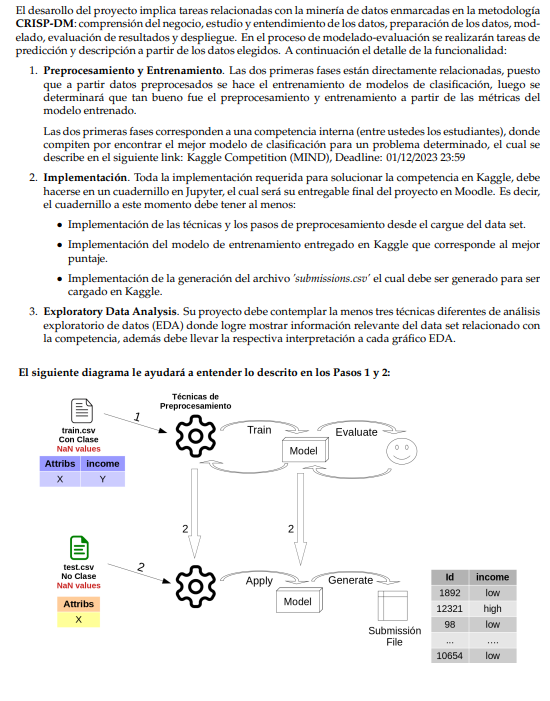

***Elaborado por: Juan Francisco Teran Roman***

## Adult

***Los datasets suministrados son una muestra del conocido "Adult", pero tienen variaciones, los datasets para el proyecto final tienen valores faltantes.***

Dataset: https://www.kaggle.com/competitions/publicfinalprojectmind20232

## Kaggle

*Ranking final:*

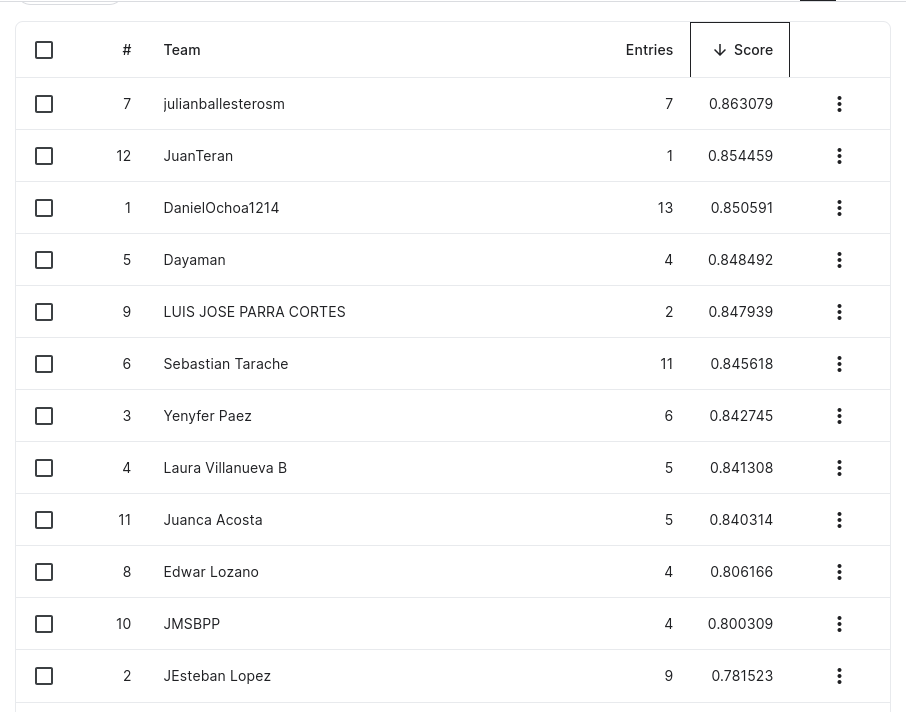

*Por tanto, la solucion desarrollada en este trabajo computacional permitio obtener el segundo mejor puntaje de la competencia, es decir el modelo con mayor rendimiento:*

$$\text{Score} = 0.854459$$

## Dataset de entrenamiento (NA_fullTrain)

*NA_fullTrain.csv: Es el que da el docente (por Kaggle). Se compone de 21.113 registros y 16 variables, con valores faltantes. Se debe aplicar pre-procesamiento a este Dataset y sobre este dataset ya pre-procesado se debe entrenar el modelo de alta precisión que se va a aplicar a NA_fullTest.*

## Dataset de prueba (NA_fullTest)

*NA_fullTest.csv: Se compone de 9.049 registros y 15 variables, con valores faltantes y no incluye la etiqueta de clase. Sobre este dataset se debe aplicar exactamente las mismas técnicas de pre-procesamiento utilizadas en NA_fullTrain, luego aplicar el modelo entrenado con el dataset de entrenamiento y luego subir a Kaggle el dataset resultante para comparar el rendimiento del modelo respecto a las etiquetas verdaderas (las cuales son desconocidas y solo las tiene el docente).*

## Importaciones Python

***El siguiente codigo es basado en las siguientes librerias de Python:***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import nan
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import KBinsDiscretizer

***El codigo utilizado en este Jupyter Notebook es adaptado de la documentacion oficial de las librerias Python, antes mencionadas, y de ejemplos y ejercicios hechos y compartidos por el docente Wilmer Garzon Alfonso para la asignatura "Mineria de Datos".***

***Archivos aplicados propiedade del docente: "Intro.ipynb", "MissingValues.ipynb", "NormDiscr.ipynb", "DTExample.ipynb" y "RFToyExample.ipynb".*** 

# Comprension de los Datos y el Negocio

*Entender lo minimo del negocio para poder comprender los datos, que representa la informacion, que significan las variables y encontrar hallazgos relevantes del dataset al analizar las variables por medio de tecnicas de Exploratory Data Analysis (EDA).*

In [2]:
#Dataset de entrenamiento
census = pd.read_csv("NA_fullTrain.csv")

#Dataset de prueba
censusTest = pd.read_csv("NA_fullTest.csv")

## Trabajando con una copia de los dataset originales

In [3]:
census_copy1 = census.copy()
census_test1 = censusTest.copy()

In [4]:
census_copy1

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,15977,44.0,Private,222978.0,HS-grad,9.0,Divorced,Sales,Not-in-family,White,Female,0.0,1504.0,40.0,United-States,low
1,13574,32.0,Private,83253.0,Some-college,10.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,60.0,United-States,low
2,23210,30.0,Local-gov,327825.0,HS-grad,9.0,Divorced,Protective-serv,Own-child,White,Female,0.0,0.0,32.0,United-States,low
3,9284,23.0,Private,109952.0,Some-college,10.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,60.0,United-States,low
4,8841,54.0,Local-gov,204325.0,Some-college,10.0,Married-civ-spouse,Protective-serv,NaN,White,Male,0.0,0.0,52.0,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,Local-gov,376506.0,Doctorate,16.0,Divorced,Prof-specialty,Not-in-family,White,Female,3273.0,0.0,40.0,United-States,low
21109,21206,50.0,Private,158680.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,high
21110,10646,50.0,Private,72351.0,Bachelors,13.0,Divorced,NaN,Not-in-family,White,Male,0.0,0.0,45.0,United-States,low
21111,11687,49.0,Self-emp-not-inc,NaN,Bachelors,13.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,60.0,United-States,high


## Descripcion del dataset

### Dimensionalidad

In [5]:
dimension = census_copy1.shape
print("Filas: ", dimension[0], "\n" "columnas: ", dimension[1])
print("Dimensionalidad:", dimension[1]) 

Filas:  21113 
columnas:  16
Dimensionalidad: 16


*El dataset tiene 21113 filas y 16 columnas.*

*La dimensionalidad del dataset es: 16 atributos*

### Atributos

#### Resumen de los tipos de atributos del dataset

In [6]:
census_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21113 entries, 0 to 21112
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              21113 non-null  int64  
 1   age             20217 non-null  float64
 2   workclass       20161 non-null  object 
 3   fnlwgt          20140 non-null  float64
 4   education       20149 non-null  object 
 5   education-num   20196 non-null  float64
 6   marital-status  20126 non-null  object 
 7   occupation      20207 non-null  object 
 8   relationship    20190 non-null  object 
 9   race            20116 non-null  object 
 10  sex             20195 non-null  object 
 11  capital-gain    20201 non-null  float64
 12  capital-loss    20235 non-null  float64
 13  hours-per-week  20165 non-null  float64
 14  native-country  20087 non-null  object 
 15  income          21113 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 2.6+ MB


*El dataset se compone de 16 atributos, incluyendo la clase "income" y el identificador "Id".*

#### Resumen de las estadisticas descriptivas de cada atributo del dataset

In [7]:
census_copy1.describe(include="all")

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,21113.000000,20217.000000,20161,2.014000e+04,20149,20196.000000,20126,20207,20190,20116,20195,20201.000000,20235.000000,20165.000000,20087,21113
unique,NaN,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,low
freq,NaN,NaN,14939,NaN,6597,NaN,9328,2711,8261,17336,13646,NaN,NaN,NaN,18305,15890
mean,16244.006489,38.509423,NaN,1.894323e+05,NaN,10.105318,NaN,NaN,NaN,NaN,NaN,1099.218653,88.897208,40.960972,NaN,NaN
std,9371.085220,13.156230,NaN,1.057551e+05,NaN,2.553115,NaN,NaN,NaN,NaN,NaN,7420.638858,405.055646,11.835509,NaN,NaN
min,0.000000,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,8151.000000,28.000000,NaN,1.171668e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,16225.000000,37.000000,NaN,1.780135e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,24346.000000,47.000000,NaN,2.368355e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Resumen general

*El dataset presenta valores cuantitativos (numeros) y cualitativos (cadenas).*

*El tipo de dato de la variable "Id" del dataset es "int64". Estos datos corresponden a numeros enteros.*

*El tipo de dato de las variables "age", "fnlwgt", "education-num", "capital-gain", "capital-loss" y "hours-per-week" del dataset es "float64". Estos datos corresponden a numeros punto flotante.*

*El tipo de dato de las variables "workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country" y "income" del dataset es "object". Estos datos corresponden a cadenas de texto.*

*Estas variables se refieren al contenido de una extraccion de la base de datos del censo de 1994 realizado en Estados Unidos. Los datasets "NA_fullTrain" y "NA_fullTest" se obtienen de la informacion de la poblacion estadounidense con al menos 17 años de edad y que trabaja minimo 1 hora por semana.*

|Variable |Descripcion|
| - | - |
|Id|Identificador del registro|
|age|Edad de la persona|
|workclass|Clase de trabajo (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)|
|fnlwgt|Peso final|
|education|Nivel de educacion (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)|
|education-num|Numero de nivel de la educacion|
|marital-status|Estado civil (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)|
|occupation|Ocupacion (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)|
|relationship|Relacion (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)|
|race|Raza (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)|
|sex|Sexo (Female, Male)|
|capital-gain|Ganancia capital|
|capital-loss|Perdida de capital|
|hours-per-week|Horas por semana|
|native-country|Patria (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)|
|income|Ingreso bruto anual (low, high)|


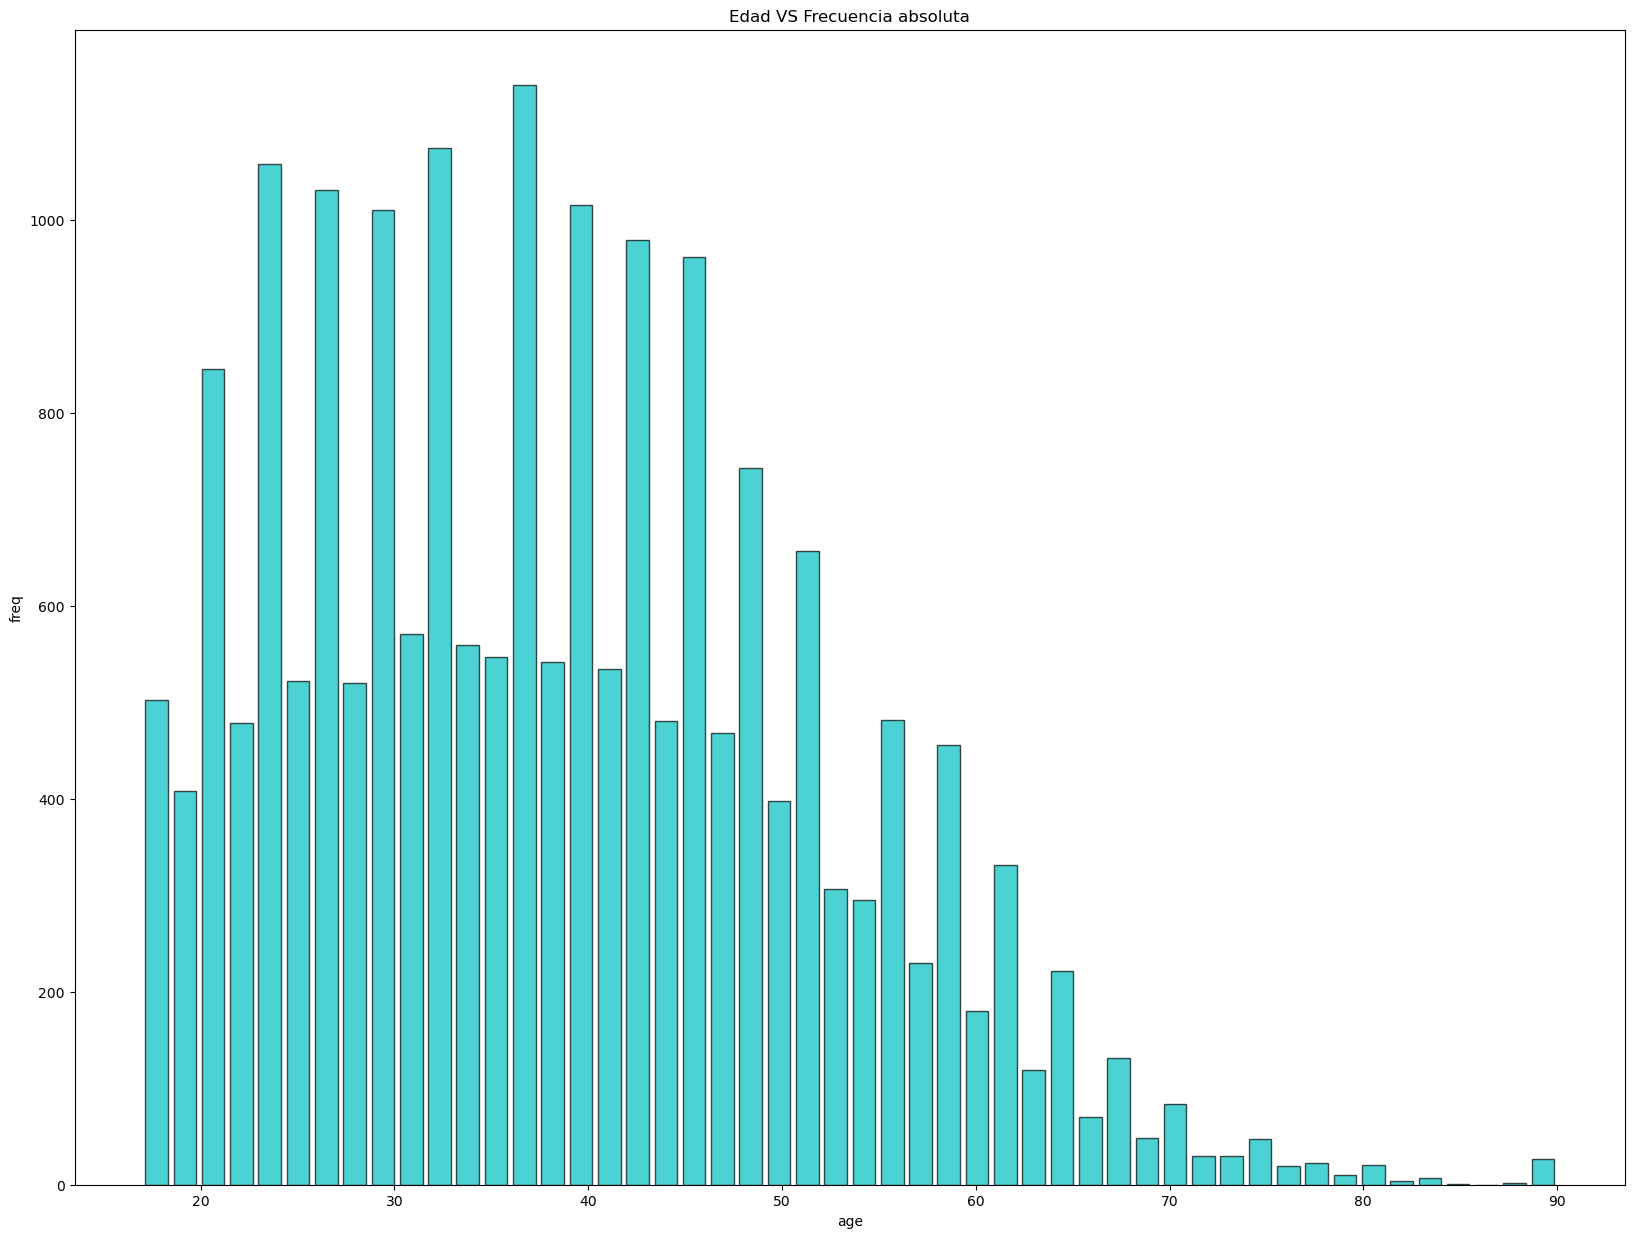

In [8]:
plt.figure(figsize=(20, 15))
census_copy1["age"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Edad VS Frecuencia absoluta")
plt.xlabel("age")
plt.ylabel("freq")
plt.show()

#### Resumen de la informacion del atributo "age"

*La edad es un atributo de registros numericos que toman valores continuos entre 17 y 90 años, con media de 38.5 años y mediana de 37 años.*

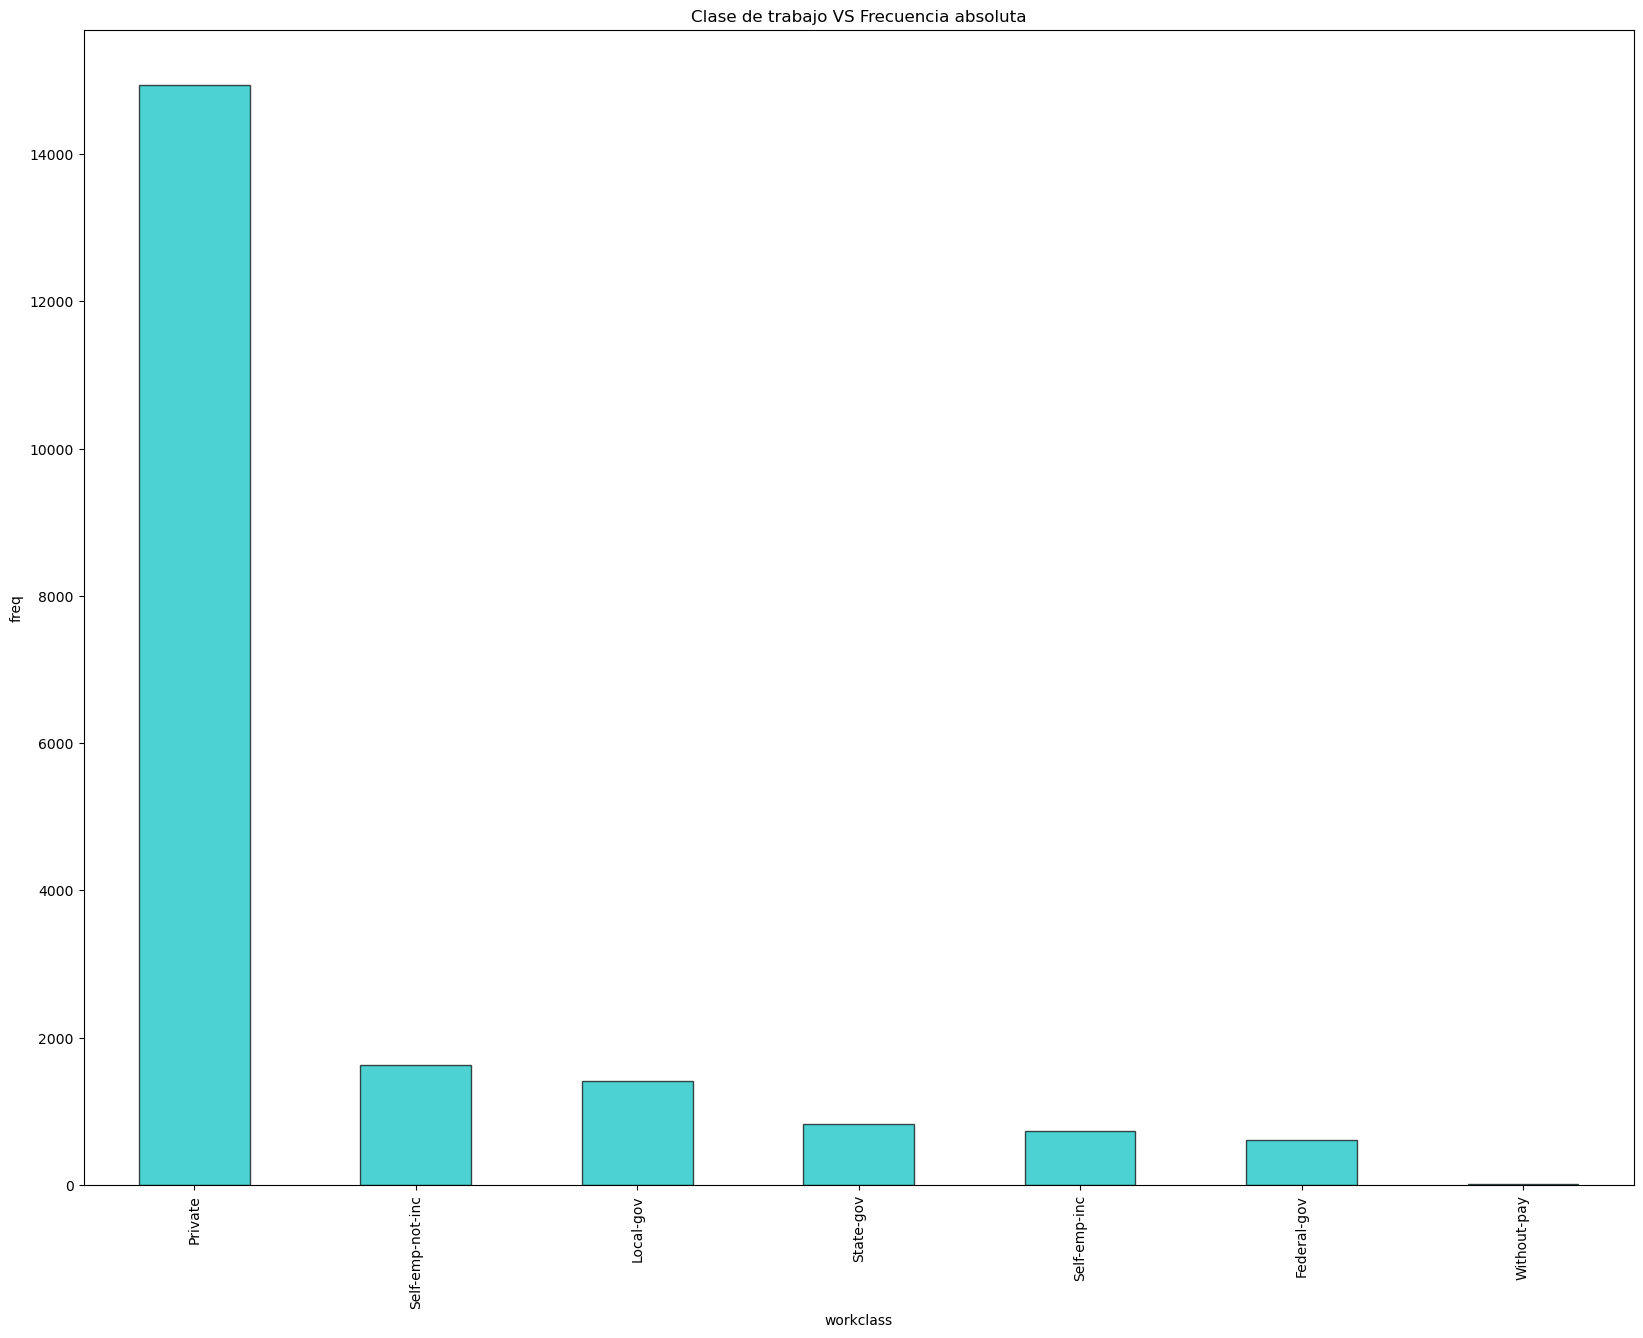

In [9]:
plt.figure(figsize=(20, 15))
census_copy1["workclass"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Clase de trabajo VS Frecuencia absoluta")
plt.xlabel("workclass")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "workclass"

*La clase de trabajo es un atributo de registros categoricos que puede tomar valores entre 7 categorias (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay), donde "Private" es el valor mas frecuente con 14939 datos de ciudadanos americanos.*

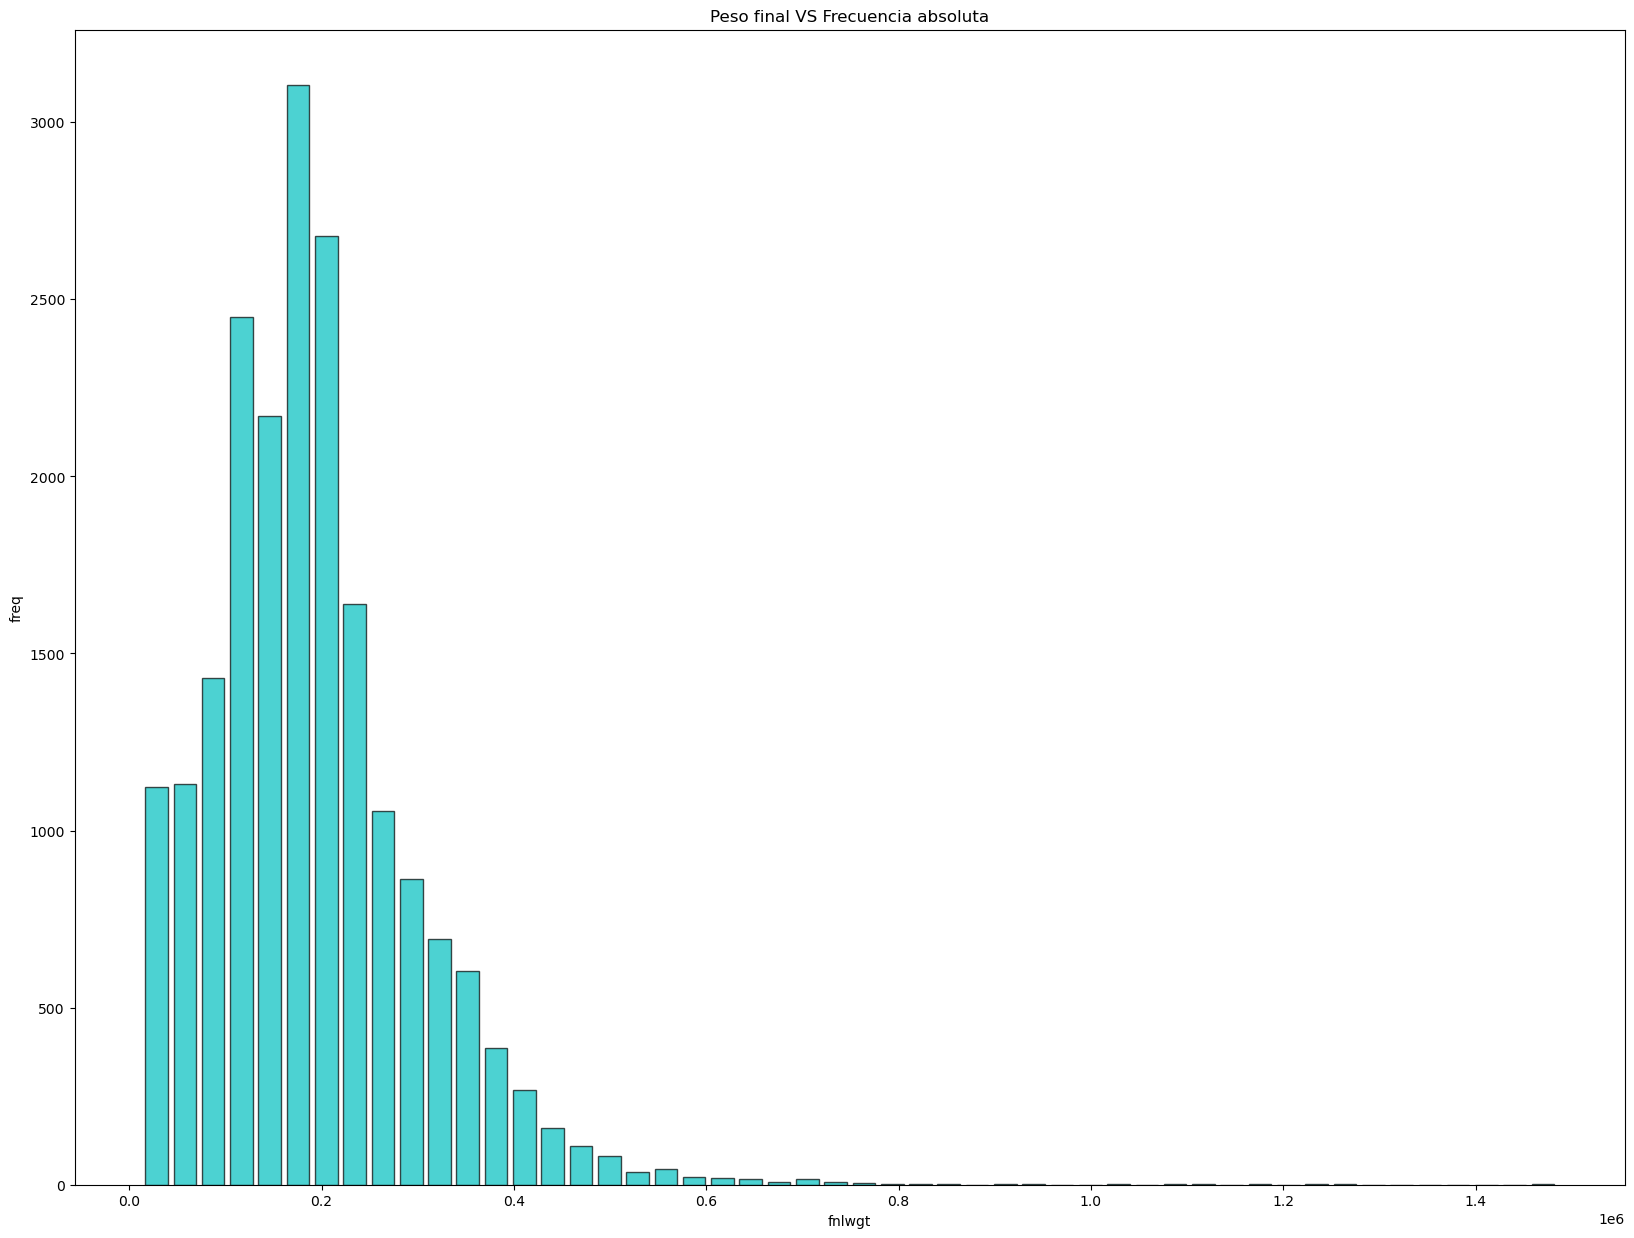

In [10]:
plt.figure(figsize=(20, 15))
census_copy1["fnlwgt"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Peso final VS Frecuencia absoluta")
plt.xlabel("fnlwgt")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "fnlwgt"

*El peso final es un atributo de registros numericos que toman valores continuos entre 13769 y 1484705, con media de 189432.3 y mediana de 178013.5.*

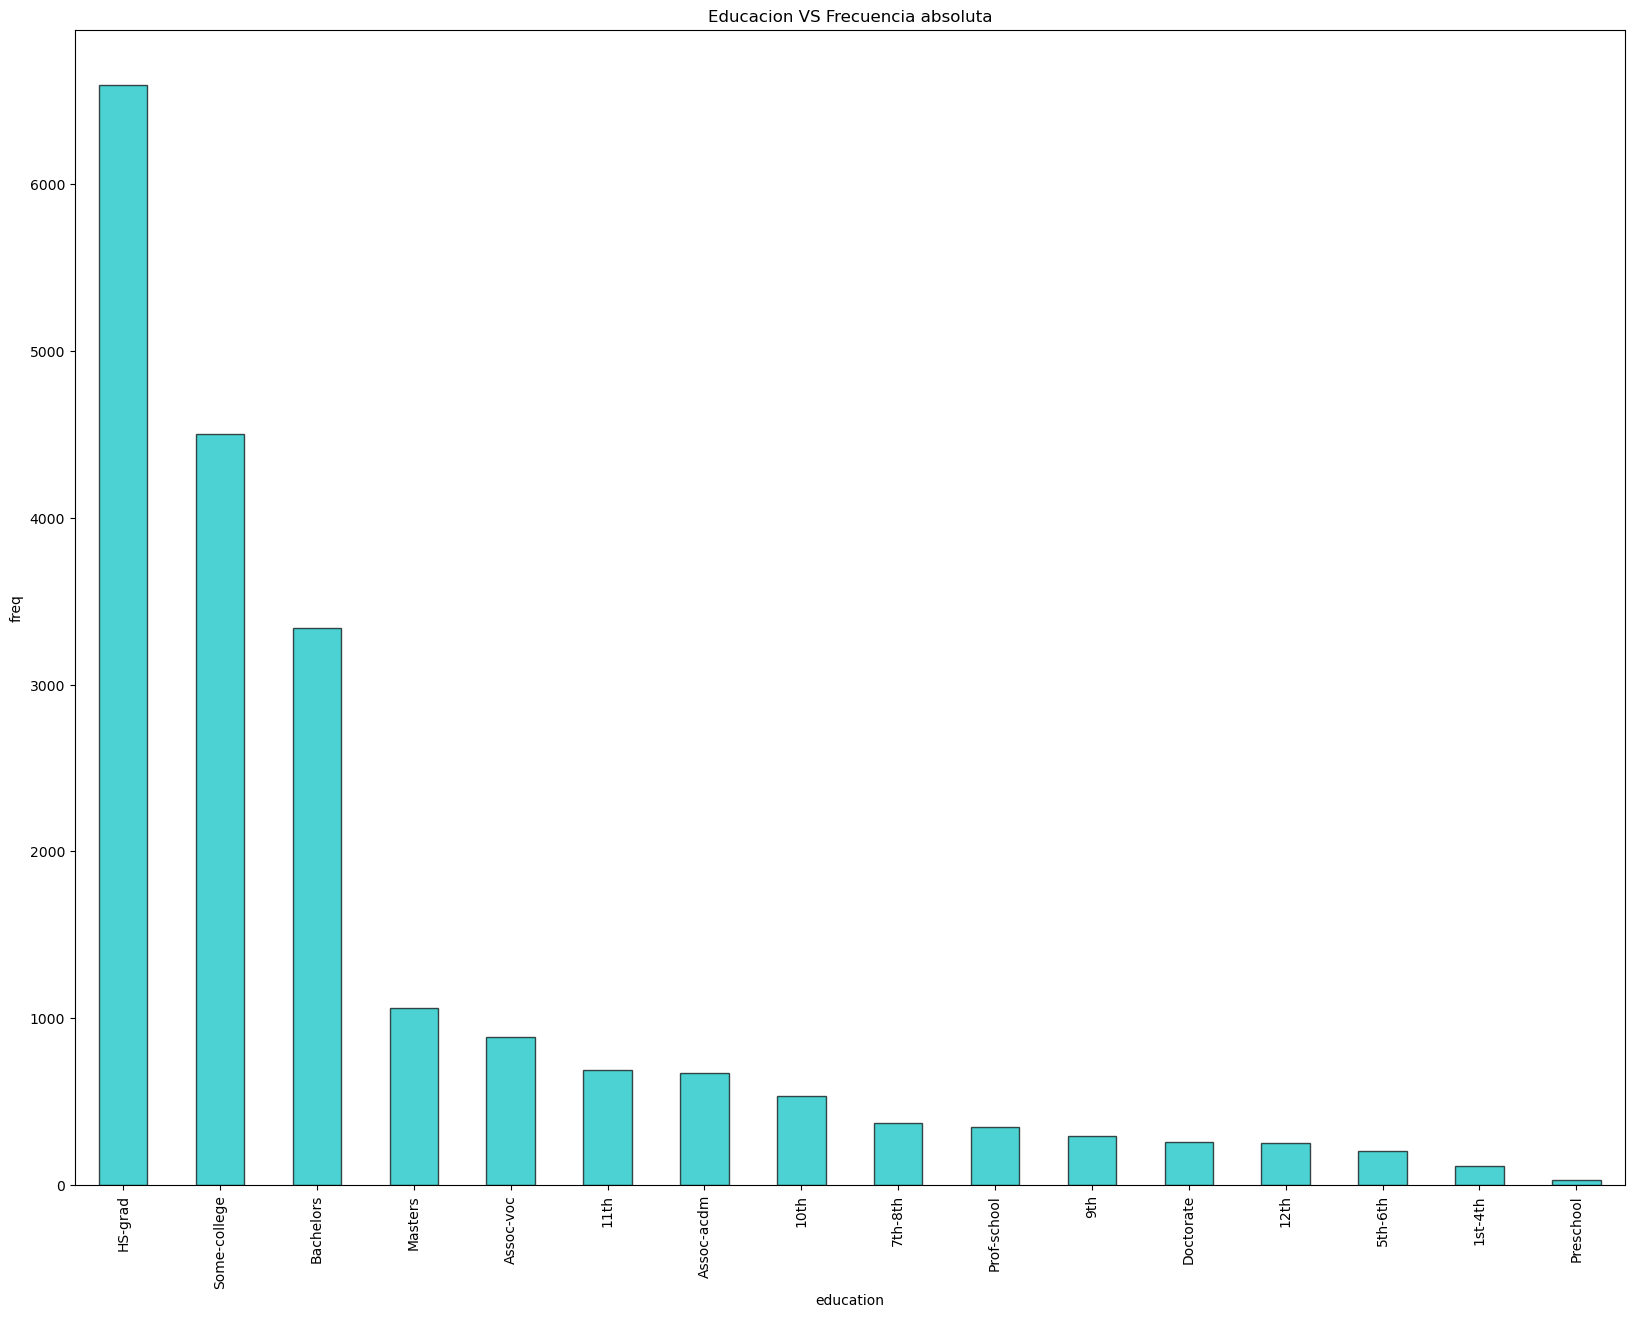

In [13]:
plt.figure(figsize=(20, 15))
census_copy1["education"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Educacion VS Frecuencia absoluta")
plt.xlabel("education")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "education"

*La educacion es un atributo de registros categoricos que puede tomar valores entre 16 categorias (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool), donde "HS-grad" es el valor mas frecuente con 6597 datos de ciudadanos americanos.*

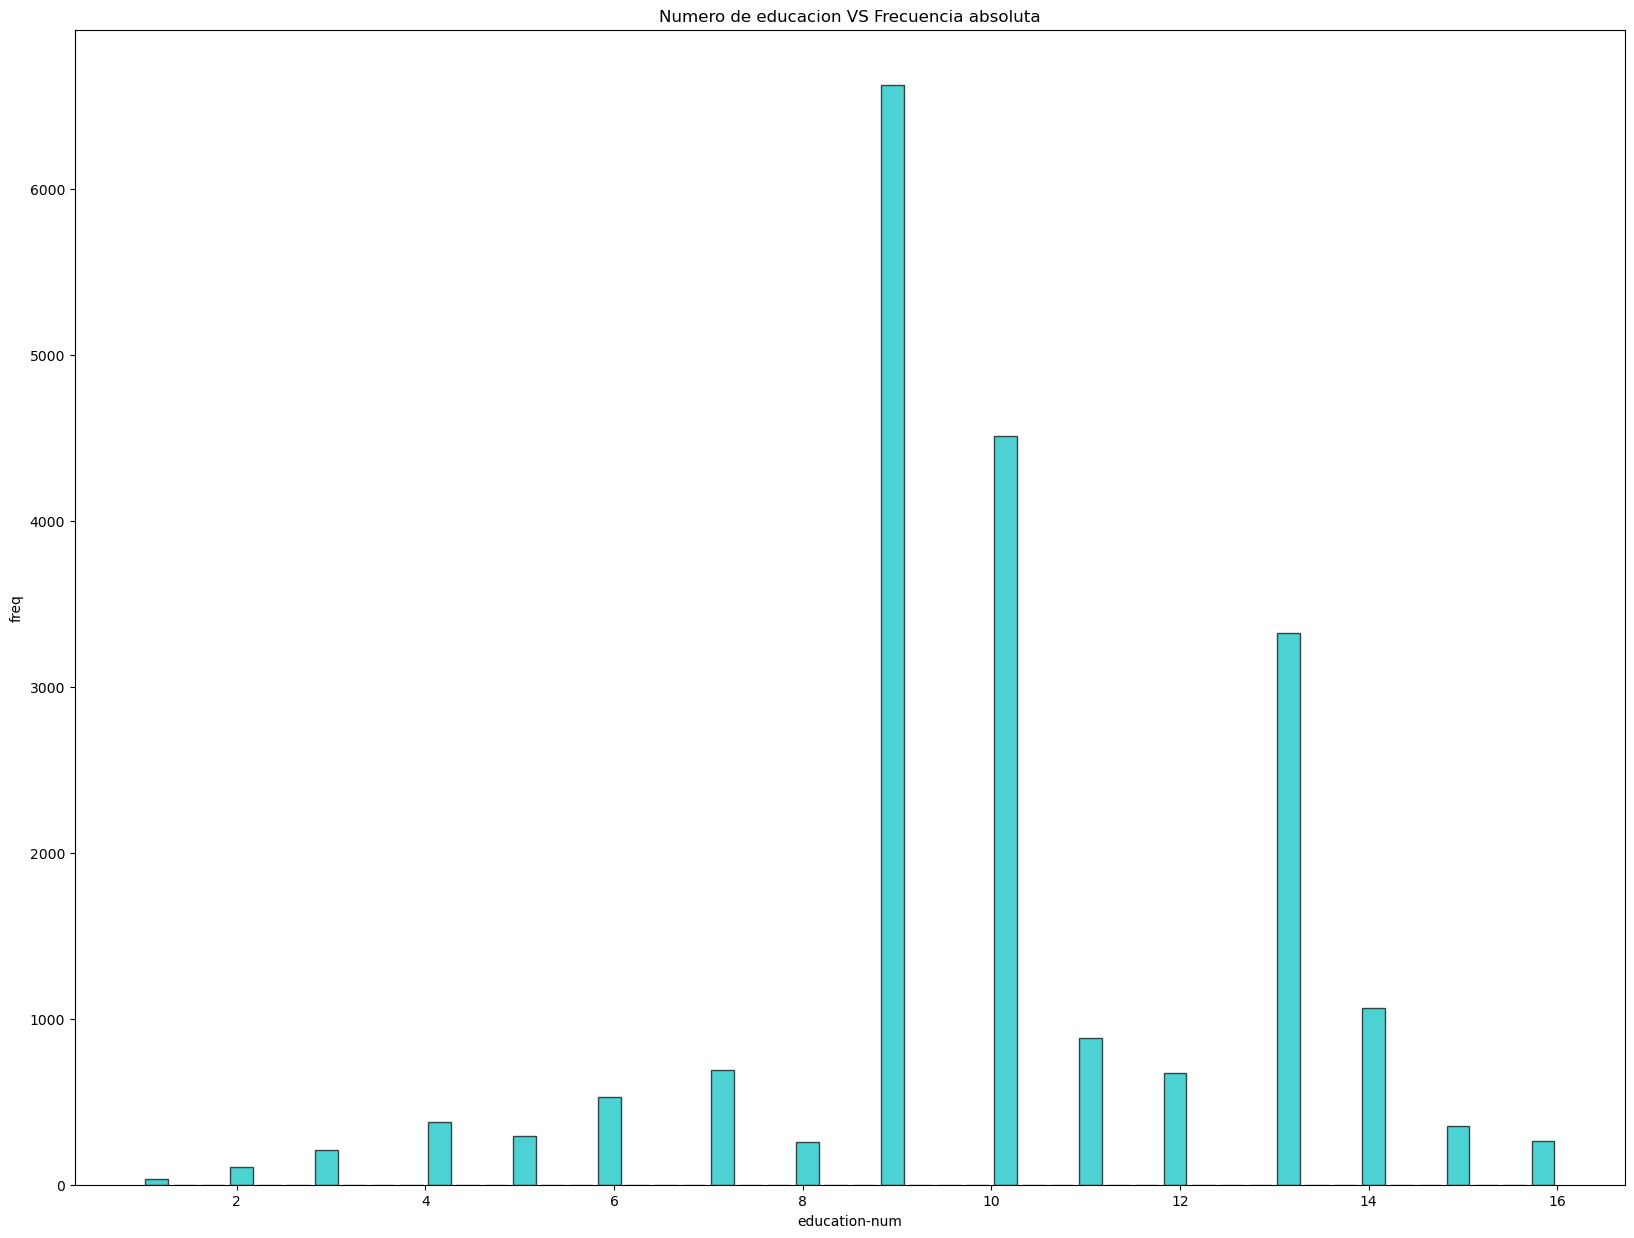

In [12]:
plt.figure(figsize=(20, 15))
census_copy1["education-num"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Numero de educacion VS Frecuencia absoluta")
plt.xlabel("education-num")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "education-num"

*El numero de educacion es un atributo de registros numericos que toman valores continuos entre 1 y 16, con media de 10.1 y mediana de 10.*

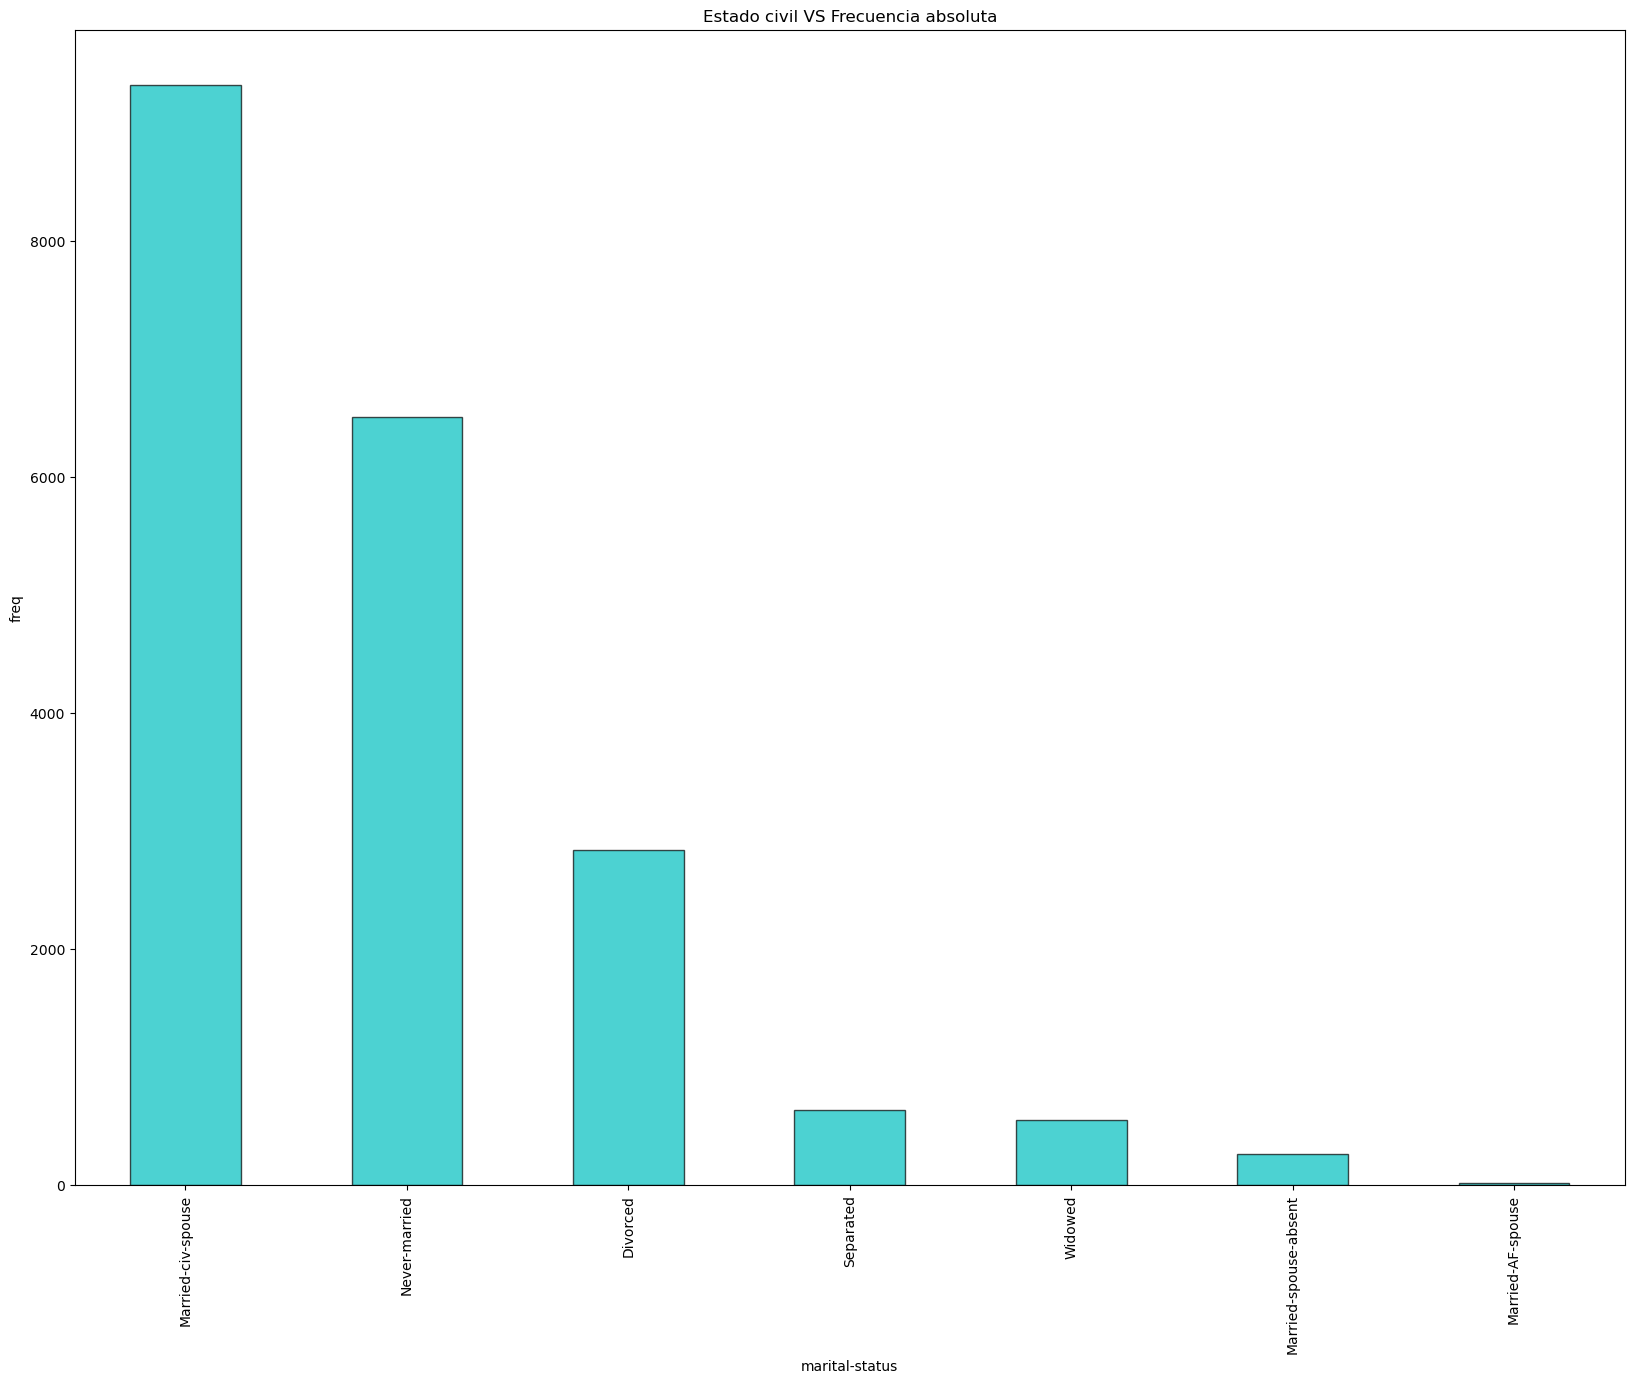

In [13]:
plt.figure(figsize=(20, 15))
census_copy1["marital-status"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Estado civil VS Frecuencia absoluta")
plt.xlabel("marital-status")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "marital-status"

*El estado civil es un atributo de registros categoricos que puede tomar valores entre 7 categorias (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse), donde "Married-civ-spouse" es el valor mas frecuente con 9328 datos de ciudadanos americanos.*

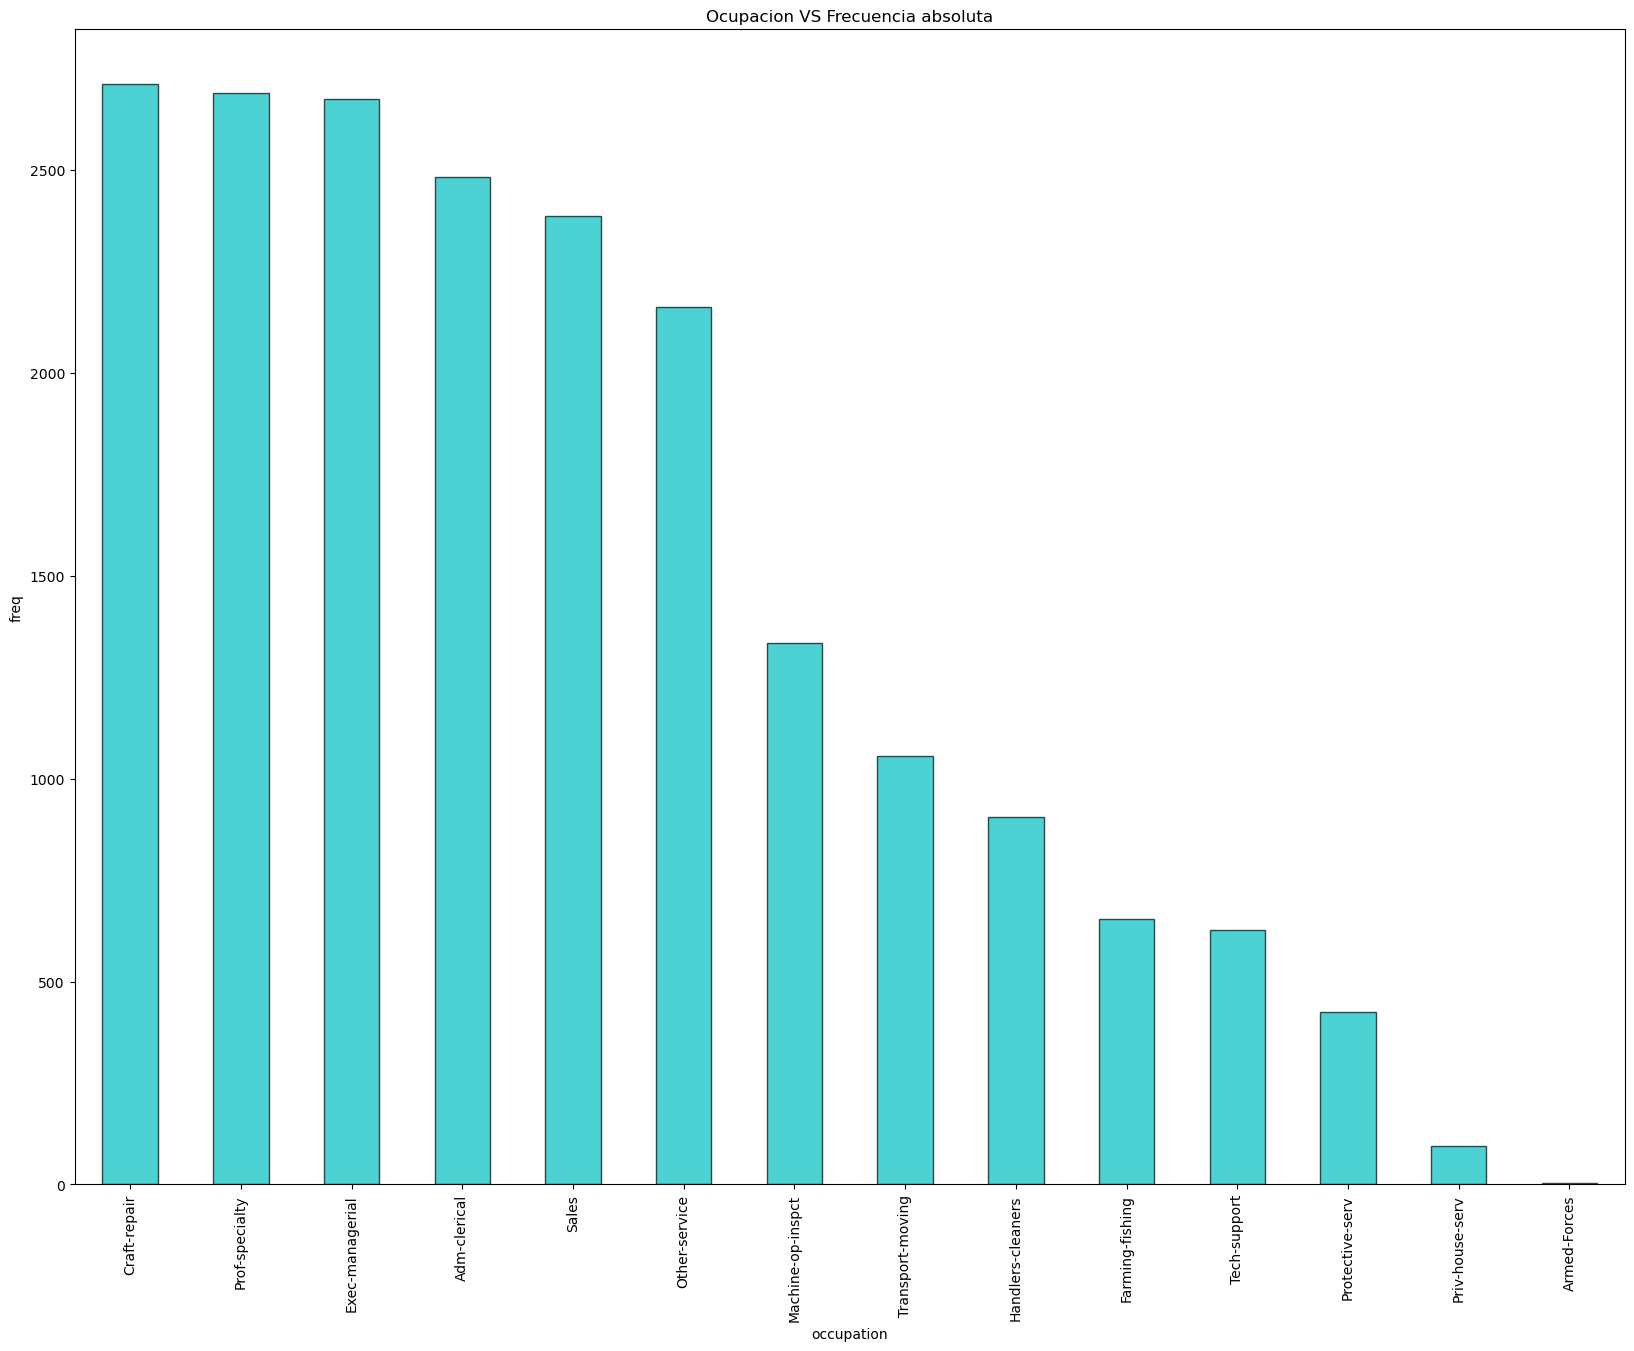

In [14]:
plt.figure(figsize=(20, 15))
census_copy1["occupation"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Ocupacion VS Frecuencia absoluta")
plt.xlabel("occupation")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "occupation"

*La ocupacion es un atributo de registros categoricos que puede tomar valores entre 14 categorias (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces), donde "Craft-repair" es el valor mas frecuente con 2711 datos de ciudadanos americanos.*

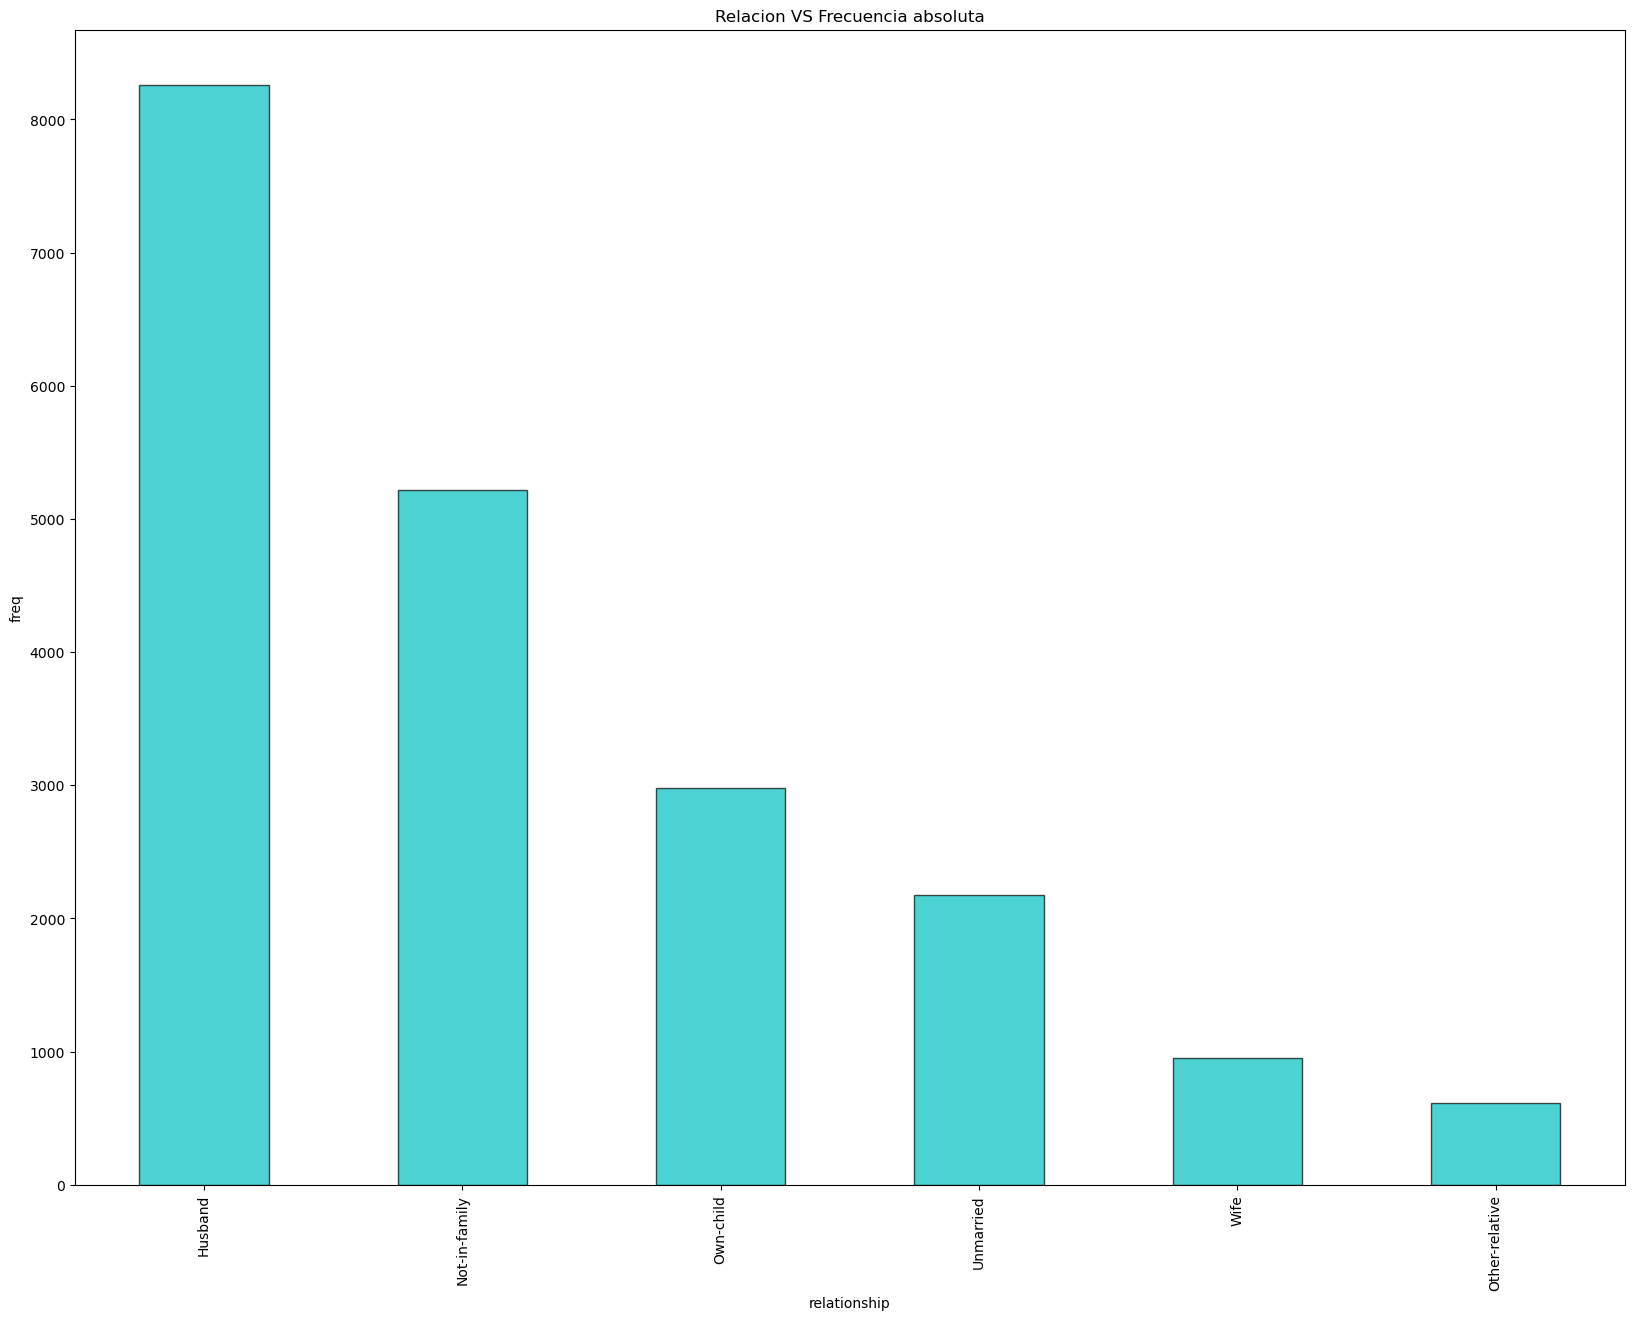

In [15]:
plt.figure(figsize=(20, 15))
census_copy1["relationship"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Relacion VS Frecuencia absoluta")
plt.xlabel("relationship")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "relationship"

*La relacion es un atributo de registros categoricos que puede tomar valores entre 6 categorias (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried), donde "Husband" es el valor mas frecuente con 8261 datos de ciudadanos americanos.*

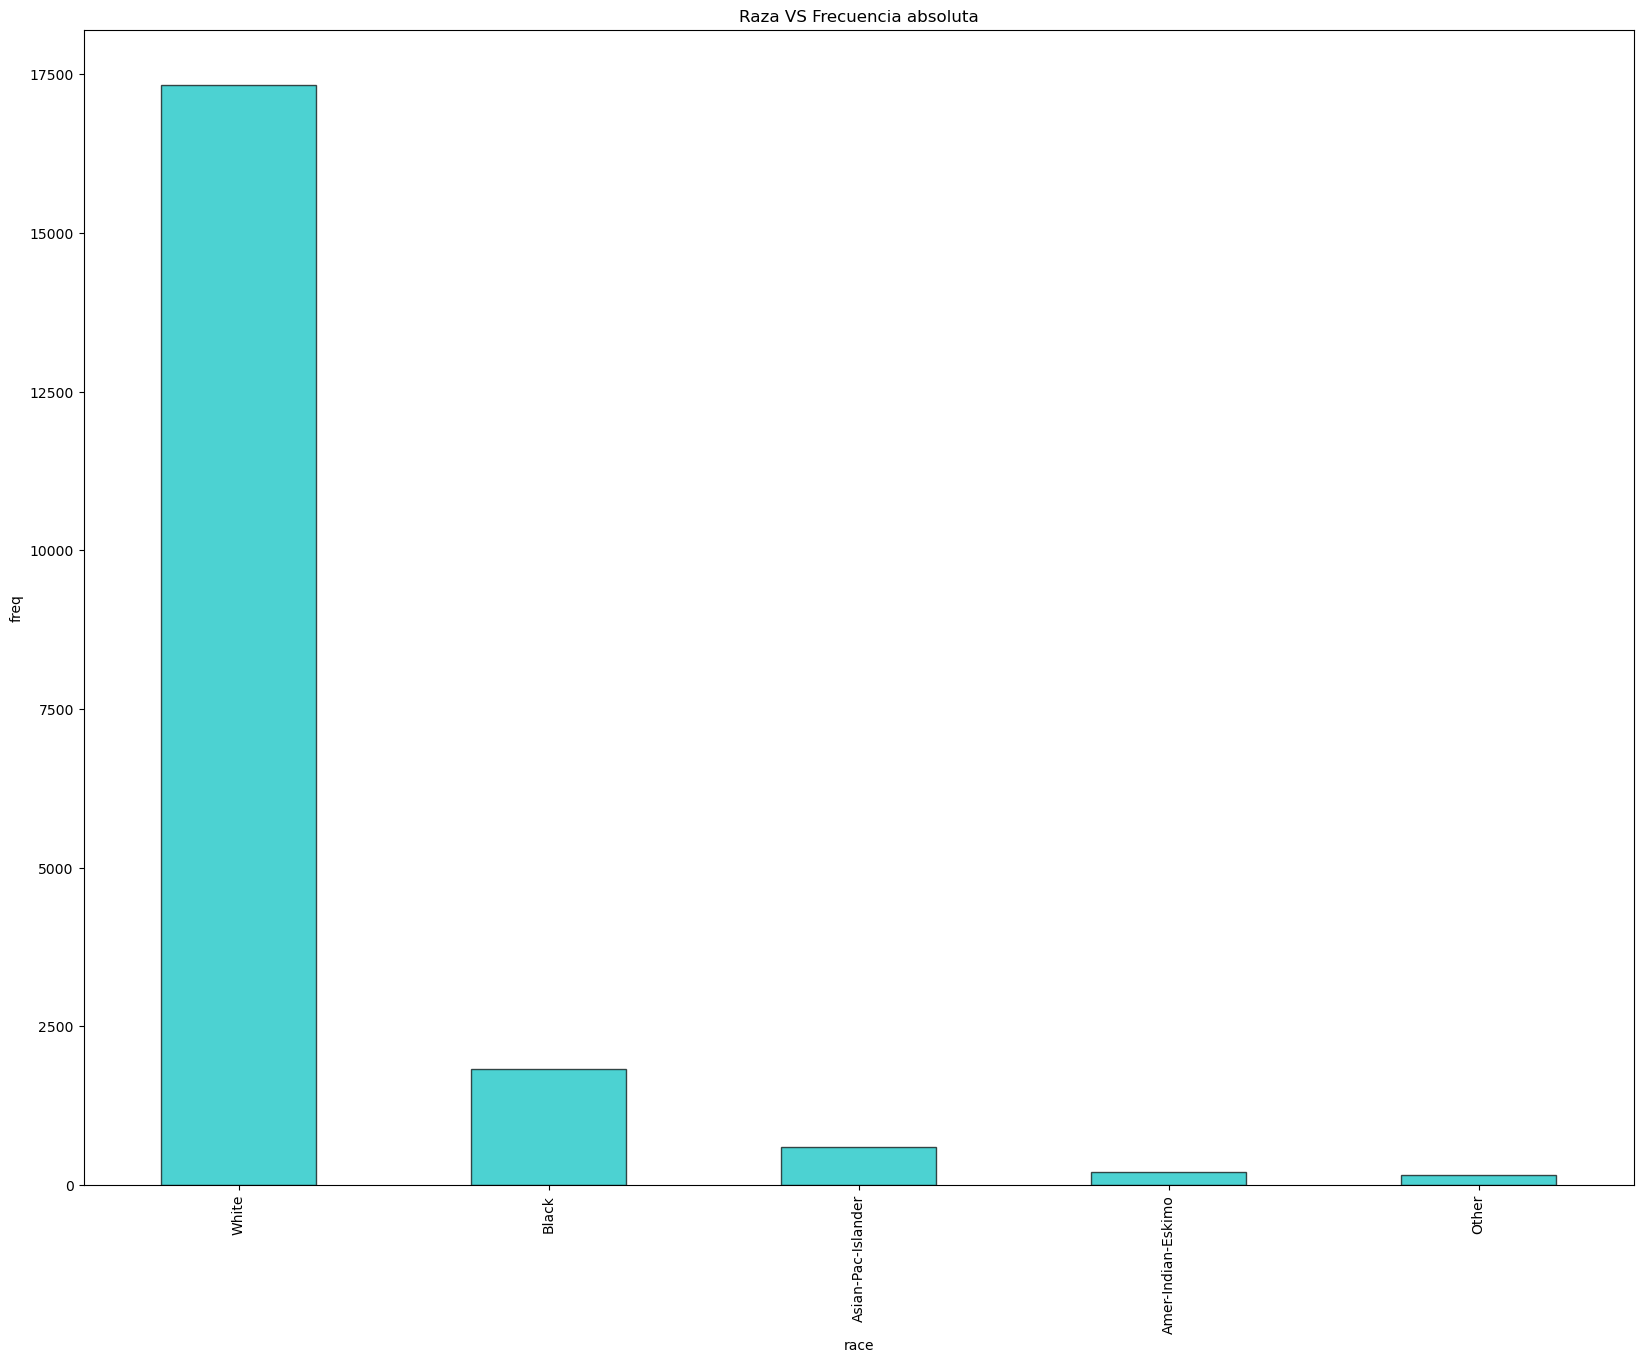

In [16]:
plt.figure(figsize=(20, 15))
census_copy1["race"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Raza VS Frecuencia absoluta")
plt.xlabel("race")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "race"

*La raza es un atributo de registros categoricos que puede tomar valores entre 5 categorias (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black), donde "White" es el valor mas frecuente con 17336 datos de ciudadanos americanos.*

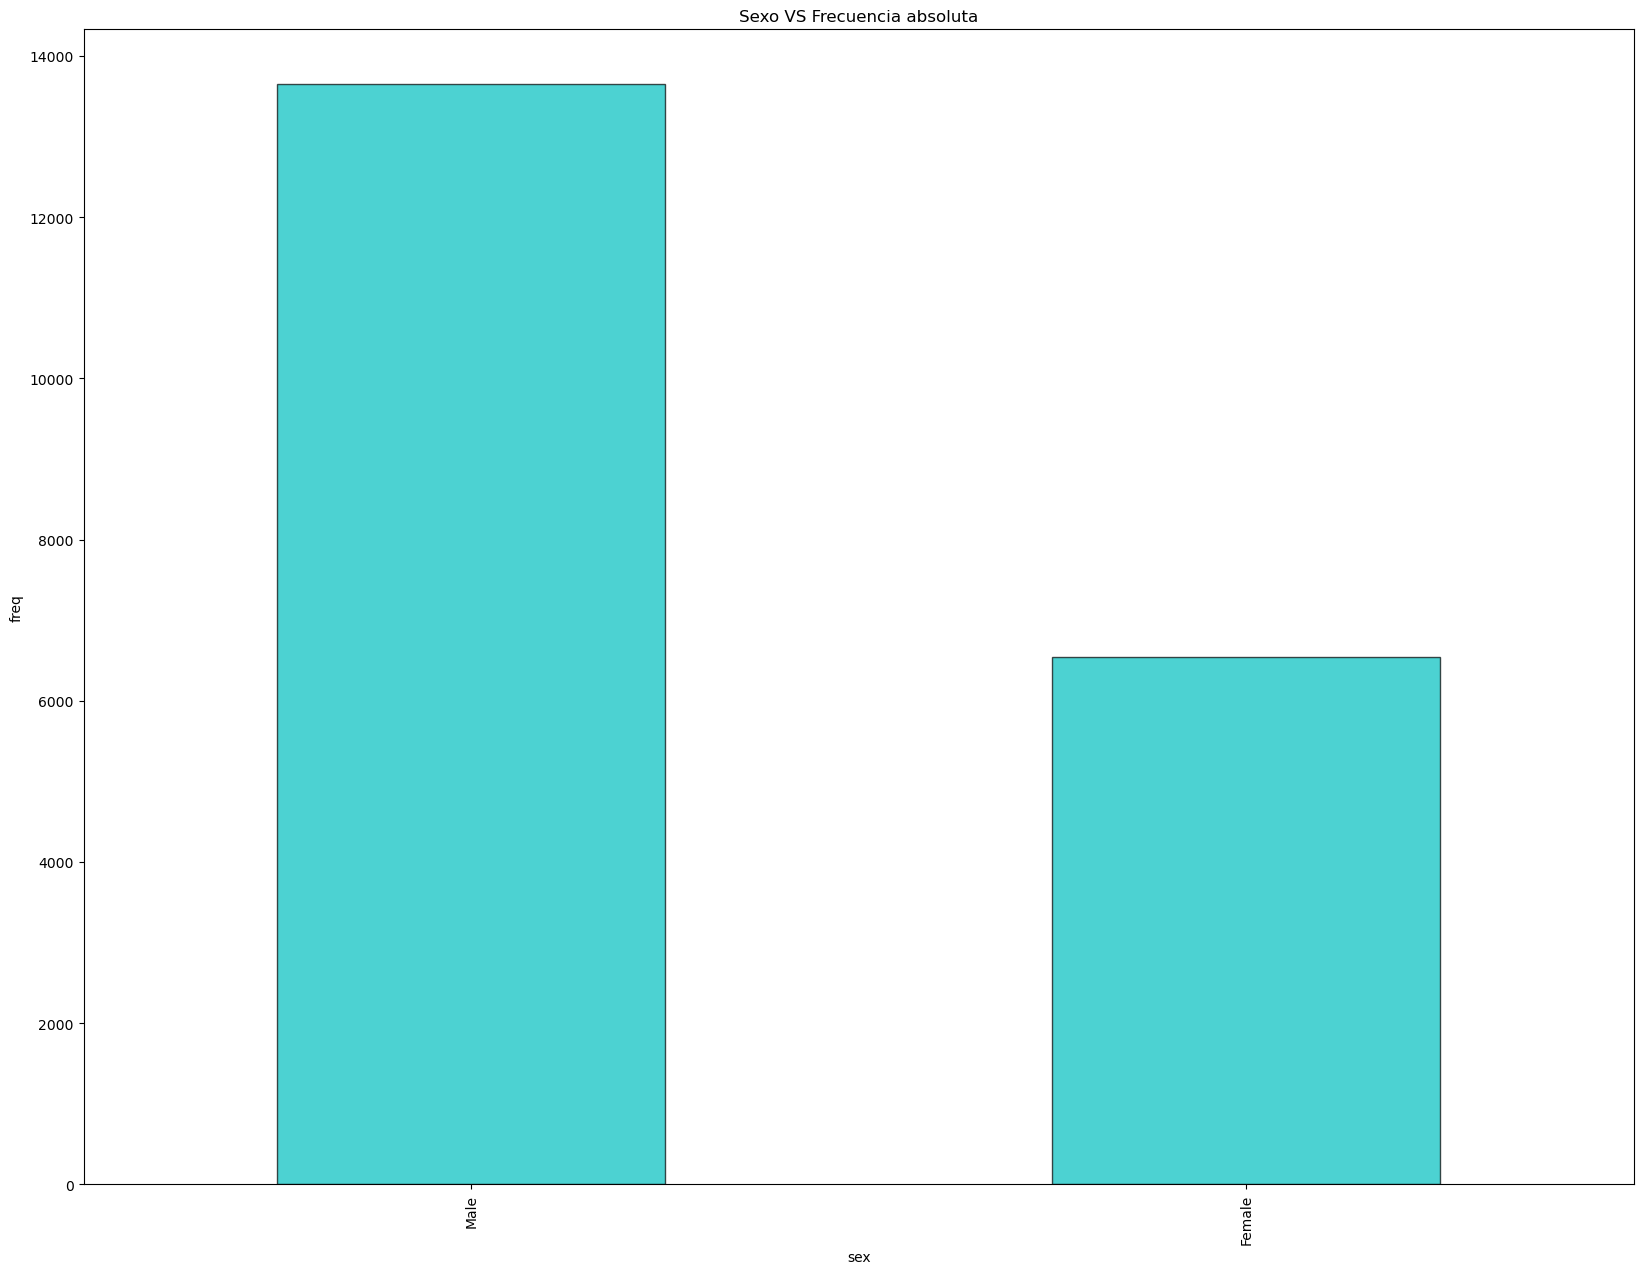

In [17]:
plt.figure(figsize=(20, 15))
census_copy1["sex"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Sexo VS Frecuencia absoluta")
plt.xlabel("sex")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "sex"

*El sexo es un atributo de registros categoricos que puede tomar valores entre 2 categorias (Female, Male), donde "Male" es el valor mas frecuente con 13646 datos de ciudadanos americanos.*

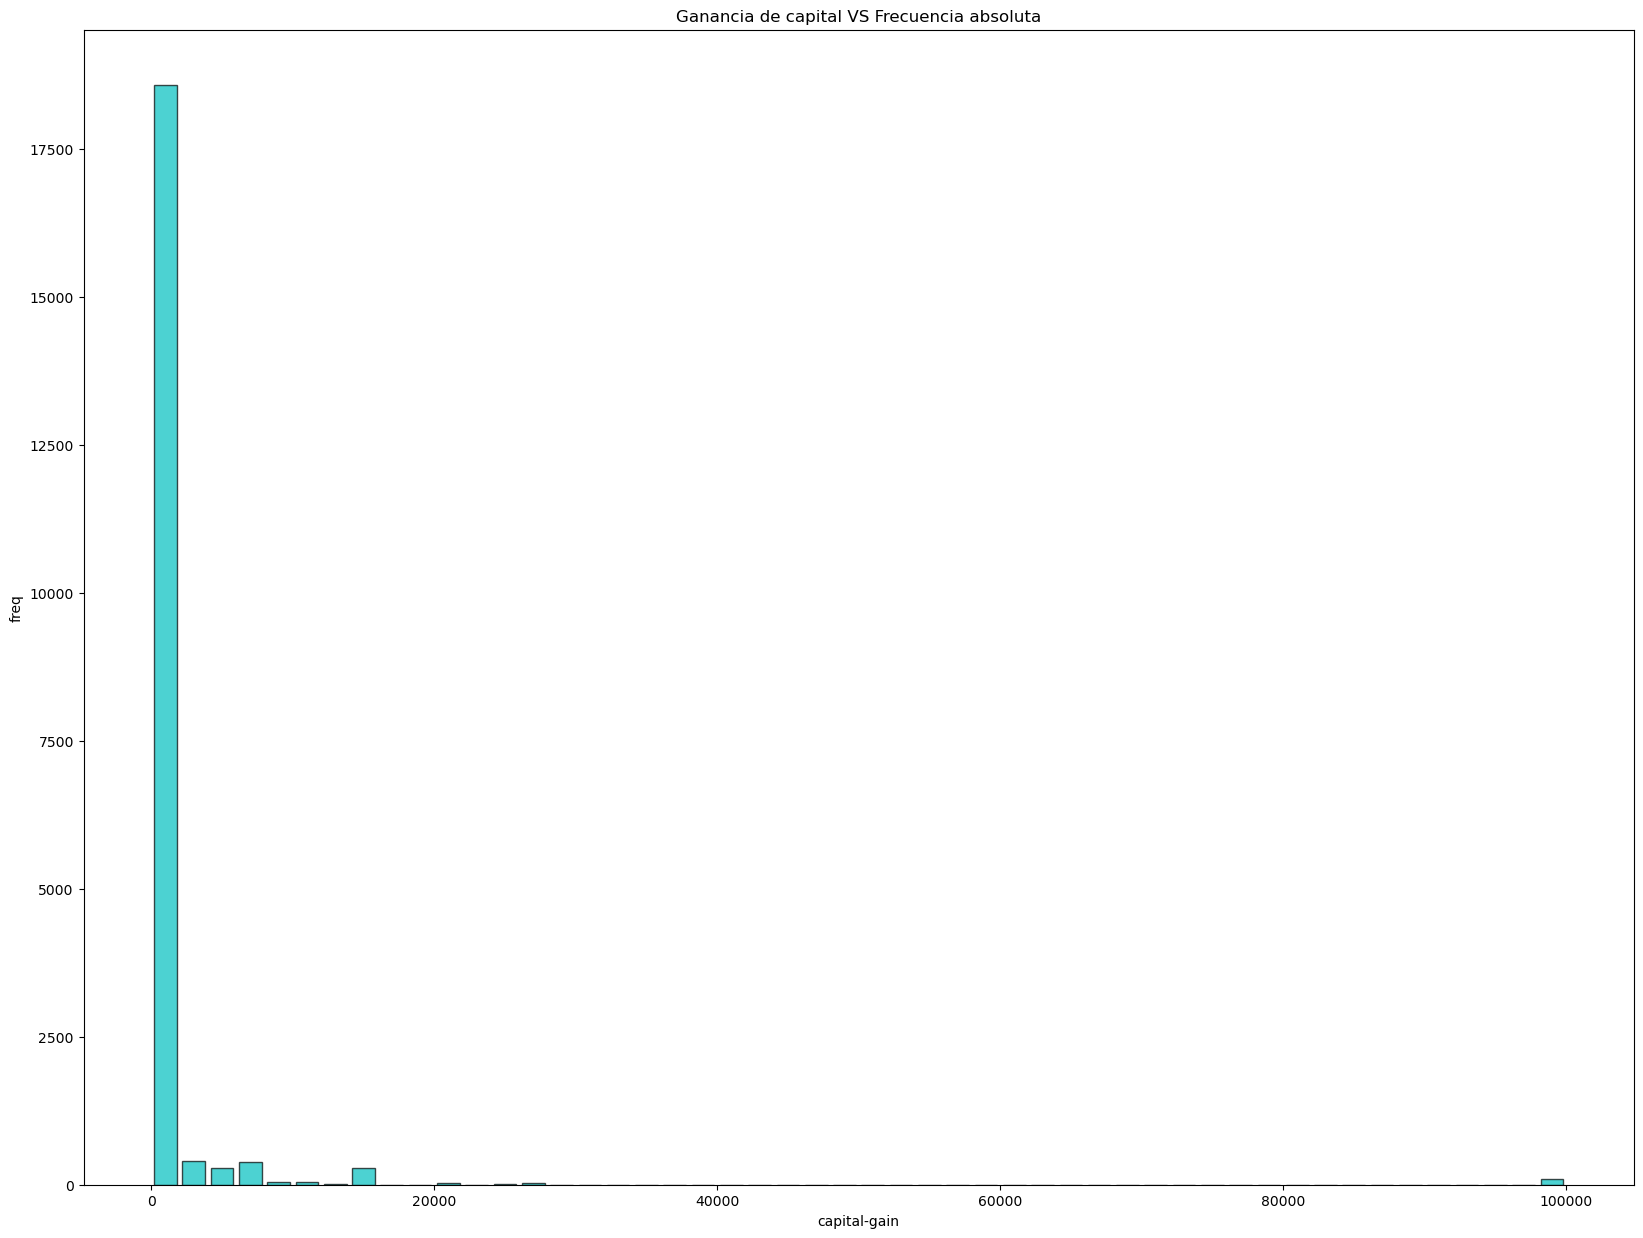

In [18]:
plt.figure(figsize=(20, 15))
census_copy1["capital-gain"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ganancia de capital VS Frecuencia absoluta")
plt.xlabel("capital-gain")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "capital-gain"

*La ganancia de capital es un atributo de registros numericos que toman valores continuos entre 0 y 99999, con media de 1099.2 y mediana de 0.*

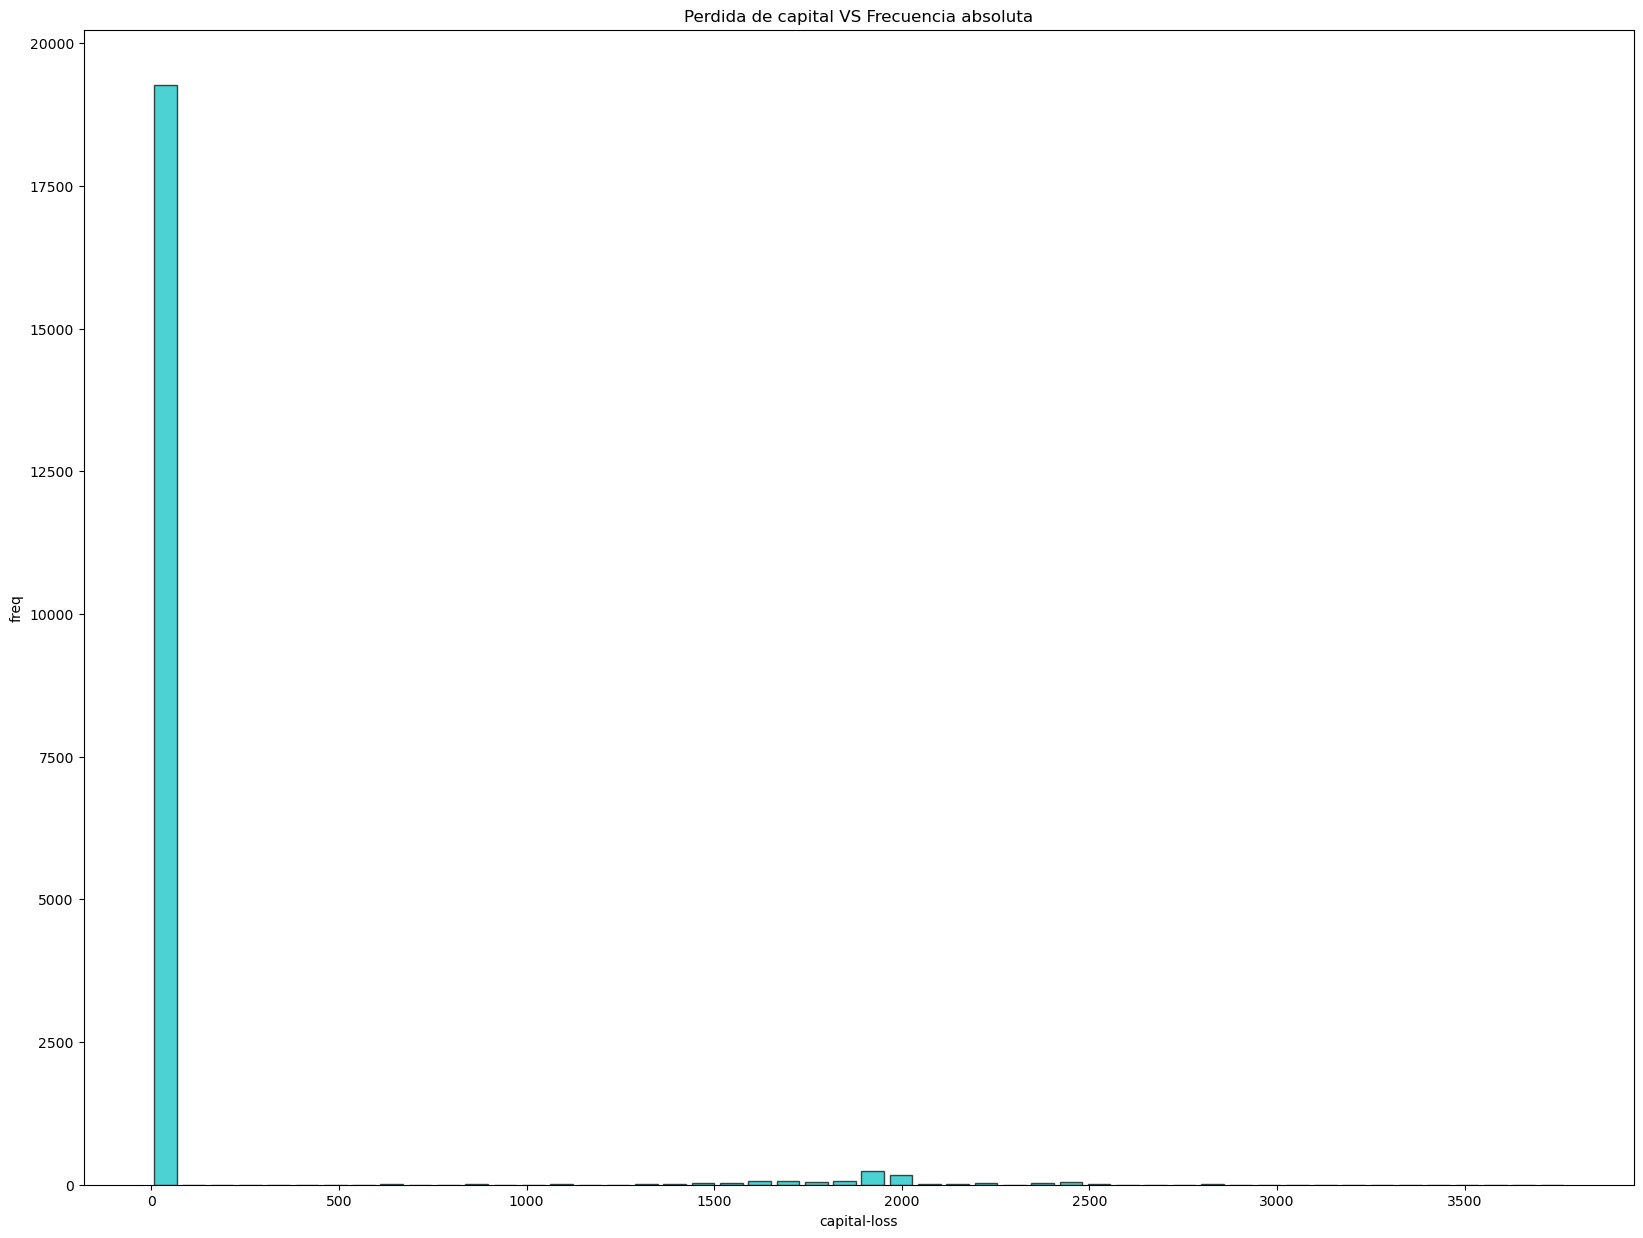

In [19]:
plt.figure(figsize=(20, 15))
census_copy1["capital-loss"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Perdida de capital VS Frecuencia absoluta")
plt.xlabel("capital-loss")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "capital-loss"

*La perdida de capital es un atributo de registros numericos que toman valores continuos entre 0 y 3770, con media de 88.897 y mediana de 0.*

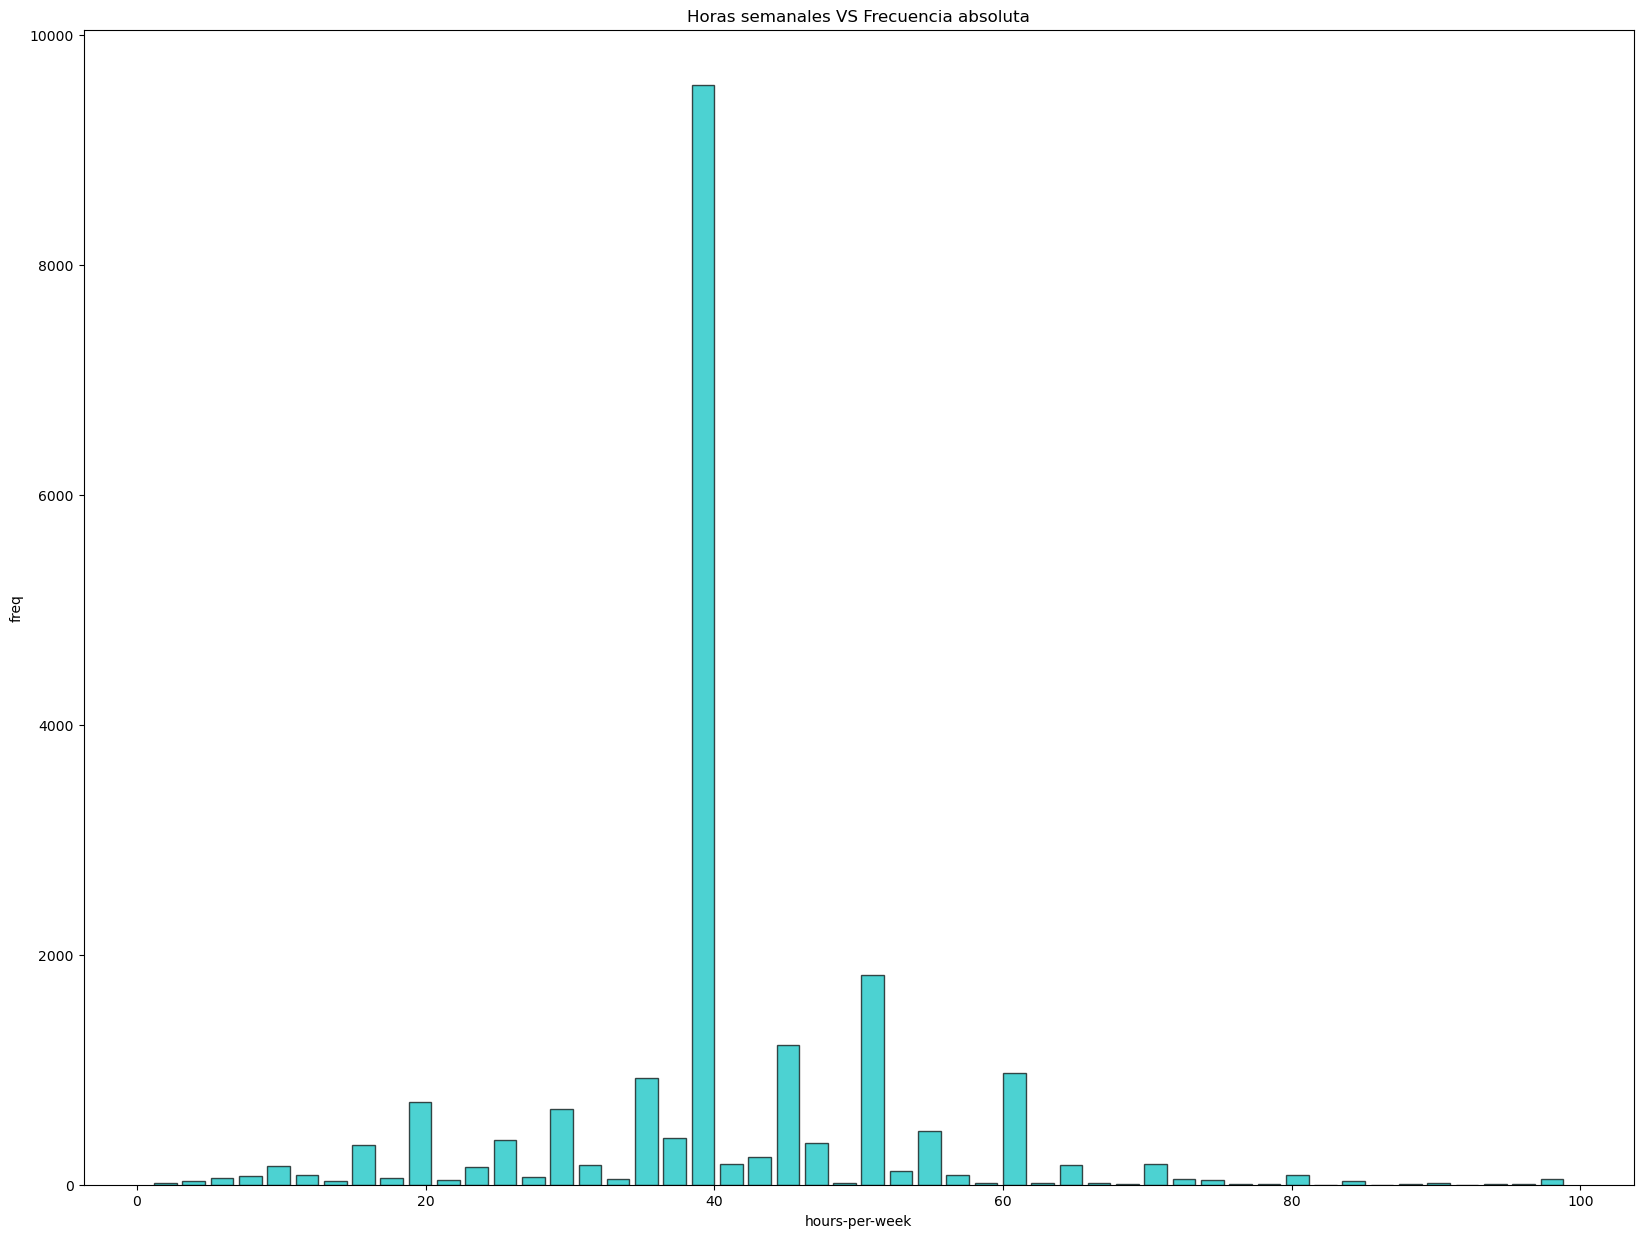

In [20]:
plt.figure(figsize=(20, 15))
census_copy1["hours-per-week"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Horas semanales VS Frecuencia absoluta")
plt.xlabel("hours-per-week")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "hours-per-week"

*Las horas semanales es un atributo de registros numericos que toman valores continuos entre 1 y 99, con media de 40.96 y mediana de 40.*

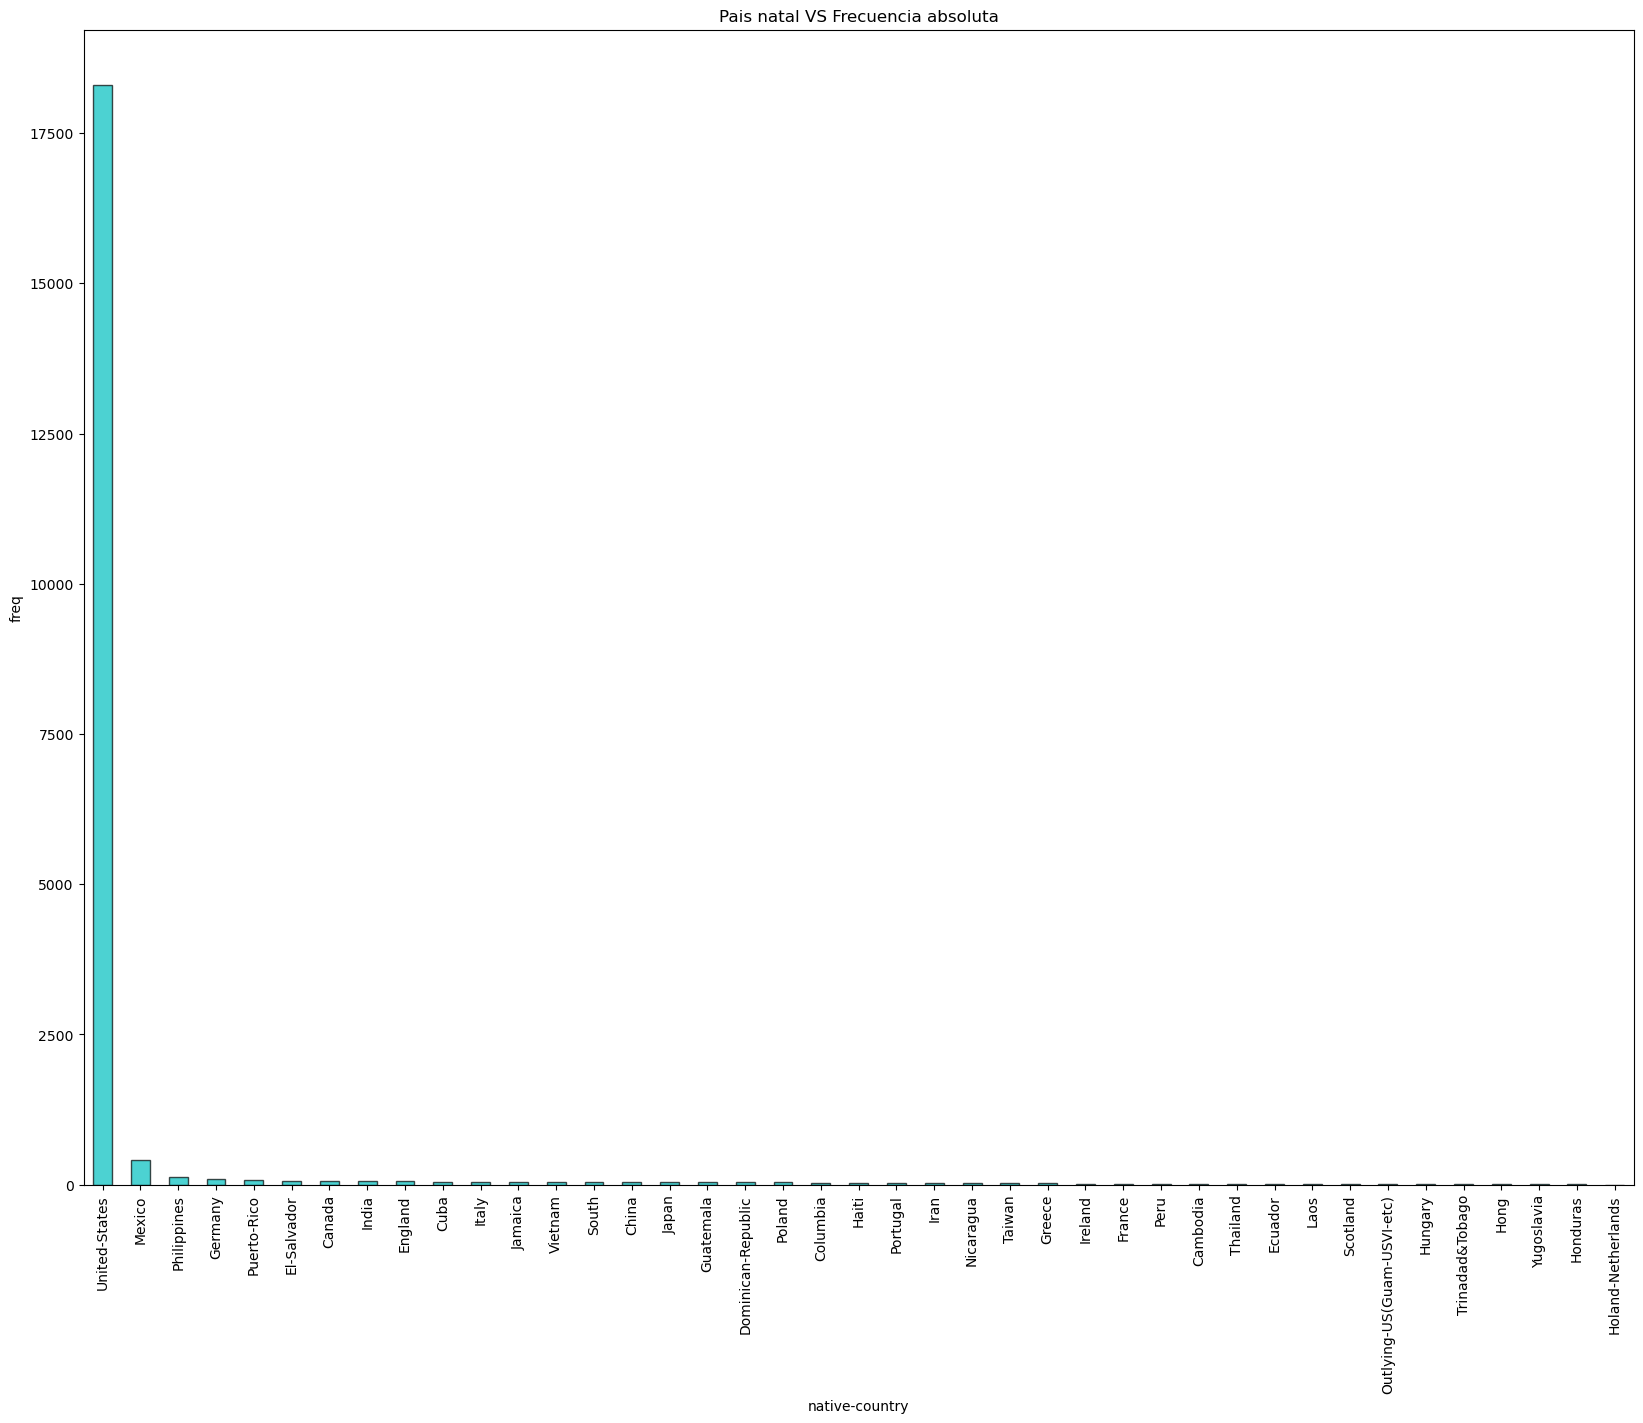

In [21]:
plt.figure(figsize=(20, 15))
census_copy1["native-country"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Pais natal VS Frecuencia absoluta")
plt.xlabel("native-country")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "native-country"

*El pais nativo es un atributo de registros categoricos que puede tomar valores entre 41 categorias (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands), donde "United-States" es el valor mas frecuente con 18305 datos de ciudadanos americanos.*

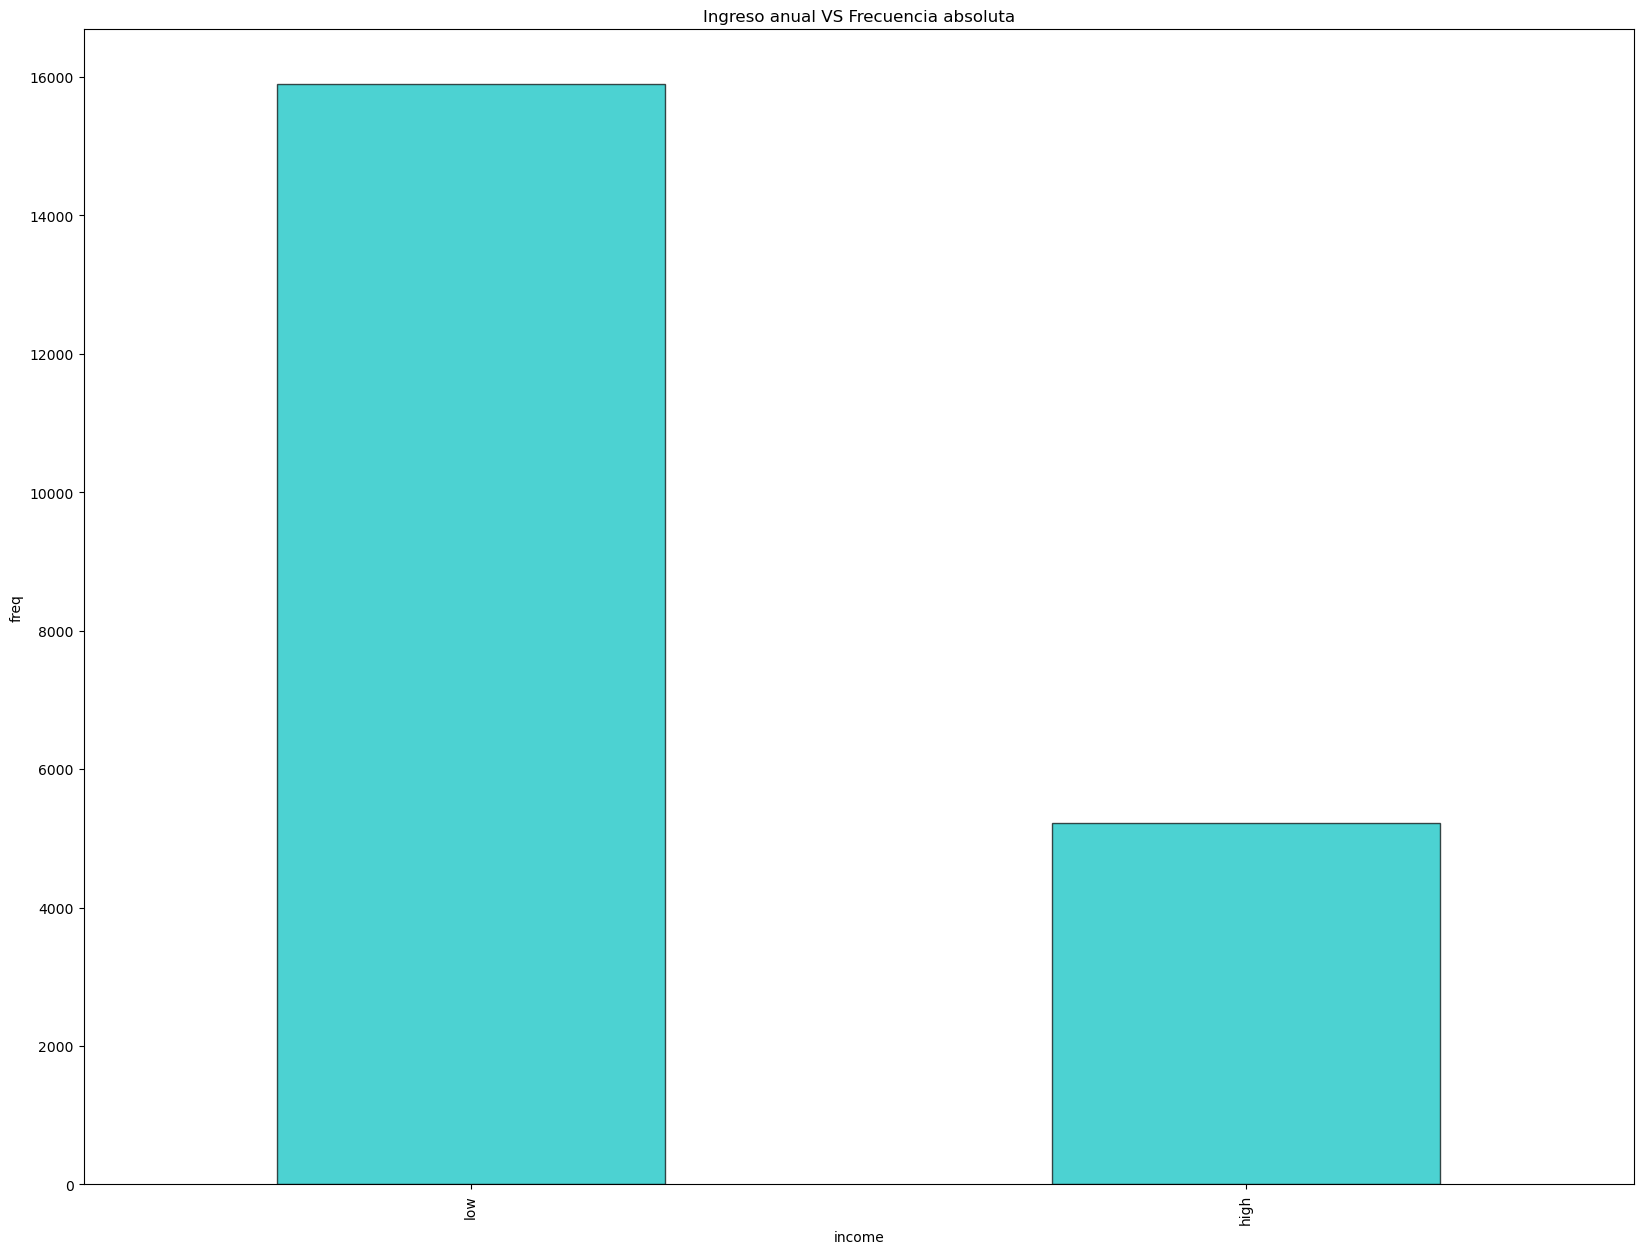

In [22]:
plt.figure(figsize=(20, 15))
census_copy1["income"].value_counts().plot(kind="bar", color="c", edgecolor="black", alpha=0.7)
plt.title("Ingreso anual VS Frecuencia absoluta")
plt.xlabel("income")
plt.ylabel('freq')
plt.show()

#### Resumen de la informacion del atributo "income"

*El ingreso anual es un atributo de registros categoricos que puede tomar valores entre 2 categorias (low, high), donde "low" es el valor mas frecuente con 15890 datos de ciudadanos americanos.*

## Valores faltantes

### census_copy1 - Dataset de entrenamiento (NA_fullTrain)

In [23]:
missingTrain_quantity = census_copy1.isnull().sum()

missingTrain_percentage = census_copy1.isnull().mean() * 100

#count the number of null values in each column

print("Cantidad faltante:\n", missingTrain_quantity)
print("Porcentaje faltante:\n", missingTrain_percentage)

Cantidad faltante:
 Id                   0
age                896
workclass          952
fnlwgt             973
education          964
education-num      917
marital-status     987
occupation         906
relationship       923
race               997
sex                918
capital-gain       912
capital-loss       878
hours-per-week     948
native-country    1026
income               0
dtype: int64
Porcentaje faltante:
 Id                0.000000
age               4.243831
workclass         4.509070
fnlwgt            4.608535
education         4.565907
education-num     4.343296
marital-status    4.674845
occupation        4.291195
relationship      4.371714
race              4.722209
sex               4.348032
capital-gain      4.319614
capital-loss      4.158575
hours-per-week    4.490125
native-country    4.859565
income            0.000000
dtype: float64


*Cada caracteristica tiene entre un 4-5% de valores faltantes. Por tanto, excluyendo el objetivo ("income") y el identificador ("Id") de cada registro, hay un total de 4-5% de datos faltantes en el dataset.*

### Impacto de los valores faltantes

*Los porcentajes de valores faltantes de todas las caracteristicas estan por debajo del 5% respecto a los valores de cada atributo. Este porcentaje no tendra un impacto relevante sobre el analisis de los datos. Esto quiere decir que la imputacion es manejable y no se requieren metodos refinados para ello. Completar los datos faltantes es necesario para poder aplicar algunos algoritmos sobre los datos y tener una interpretacion positiva (obtener "buenos" resultados del analisis de datos).*

In [24]:
features = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]

<Axes: >

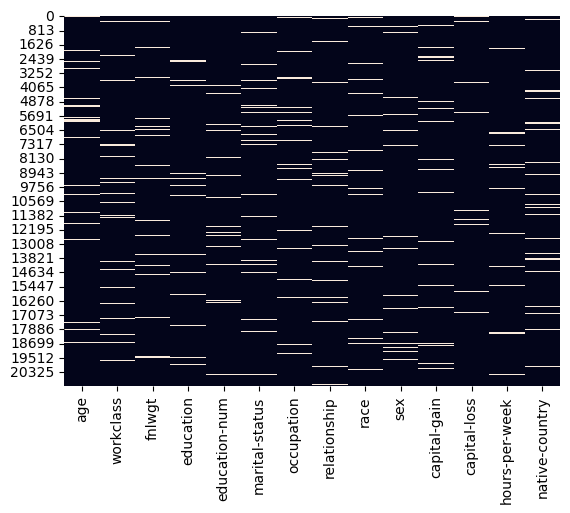

In [25]:
sns.heatmap(census_copy1[features].isna(), cbar=False)

### census_test1 - Dataset de prueba (NA_fullTest)

In [26]:
missingTest_quantity = census_test1.isnull().sum()

missingTest_percentage = census_test1.isnull().mean() * 100

print("Cantidad faltante:\n", missingTest_quantity)
print("Porcentaje faltante:\n", missingTest_percentage)

Cantidad faltante:
 Id                  0
age               397
workclass         399
fnlwgt            417
education         427
education-num     393
marital-status    432
occupation        396
relationship      390
race              429
sex               405
capital-gain      407
capital-loss      414
hours-per-week    397
native-country      0
dtype: int64
Porcentaje faltante:
 Id                0.000000
age               4.387225
workclass         4.409327
fnlwgt            4.608244
education         4.718753
education-num     4.343021
marital-status    4.774008
occupation        4.376174
relationship      4.309868
race              4.740855
sex               4.475633
capital-gain      4.497735
capital-loss      4.575091
hours-per-week    4.387225
native-country    0.000000
dtype: float64


*Cada caracteristica tiene entre un 4-5% de valores faltantes. Por tanto, excluyendo el objetivo ("income") y el identificador ("Id") de cada registro, hay un total de 4-5% de datos faltantes en el dataset.*

### Impacto de los valores faltantes

*Los porcentajes de valores faltantes de todas las caracteristicas estan por debajo del 5% respecto a los valores de cada atributo. Este porcentaje no tendra un impacto relevante sobre el analisis de los datos. Esto quiere decir que la imputacion es manejable y no se requieren metodos refinados para ello. Completar los datos faltantes es necesario para poder aplicar algunos algoritmos sobre los datos y tener una interpretacion positiva (obtener "buenos" resultados del analisis de datos).*

<Axes: >

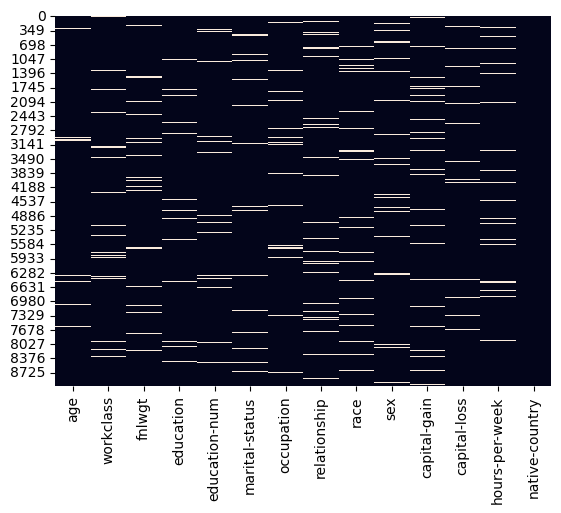

In [27]:
sns.heatmap(census_test1[features].isna(), cbar=False)

### Problema de clasificacion

*El dataset se puede utilizar para  relacionar sus distintas variables. En este caso, se puede usar para clasificar las caracteristicas "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country" con el objetivo "income", con el fin de crear un modelo de decision que prediga si una persona gana muchos o pocos ingresos anuales.*

# Preparacion de los datos

*Mejorar la calidad de los datos a traves de pre-procesamiento, utilizando tecnicas basadas en estadistica.*

*Para el preprocesamiento de los datos, considero que los valores del dataset no estan limpios ni preparados para su analisis y por tanto veo necesario aplicar algunas tecnica para mejorar su calidad.*

- *Imputacion:*
    - *Existen registros con valores faltantes, por lo cual la informacion viene incompleta.*
- *Reduccion de dimensionalidad:*
    - *Existen atributos redundantes e irrelevantes, por lo cual sus datos no son utiles para el analisis.*

*Es importante reemplazar, en el DataFrame, cada valor de las caracteristicas categoricas con codigo numericos correspondientes a las categorias originales, pues las tecnicas generales de imputacion necesitan que los datos de entrada sean cuantitativos.*

## census_copy1 - Dataset de entrenamiento (NA_fullTrain)

Media:  2.0480272817695258
Moda:  2
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  2.0


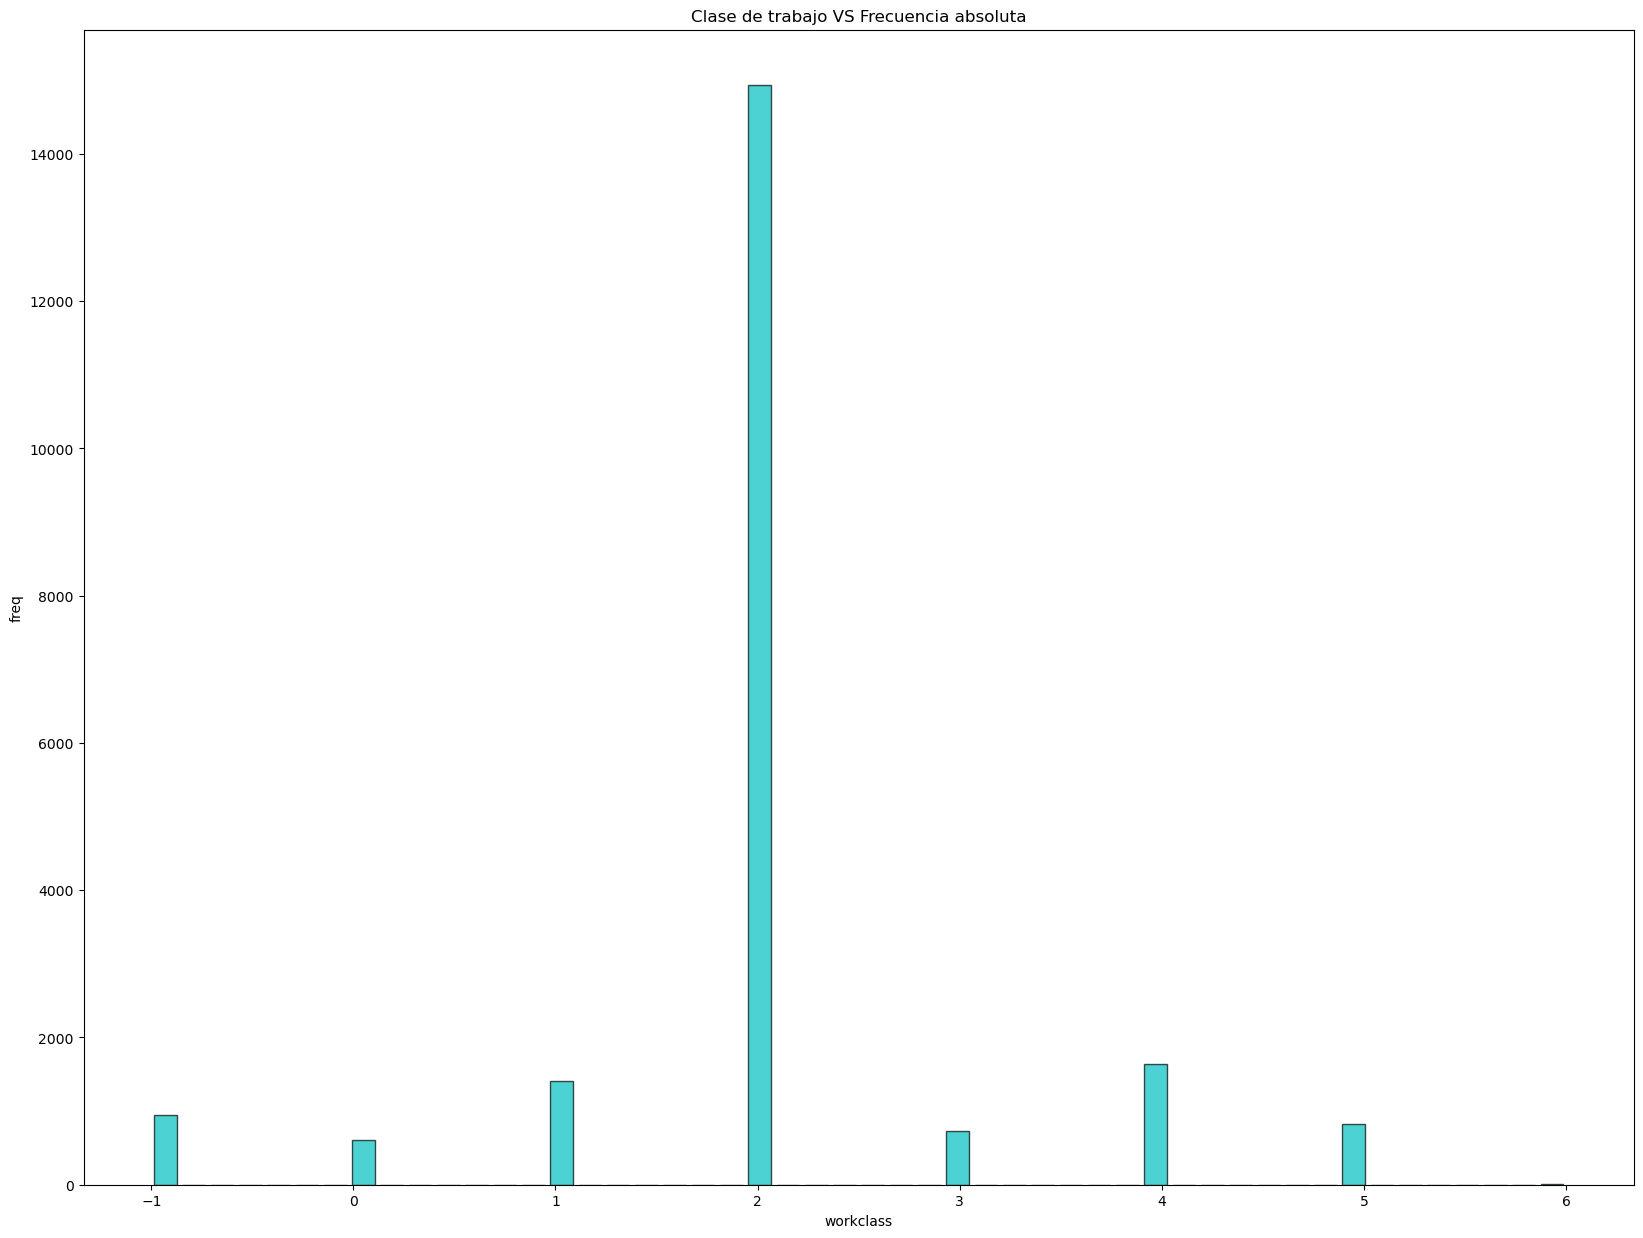

In [28]:
census_copy1["workclass"] = census_copy1["workclass"].astype("category").cat.codes
workclassInt_1 = census_copy1["workclass"]

workclassMean_1 = workclassInt_1.mean()
workclassMode_1 = workclassInt_1.mode()[0]
workclassQuantil1_1 = workclassInt_1.quantile(0.25)
workclassQuantil2_1 = workclassInt_1.quantile(0.50)
workclassQuantil3_1 = workclassInt_1.quantile(0.75)

print("Media: ", workclassMean_1)
print("Moda: ", workclassMode_1)
print("Primer Cuartil: ", workclassQuantil1_1)
print("Segundo Cuartil (Mediana): ", workclassQuantil2_1)
print("Tercer Cuartil: ", workclassQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["workclass"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Clase de trabajo VS Frecuencia absoluta")
plt.xlabel("workclass")
plt.ylabel("freq")
plt.show()

### workclass

Media:  9.830152039028087
Moda:  11
Primer Cuartil:  9.0
Segundo Cuartil (Mediana):  11.0
Tercer Cuartil:  12.0


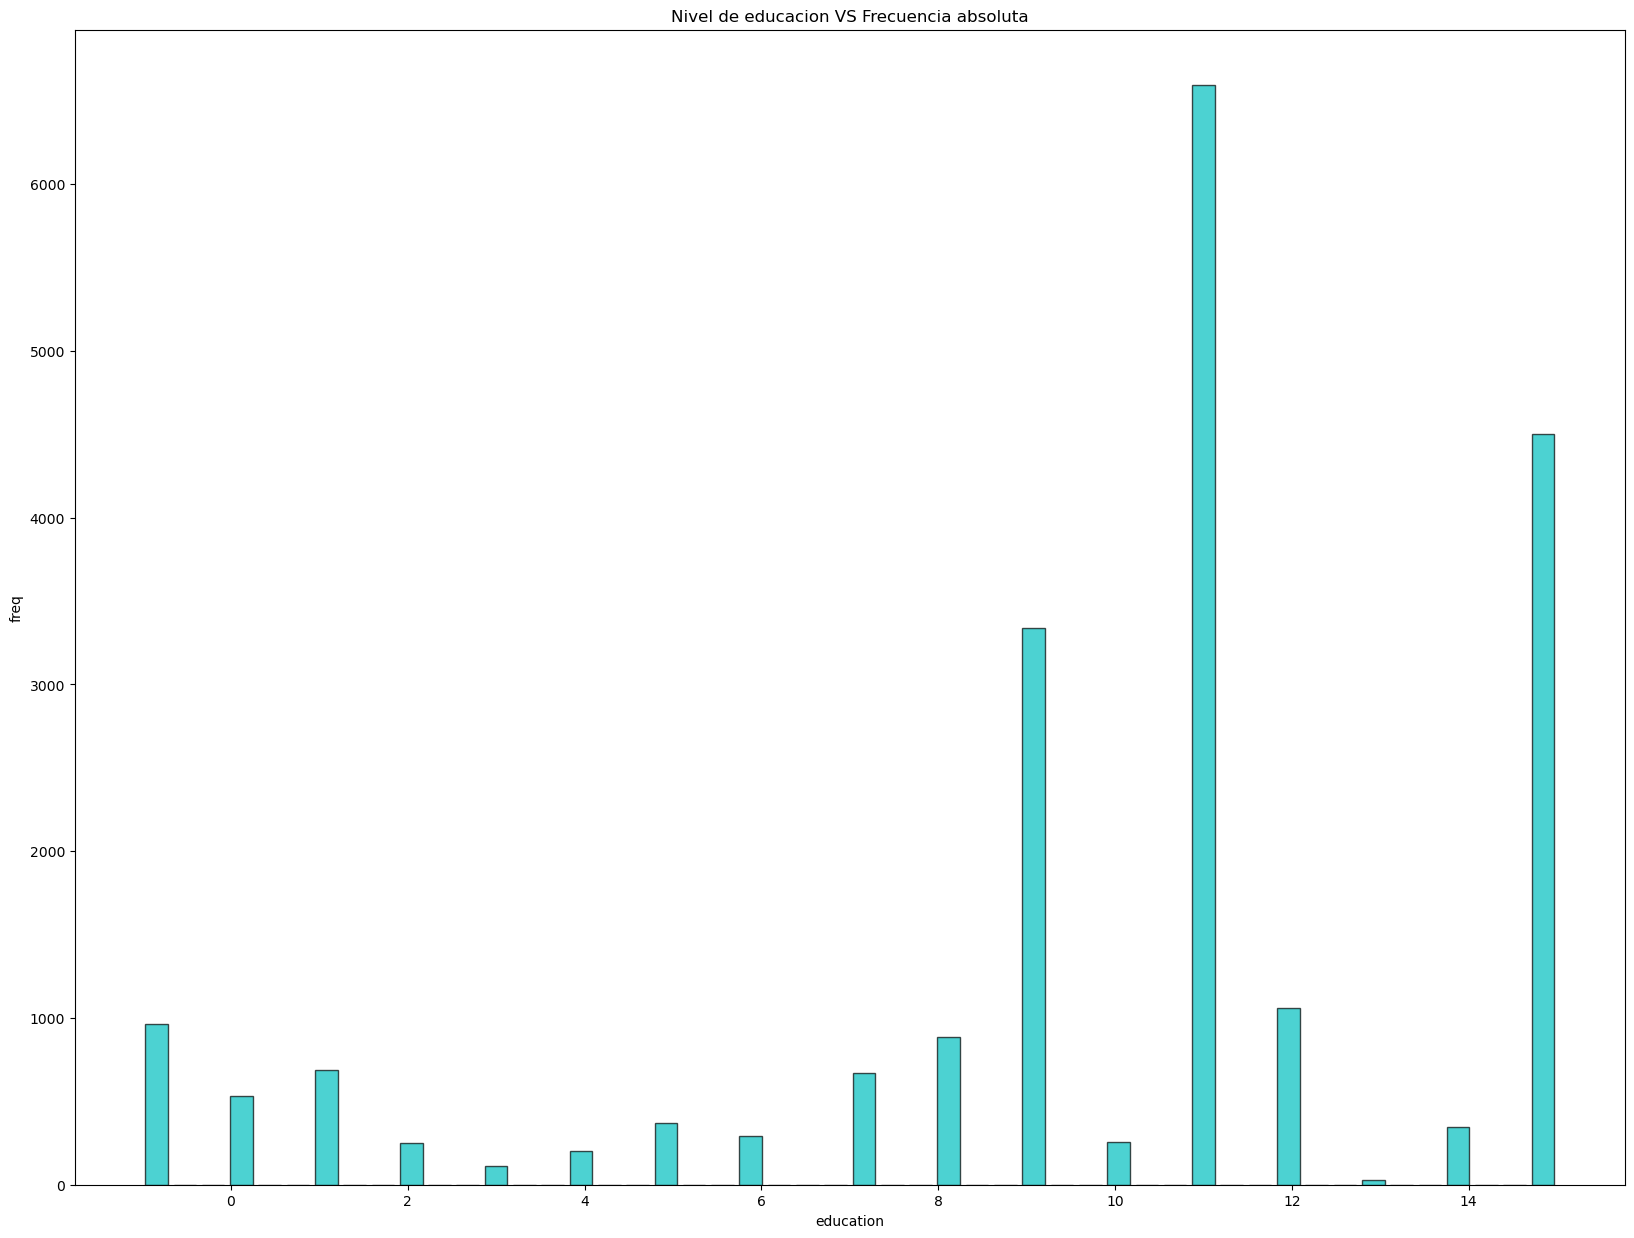

In [29]:
census_copy1["education"] = census_copy1["education"].astype("category").cat.codes
educationInt_1 = census_copy1["education"]

educationMean_1 = educationInt_1.mean()
educationMode_1 = educationInt_1.mode()[0]
educationQuantil1_1 = educationInt_1.quantile(0.25)
educationQuantil2_1 = educationInt_1.quantile(0.50)
educationQuantil3_1 = educationInt_1.quantile(0.75)

print("Media: ", educationMean_1)
print("Moda: ", educationMode_1)
print("Primer Cuartil: ", educationQuantil1_1)
print("Segundo Cuartil (Mediana): ", educationQuantil2_1)
print("Tercer Cuartil: ", educationQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["education"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Nivel de educacion VS Frecuencia absoluta")
plt.xlabel("education")
plt.ylabel("freq")
plt.show()

### education

Media:  2.413536683559892
Moda:  2
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  4.0


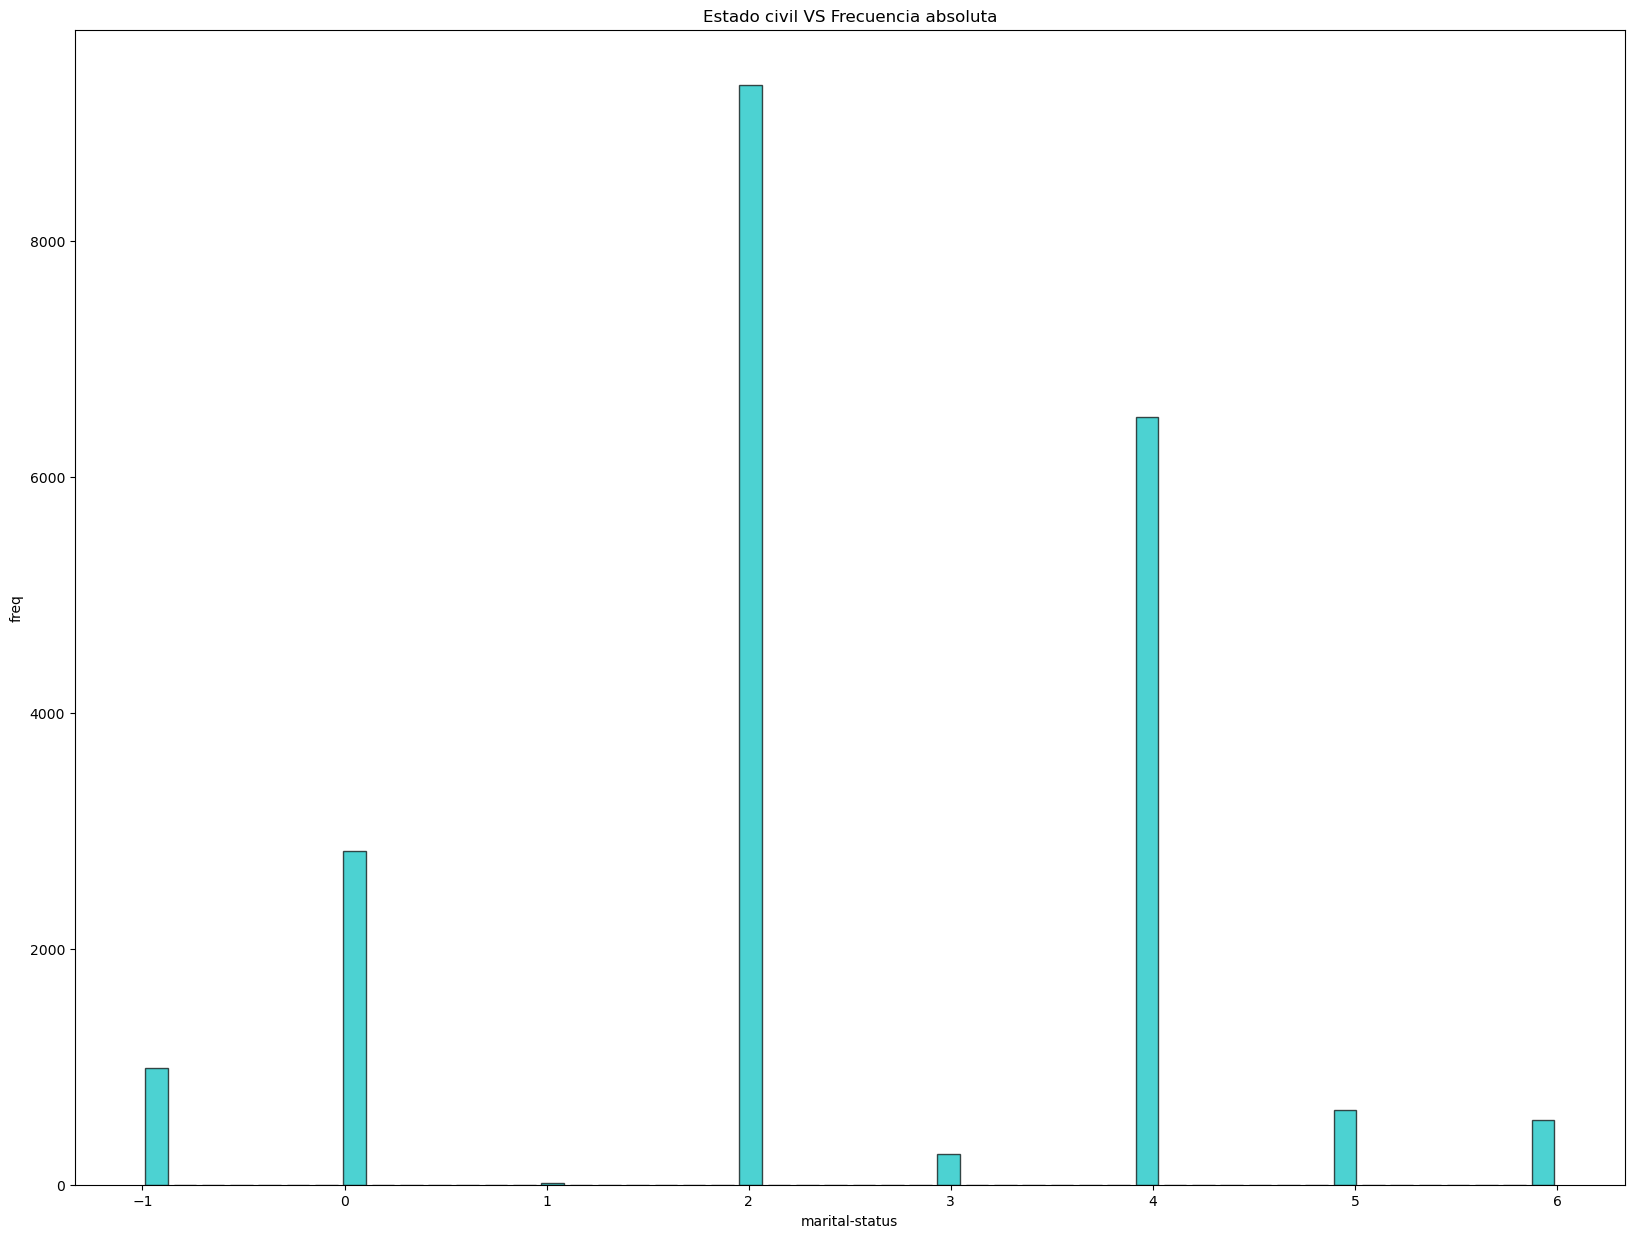

In [30]:
census_copy1["marital-status"] = census_copy1["marital-status"].astype("category").cat.codes
marital_statusInt_1 = census_copy1["marital-status"]

marital_statusMean_1 = marital_statusInt_1.mean()
marital_statusMode_1 = marital_statusInt_1.mode()[0]
marital_statusQuantil1_1 = marital_statusInt_1.quantile(0.25)
marital_statusQuantil2_1 = marital_statusInt_1.quantile(0.50)
marital_statusQuantil3_1 = marital_statusInt_1.quantile(0.75)

print("Media: ", marital_statusMean_1)
print("Moda: ", marital_statusMode_1)
print("Primer Cuartil: ", marital_statusQuantil1_1)
print("Segundo Cuartil (Mediana): ",marital_statusQuantil2_1)
print("Tercer Cuartil: ", marital_statusQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["marital-status"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Estado civil VS Frecuencia absoluta")
plt.xlabel("marital-status")
plt.ylabel("freq")
plt.show()

### marital-status

Media:  5.662151281201155
Moda:  2
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  6.0
Tercer Cuartil:  9.0


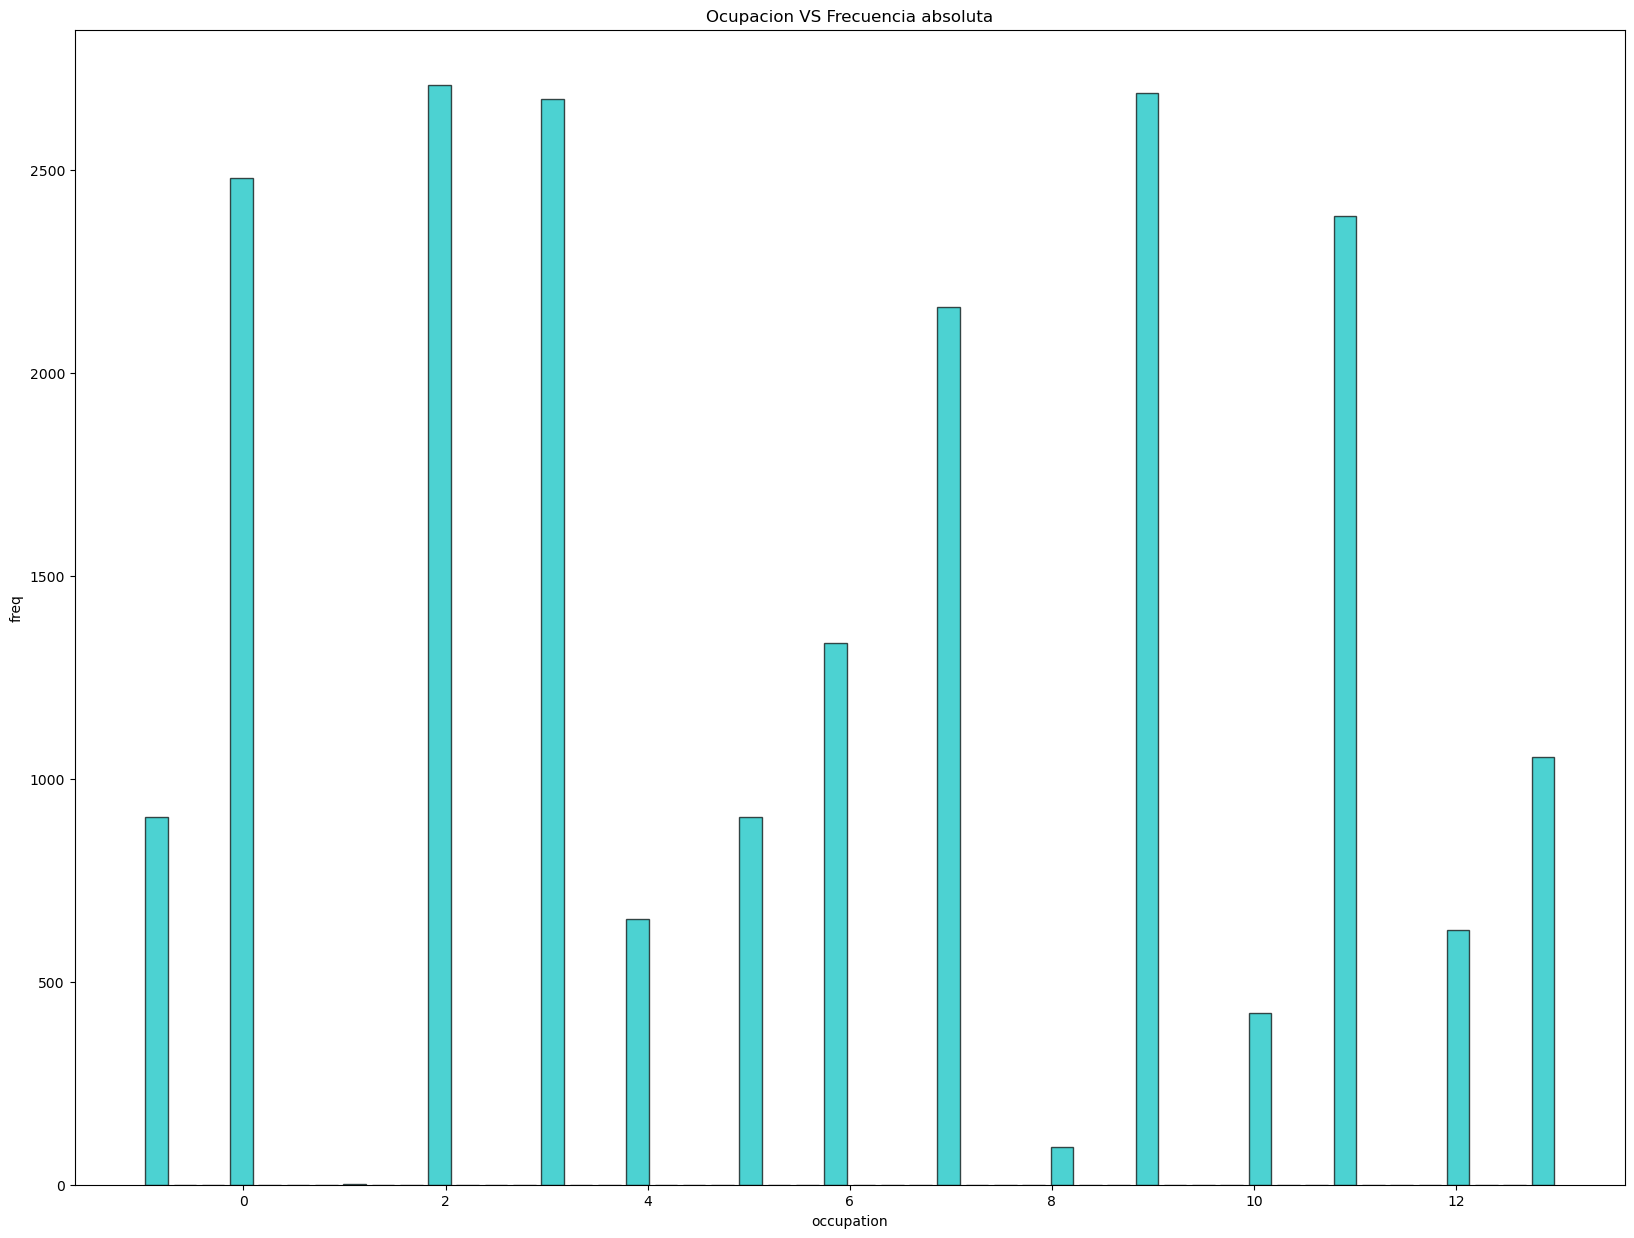

In [31]:
census_copy1["occupation"] = census_copy1["occupation"].astype("category").cat.codes
occupationInt_1 = census_copy1["occupation"]

occupationMean_1 = occupationInt_1.mean()
occupationMode_1 = occupationInt_1.mode()[0]
occupationQuantil1_1 = occupationInt_1.quantile(0.25)
occupationQuantil2_1 = occupationInt_1.quantile(0.50)
occupationQuantil3_1 = occupationInt_1.quantile(0.75)

print("Media: ", occupationMean_1)
print("Moda: ", occupationMode_1)
print("Primer Cuartil: ", occupationQuantil1_1)
print("Segundo Cuartil (Mediana): ", occupationQuantil2_1)
print("Tercer Cuartil: ", occupationQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["occupation"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ocupacion VS Frecuencia absoluta")
plt.xlabel("occupation")
plt.ylabel("freq")
plt.show()

### occupation

Media:  1.3212238904940083
Moda:  0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  3.0


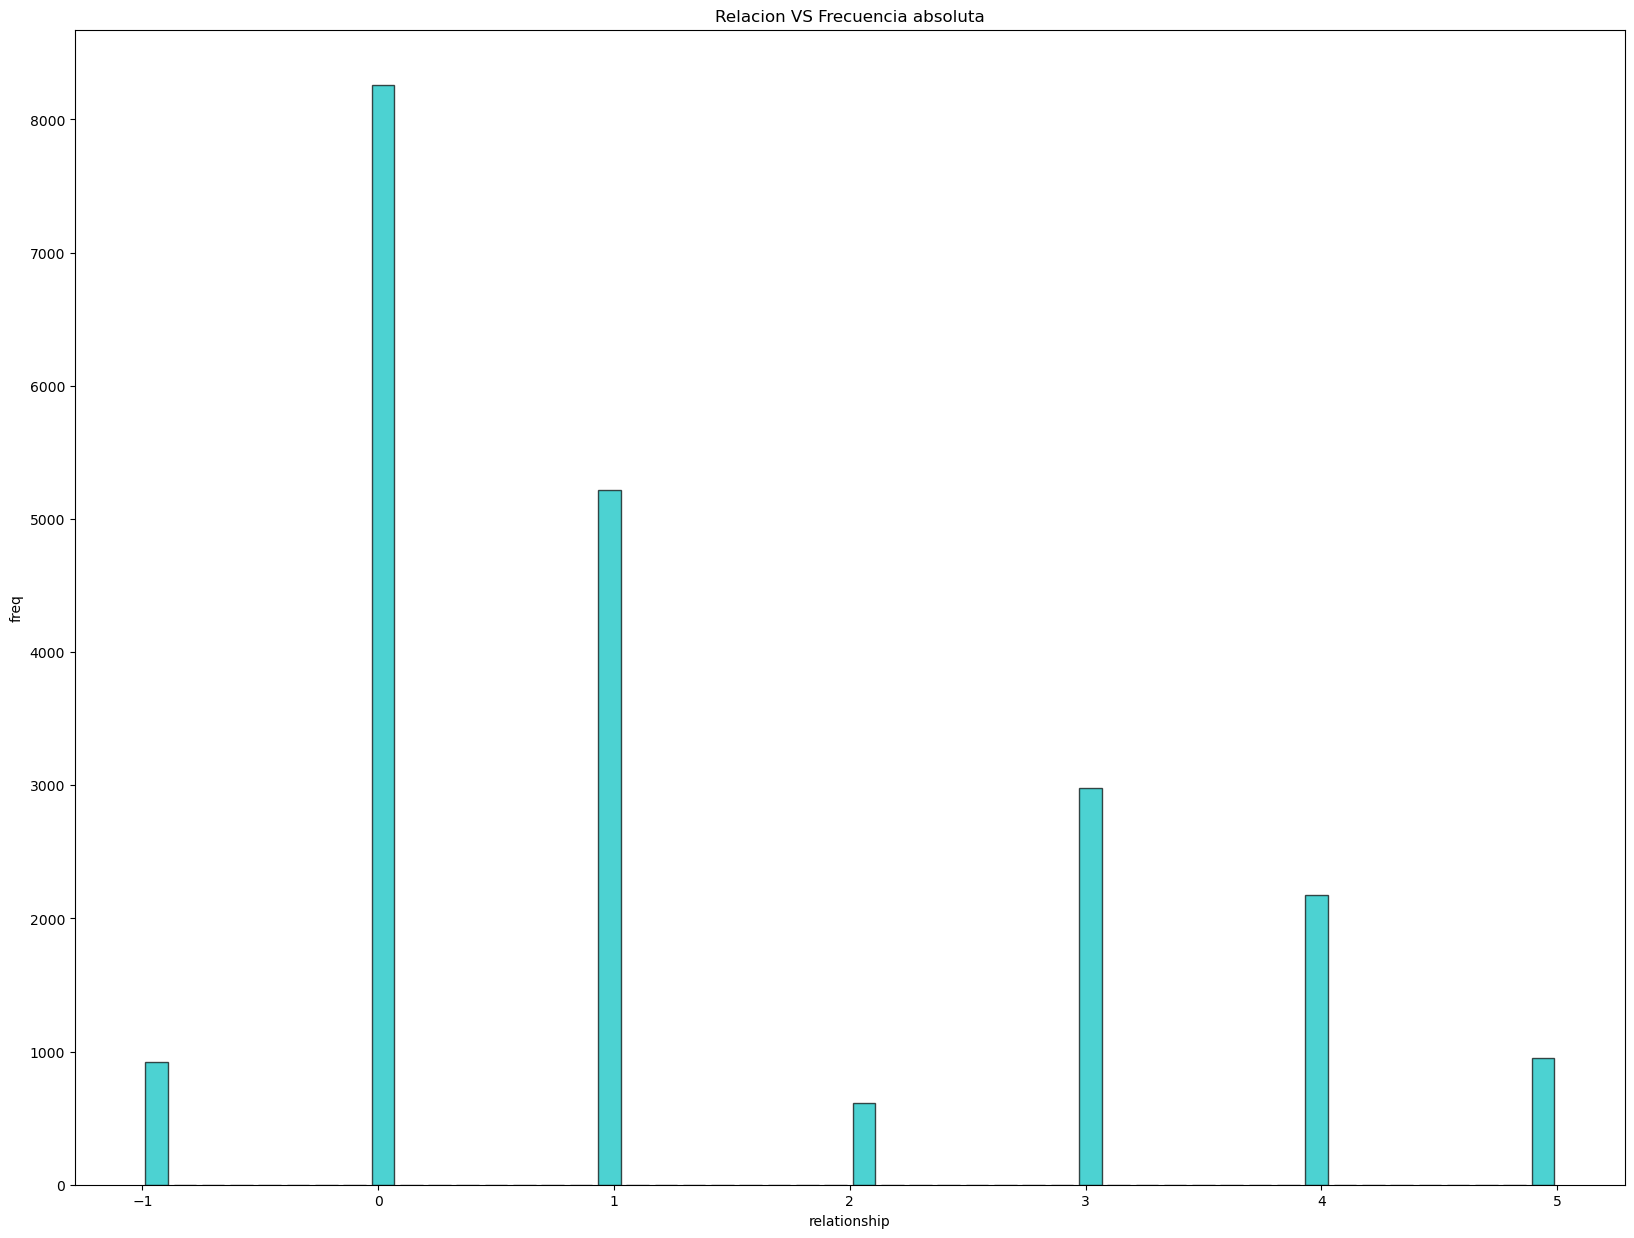

In [32]:
census_copy1["relationship"] = census_copy1["relationship"].astype("category").cat.codes
relationshipInt_1 = census_copy1["relationship"]

relationshipMean_1 = relationshipInt_1.mean()
relationshipMode_1 = relationshipInt_1.mode()[0]
relationshipQuantil1_1 = relationshipInt_1.quantile(0.25)
relationshipQuantil2_1 = relationshipInt_1.quantile(0.50)
relationshipQuantil3_1 = relationshipInt_1.quantile(0.75)

print("Media: ", relationshipMean_1)
print("Moda: ", relationshipMode_1)
print("Primer Cuartil: ", relationshipQuantil1_1)
print("Segundo Cuartil (Mediana): ", relationshipQuantil2_1)
print("Tercer Cuartil: ", relationshipQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["relationship"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Relacion VS Frecuencia absoluta")
plt.xlabel("relationship")
plt.ylabel("freq")
plt.show()

### relationship

Media:  3.4608061383981434
Moda:  4
Primer Cuartil:  4.0
Segundo Cuartil (Mediana):  4.0
Tercer Cuartil:  4.0


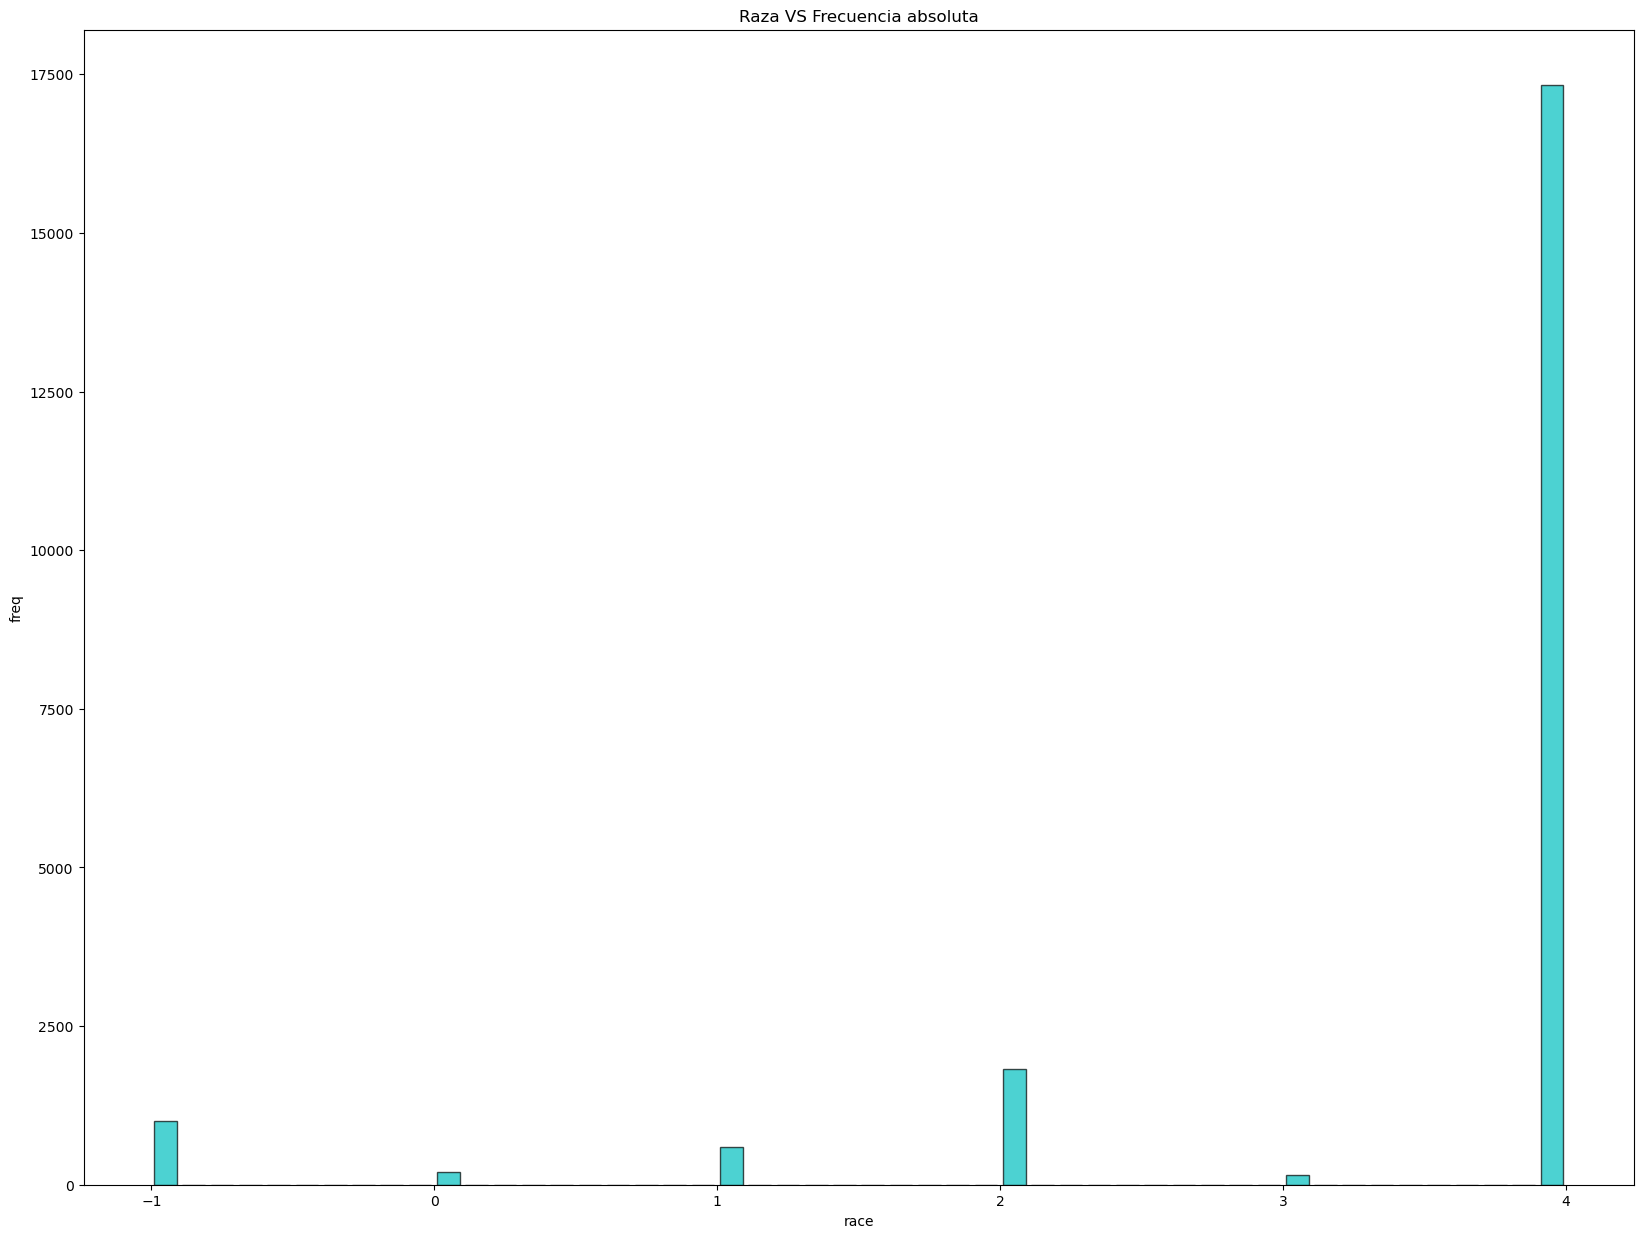

In [33]:
census_copy1["race"] = census_copy1["race"].astype("category").cat.codes
raceInt_1 = census_copy1["race"]

raceMean_1 = raceInt_1.mean()
raceMode_1 = raceInt_1.mode()[0]
raceQuantil1_1 = raceInt_1.quantile(0.25)
raceQuantil2_1 = raceInt_1.quantile(0.50)
raceQuantil3_1 = raceInt_1.quantile(0.75)

print("Media: ", raceMean_1)
print("Moda: ", raceMode_1)
print("Primer Cuartil: ", raceQuantil1_1)
print("Segundo Cuartil (Mediana): ", raceQuantil2_1)
print("Tercer Cuartil: ", raceQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["race"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Raza VS Frecuencia absoluta")
plt.xlabel("race")
plt.ylabel("freq")
plt.show()

### race

Media:  0.6028513238289206
Moda:  1
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  1.0


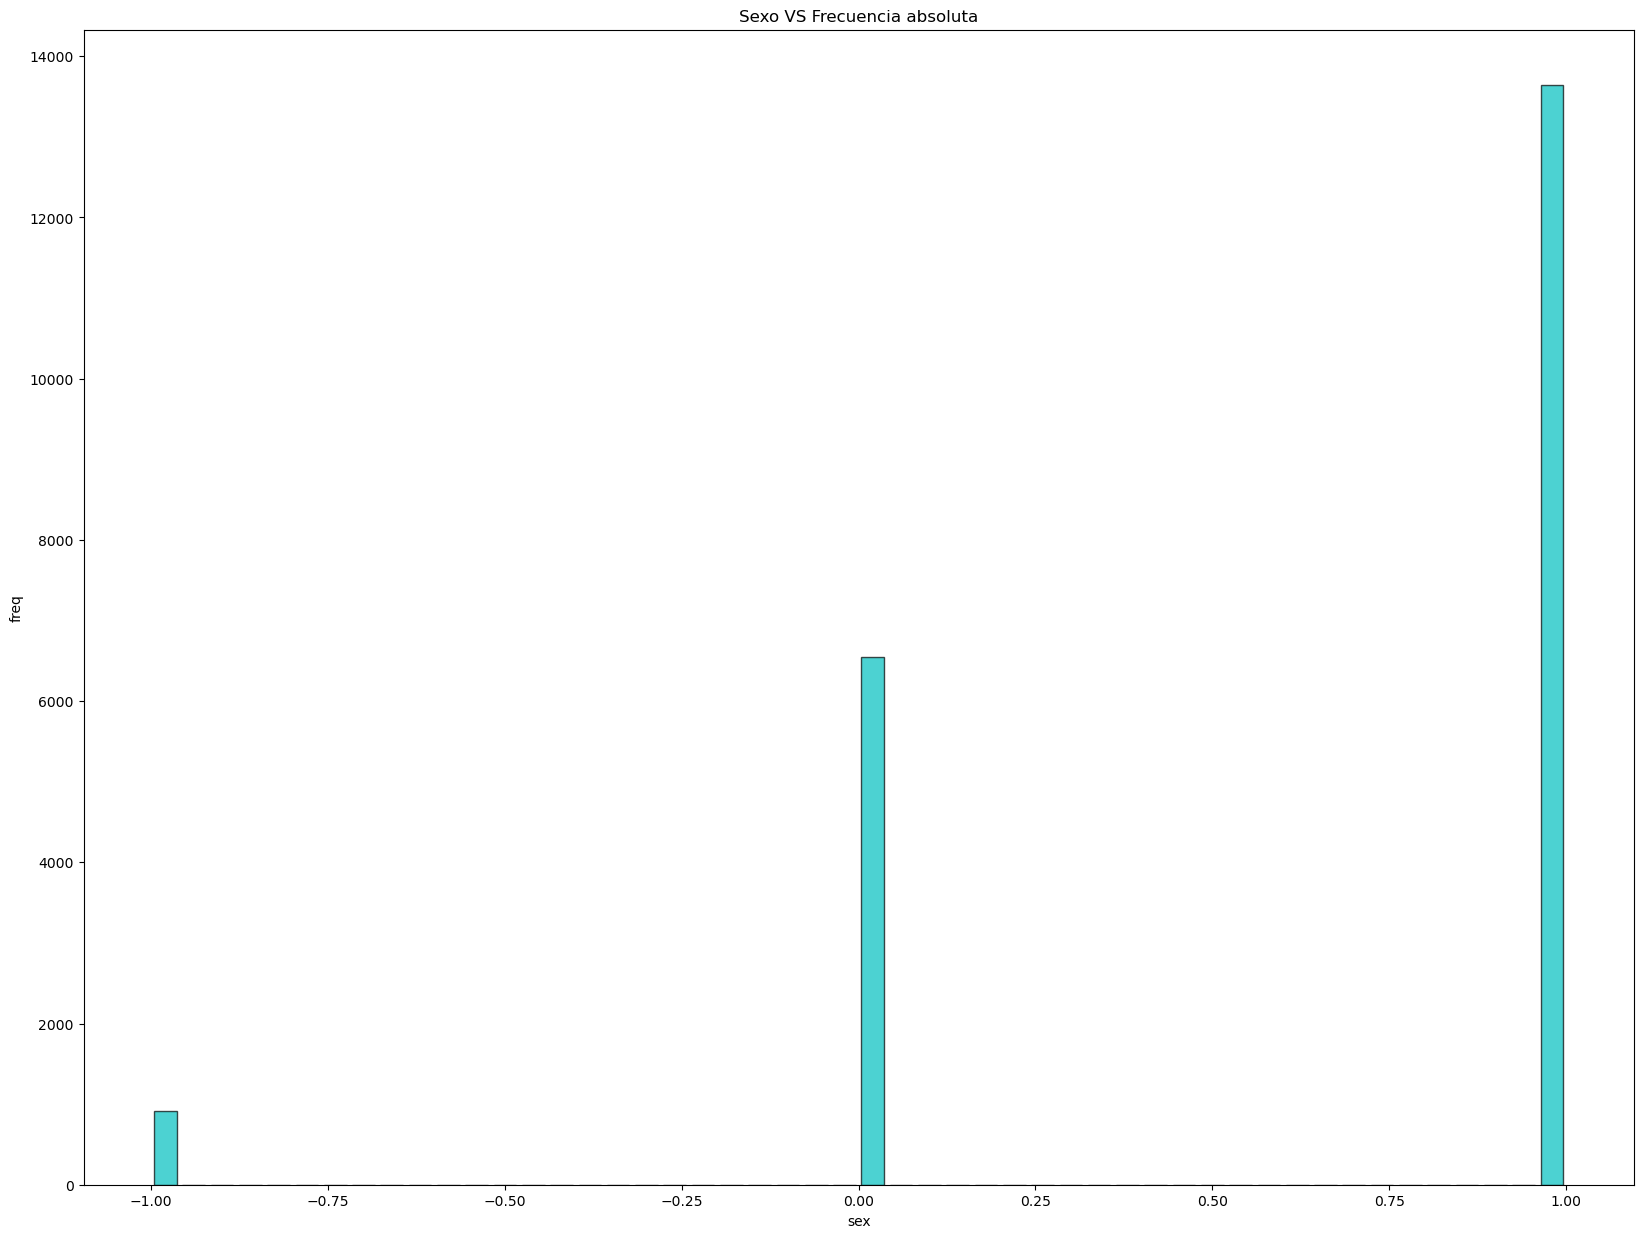

In [34]:
census_copy1["sex"] = census_copy1["sex"].astype("category").cat.codes
sexInt_1 = census_copy1["sex"]

sexMean_1 = sexInt_1.mean()
sexMode_1 = sexInt_1.mode()[0]
sexQuantil1_1 = sexInt_1.quantile(0.25)
sexQuantil2_1 = sexInt_1.quantile(0.50)
sexQuantil3_1 = sexInt_1.quantile(0.75)

print("Media: ", sexMean_1)
print("Moda: ", sexMode_1)
print("Primer Cuartil: ", sexQuantil1_1)
print("Segundo Cuartil (Mediana): ", sexQuantil2_1)
print("Tercer Cuartil: ", sexQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["sex"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Sexo VS Frecuencia absoluta")
plt.xlabel("sex")
plt.ylabel("freq")
plt.show()

### sex

Media:  34.58096907118837
Moda:  38
Primer Cuartil:  38.0
Segundo Cuartil (Mediana):  38.0
Tercer Cuartil:  38.0


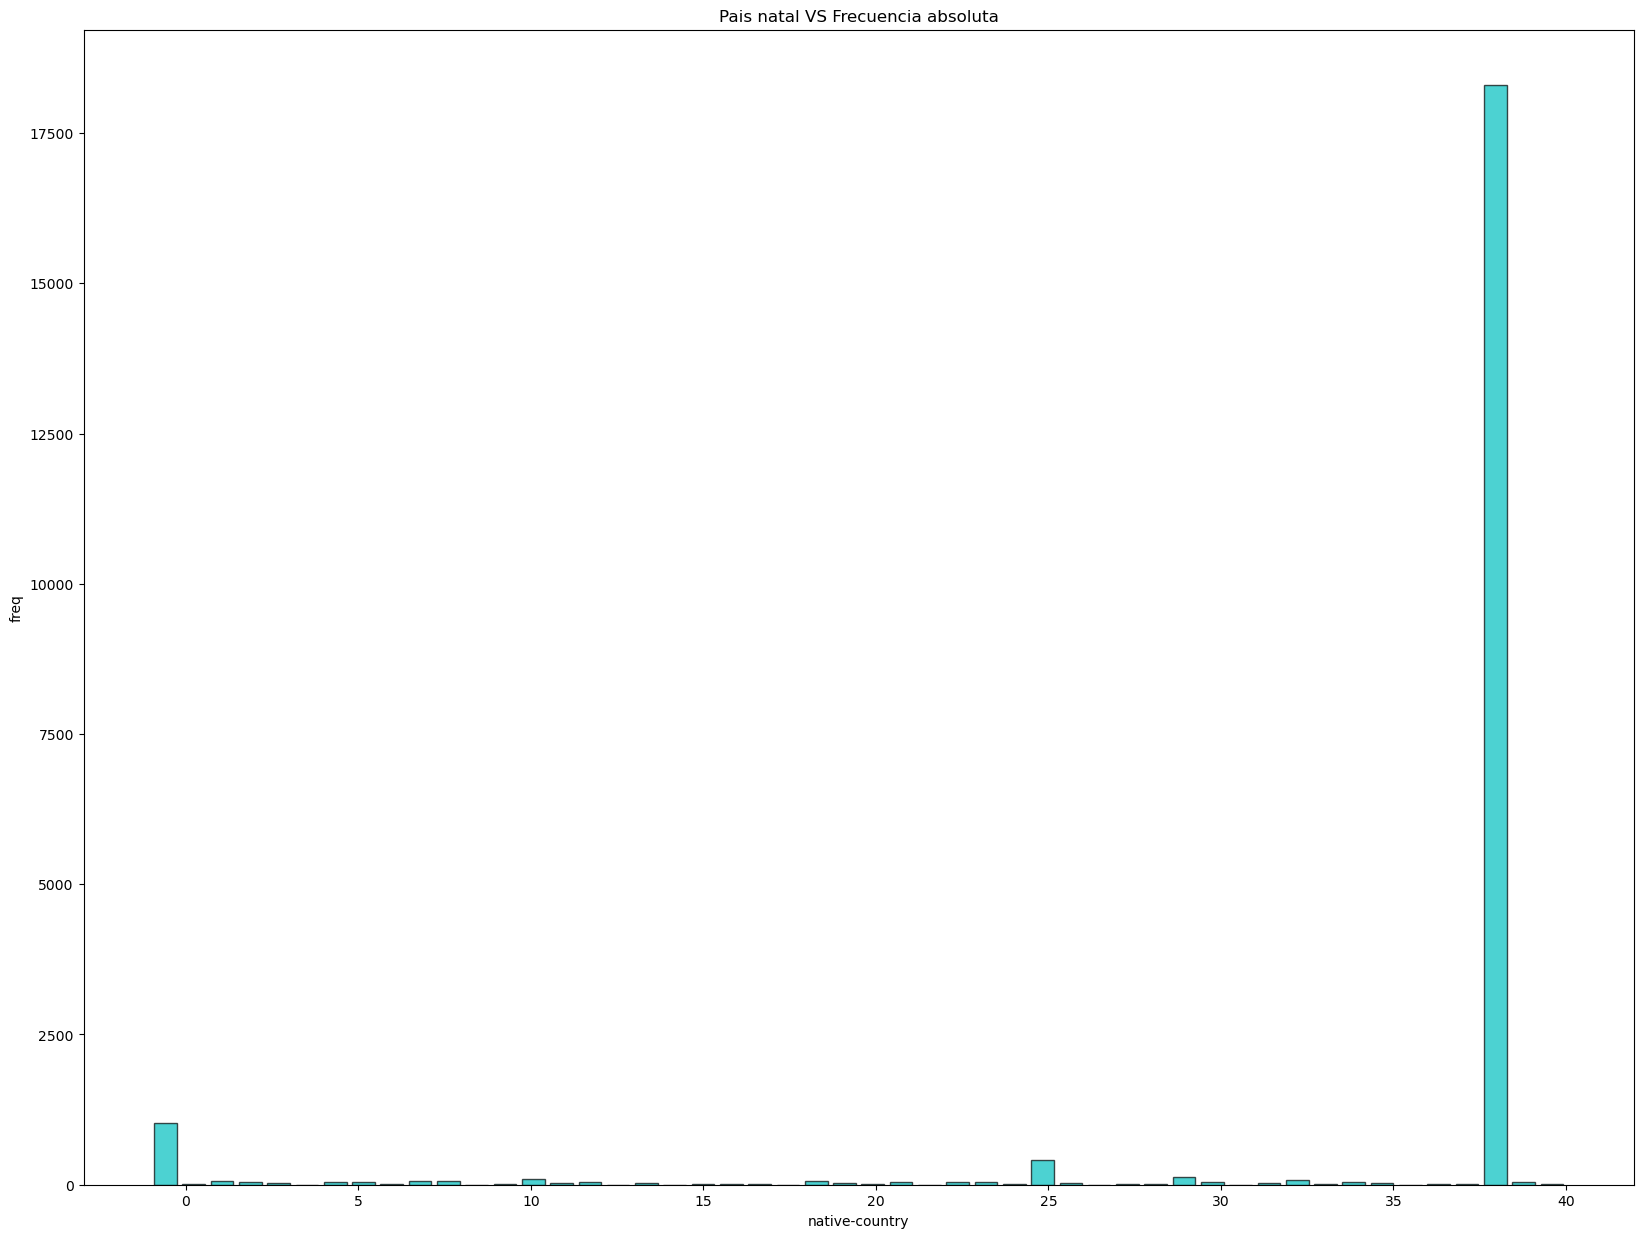

In [35]:
census_copy1["native-country"] = census_copy1["native-country"].astype("category").cat.codes
native_countryInt_1 = census_copy1["native-country"]

native_countryMean_1 = native_countryInt_1.mean()
native_countryMode_1 = native_countryInt_1.mode()[0]
native_countryQuantil1_1 = native_countryInt_1.quantile(0.25)
native_countryQuantil2_1 = native_countryInt_1.quantile(0.50)
native_countryQuantil3_1 = native_countryInt_1.quantile(0.75)

print("Media: ", native_countryMean_1)
print("Moda: ", native_countryMode_1)
print("Primer Cuartil: ", native_countryQuantil1_1)
print("Segundo Cuartil (Mediana): ", native_countryQuantil2_1)
print("Tercer Cuartil: ", native_countryQuantil3_1)

plt.figure(figsize=(20, 15))
census_copy1["native-country"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Pais natal VS Frecuencia absoluta")
plt.xlabel("native-country")
plt.ylabel("freq")
plt.show()

### native-country

*Gracias al Analisis Exploratorio de Datos se puede verificar que las 8 variables cualitativas transformadas a cuantitativas estan tomando registros de valor "-1", lo cual indica que son sus datos con valores faltantes. Estos atributos son: "workclass", "education", "marital-status", "occupation", "relationship", "race, "sex" y "native-country".*

In [36]:
census_copy1[features].isnull().sum()

age               896
workclass           0
fnlwgt            973
education           0
education-num     917
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain      912
capital-loss      878
hours-per-week    948
native-country      0
dtype: int64

In [37]:
census_copy1[features] = census_copy1[features].replace(-1, nan)
census_copy1

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,15977,44.0,2.0,222978.0,11.0,9.0,0.0,11.0,1.0,4.0,0.0,0.0,1504.0,40.0,38.0,low
1,13574,32.0,2.0,83253.0,15.0,10.0,2.0,13.0,0.0,4.0,1.0,0.0,0.0,60.0,38.0,low
2,23210,30.0,1.0,327825.0,11.0,9.0,0.0,10.0,3.0,4.0,0.0,0.0,0.0,32.0,38.0,low
3,9284,23.0,2.0,109952.0,15.0,10.0,2.0,NaN,0.0,4.0,1.0,0.0,0.0,60.0,38.0,low
4,8841,54.0,1.0,204325.0,15.0,10.0,2.0,10.0,NaN,4.0,1.0,0.0,0.0,52.0,38.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.0,10.0,16.0,0.0,9.0,1.0,4.0,0.0,3273.0,0.0,40.0,38.0,low
21109,21206,50.0,2.0,158680.0,12.0,14.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,50.0,38.0,high
21110,10646,50.0,2.0,72351.0,9.0,13.0,0.0,NaN,1.0,4.0,1.0,0.0,0.0,45.0,38.0,low
21111,11687,49.0,4.0,NaN,9.0,13.0,2.0,NaN,0.0,4.0,1.0,0.0,0.0,60.0,38.0,high


In [38]:
missingTrain_quantity = census_copy1[features].isnull().sum()

missingTrain_percentage = census_copy1[features].isnull().mean() * 100

print("Cantidad faltante:\n", missingTrain_quantity)
print("Porcentaje faltante:\n", missingTrain_percentage)

Cantidad faltante:
 age                896
workclass          952
fnlwgt             973
education          964
education-num      917
marital-status     987
occupation         906
relationship       923
race               997
sex                918
capital-gain       912
capital-loss       878
hours-per-week     948
native-country    1026
dtype: int64
Porcentaje faltante:
 age               4.243831
workclass         4.509070
fnlwgt            4.608535
education         4.565907
education-num     4.343296
marital-status    4.674845
occupation        4.291195
relationship      4.371714
race              4.722209
sex               4.348032
capital-gain      4.319614
capital-loss      4.158575
hours-per-week    4.490125
native-country    4.859565
dtype: float64


## census_test1 - Dataset de prueba (NA_fullTest)

Media:  2.070615537628467
Moda:  2
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  2.0


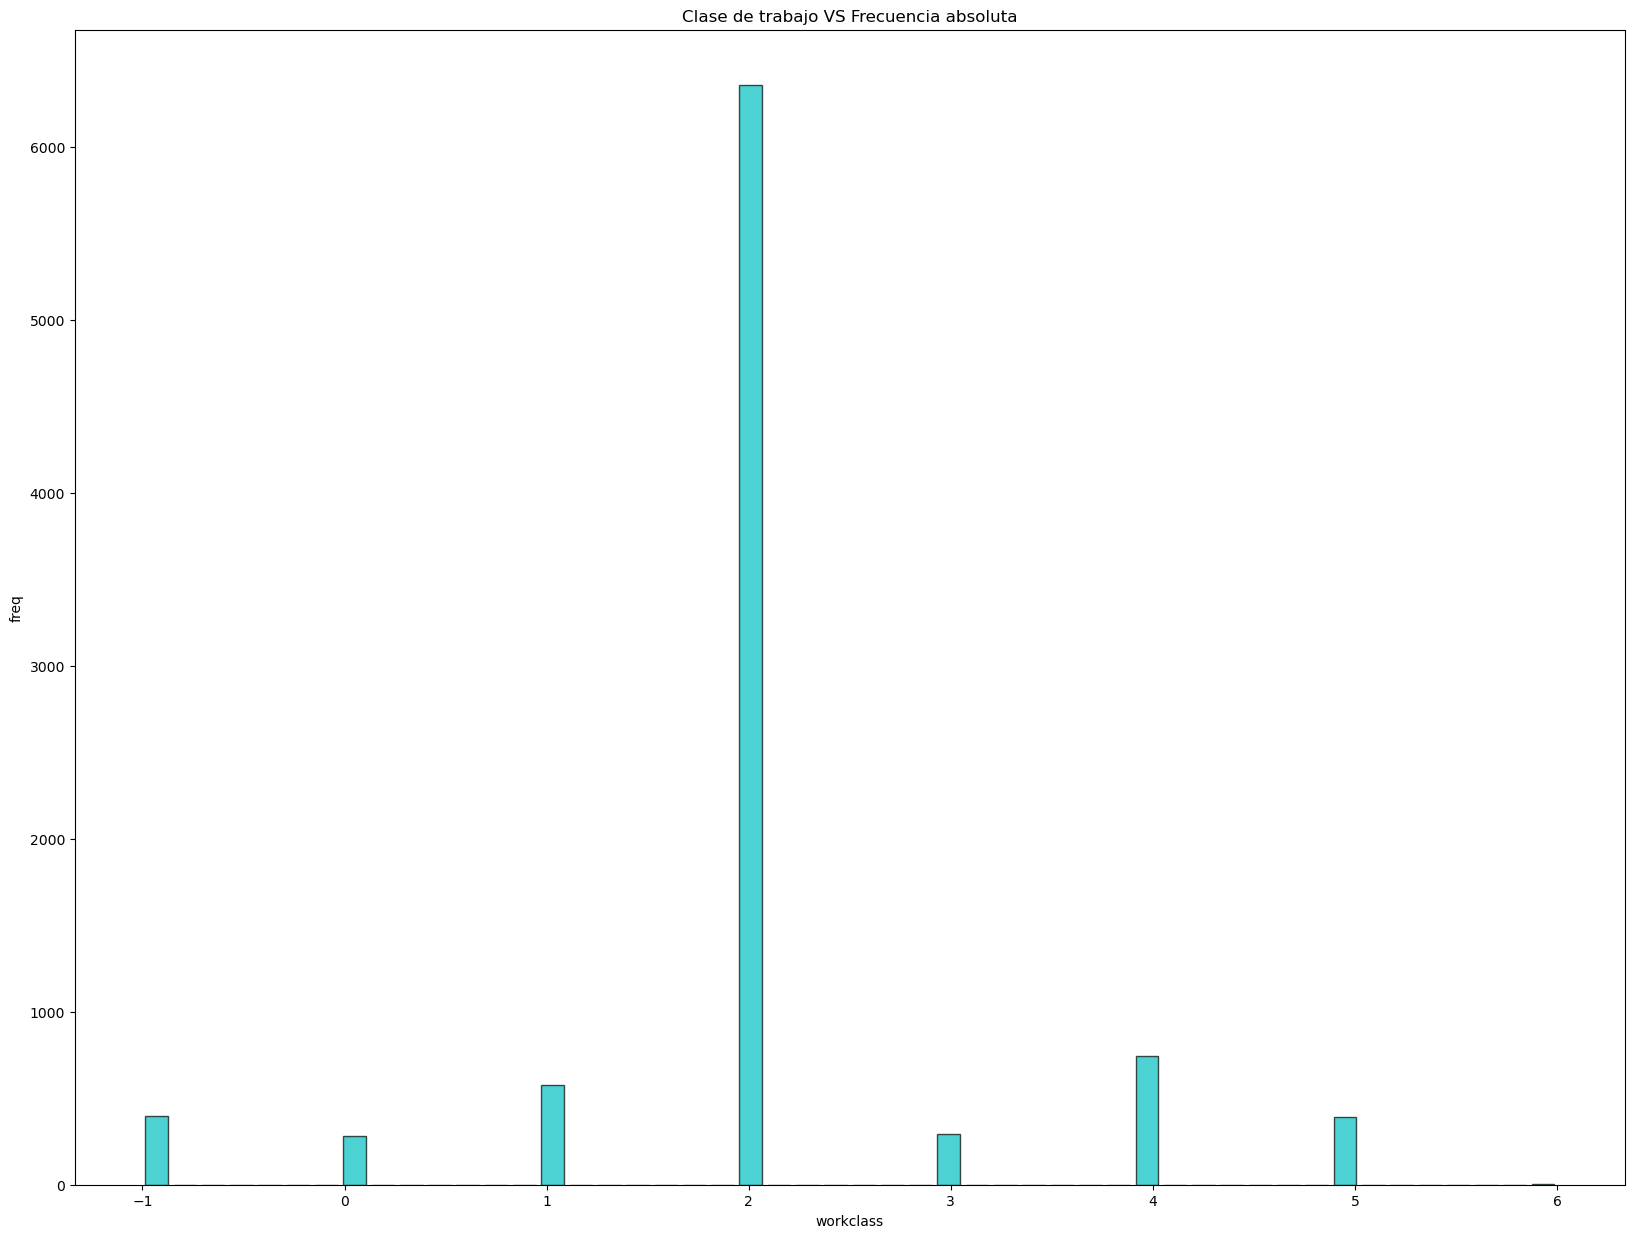

In [39]:
census_test1["workclass"] = census_test1["workclass"].astype("category").cat.codes
workclassInt_2 = census_test1["workclass"]

workclassMean_2 = workclassInt_2.mean()
workclassMode_2 = workclassInt_2.mode()[0]
workclassQuantil1_2 = workclassInt_2.quantile(0.25)
workclassQuantil2_2 = workclassInt_2.quantile(0.50)
workclassQuantil3_2 = workclassInt_2.quantile(0.75)

print("Media: ", workclassMean_2)
print("Moda: ", workclassMode_2)
print("Primer Cuartil: ", workclassQuantil1_2)
print("Segundo Cuartil (Mediana): ", workclassQuantil2_2)
print("Tercer Cuartil: ", workclassQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["workclass"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Clase de trabajo VS Frecuencia absoluta")
plt.xlabel("workclass")
plt.ylabel("freq")
plt.show()

### workclass

Media:  9.742734003757322
Moda:  11
Primer Cuartil:  9.0
Segundo Cuartil (Mediana):  11.0
Tercer Cuartil:  12.0


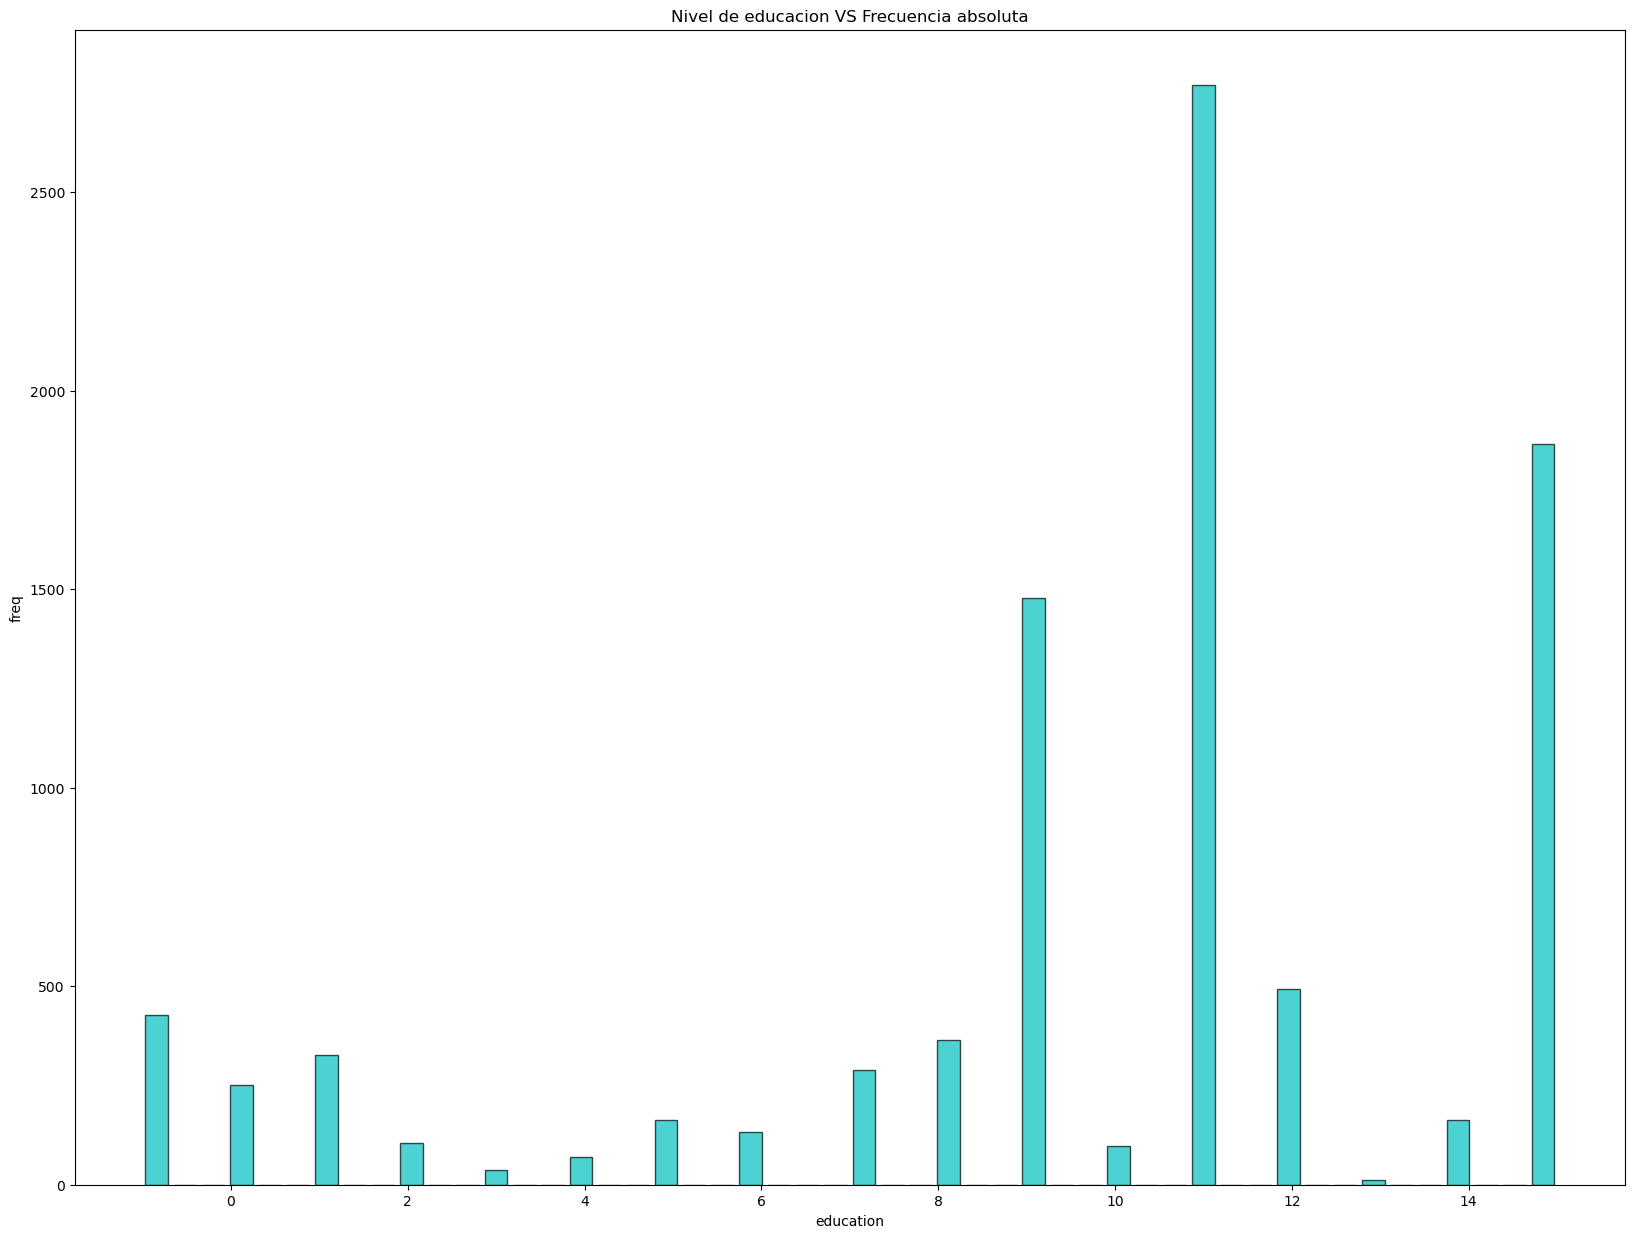

In [40]:
census_test1["education"] = census_test1["education"].astype("category").cat.codes
educationInt_2 = census_test1["education"]

educationMean_2 = educationInt_2.mean()
educationMode_2 = educationInt_2.mode()[0]
educationQuantil1_2 = educationInt_2.quantile(0.25)
educationQuantil2_2 = educationInt_2.quantile(0.50)
educationQuantil3_2 = educationInt_2.quantile(0.75)

print("Media: ", educationMean_2)
print("Moda: ", educationMode_2)
print("Primer Cuartil: ", educationQuantil1_2)
print("Segundo Cuartil (Mediana): ", educationQuantil2_2)
print("Tercer Cuartil: ", educationQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["education"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Nivel de educacion VS Frecuencia absoluta")
plt.xlabel("education")
plt.ylabel("freq")
plt.show()

### education

Media:  2.4076693557299147
Moda:  2
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  4.0


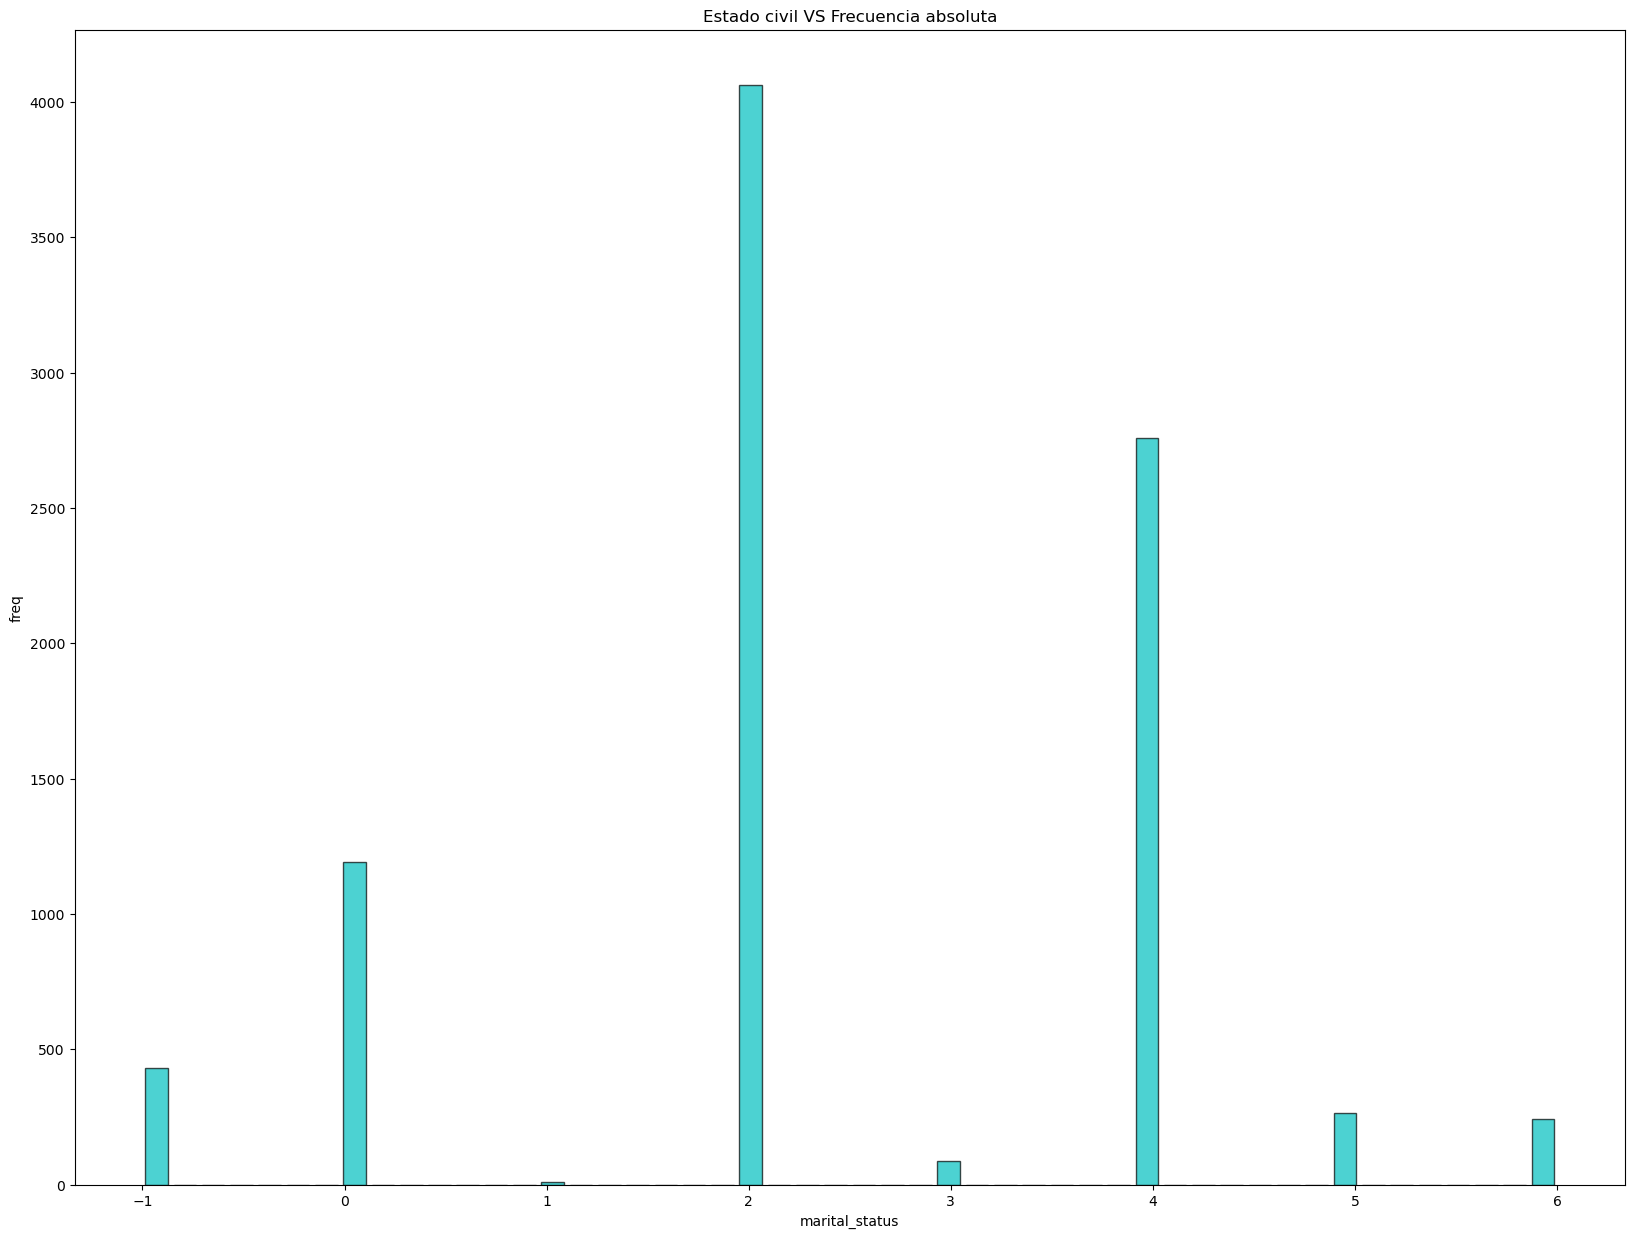

In [41]:
census_test1["marital-status"] = census_test1["marital-status"].astype("category").cat.codes
marital_statusInt_2 = census_test1["marital-status"]

marital_statusMean_2 = marital_statusInt_2.mean()
marital_statusMode_2 = marital_statusInt_2.mode()[0]
marital_statusQuantil1_2 = marital_statusInt_2.quantile(0.25)
marital_statusQuantil2_2 = marital_statusInt_2.quantile(0.50)
marital_statusQuantil3_2 = marital_statusInt_2.quantile(0.75)

print("Media: ", marital_statusMean_2)
print("Moda: ", marital_statusMode_2)
print("Primer Cuartil: ", marital_statusQuantil1_2)
print("Segundo Cuartil (Mediana): ", marital_statusQuantil2_2)
print("Tercer Cuartil: ", marital_statusQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["marital-status"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Estado civil VS Frecuencia absoluta")
plt.xlabel("marital_status")
plt.ylabel("freq")
plt.show()

### marital-status

Media:  5.65333185987402
Moda:  9
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  6.0
Tercer Cuartil:  9.0


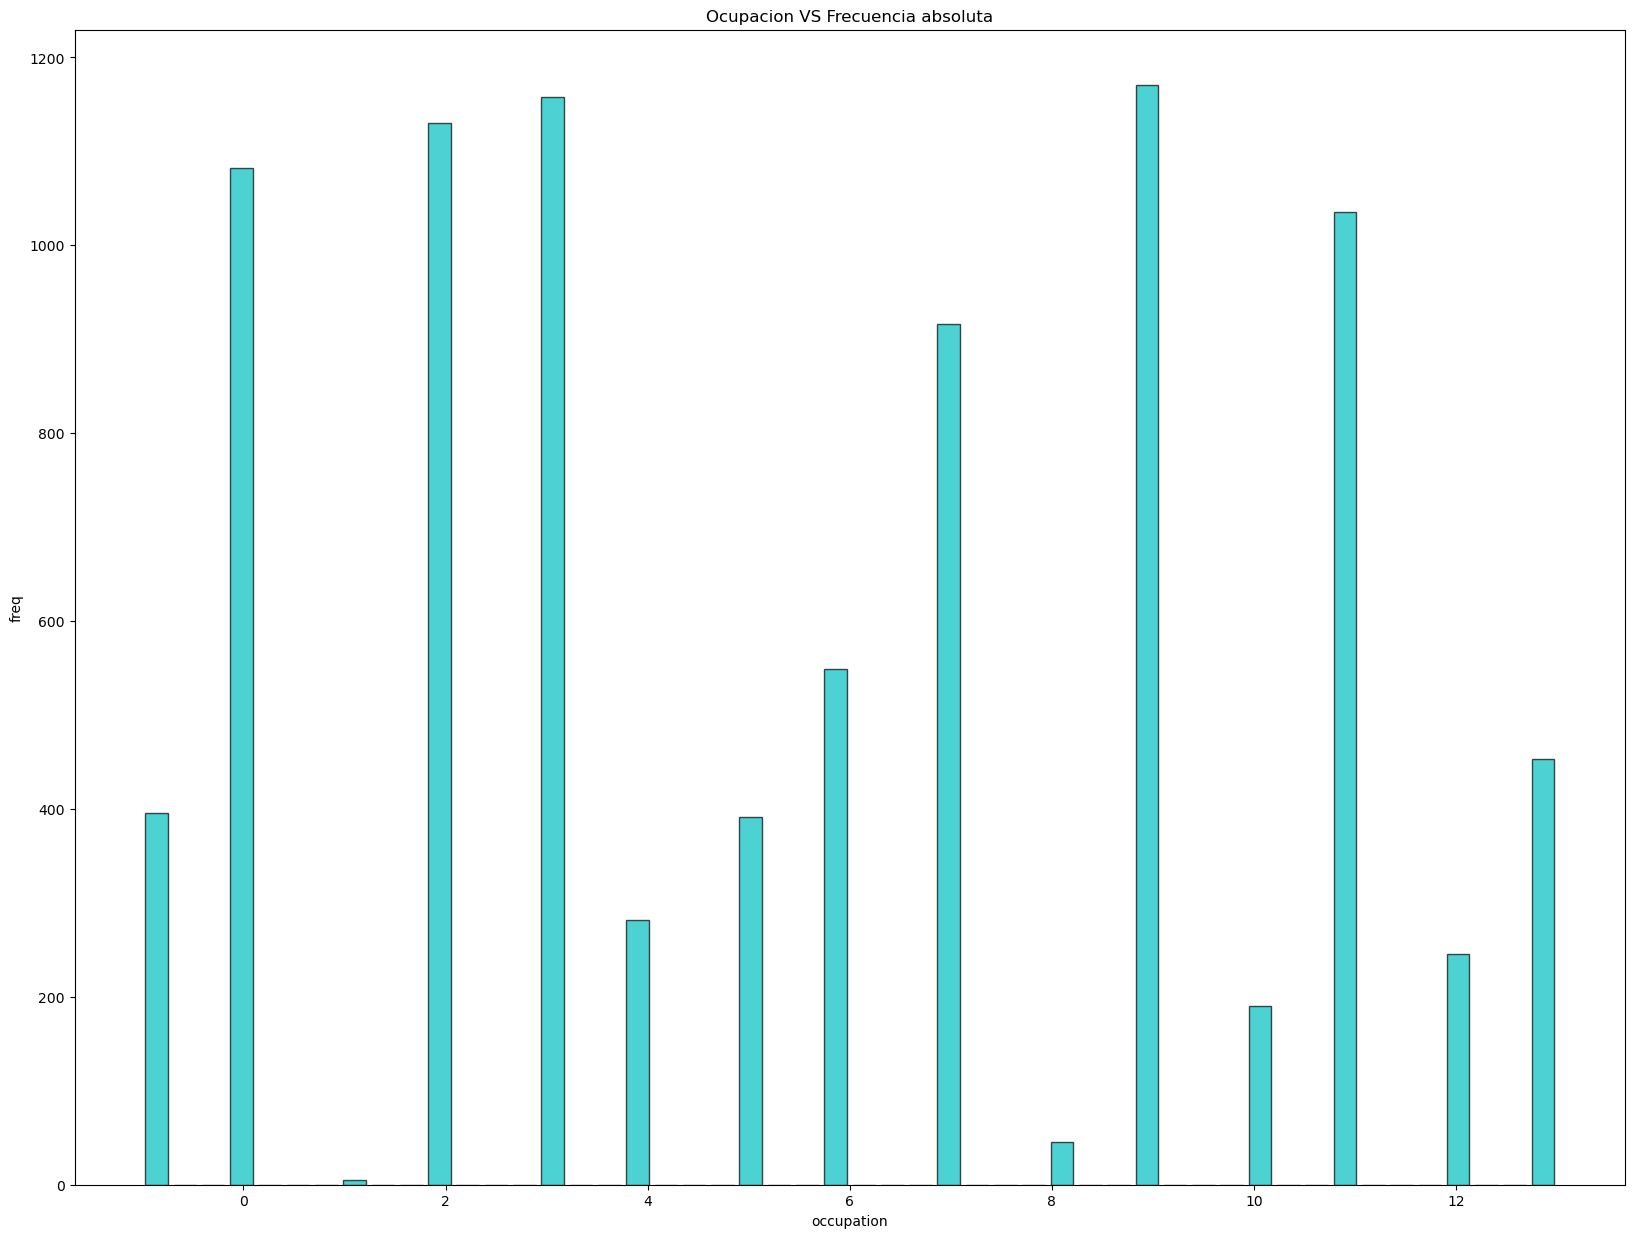

In [42]:
census_test1["occupation"] = census_test1["occupation"].astype("category").cat.codes
occupationInt_2 = census_test1["occupation"]

occupationMean_2 = occupationInt_2.mean()
occupationMode_2 = occupationInt_2.mode()[0]
occupationQuantil1_2 = occupationInt_2.quantile(0.25)
occupationQuantil2_2 = occupationInt_2.quantile(0.50)
occupationQuantil3_2 = occupationInt_2.quantile(0.75)

print("Media: ", occupationMean_2)
print("Moda: ", occupationMode_2)
print("Primer Cuartil: ", occupationQuantil1_2)
print("Segundo Cuartil (Mediana): ", occupationQuantil2_2)
print("Tercer Cuartil: ", occupationQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["occupation"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ocupacion VS Frecuencia absoluta")
plt.xlabel("occupation")
plt.ylabel("freq")
plt.show()

### occupation

Media:  1.2976019449662946
Moda:  0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  3.0


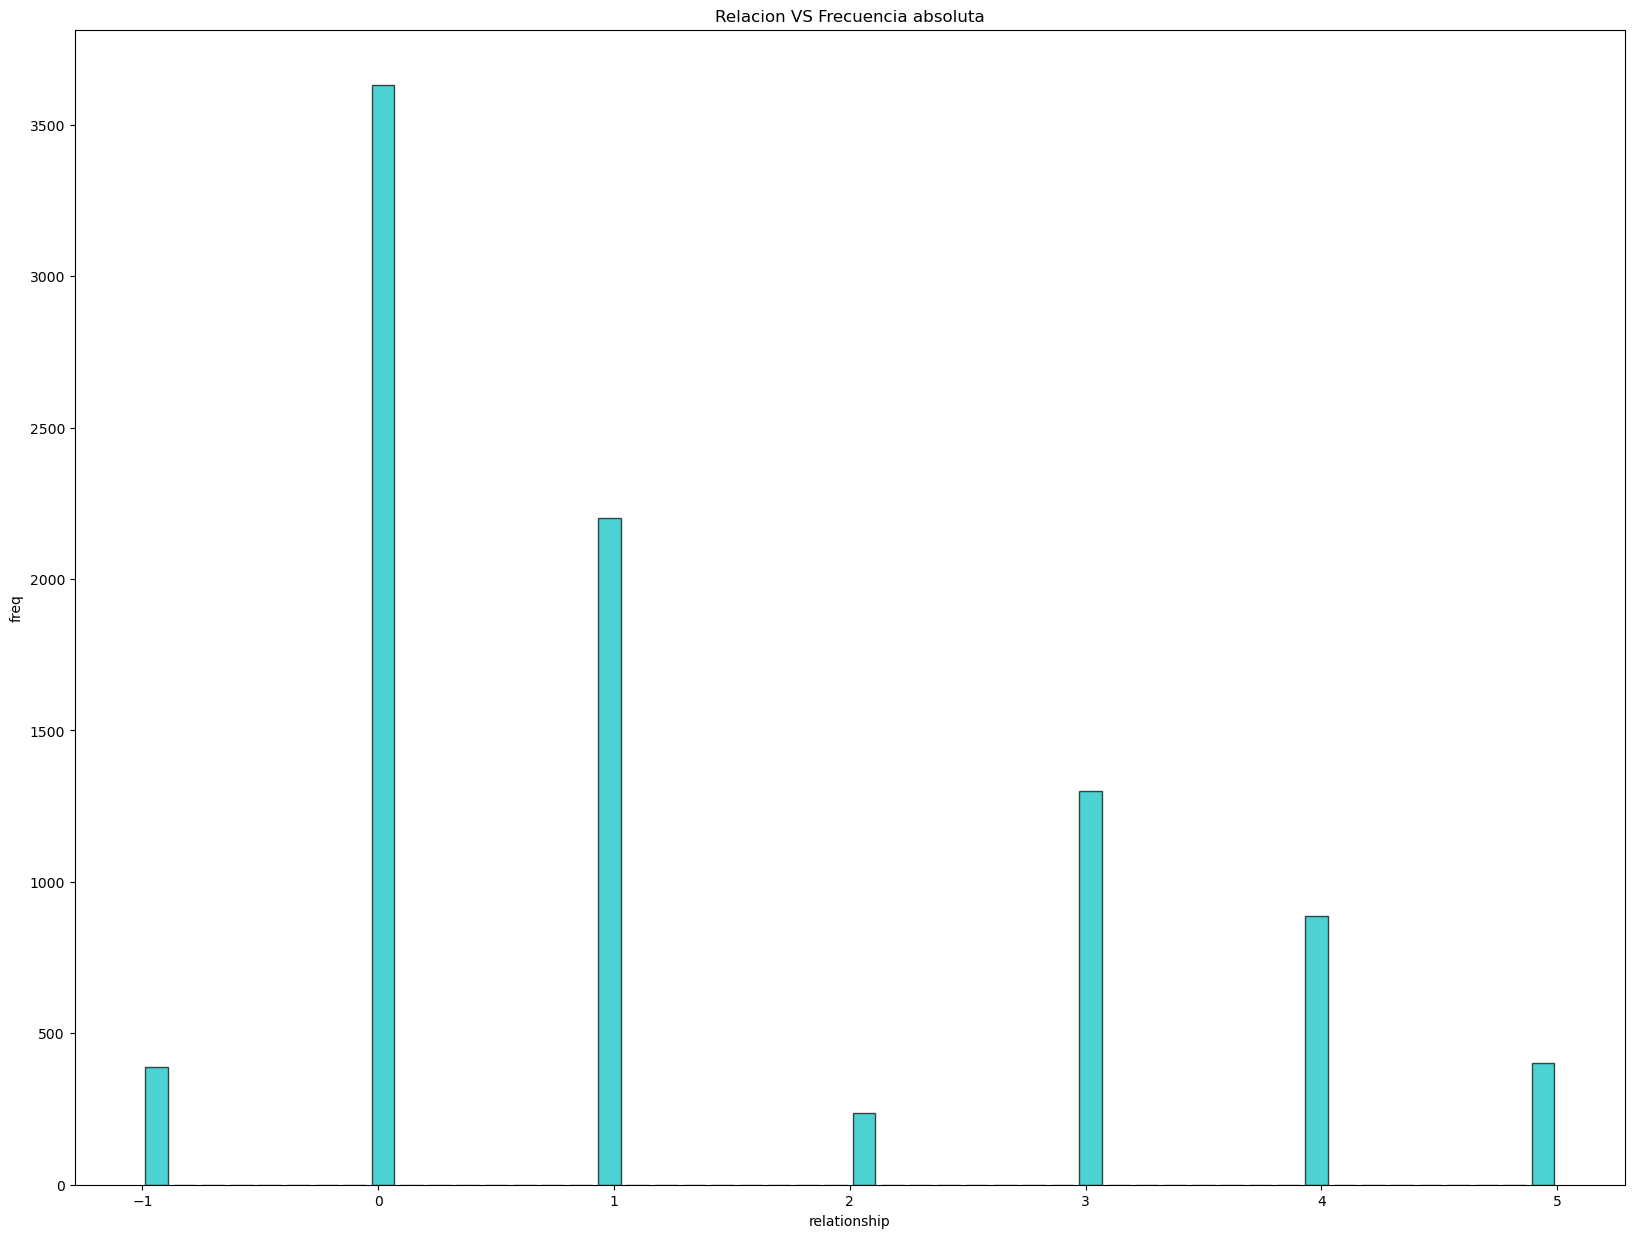

In [43]:
census_test1["relationship"] = census_test1["relationship"].astype("category").cat.codes
relationshipInt_2 = census_test1["relationship"]

relationshipMean_2 = relationshipInt_2.mean()
relationshipMode_2 = relationshipInt_2.mode()[0]
relationshipQuantil1_2 = relationshipInt_2.quantile(0.25)
relationshipQuantil2_2 = relationshipInt_2.quantile(0.50)
relationshipQuantil3_2 = relationshipInt_2.quantile(0.75)

print("Media: ", relationshipMean_2)
print("Moda: ", relationshipMode_2)
print("Primer Cuartil: ", relationshipQuantil1_2)
print("Segundo Cuartil (Mediana): ", relationshipQuantil2_2)
print("Tercer Cuartil: ", relationshipQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["relationship"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Relacion VS Frecuencia absoluta")
plt.xlabel("relationship")
plt.ylabel("freq")
plt.show()

### relationship

Media:  3.4509890595645927
Moda:  4
Primer Cuartil:  4.0
Segundo Cuartil (Mediana):  4.0
Tercer Cuartil:  4.0


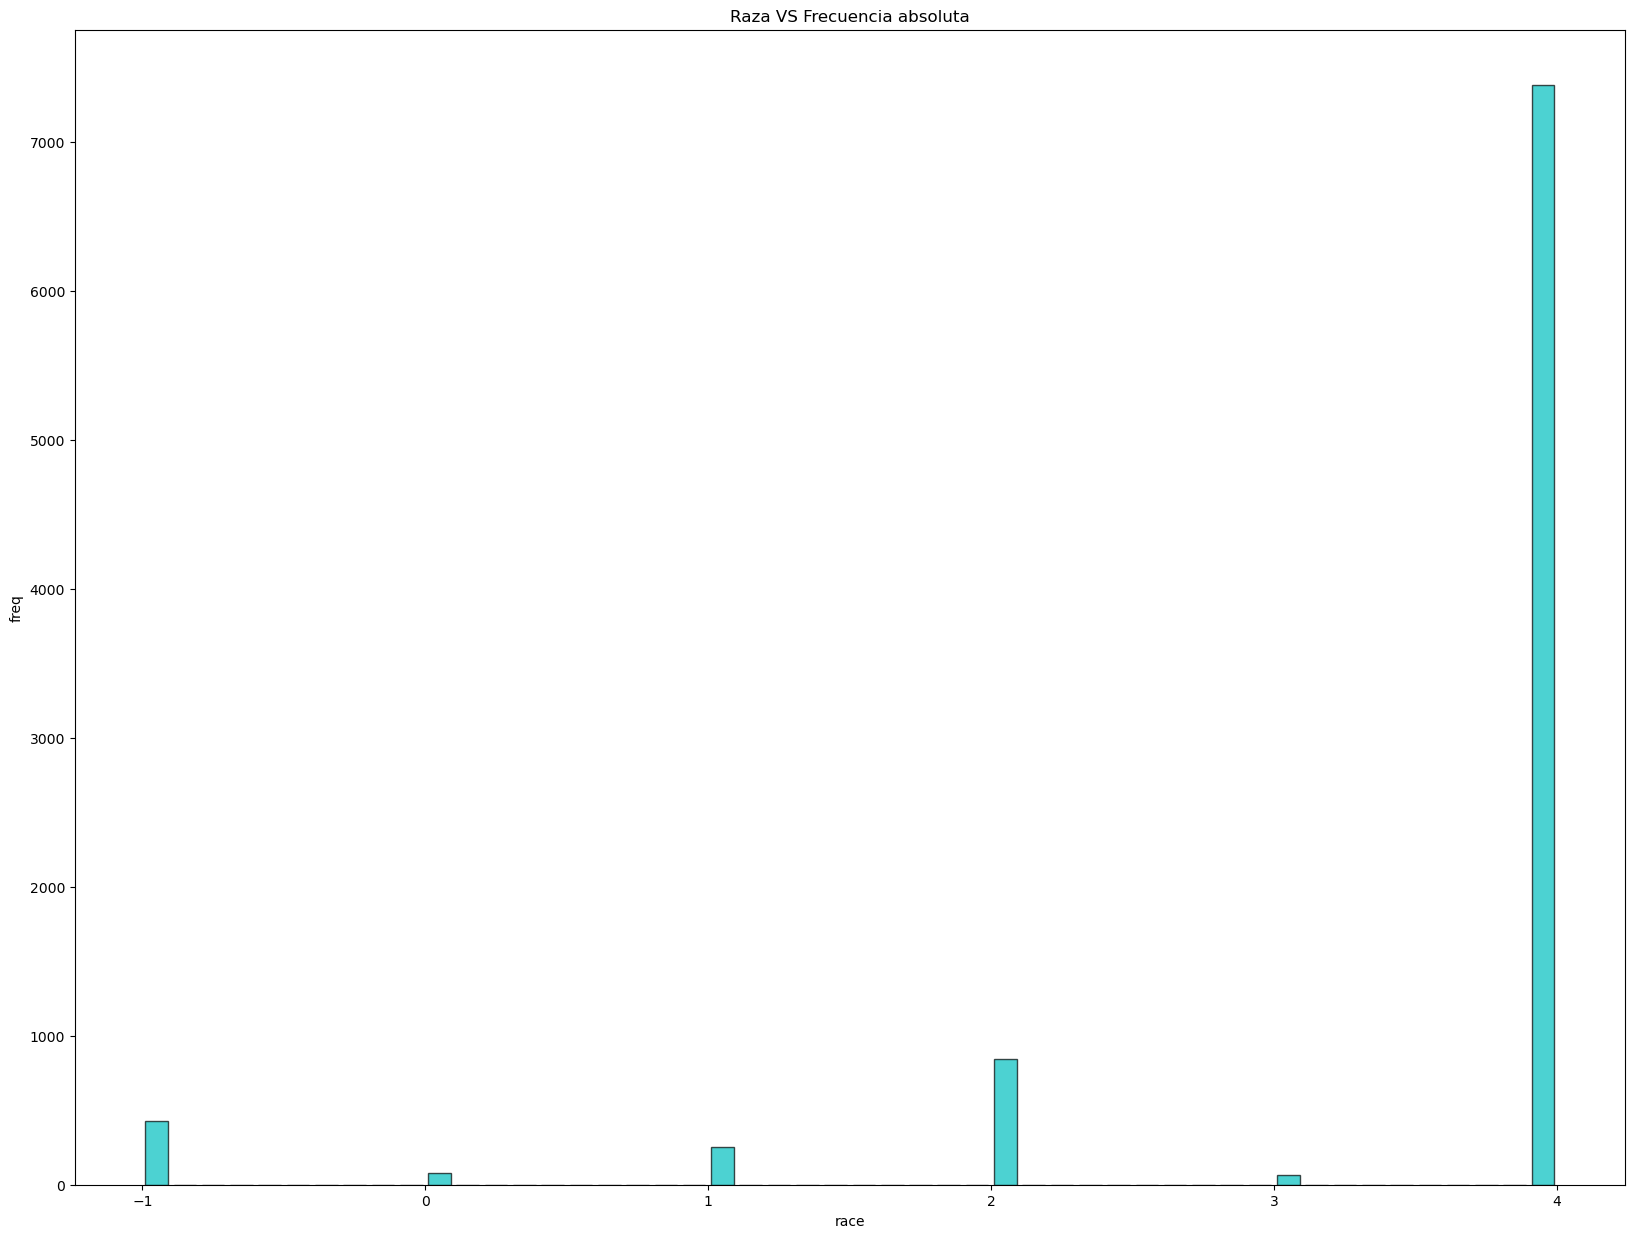

In [44]:
census_test1["race"] = census_test1["race"].astype("category").cat.codes
raceInt_2 = census_test1["race"]

raceMean_2 = raceInt_2.mean()
raceMode_2 = raceInt_2.mode()[0]
raceQuantil1_2 = raceInt_2.quantile(0.25)
raceQuantil2_2 = raceInt_2.quantile(0.50)
raceQuantil3_2 = raceInt_2.quantile(0.75)

print("Media: ", raceMean_2)
print("Moda: ", raceMode_2)
print("Primer Cuartil: ", raceQuantil1_2)
print("Segundo Cuartil (Mediana): ", raceQuantil2_2)
print("Tercer Cuartil: ", raceQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["race"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Raza VS Frecuencia absoluta")
plt.xlabel("race")
plt.ylabel("freq")
plt.show()

### race

Media:  0.6041551552657752
Moda:  1
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  1.0


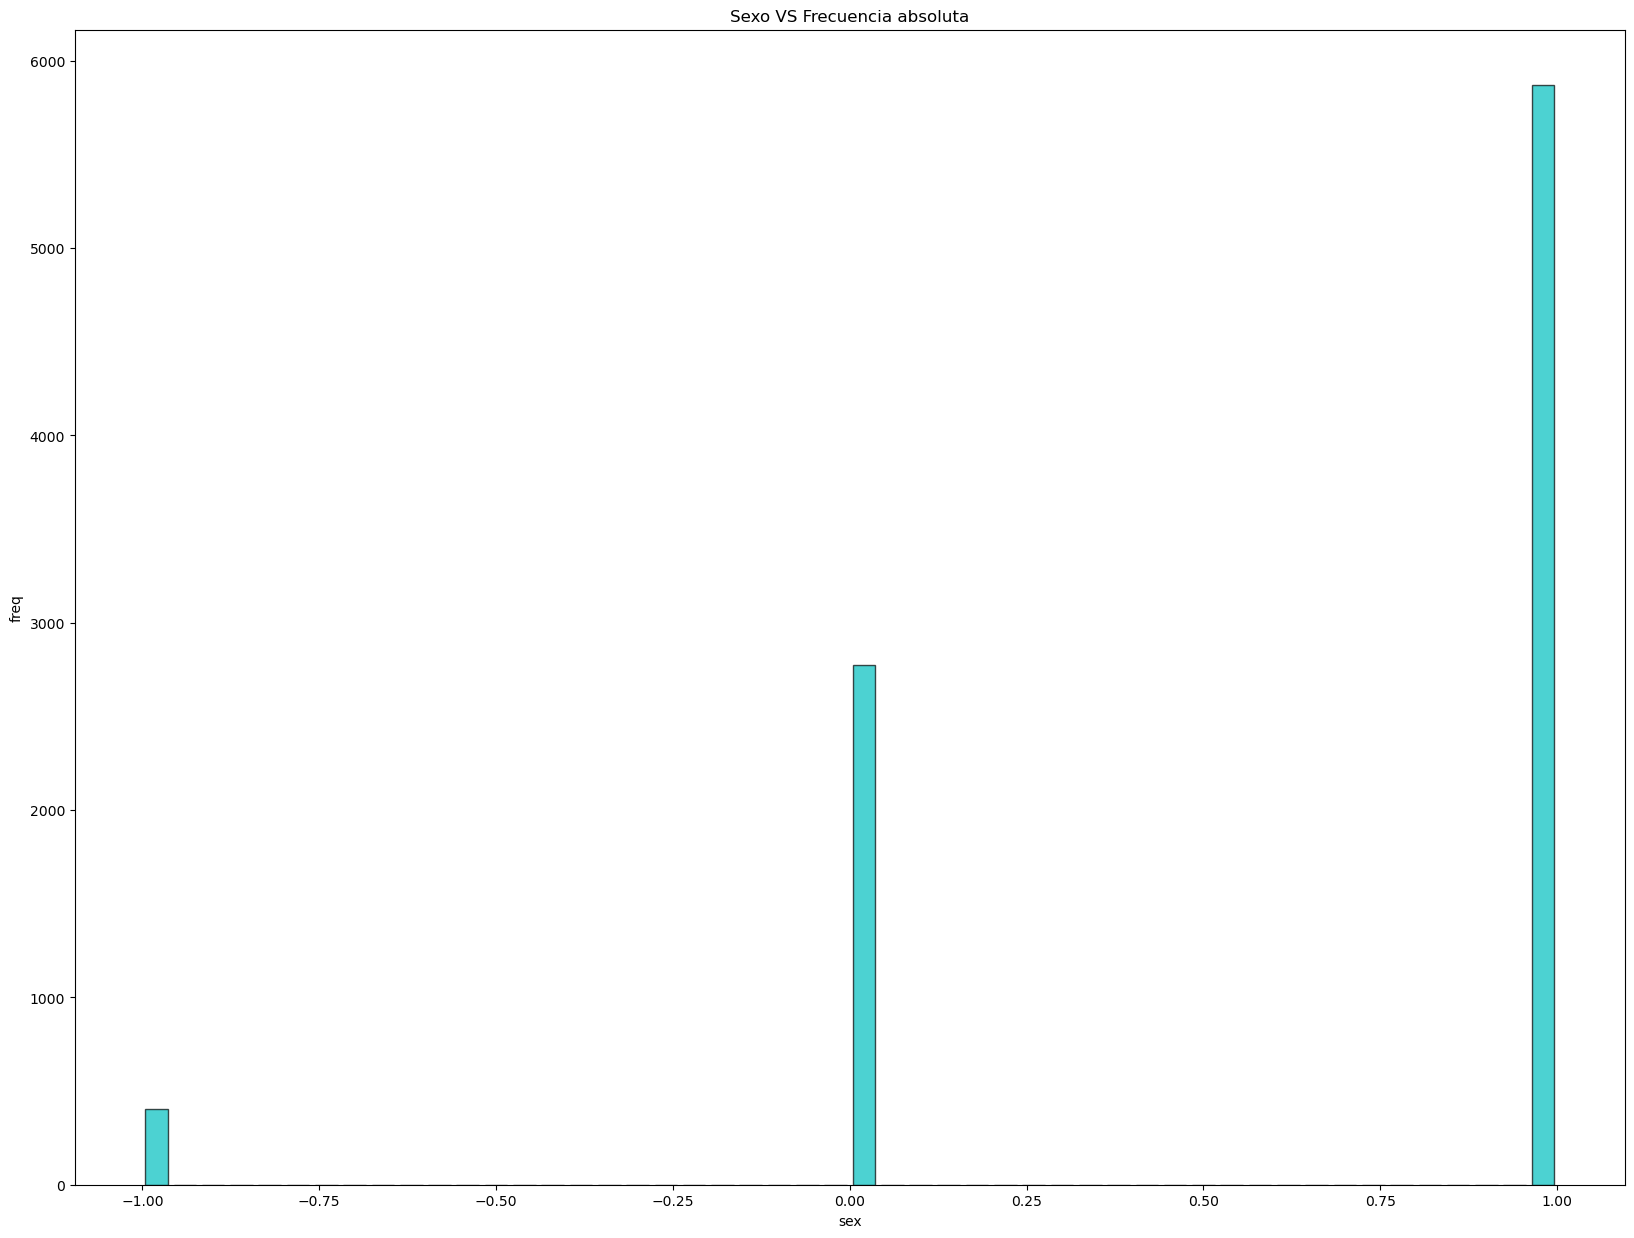

In [45]:
census_test1["sex"] = census_test1["sex"].astype("category").cat.codes
sexInt_2 = census_test1["sex"]

sexMean_2 = sexInt_2.mean()
sexMode_2 = sexInt_2.mode()[0]
sexQuantil1_2 = sexInt_2.quantile(0.25)
sexQuantil2_2 = sexInt_2.quantile(0.50)
sexQuantil3_2 = sexInt_2.quantile(0.75)

print("Media: ", sexMean_2)
print("Moda: ", sexMode_2)
print("Primer Cuartil: ", sexQuantil1_2)
print("Segundo Cuartil (Mediana): ", sexQuantil2_2)
print("Tercer Cuartil: ", sexQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["sex"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Sexo VS Frecuencia absoluta")
plt.xlabel("sex")
plt.ylabel("freq")
plt.show()

### sex

Media:  34.47043872251078
Moda:  36
Primer Cuartil:  36.0
Segundo Cuartil (Mediana):  36.0
Tercer Cuartil:  36.0


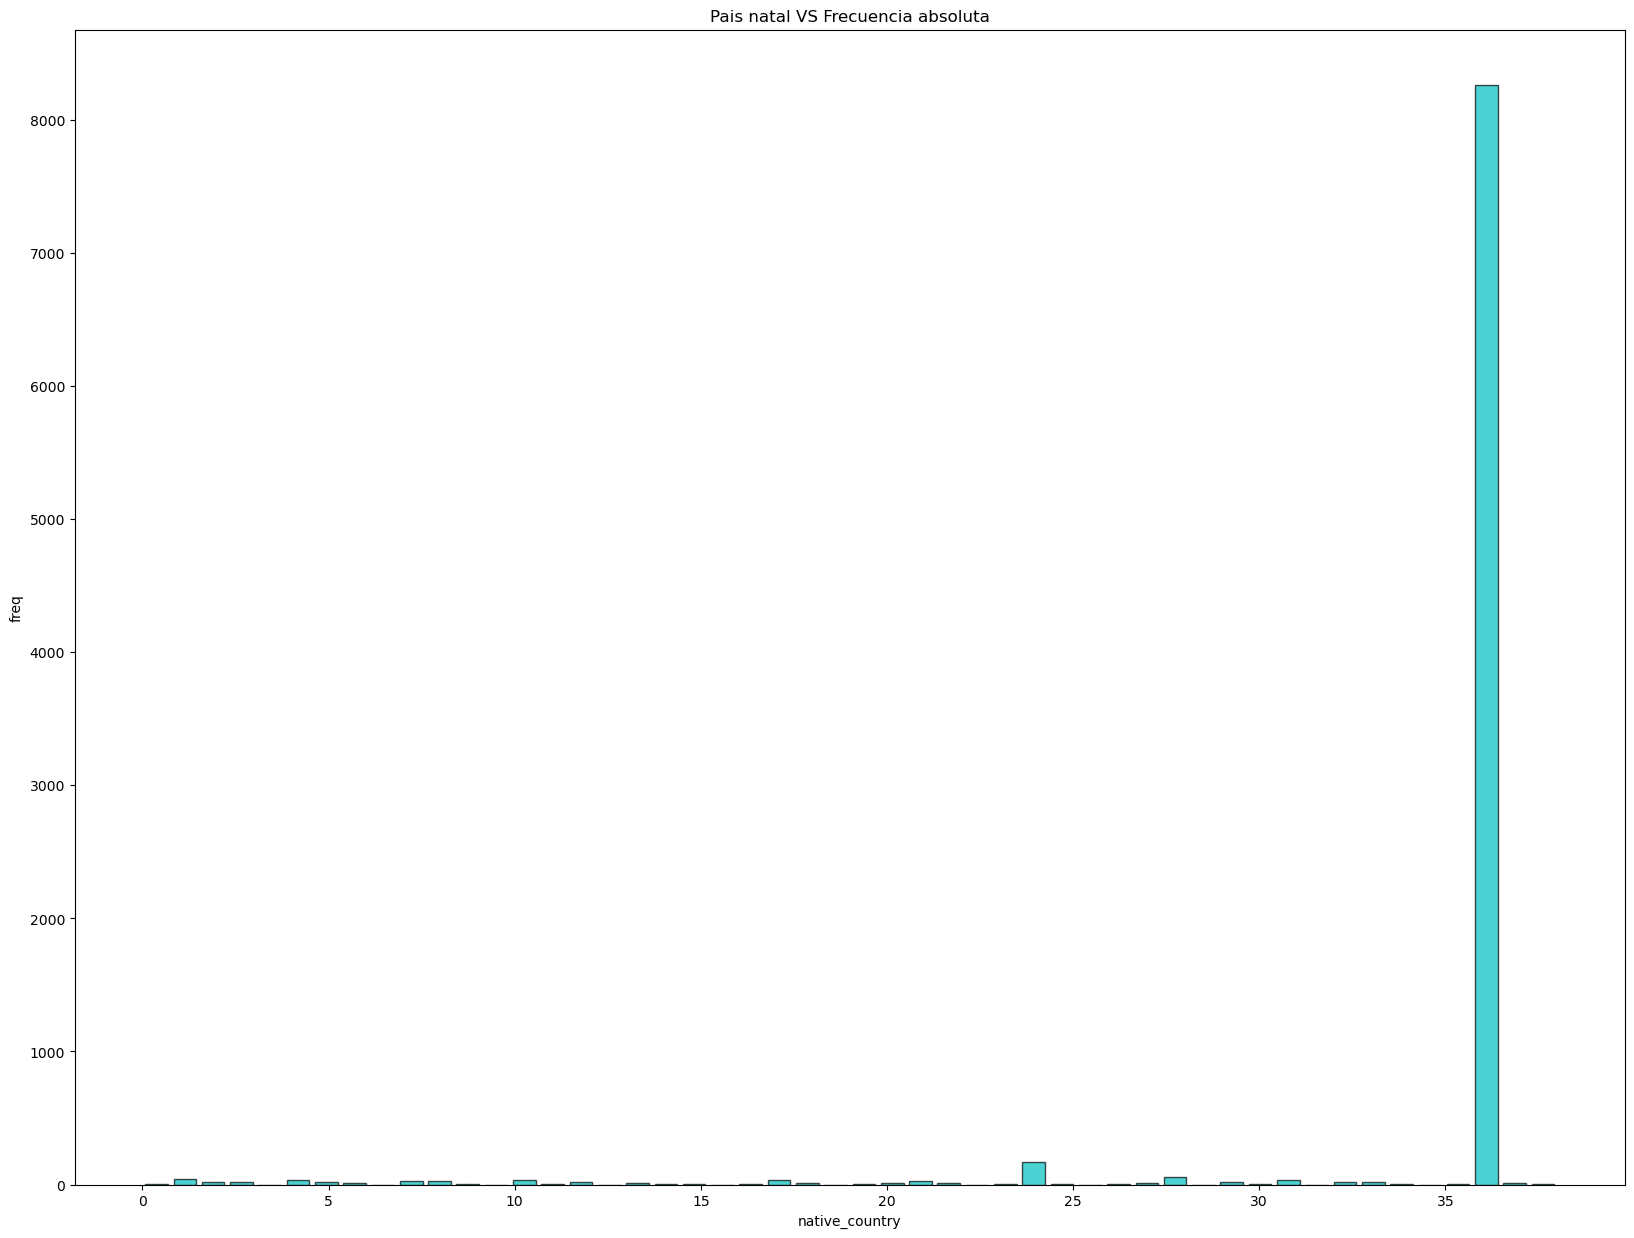

In [46]:
census_test1["native-country"] = census_test1["native-country"].astype("category").cat.codes
native_countryInt_2 = census_test1["native-country"]

native_countryMean_2 = native_countryInt_2.mean()
native_countryMode_2 = native_countryInt_2.mode()[0]
native_countryQuantil1_2 = native_countryInt_2.quantile(0.25)
native_countryQuantil2_2 = native_countryInt_2.quantile(0.50)
native_countryQuantil3_2 = native_countryInt_2.quantile(0.75)

print("Media: ", native_countryMean_2)
print("Moda: ", native_countryMode_2)
print("Primer Cuartil: ", native_countryQuantil1_2)
print("Segundo Cuartil (Mediana): ", native_countryQuantil2_2)
print("Tercer Cuartil: ", native_countryQuantil3_2)

plt.figure(figsize=(20, 15))
census_test1["native-country"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Pais natal VS Frecuencia absoluta")
plt.xlabel("native_country")
plt.ylabel("freq")
plt.show()

### native-country

*Gracias al Analisis Exploratorio de Datos se puede verificar que las 8 variables cualitativas transformadas a cuantitativas estan tomando registros de valor "-1", lo cual indica que son sus datos con valores faltantes. Estos atributos son: "workclass", "education", "marital-status", "occupation", "relationship", "race, "sex" y "native-country".*

In [47]:
census_test1[features].isnull().sum()

age               397
workclass           0
fnlwgt            417
education           0
education-num     393
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain      407
capital-loss      414
hours-per-week    397
native-country      0
dtype: int64

In [48]:
census_test1[features] = census_test1[features].replace(-1, nan)
census_test1

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,2135,44.0,2.0,81853.0,11.0,9.0,4.0,11.0,1.0,1.0,0.0,0.0,0.0,40.0,36
1,15639,21.0,NaN,306114.0,15.0,10.0,4.0,0.0,3.0,4.0,1.0,0.0,NaN,20.0,36
2,29059,36.0,2.0,186110.0,15.0,10.0,2.0,13.0,0.0,4.0,1.0,0.0,0.0,40.0,36
3,27523,30.0,4.0,NaN,8.0,11.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,49.0,36
4,9280,42.0,NaN,133584.0,15.0,10.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,40.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,16826,27.0,2.0,218785.0,11.0,9.0,2.0,3.0,5.0,4.0,0.0,0.0,0.0,40.0,36
9045,25246,54.0,4.0,36327.0,5.0,4.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,50.0,36
9046,18980,53.0,2.0,149650.0,11.0,9.0,4.0,NaN,1.0,4.0,1.0,0.0,2559.0,48.0,36
9047,953,18.0,2.0,177722.0,11.0,NaN,4.0,7.0,3.0,4.0,0.0,0.0,0.0,20.0,36


In [49]:
missingTest_quantity = census_test1[features].isnull().sum()

missingTest_percentage = census_test1[features].isnull().mean() * 100

print("Cantidad faltante:\n", missingTest_quantity)
print("Porcentaje faltante:\n", missingTest_percentage)

Cantidad faltante:
 age               397
workclass         399
fnlwgt            417
education         427
education-num     393
marital-status    432
occupation        396
relationship      390
race              429
sex               405
capital-gain      407
capital-loss      414
hours-per-week    397
native-country      0
dtype: int64
Porcentaje faltante:
 age               4.387225
workclass         4.409327
fnlwgt            4.608244
education         4.718753
education-num     4.343021
marital-status    4.774008
occupation        4.376174
relationship      4.309868
race              4.740855
sex               4.475633
capital-gain      4.497735
capital-loss      4.575091
hours-per-week    4.387225
native-country    0.000000
dtype: float64


## Imputacion por kNN (k = 230)

### Generalidades

- *kNN (k Nearest Neighbors) es una tecnica para imputar datos faltantes encontrando los k vecinos mas cercanos, con todos su valores completos, desde el registro con valores faltantes hacia el k mas cercano.*

- *Para aplicar esta tecnica, se debe omitir la variable categorica objetivo, en este caso el atributo "income".*

### Proceso

#### censusImpK3 - Dataset de entrenamiento (NA_fullTrain)

In [50]:
censusImpK3 = census_copy1.copy()

In [51]:
#count the number of NaN values in each column
censusImpK3[features].isna().sum()

age                896
workclass          952
fnlwgt             973
education          964
education-num      917
marital-status     987
occupation         906
relationship       923
race               997
sex                918
capital-gain       912
capital-loss       878
hours-per-week     948
native-country    1026
dtype: int64

In [52]:
print("Dataframe antes de la imputación kNN = 230: \n")
censusImpK3

Dataframe antes de la imputación kNN = 230: 



,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,15977,44.0,2.0,222978.0,11.0,9.0,0.0,11.0,1.0,4.0,0.0,0.0,1504.0,40.0,38.0,low
1,13574,32.0,2.0,83253.0,15.0,10.0,2.0,13.0,0.0,4.0,1.0,0.0,0.0,60.0,38.0,low
2,23210,30.0,1.0,327825.0,11.0,9.0,0.0,10.0,3.0,4.0,0.0,0.0,0.0,32.0,38.0,low
3,9284,23.0,2.0,109952.0,15.0,10.0,2.0,NaN,0.0,4.0,1.0,0.0,0.0,60.0,38.0,low
4,8841,54.0,1.0,204325.0,15.0,10.0,2.0,10.0,NaN,4.0,1.0,0.0,0.0,52.0,38.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.0,10.0,16.0,0.0,9.0,1.0,4.0,0.0,3273.0,0.0,40.0,38.0,low
21109,21206,50.0,2.0,158680.0,12.0,14.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,50.0,38.0,high
21110,10646,50.0,2.0,72351.0,9.0,13.0,0.0,NaN,1.0,4.0,1.0,0.0,0.0,45.0,38.0,low
21111,11687,49.0,4.0,NaN,9.0,13.0,2.0,NaN,0.0,4.0,1.0,0.0,0.0,60.0,38.0,high


In [53]:
imputer_K3 = KNNImputer(n_neighbors=230)

censusImpK3_imputed = imputer_K3.fit_transform(censusImpK3[features])

censusImpK3 = pd.DataFrame(censusImpK3_imputed, columns=censusImpK3[features].columns)
censusImpK3.insert(0, "Id", census_copy1["Id"])
censusImpK3["income"]=census_copy1["income"]

print("Dataframe después de la imputación kNN = 230: \n")
censusImpK3


Dataframe después de la imputación kNN = 230: 



,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,15977,44.0,2.0,222978.000000,11.0,9.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0,38.0,low
1,13574,32.0,2.0,83253.000000,15.0,10.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0,38.0,low
2,23210,30.0,1.0,327825.000000,11.0,9.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0,38.0,low
3,9284,23.0,2.0,109952.000000,15.0,10.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0,38.0,low
4,8841,54.0,1.0,204325.000000,15.0,10.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0,38.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.000000,10.0,16.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0,38.0,low
21109,21206,50.0,2.0,158680.000000,12.0,14.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0,38.0,high
21110,10646,50.0,2.0,72351.000000,9.0,13.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0,38.0,low
21111,11687,49.0,4.0,178986.147826,9.0,13.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0,38.0,high


In [54]:
censusImpK3.describe()

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,21113.000000,21113.000000,21113.000000,2.111300e+04,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000
mean,16244.006489,38.492150,2.189137,1.894393e+05,10.357127,10.111303,2.577855,5.943502,1.421376,3.683967,0.677256,1109.575058,88.832555,40.992838,36.394844
std,9371.085220,12.879306,0.922148,1.033286e+05,3.718770,2.498357,1.468135,3.942269,1.569244,0.813853,0.458133,7260.319319,396.594763,11.575133,5.886040
min,0.000000,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8151.000000,28.000000,2.000000,1.197040e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,16225.000000,37.604348,2.000000,1.809800e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,24346.000000,47.000000,2.000000,2.327820e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,32557.000000,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000


In [55]:
censusImpK3[features].isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

<Axes: >

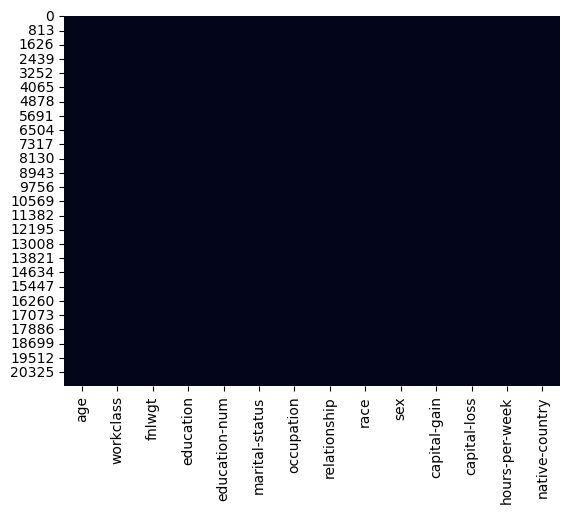

In [56]:
sns.heatmap(censusImpK3[features].isna(), cbar=False)

Media:  38.49214969553067
Moda:  36.0
Primer Cuartil:  28.0
Segundo Cuartil (Mediana):  37.60434782608696
Tercer Cuartil:  47.0


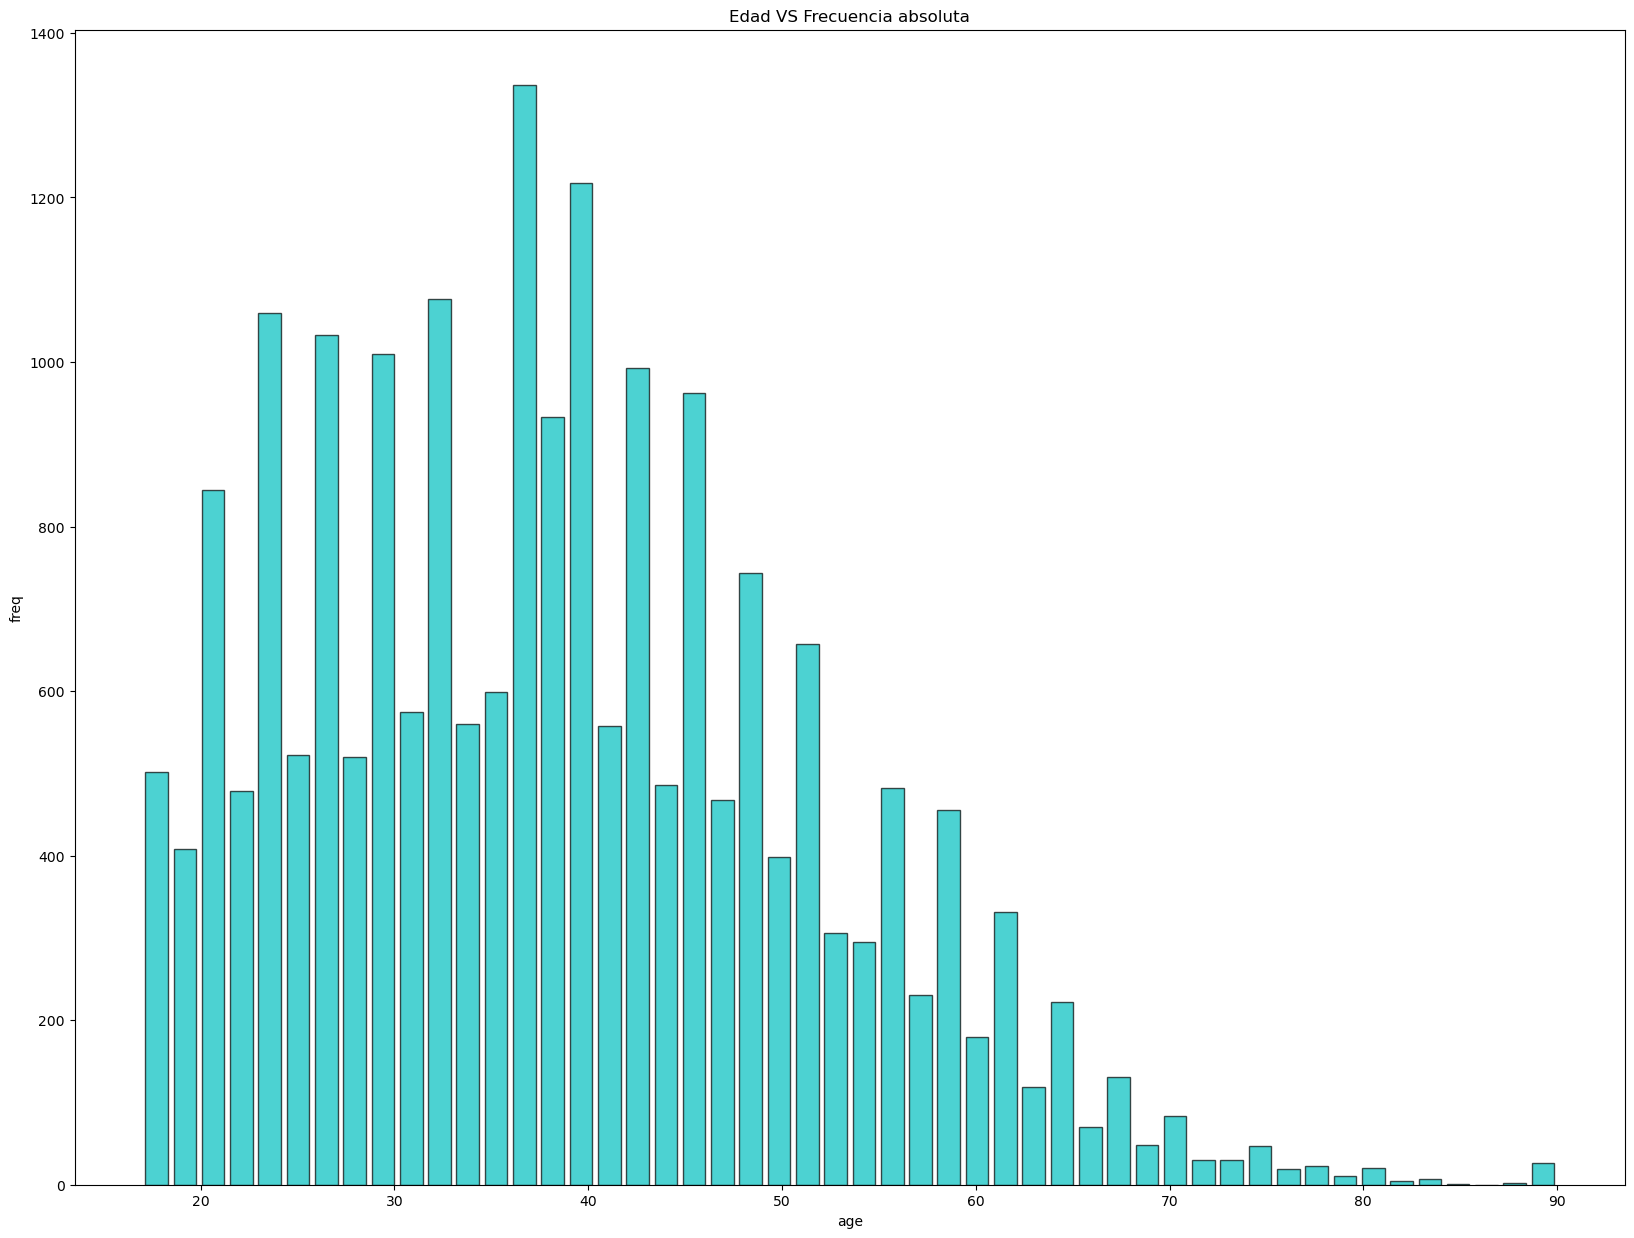

In [57]:
ageIntK3_2 = censusImpK3["age"]

ageMeanK3_2 = ageIntK3_2.mean()
ageModeK3_2 = ageIntK3_2.mode()[0]
ageQuantil1K3_2 = ageIntK3_2.quantile(0.25)
ageQuantil2K3_2 = ageIntK3_2.quantile(0.50)
ageQuantil3K3_2 = ageIntK3_2.quantile(0.75)

print("Media: ", ageMeanK3_2)
print("Moda: ", ageModeK3_2)
print("Primer Cuartil: ", ageQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", ageQuantil2K3_2)
print("Tercer Cuartil: ", ageQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["age"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Edad VS Frecuencia absoluta")
plt.xlabel("age")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "age"

*La edad es un atributo de registros numericos que toman valores continuos entre 17 y 90, con media de 38.49 y mediana de 37.60.*

Media:  2.1891371275476263
Moda:  2.0
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  2.0


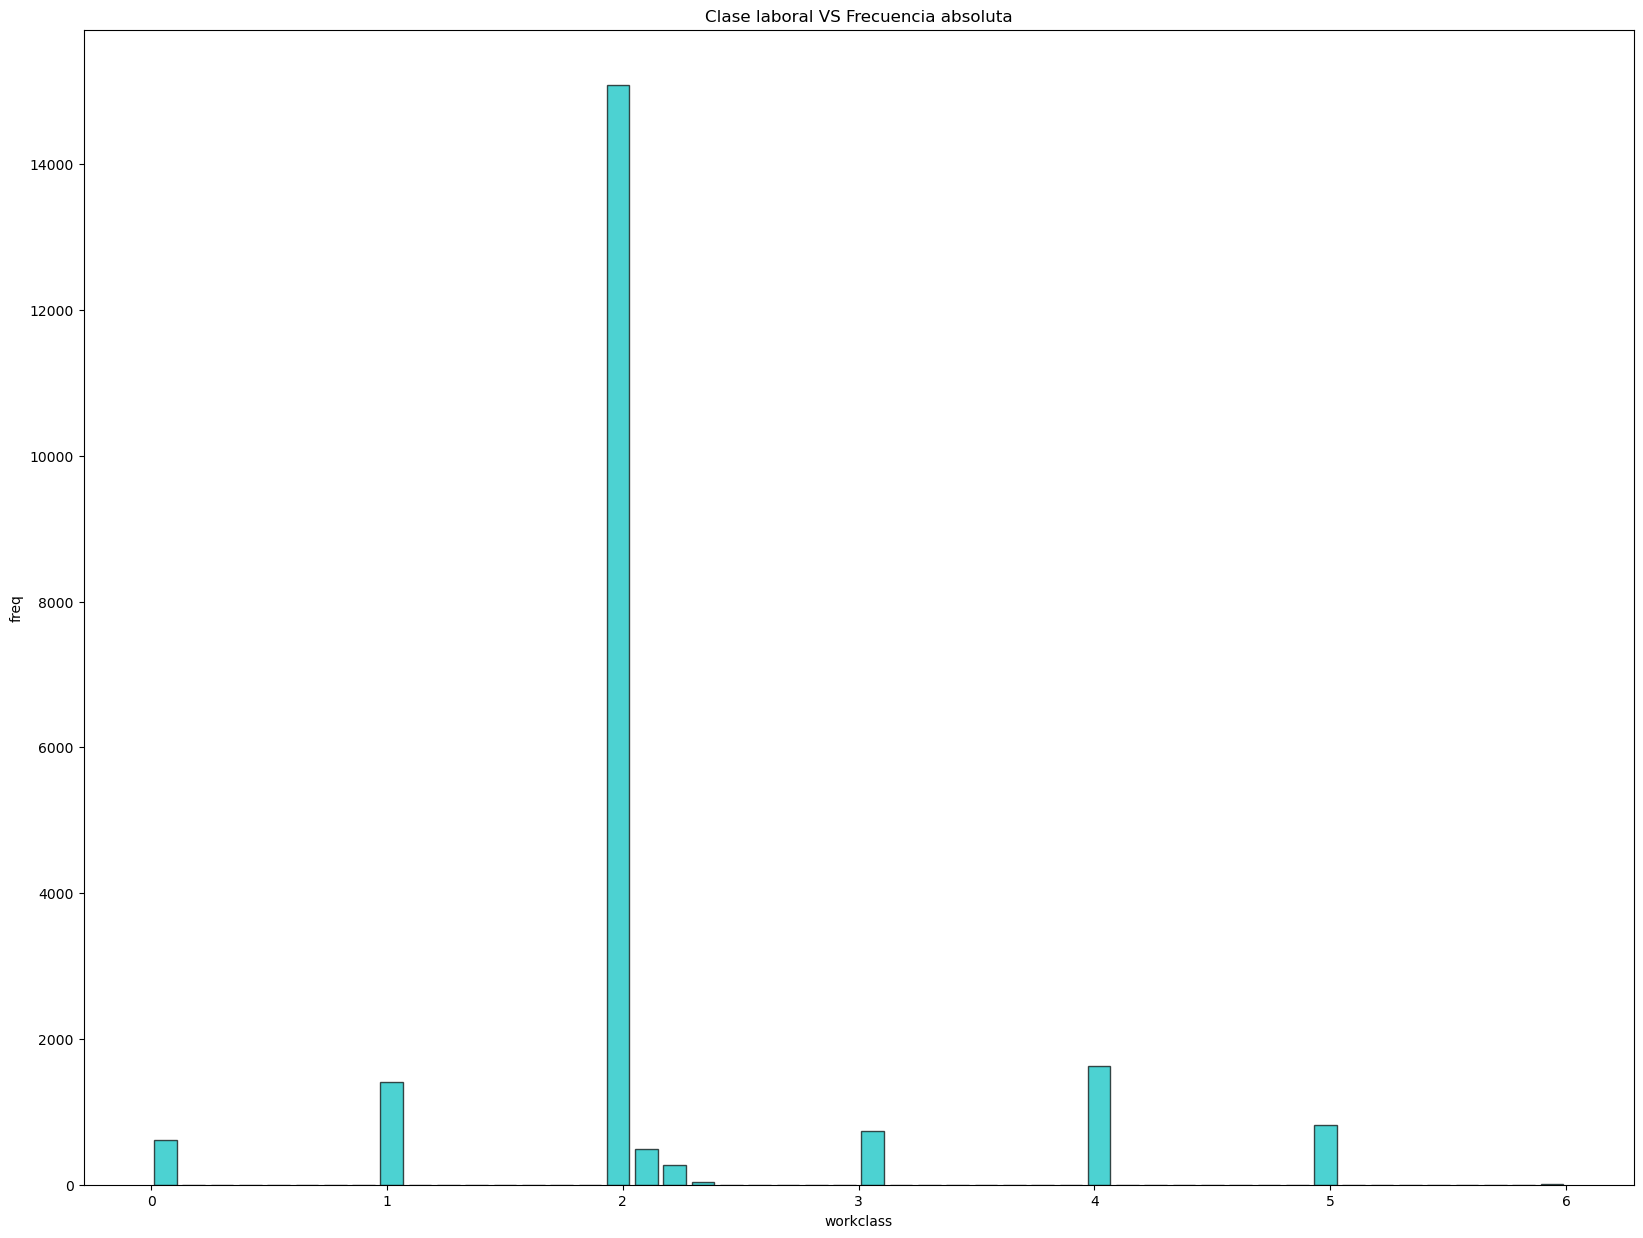

In [58]:
workclassIntK3_2 = censusImpK3["workclass"]

workclassMeanK3_2 = workclassIntK3_2.mean()
workclassModeK3_2 = workclassIntK3_2.mode()[0]
workclassQuantil1K3_2 = workclassIntK3_2.quantile(0.25)
workclassQuantil2K3_2 = workclassIntK3_2.quantile(0.50)
workclassQuantil3K3_2 = workclassIntK3_2.quantile(0.75)

print("Media: ", workclassMeanK3_2)
print("Moda: ", workclassModeK3_2)
print("Primer Cuartil: ", workclassQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", workclassQuantil2K3_2)
print("Tercer Cuartil: ", workclassQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["workclass"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Clase laboral VS Frecuencia absoluta")
plt.xlabel("workclass")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "workclass"

*La clase de trabajo es un atributo de registros numericos que toman valores continuos entre 0 y 6, con media de 2.18 y mediana de 2.*


Media:  189439.28922526608
Moda:  203488.0
Primer Cuartil:  119704.0
Segundo Cuartil (Mediana):  180980.0
Tercer Cuartil:  232782.0


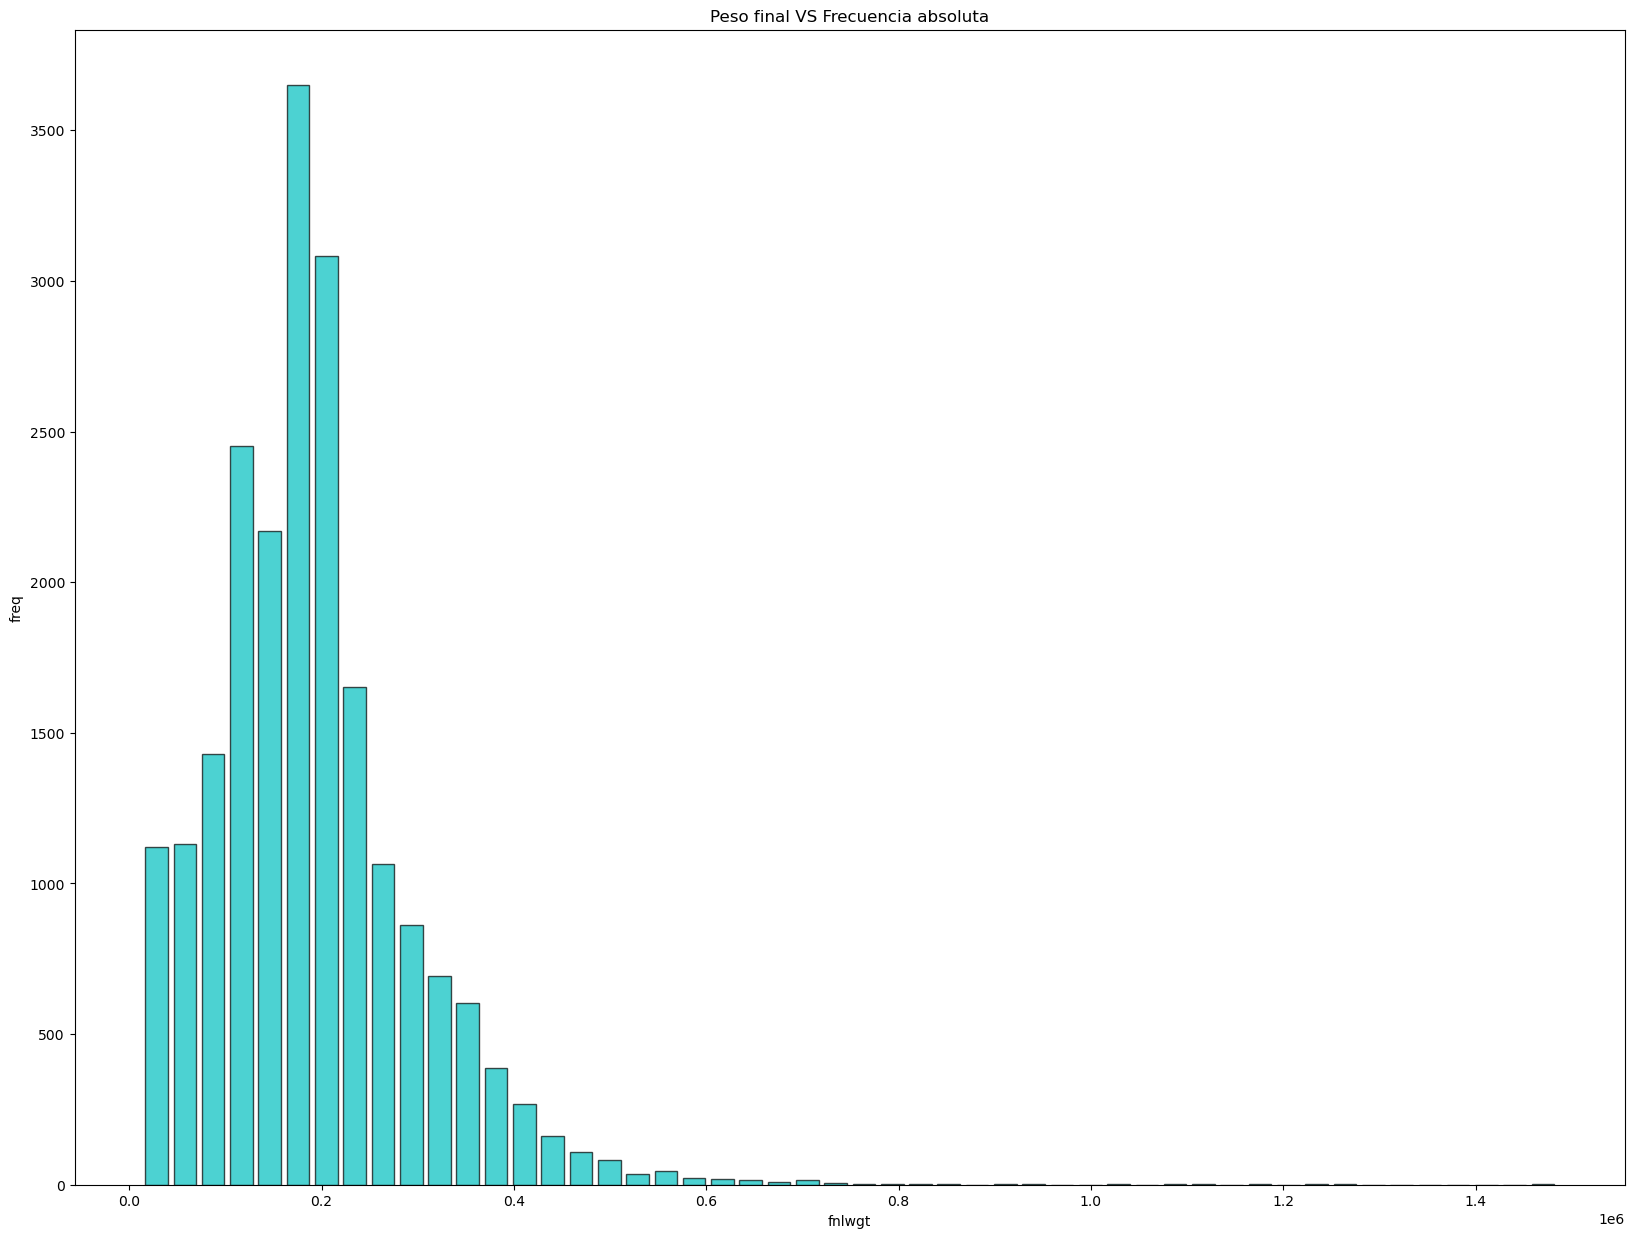

In [59]:
fnlwgtIntK3_2 = censusImpK3["fnlwgt"]

fnlwgtMeanK3_2 = fnlwgtIntK3_2.mean()
fnlwgtModeK3_2 = fnlwgtIntK3_2.mode()[0]
fnlwgtQuantil1K3_2 = fnlwgtIntK3_2.quantile(0.25)
fnlwgtQuantil2K3_2 = fnlwgtIntK3_2.quantile(0.50)
fnlwgtQuantil3K3_2 = fnlwgtIntK3_2.quantile(0.75)

print("Media: ", fnlwgtMeanK3_2)
print("Moda: ", fnlwgtModeK3_2)
print("Primer Cuartil: ", fnlwgtQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", fnlwgtQuantil2K3_2)
print("Tercer Cuartil: ", fnlwgtQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["fnlwgt"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Peso final VS Frecuencia absoluta")
plt.xlabel("fnlwgt")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "fnlwgt"

*El peso final es un atributo de registros numericos que toman valores continuos entre 13769 y 1484705, con media de 189439.28 y mediana de 180980.0.*


Media:  10.35712717695053
Moda:  11.0
Primer Cuartil:  9.0
Segundo Cuartil (Mediana):  11.0
Tercer Cuartil:  12.0


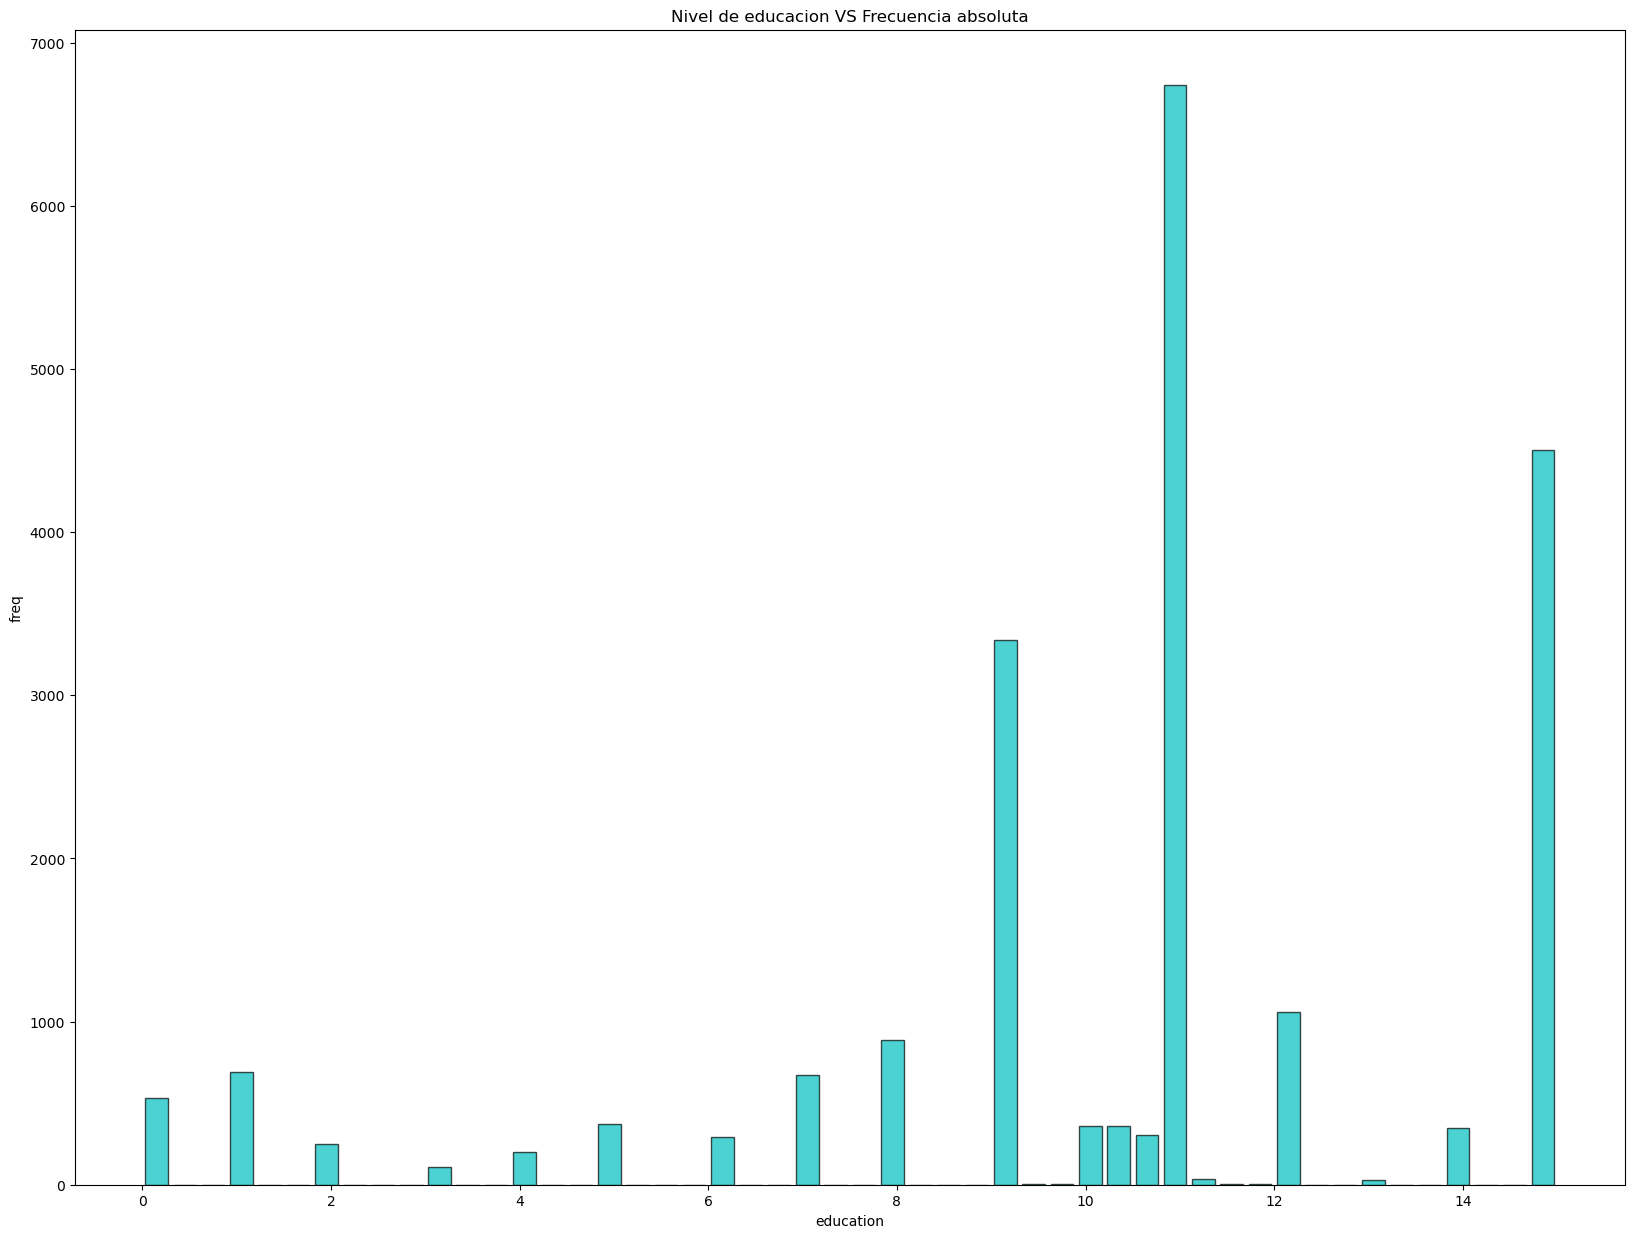

In [60]:
educationIntK3_2 = censusImpK3["education"]

educationMeanK3_2 = educationIntK3_2.mean()
educationModeK3_2 = educationIntK3_2.mode()[0]
educationQuantil1K3_2 = educationIntK3_2.quantile(0.25)
educationQuantil2K3_2 = educationIntK3_2.quantile(0.50)
educationQuantil3K3_2 = educationIntK3_2.quantile(0.75)

print("Media: ", educationMeanK3_2)
print("Moda: ", educationModeK3_2)
print("Primer Cuartil: ", educationQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", educationQuantil2K3_2)
print("Tercer Cuartil: ", educationQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["education"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Nivel de educacion VS Frecuencia absoluta")
plt.xlabel("education")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "education"

*El nivel de educacion es un atributo de registros numericos que toman valores continuos entre 0 y 15, con media de 10.35 y mediana de 11.*


Media:  10.111303359356178
Moda:  9.0
Primer Cuartil:  9.0
Segundo Cuartil (Mediana):  10.0
Tercer Cuartil:  12.0


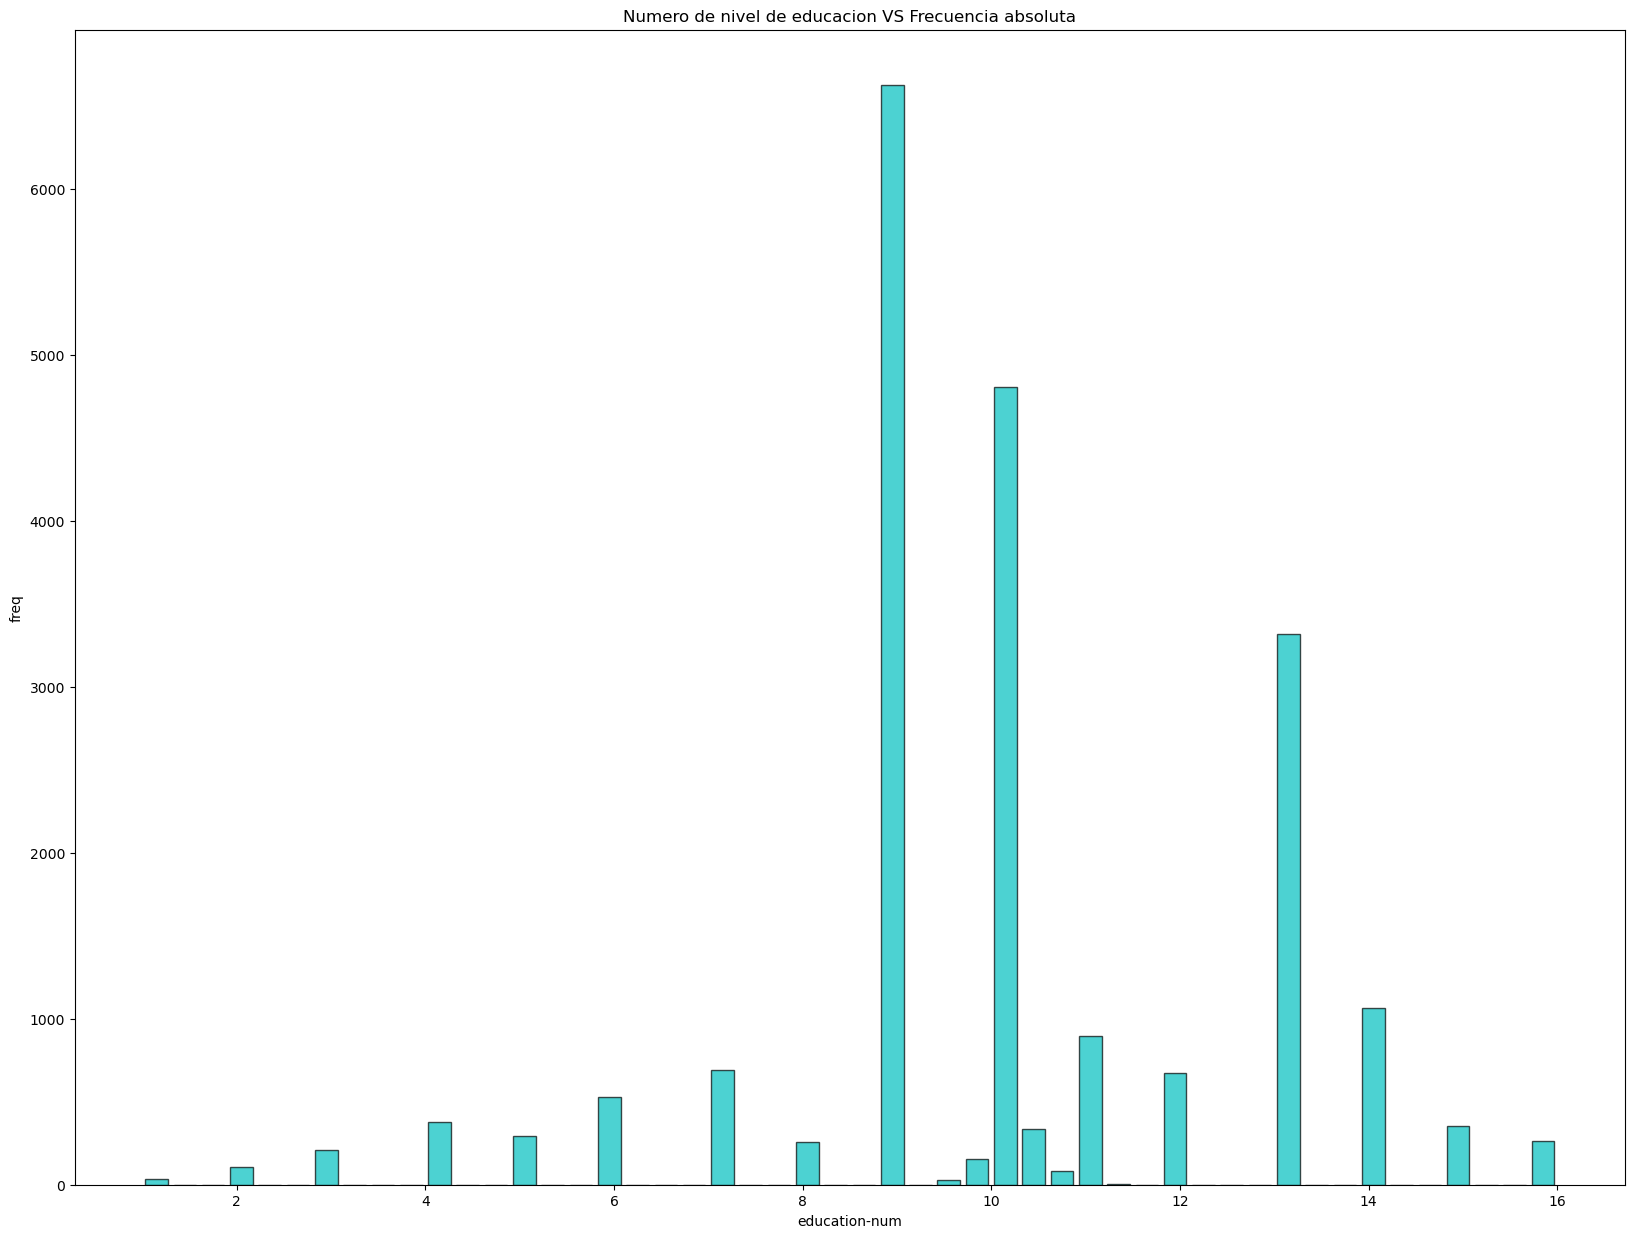

In [61]:
education_numIntK3_2 = censusImpK3["education-num"]

education_numMeanK3_2 = education_numIntK3_2.mean()
education_numModeK3_2 = education_numIntK3_2.mode()[0]
education_numQuantil1K3_2 = education_numIntK3_2.quantile(0.25)
education_numQuantil2K3_2 = education_numIntK3_2.quantile(0.50)
education_numQuantil3K3_2 = education_numIntK3_2.quantile(0.75)

print("Media: ", education_numMeanK3_2)
print("Moda: ", education_numModeK3_2)
print("Primer Cuartil: ", education_numQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", education_numQuantil2K3_2)
print("Tercer Cuartil: ", education_numQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["education-num"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Numero de nivel de educacion VS Frecuencia absoluta")
plt.xlabel("education-num")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "education-num"

*El numero de nivel de educacion es un atributo de registros numericos que toman valores continuos entre 1 y 16, con media de 10.11 y mediana de 10.*



Media:  2.5778551850395077
Moda:  2.0
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  4.0


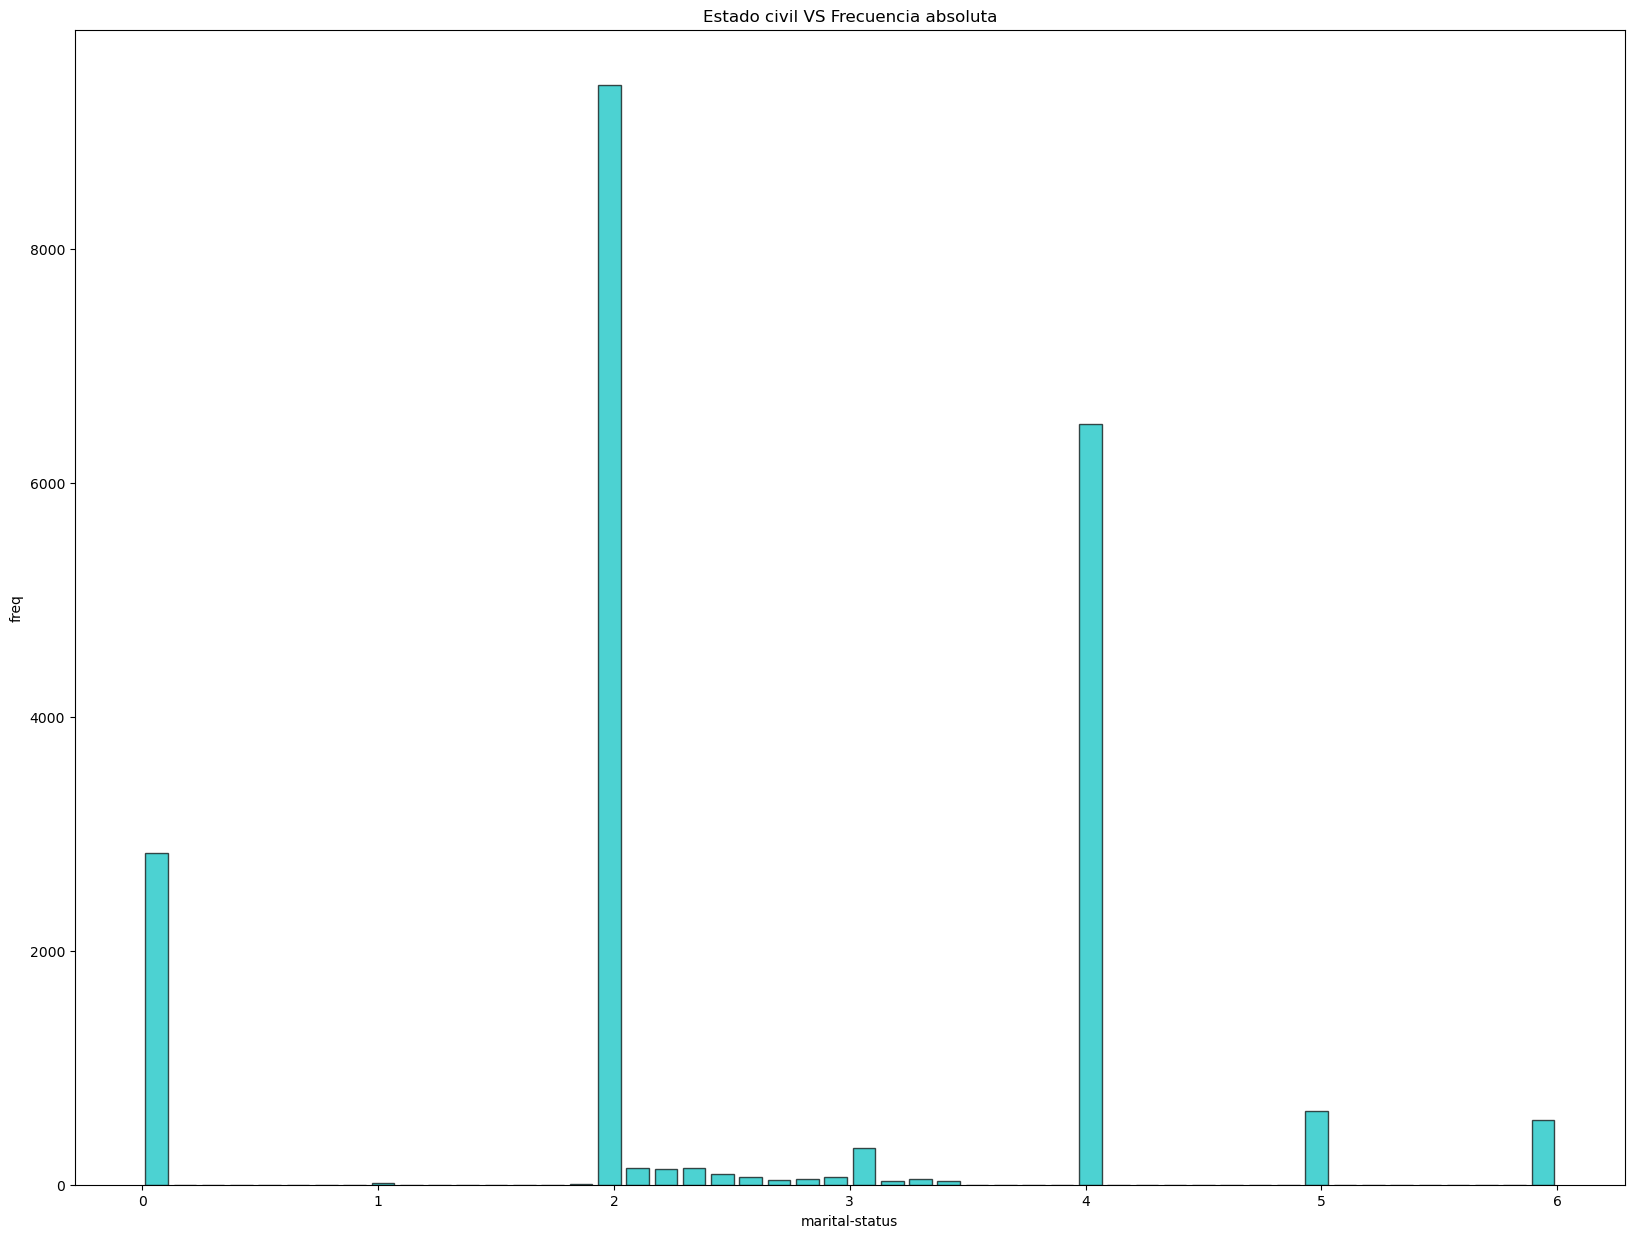

In [62]:
marital_statusIntK3_2 = censusImpK3["marital-status"]

marital_statusMeanK3_2 = marital_statusIntK3_2.mean()
marital_statusModeK3_2 = marital_statusIntK3_2.mode()[0]
marital_statusQuantil1K3_2 = marital_statusIntK3_2.quantile(0.25)
marital_statusQuantil2K3_2 = marital_statusIntK3_2.quantile(0.50)
marital_statusQuantil3K3_2 = marital_statusIntK3_2.quantile(0.75)

print("Media: ", marital_statusMeanK3_2)
print("Moda: ", marital_statusModeK3_2)
print("Primer Cuartil: ", marital_statusQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", marital_statusQuantil2K3_2)
print("Tercer Cuartil: ", marital_statusQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["marital-status"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Estado civil VS Frecuencia absoluta")
plt.xlabel("marital-status")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "marital-status"

*El estado civil es un atributo de registros numericos que toman valores continuos entre 0 y 6, con media de 2.57 y mediana de 2.*


Media:  5.943501942961167
Moda:  2.0
Primer Cuartil:  3.0
Segundo Cuartil (Mediana):  6.0
Tercer Cuartil:  9.0


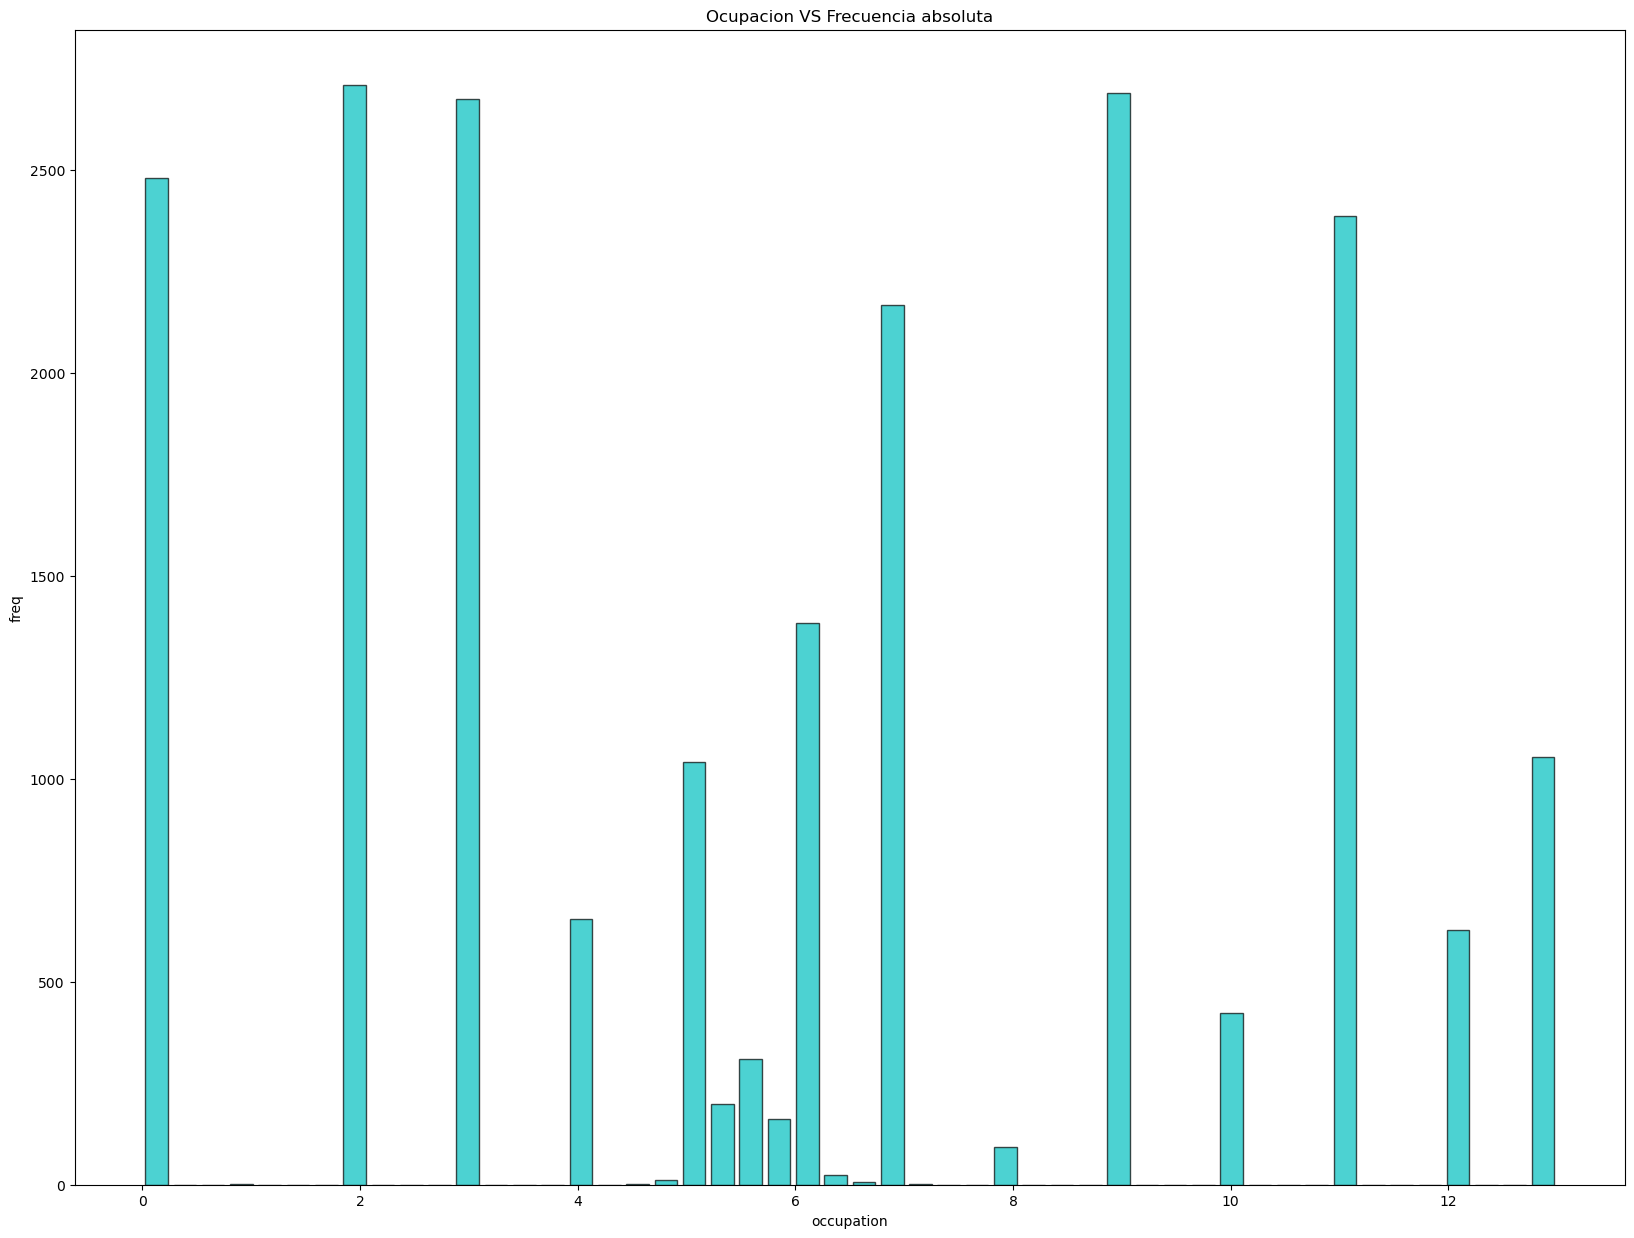

In [63]:
occupationIntK3_2 = censusImpK3["occupation"]

occupationMeanK3_2 = occupationIntK3_2.mean()
occupationModeK3_2 = occupationIntK3_2.mode()[0]
occupationQuantil1K3_2 = occupationIntK3_2.quantile(0.25)
occupationQuantil2K3_2 = occupationIntK3_2.quantile(0.50)
occupationQuantil3K3_2 = occupationIntK3_2.quantile(0.75)

print("Media: ", occupationMeanK3_2)
print("Moda: ", occupationModeK3_2)
print("Primer Cuartil: ", occupationQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", occupationQuantil2K3_2)
print("Tercer Cuartil: ", occupationQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["occupation"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ocupacion VS Frecuencia absoluta")
plt.xlabel("occupation")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "occupation"

*La ocupacion es un atributo de registros numericos que toman valores continuos entre 0 y 13, con media de 5.94 y mediana de 6.*


Media:  1.42137648553642
Moda:  0.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  3.0


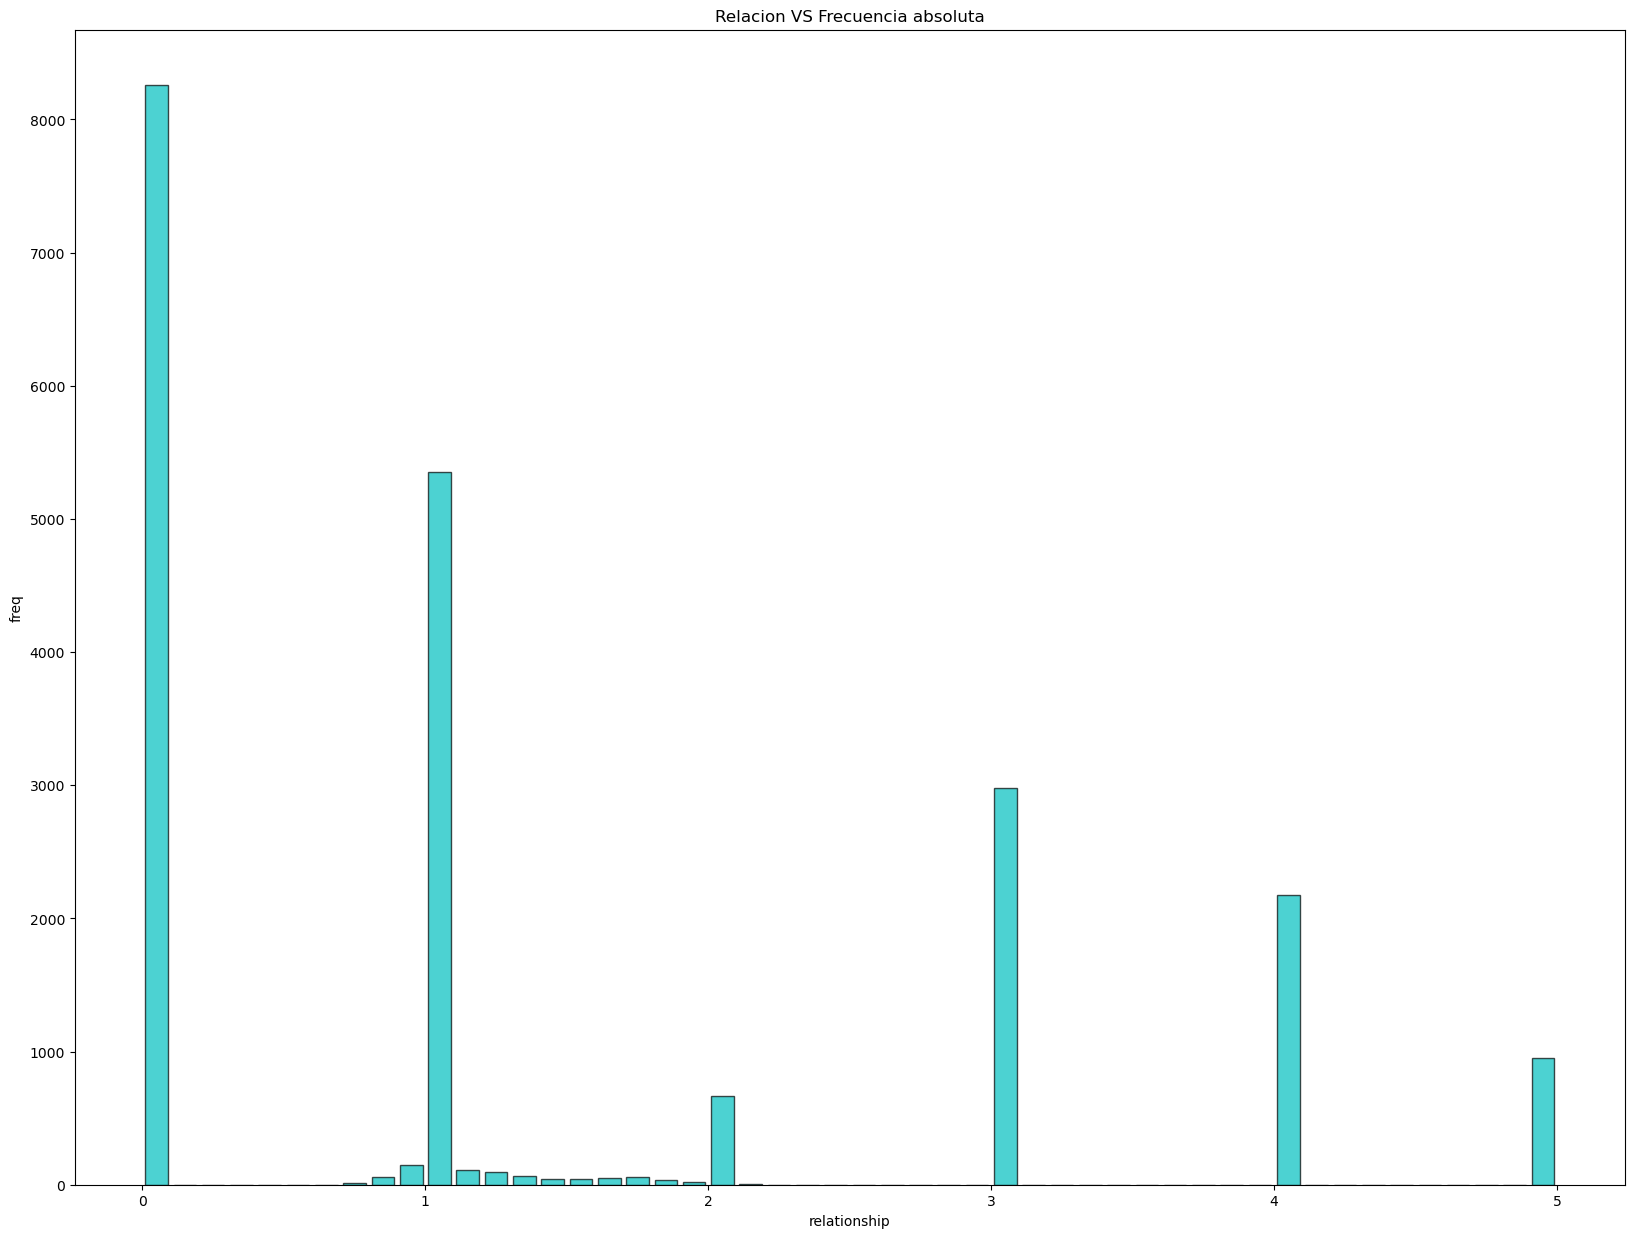

In [64]:
relationshipIntK3_2 = censusImpK3["relationship"]

relationshipMeanK3_2 = relationshipIntK3_2.mean()
relationshipModeK3_2 = relationshipIntK3_2.mode()[0]
relationshipQuantil1K3_2 = relationshipIntK3_2.quantile(0.25)
relationshipQuantil2K3_2 = relationshipIntK3_2.quantile(0.50)
relationshipQuantil3K3_2 = relationshipIntK3_2.quantile(0.75)

print("Media: ", relationshipMeanK3_2)
print("Moda: ", relationshipModeK3_2)
print("Primer Cuartil: ", relationshipQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", relationshipQuantil2K3_2)
print("Tercer Cuartil: ", relationshipQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["relationship"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Relacion VS Frecuencia absoluta")
plt.xlabel("relationship")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "relationship"

*La relacion es un atributo de registros numericos que toman valores continuos entre 0 y 5, con media de 1.42 y mediana de 1.*


Media:  3.683966606191528
Moda:  4.0
Primer Cuartil:  4.0
Segundo Cuartil (Mediana):  4.0
Tercer Cuartil:  4.0


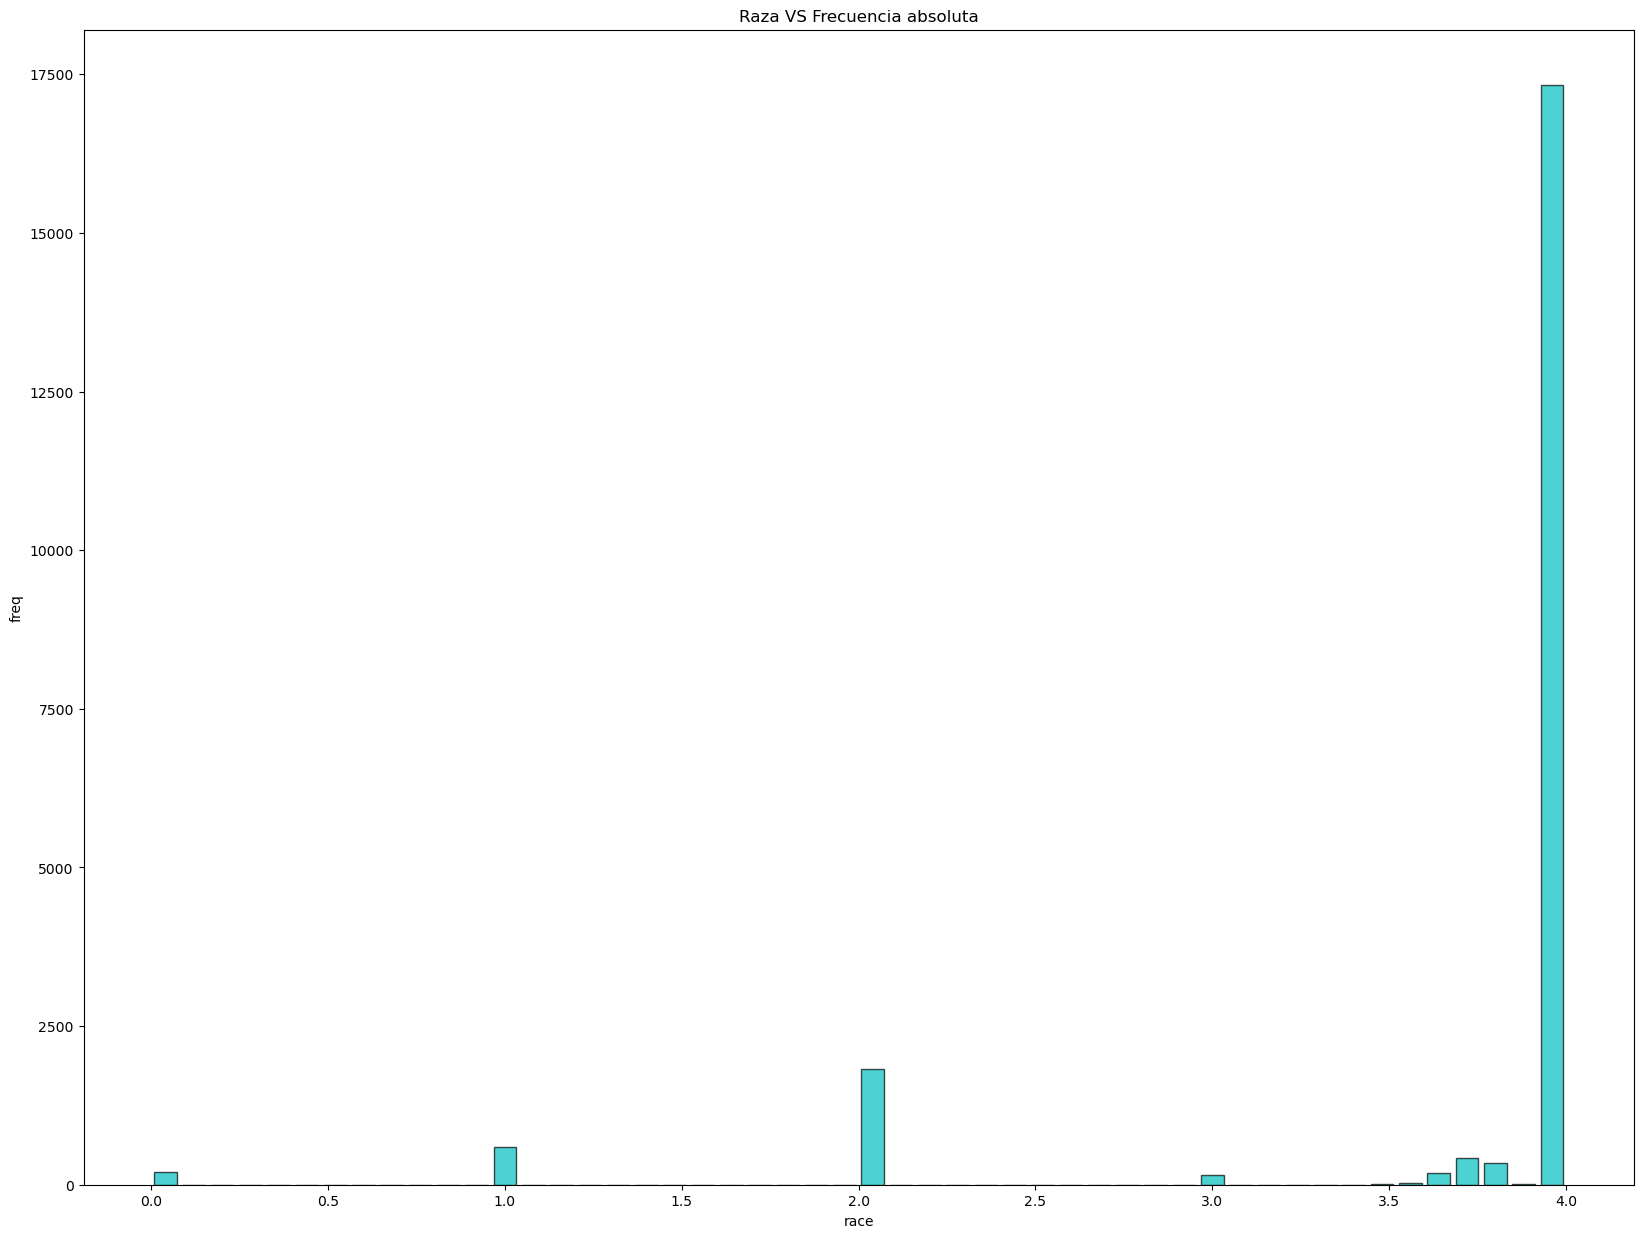

In [65]:
raceIntK3_2 = censusImpK3["race"]

raceMeanK3_2 = raceIntK3_2.mean()
raceModeK3_2 = raceIntK3_2.mode()[0]
raceQuantil1K3_2 = raceIntK3_2.quantile(0.25)
raceQuantil2K3_2 = raceIntK3_2.quantile(0.50)
raceQuantil3K3_2 = raceIntK3_2.quantile(0.75)

print("Media: ", raceMeanK3_2)
print("Moda: ", raceModeK3_2)
print("Primer Cuartil: ", raceQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", raceQuantil2K3_2)
print("Tercer Cuartil: ", raceQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["race"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Raza VS Frecuencia absoluta")
plt.xlabel("race")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "race"

*La raza es un atributo de registros numericos que toman valores continuos entre 0 y 4, con media de 3.68 y mediana de 4.*


Media:  0.6772555132938907
Moda:  1.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  1.0


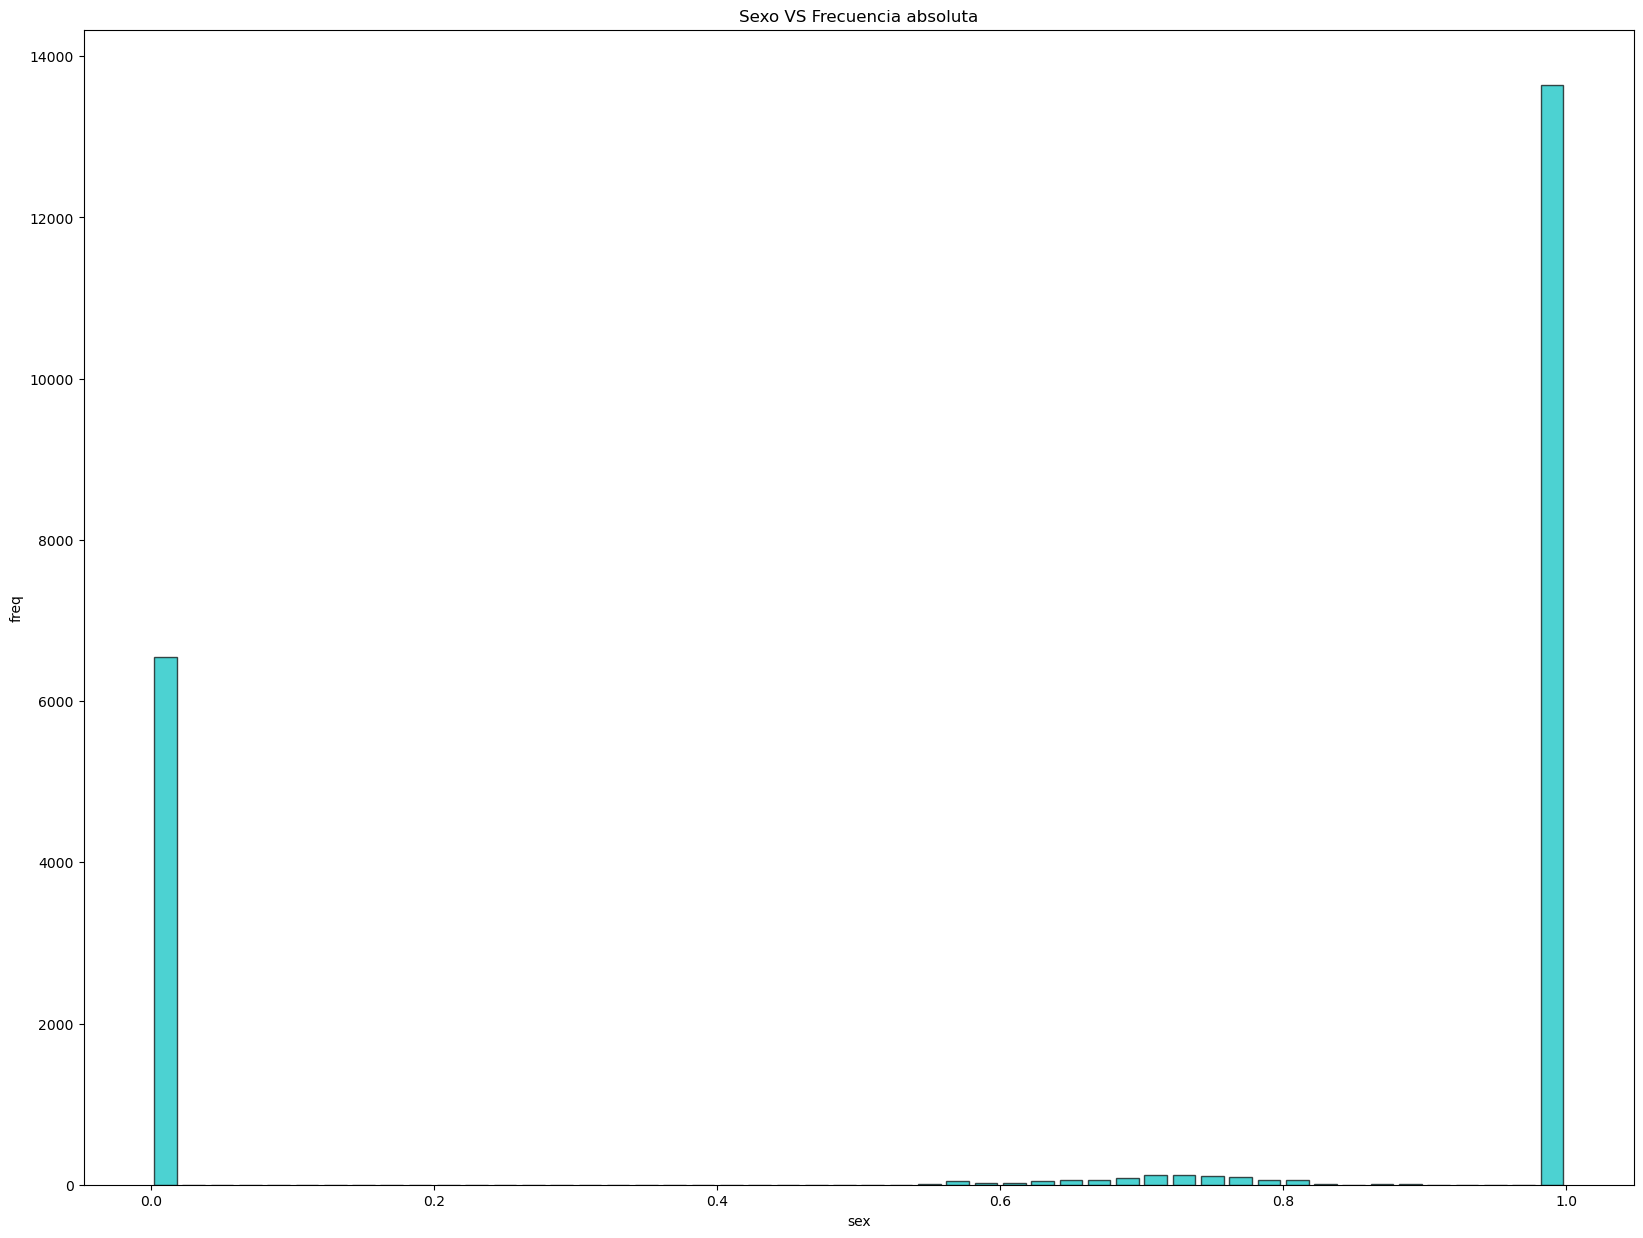

In [66]:
sexIntK3_2 = censusImpK3["sex"]

sexMeanK3_2 = sexIntK3_2.mean()
sexModeK3_2 = sexIntK3_2.mode()[0]
sexQuantil1K3_2 = sexIntK3_2.quantile(0.25)
sexQuantil2K3_2 = sexIntK3_2.quantile(0.50)
sexQuantil3K3_2 = sexIntK3_2.quantile(0.75)

print("Media: ", sexMeanK3_2)
print("Moda: ", sexModeK3_2)
print("Primer Cuartil: ", sexQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", sexQuantil2K3_2)
print("Tercer Cuartil: ", sexQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["sex"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Sexo VS Frecuencia absoluta")
plt.xlabel("sex")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "sex"

*El sexo es un atributo de registros numericos que toman valores continuos entre 0 y 1, con media de 0.67 y mediana de 1.*


Media:  1109.5750582270557
Moda:  0.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  0.0
Tercer Cuartil:  0.0


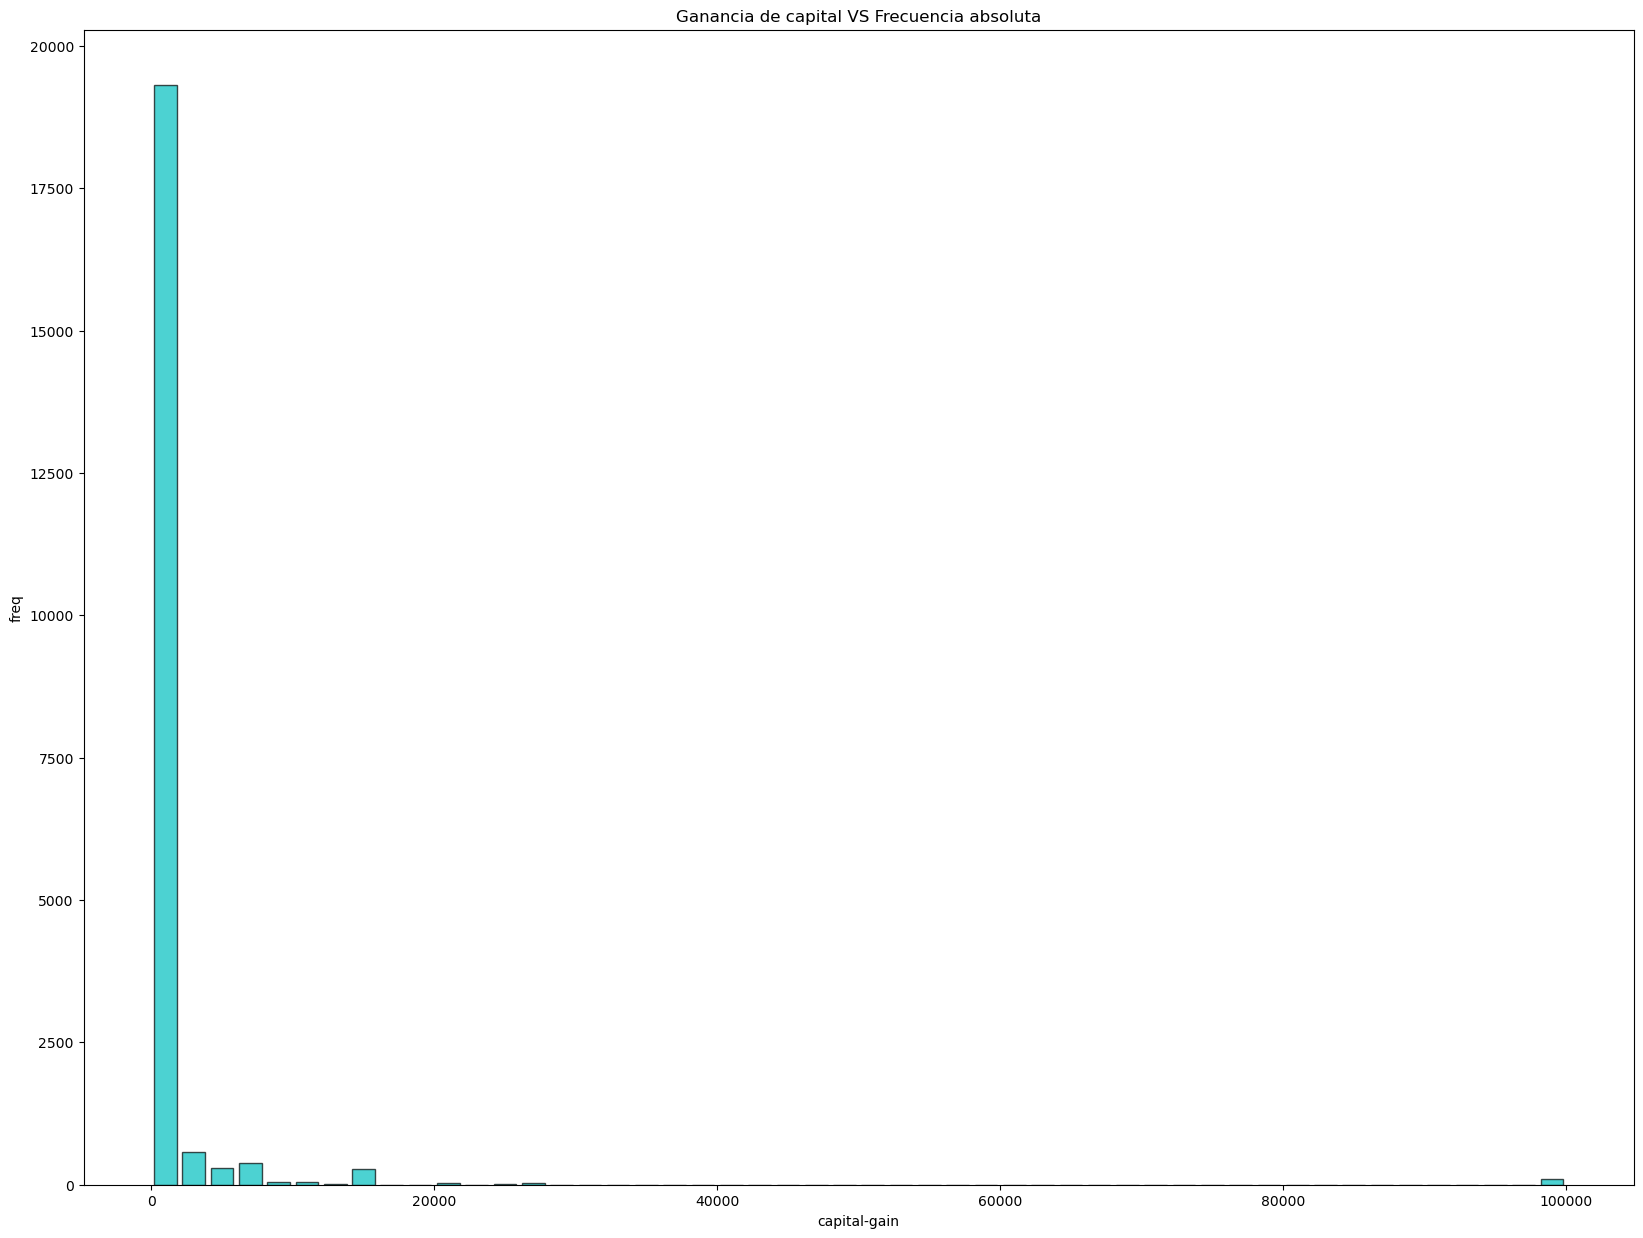

In [67]:
capital_gainIntK3_2 = censusImpK3["capital-gain"]

capital_gainMeanK3_2 = capital_gainIntK3_2.mean()
capital_gainModeK3_2 = capital_gainIntK3_2.mode()[0]
capital_gainQuantil1K3_2 = capital_gainIntK3_2.quantile(0.25)
capital_gainQuantil2K3_2 = capital_gainIntK3_2.quantile(0.50)
capital_gainQuantil3K3_2 = capital_gainIntK3_2.quantile(0.75)

print("Media: ", capital_gainMeanK3_2)
print("Moda: ", capital_gainModeK3_2)
print("Primer Cuartil: ", capital_gainQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", capital_gainQuantil2K3_2)
print("Tercer Cuartil: ", capital_gainQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["capital-gain"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ganancia de capital VS Frecuencia absoluta")
plt.xlabel("capital-gain")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "capital-gain"

*La ganancia de capital es un atributo de registros numericos que toman valores continuos entre 0 y 99999, con media de 1109.57 y mediana de 0.*


Media:  88.83255546242887
Moda:  0.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  0.0
Tercer Cuartil:  0.0


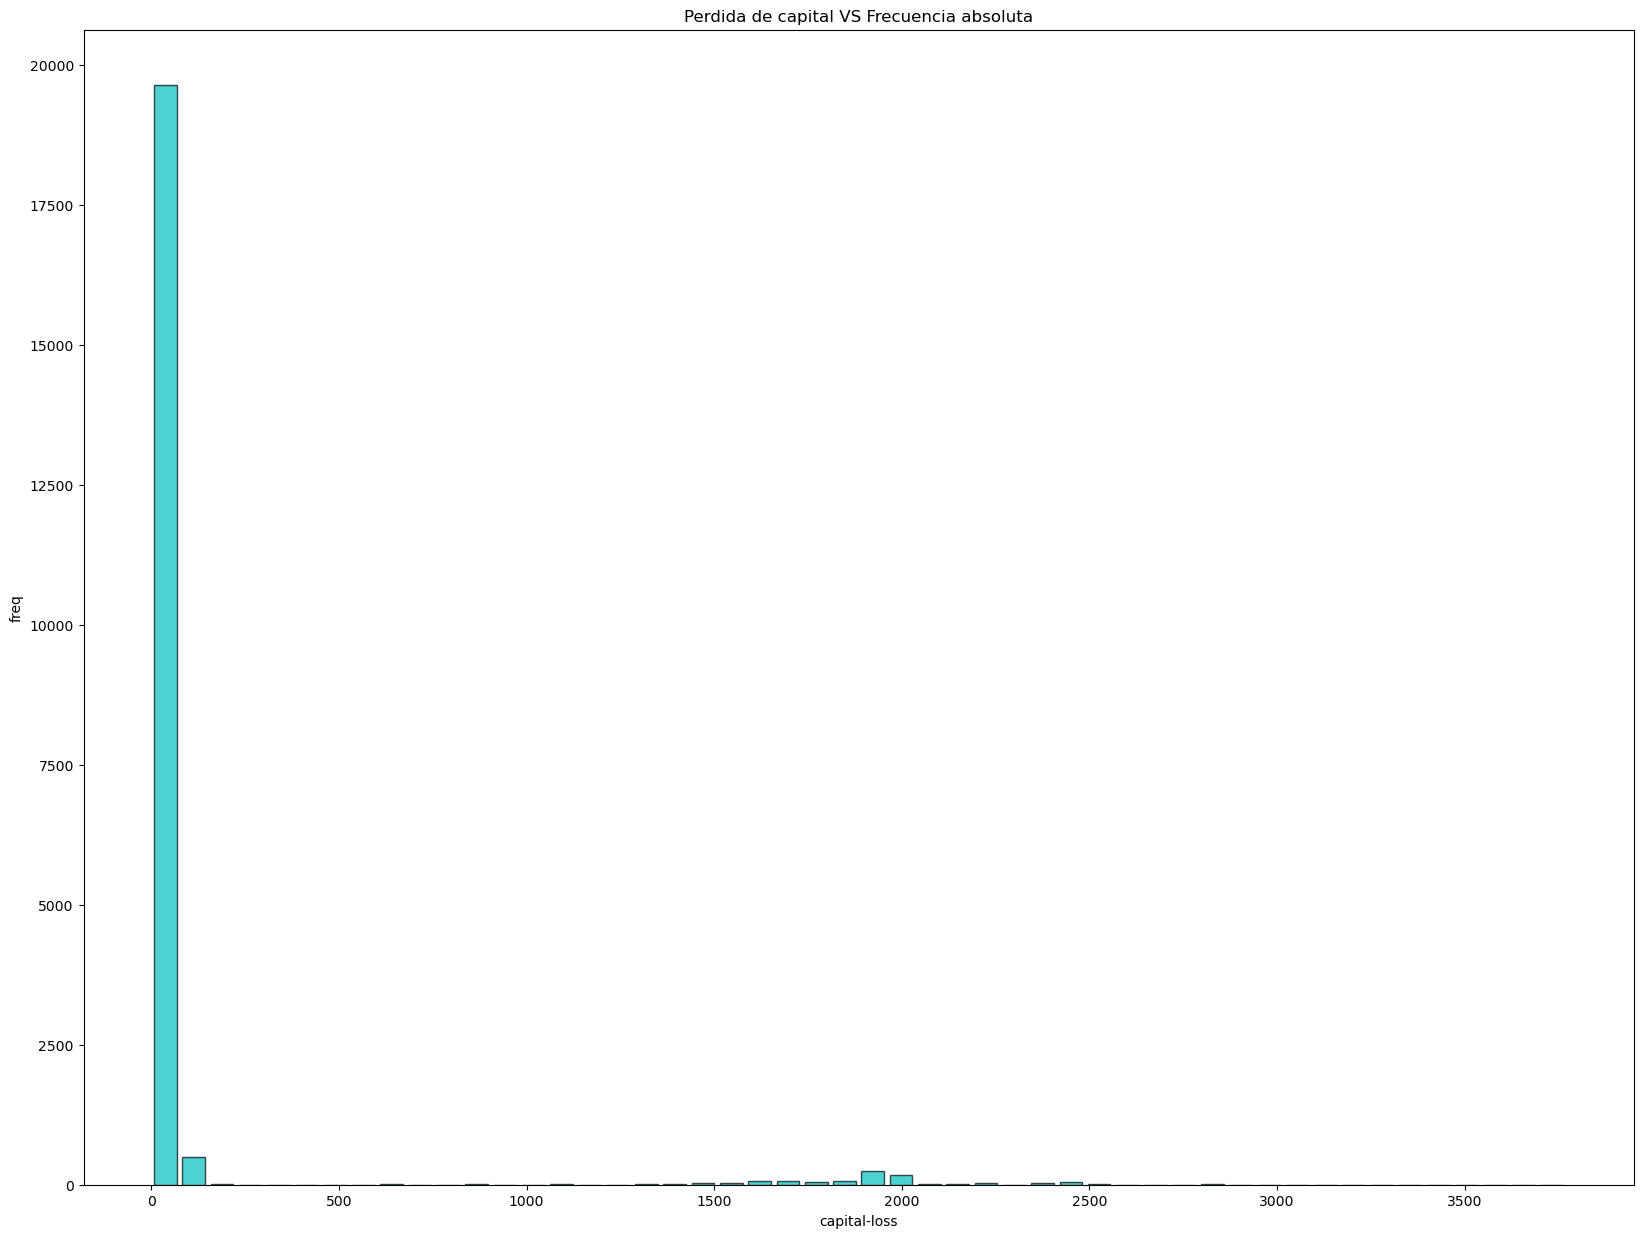

In [68]:
capital_lossIntK3_2 = censusImpK3["capital-loss"]

capital_lossMeanK3_2 = capital_lossIntK3_2.mean()
capital_lossModeK3_2 = capital_lossIntK3_2.mode()[0]
capital_lossQuantil1K3_2 = capital_lossIntK3_2.quantile(0.25)
capital_lossQuantil2K3_2 = capital_lossIntK3_2.quantile(0.50)
capital_lossQuantil3K3_2 = capital_lossIntK3_2.quantile(0.75)

print("Media: ", capital_lossMeanK3_2)
print("Moda: ", capital_lossModeK3_2)
print("Primer Cuartil: ", capital_lossQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", capital_lossQuantil2K3_2)
print("Tercer Cuartil: ", capital_lossQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["capital-loss"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Perdida de capital VS Frecuencia absoluta")
plt.xlabel("capital-loss")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "capital-loss"

*La perdida de capital es un atributo de registros numericos que toman valores continuos entre 0 y 3770, con media de 88.83 y mediana de 0.*


Media:  40.992837711774534
Moda:  40.0
Primer Cuartil:  40.0
Segundo Cuartil (Mediana):  40.0
Tercer Cuartil:  45.0


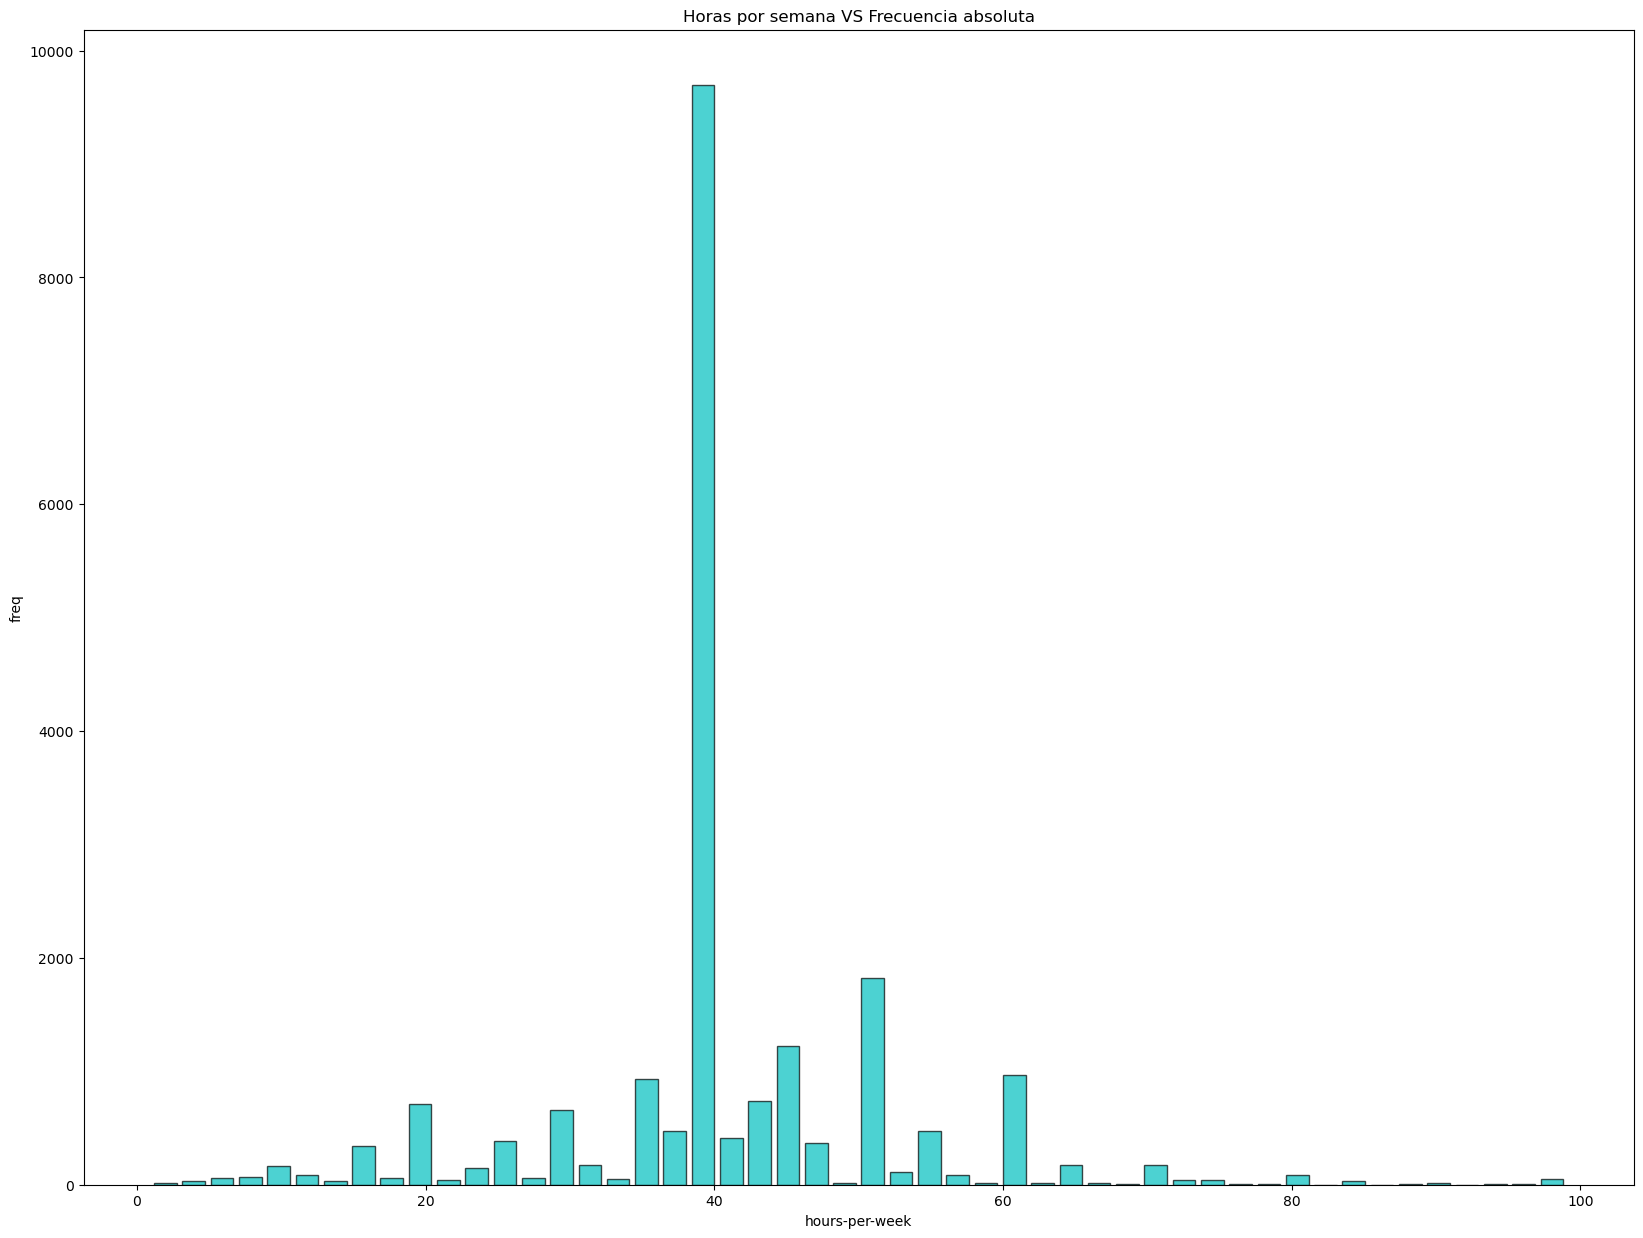

In [69]:
hours_per_weekIntK3_2 = censusImpK3["hours-per-week"]

hours_per_weekMeanK3_2 = hours_per_weekIntK3_2.mean()
hours_per_weekModeK3_2 = hours_per_weekIntK3_2.mode()[0]
hours_per_weekQuantil1K3_2 = hours_per_weekIntK3_2.quantile(0.25)
hours_per_weekQuantil2K3_2 = hours_per_weekIntK3_2.quantile(0.50)
hours_per_weekQuantil3K3_2 = hours_per_weekIntK3_2.quantile(0.75)

print("Media: ", hours_per_weekMeanK3_2)
print("Moda: ", hours_per_weekModeK3_2)
print("Primer Cuartil: ", hours_per_weekQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", hours_per_weekQuantil2K3_2)
print("Tercer Cuartil: ", hours_per_weekQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["hours-per-week"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Horas por semana VS Frecuencia absoluta")
plt.xlabel("hours-per-week")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "hours-per-week"

*Las horas semanales es un atributo de registros numericos que toman valores continuos entre 1 y 99, con media de 40.99 y mediana de 40.*



Media:  36.39484368789887
Moda:  38.0
Primer Cuartil:  38.0
Segundo Cuartil (Mediana):  38.0
Tercer Cuartil:  38.0


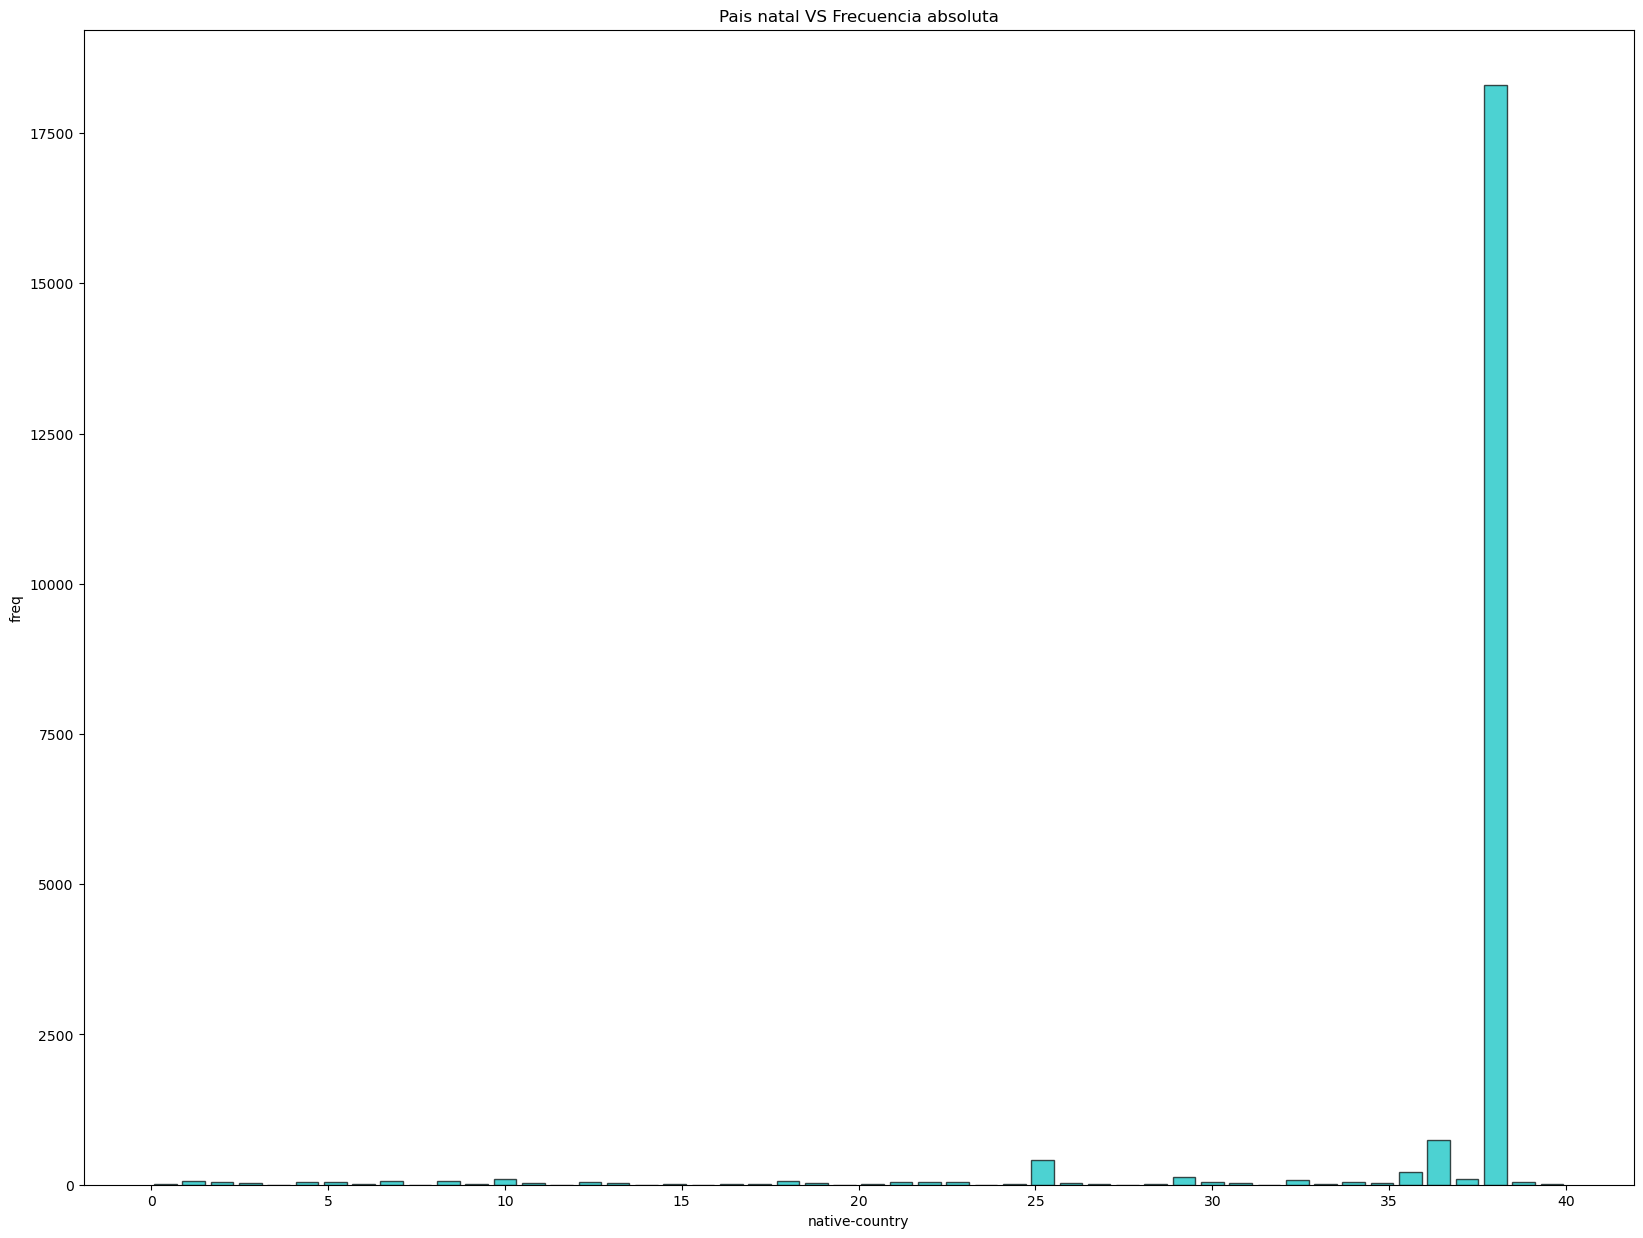

In [70]:
native_countryIntK3_2 = censusImpK3["native-country"]

native_countryMeanK3_2 = native_countryIntK3_2.mean()
native_countryModeK3_2 = native_countryIntK3_2.mode()[0]
native_countryQuantil1K3_2 = native_countryIntK3_2.quantile(0.25)
native_countryQuantil2K3_2 = native_countryIntK3_2.quantile(0.50)
native_countryQuantil3K3_2 = native_countryIntK3_2.quantile(0.75)

print("Media: ", native_countryMeanK3_2)
print("Moda: ", native_countryModeK3_2)
print("Primer Cuartil: ", native_countryQuantil1K3_2)
print("Segundo Cuartil (Mediana): ", native_countryQuantil2K3_2)
print("Tercer Cuartil: ", native_countryQuantil3K3_2)

plt.figure(figsize=(20, 15))
censusImpK3["native-country"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Pais natal VS Frecuencia absoluta")
plt.xlabel("native-country")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "native-country"

*El pais natal es un atributo de registros numericos que toman valores continuos entre 0 y 40, con media de 36.39 y mediana de 38.*


#### censusTestImpK3 - Dataset de prueba (NA_fullTest)

In [71]:
censusTestImpK3 = census_test1.copy()

In [72]:
censusTestImpK3[features].isna().sum()

age               397
workclass         399
fnlwgt            417
education         427
education-num     393
marital-status    432
occupation        396
relationship      390
race              429
sex               405
capital-gain      407
capital-loss      414
hours-per-week    397
native-country      0
dtype: int64

In [73]:
print("Dataframe antes de la imputación kNN = 230: \n")
censusTestImpK3

Dataframe antes de la imputación kNN = 230: 



,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,2135,44.0,2.0,81853.0,11.0,9.0,4.0,11.0,1.0,1.0,0.0,0.0,0.0,40.0,36
1,15639,21.0,NaN,306114.0,15.0,10.0,4.0,0.0,3.0,4.0,1.0,0.0,NaN,20.0,36
2,29059,36.0,2.0,186110.0,15.0,10.0,2.0,13.0,0.0,4.0,1.0,0.0,0.0,40.0,36
3,27523,30.0,4.0,NaN,8.0,11.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,49.0,36
4,9280,42.0,NaN,133584.0,15.0,10.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,40.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,16826,27.0,2.0,218785.0,11.0,9.0,2.0,3.0,5.0,4.0,0.0,0.0,0.0,40.0,36
9045,25246,54.0,4.0,36327.0,5.0,4.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,50.0,36
9046,18980,53.0,2.0,149650.0,11.0,9.0,4.0,NaN,1.0,4.0,1.0,0.0,2559.0,48.0,36
9047,953,18.0,2.0,177722.0,11.0,NaN,4.0,7.0,3.0,4.0,0.0,0.0,0.0,20.0,36


In [74]:
imputerTest_K3 = KNNImputer(n_neighbors=230)

censusTestImpK3_imputed = imputerTest_K3.fit_transform(censusTestImpK3[features])

censusTestImpK3 = pd.DataFrame(censusTestImpK3_imputed, columns=censusTestImpK3[features].columns)
censusTestImpK3.insert(0, "Id", census_test1["Id"])

print("Dataframe después de la imputación kNN = 230: \n")
censusTestImpK3

Dataframe después de la imputación kNN = 230: 



,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,2135,44.0,2.000000,81853.000000,11.0,9.000000,4.0,11.000000,1.0,1.0,0.0,0.0,0.000000,40.0,36.0
1,15639,21.0,2.230435,306114.000000,15.0,10.000000,4.0,0.000000,3.0,4.0,1.0,0.0,95.443478,20.0,36.0
2,29059,36.0,2.000000,186110.000000,15.0,10.000000,2.0,13.000000,0.0,4.0,1.0,0.0,0.000000,40.0,36.0
3,27523,30.0,4.000000,180357.395652,8.0,11.000000,0.0,2.000000,1.0,4.0,1.0,0.0,0.000000,49.0,36.0
4,9280,42.0,2.300000,133584.000000,15.0,10.000000,2.0,2.000000,0.0,4.0,1.0,0.0,0.000000,40.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,16826,27.0,2.000000,218785.000000,11.0,9.000000,2.0,3.000000,5.0,4.0,0.0,0.0,0.000000,40.0,36.0
9045,25246,54.0,4.000000,36327.000000,5.0,4.000000,2.0,6.000000,0.0,4.0,1.0,0.0,0.000000,50.0,36.0
9046,18980,53.0,2.000000,149650.000000,11.0,9.000000,4.0,5.852174,1.0,4.0,1.0,0.0,2559.000000,48.0,36.0
9047,953,18.0,2.000000,177722.000000,11.0,9.665217,4.0,7.000000,3.0,4.0,0.0,0.0,0.000000,20.0,36.0


In [75]:
censusTestImpK3.describe()

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,9049.000000,9049.000000,9049.000000,9.049000e+03,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000
mean,16387.655984,38.312910,2.216094,1.907071e+05,10.282993,10.137451,2.571020,5.951908,1.397256,3.674510,0.681346,989.606448,88.281833,40.981626,34.470439
std,9411.826934,12.822296,0.949468,1.034380e+05,3.759267,2.496190,1.461128,3.943539,1.562937,0.817616,0.456389,6703.770621,394.859002,12.000116,5.849860
min,4.000000,17.000000,0.000000,1.921400e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8226.000000,28.000000,2.000000,1.213080e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,36.000000
50%,16436.000000,37.830435,2.000000,1.824191e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,36.000000
75%,24537.000000,46.000000,2.000000,2.346640e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,36.000000
max,32560.000000,90.000000,6.000000,1.366120e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,38.000000


In [76]:
censusTestImpK3[features].isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

<Axes: >

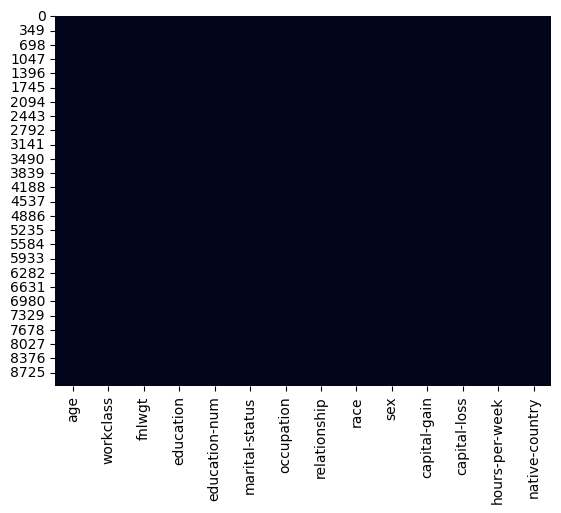

In [77]:
sns.heatmap(censusTestImpK3[features].isna(), cbar=False)

Media:  38.31291038644674
Moda:  29.0
Primer Cuartil:  28.0
Segundo Cuartil (Mediana):  37.8304347826087
Tercer Cuartil:  46.0


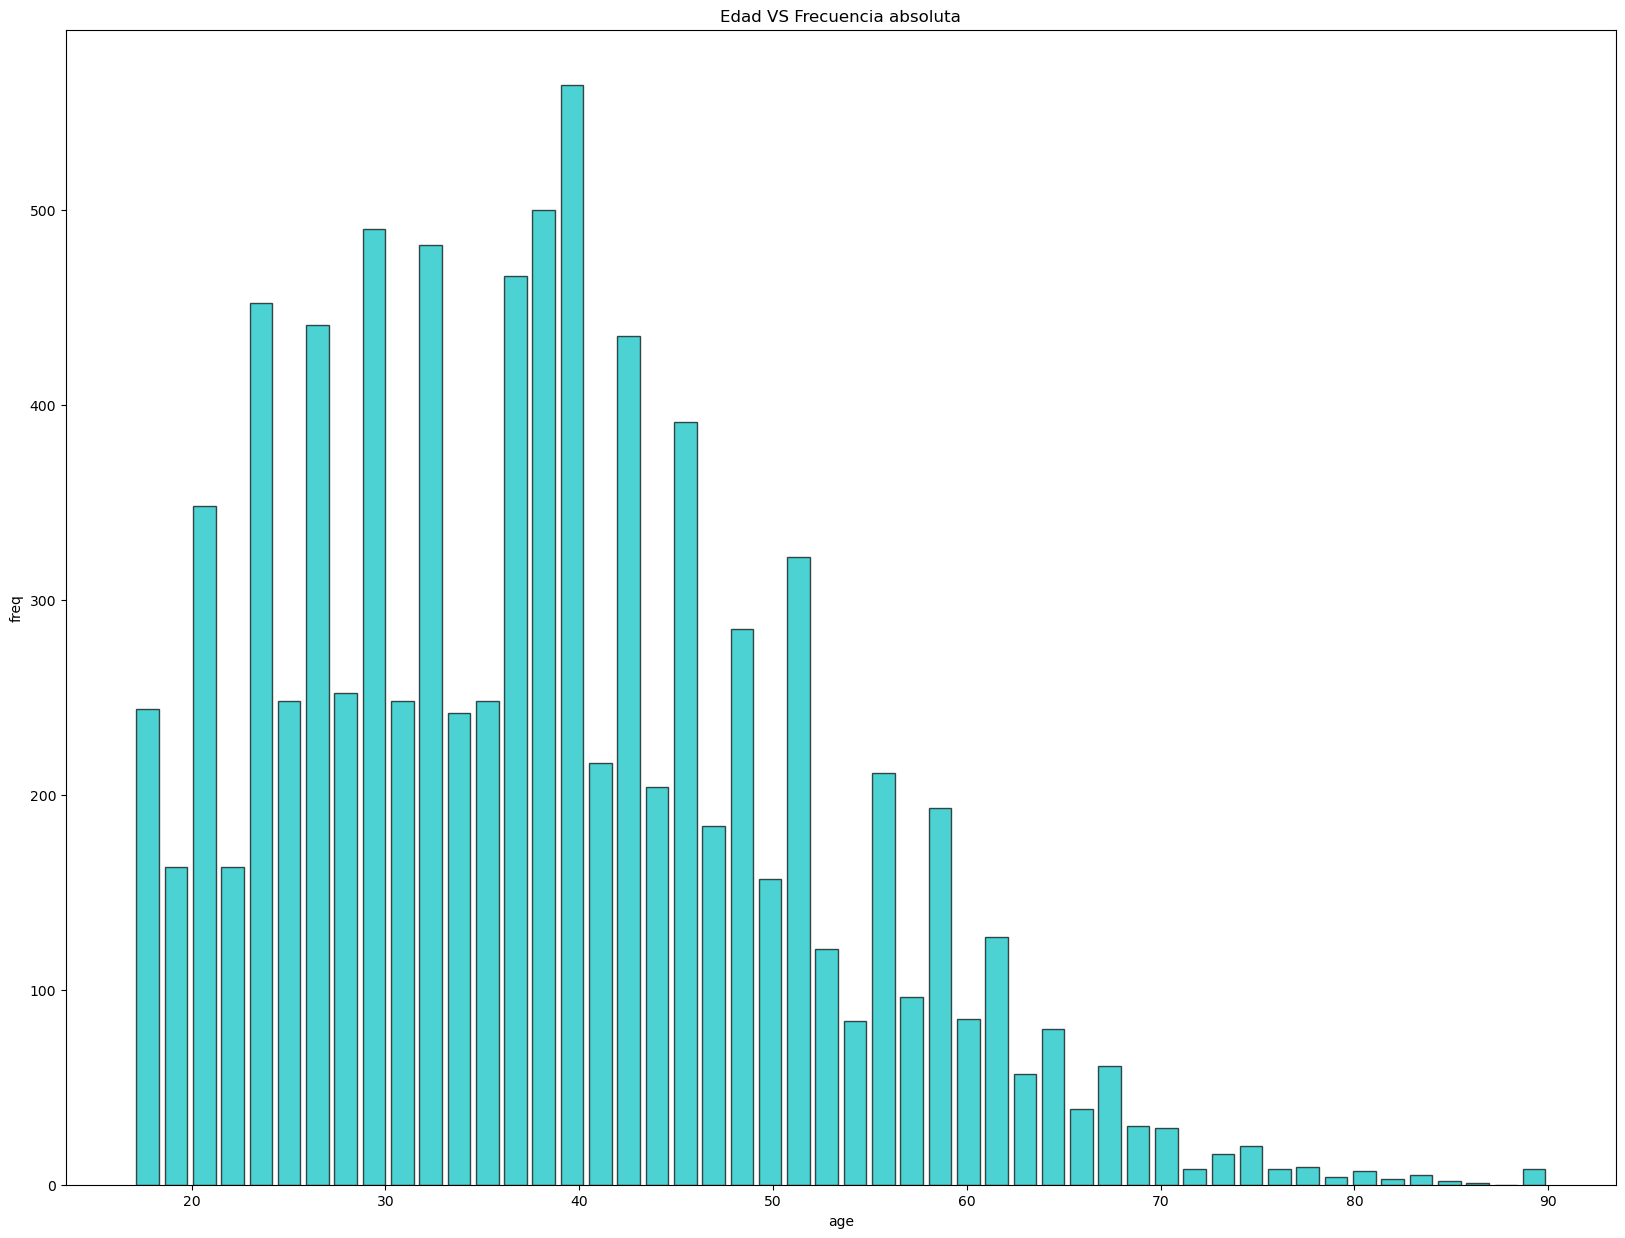

In [78]:
ageIntK3_3 = censusTestImpK3["age"]

ageMeanK3_3 = ageIntK3_3.mean()
ageModeK3_3 = ageIntK3_3.mode()[0]
ageQuantil1K3_3 = ageIntK3_3.quantile(0.25)
ageQuantil2K3_3 = ageIntK3_3.quantile(0.50)
ageQuantil3K3_3 = ageIntK3_3.quantile(0.75)

print("Media: ", ageMeanK3_3)
print("Moda: ", ageModeK3_3)
print("Primer Cuartil: ", ageQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", ageQuantil2K3_3)
print("Tercer Cuartil: ", ageQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["age"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Edad VS Frecuencia absoluta")
plt.xlabel("age")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "age"

*La edad es un atributo de registros numericos que toman valores continuos entre 17 y 90, con media de 38.31 y mediana de 37.83.*


Media:  2.2160944999927925
Moda:  2.0
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  2.0


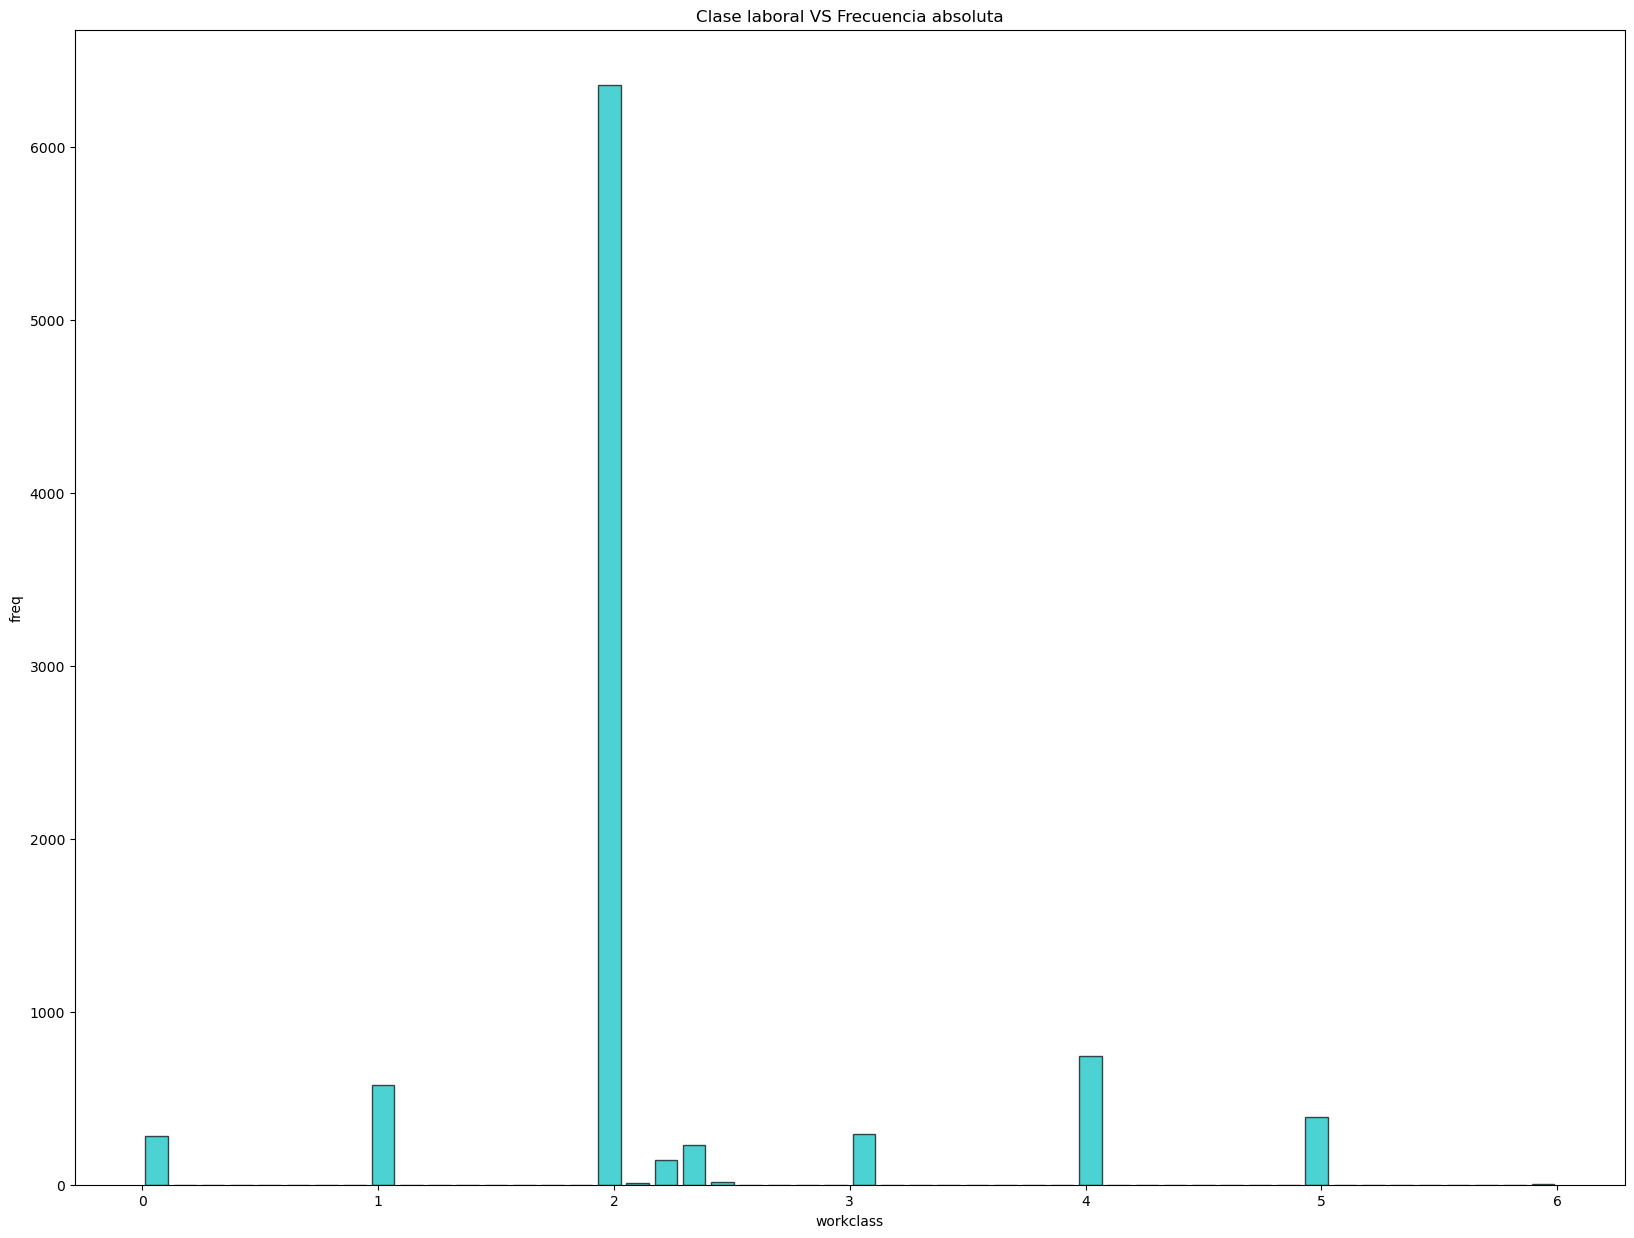

In [79]:
workclassIntK3_3 = censusTestImpK3["workclass"]

workclassMeanK3_3 = workclassIntK3_3.mean()
workclassModeK3_3 = workclassIntK3_3.mode()[0]
workclassQuantil1K3_3 = workclassIntK3_3.quantile(0.25)
workclassQuantil2K3_3 = workclassIntK3_3.quantile(0.50)
workclassQuantil3K3_3 = workclassIntK3_3.quantile(0.75)

print("Media: ", workclassMeanK3_3)
print("Moda: ", workclassModeK3_3)
print("Primer Cuartil: ", workclassQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", workclassQuantil2K3_3)
print("Tercer Cuartil: ", workclassQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["workclass"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Clase laboral VS Frecuencia absoluta")
plt.xlabel("workclass")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "workclass"

*La clase de trabajo es un atributo de registros numericos que toman valores continuos entre 0 y 6, con media de 2.21 y mediana de 2.*


Media:  190707.05553724407
Moda:  121124.0
Primer Cuartil:  121308.0
Segundo Cuartil (Mediana):  182419.13913043478
Tercer Cuartil:  234664.0


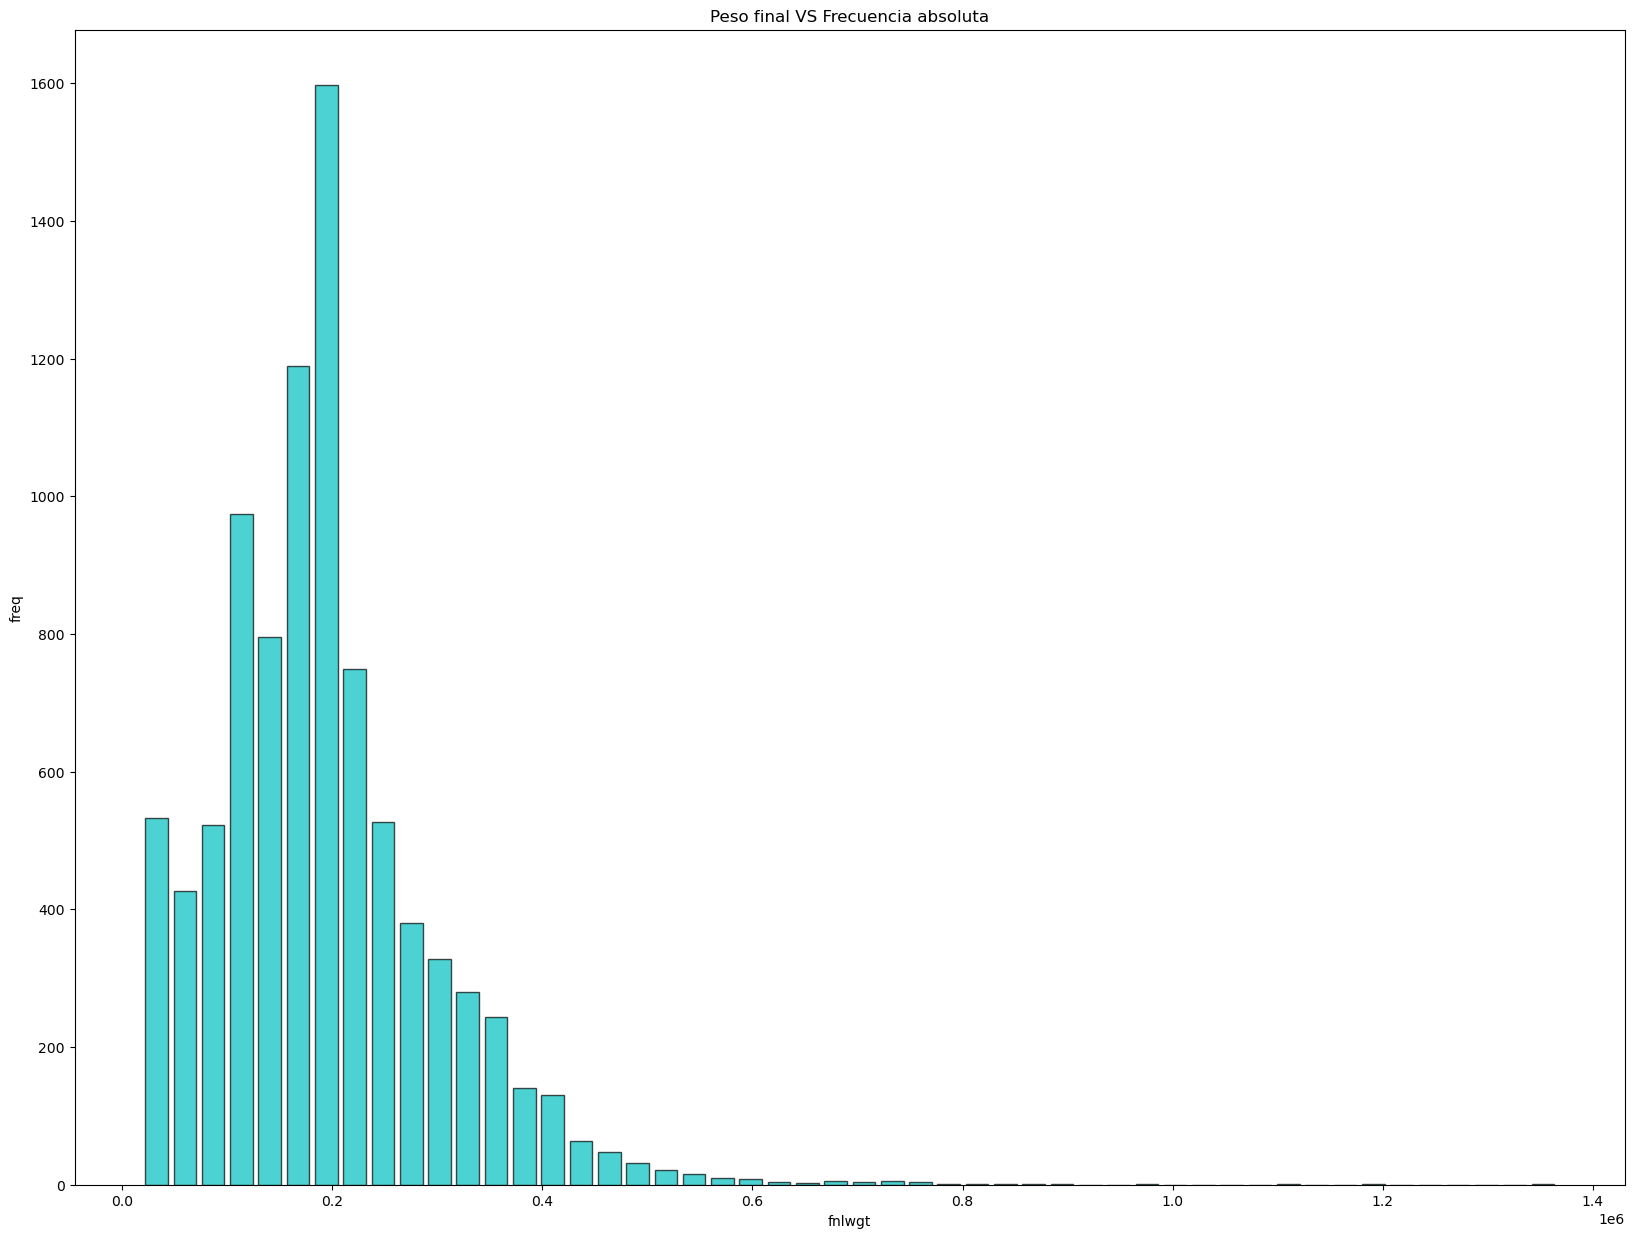

In [80]:
fnlwgtIntK3_3 = censusTestImpK3["fnlwgt"]

fnlwgtMeanK3_3 = fnlwgtIntK3_3.mean()
fnlwgtModeK3_3 = fnlwgtIntK3_3.mode()[0]
fnlwgtQuantil1K3_3 = fnlwgtIntK3_3.quantile(0.25)
fnlwgtQuantil2K3_3 = fnlwgtIntK3_3.quantile(0.50)
fnlwgtQuantil3K3_3 = fnlwgtIntK3_3.quantile(0.75)

print("Media: ", fnlwgtMeanK3_3)
print("Moda: ", fnlwgtModeK3_3)
print("Primer Cuartil: ", fnlwgtQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", fnlwgtQuantil2K3_3)
print("Tercer Cuartil: ", fnlwgtQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["fnlwgt"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Peso final VS Frecuencia absoluta")
plt.xlabel("fnlwgt")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "fnlwgt"

*El peso final es un atributo de registros numericos que toman valores continuos entre 13769 y 1484705, con media de 190707.05 y mediana de 182419.13.*


Media:  10.282992595866945
Moda:  11.0
Primer Cuartil:  9.0
Segundo Cuartil (Mediana):  11.0
Tercer Cuartil:  12.0


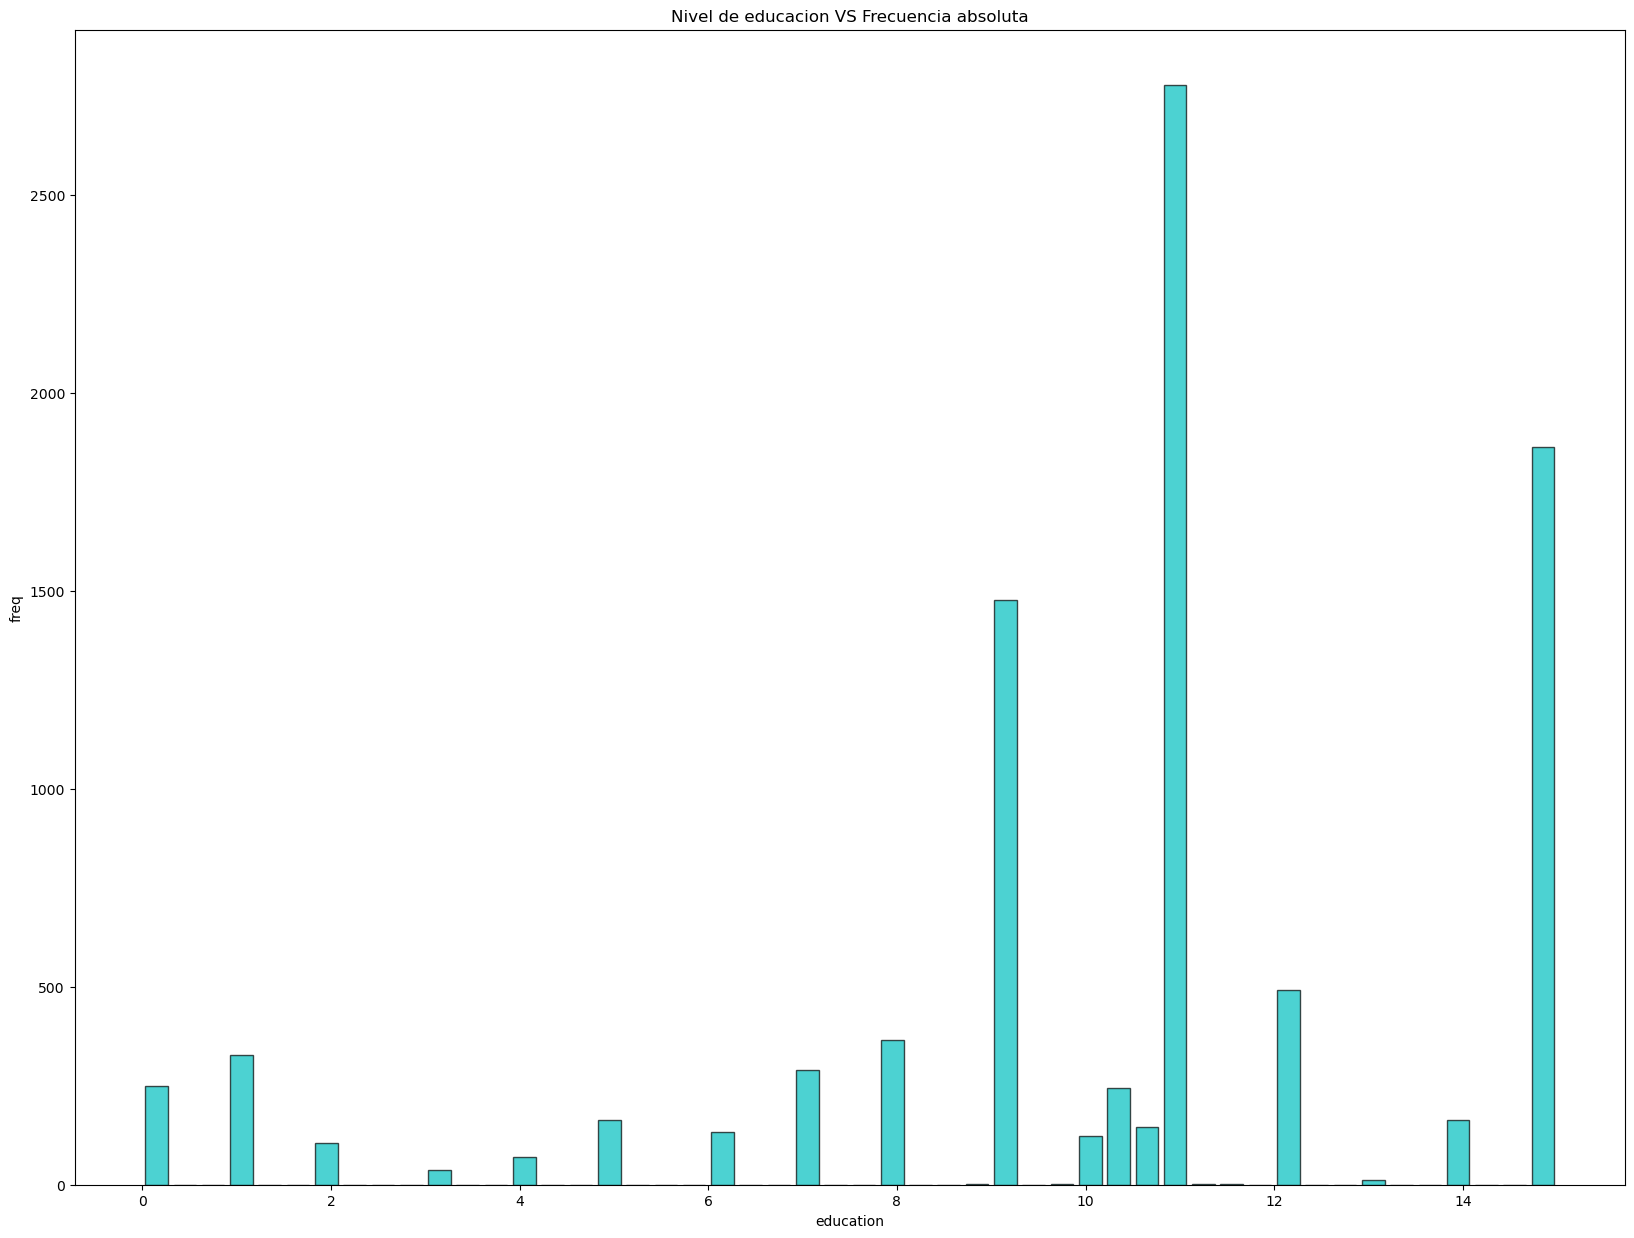

In [81]:
educationIntK3_3 = censusTestImpK3["education"]

educationMeanK3_3 = educationIntK3_3.mean()
educationModeK3_3 = educationIntK3_3.mode()[0]
educationQuantil1K3_3 = educationIntK3_3.quantile(0.25)
educationQuantil2K3_3 = educationIntK3_3.quantile(0.50)
educationQuantil3K3_3 = educationIntK3_3.quantile(0.75)

print("Media: ", educationMeanK3_3)
print("Moda: ", educationModeK3_3)
print("Primer Cuartil: ", educationQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", educationQuantil2K3_3)
print("Tercer Cuartil: ", educationQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["education"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Nivel de educacion VS Frecuencia absoluta")
plt.xlabel("education")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "education"

*El nivel de educacion es un atributo de registros numericos que toman valores continuos entre 0 y 15, con media de 10.28 y mediana de 11.*


Media:  10.13745069116453
Moda:  9.0
Primer Cuartil:  9.0
Segundo Cuartil (Mediana):  10.0
Tercer Cuartil:  12.0


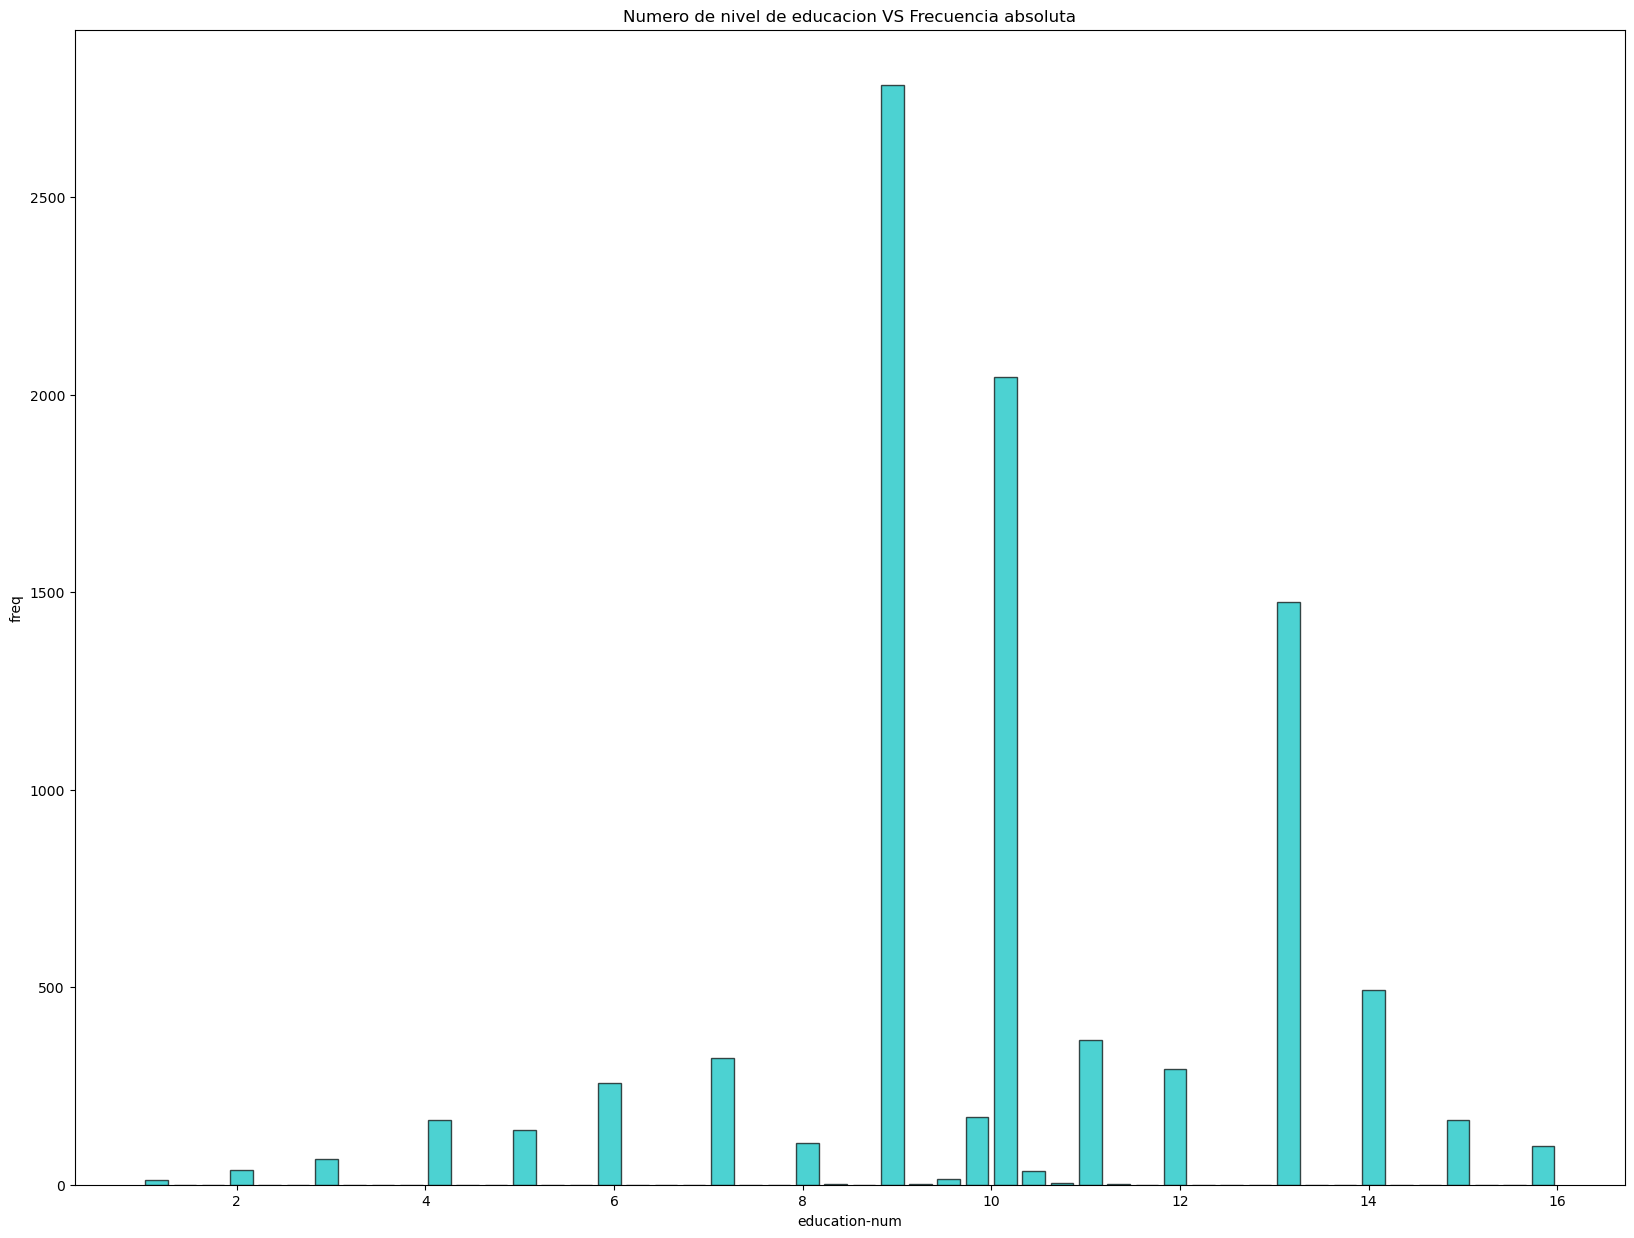

In [82]:
education_numIntK3_3 = censusTestImpK3["education-num"]

education_numMeanK3_3 = education_numIntK3_3.mean()
education_numModeK3_3 = education_numIntK3_3.mode()[0]
education_numQuantil1K3_3 = education_numIntK3_3.quantile(0.25)
education_numQuantil2K3_3 = education_numIntK3_3.quantile(0.50)
education_numQuantil3K3_3 = education_numIntK3_3.quantile(0.75)

print("Media: ", education_numMeanK3_3)
print("Moda: ", education_numModeK3_3)
print("Primer Cuartil: ", education_numQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", education_numQuantil2K3_3)
print("Tercer Cuartil: ", education_numQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["education-num"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Numero de nivel de educacion VS Frecuencia absoluta")
plt.xlabel("education-num")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "education-num"

*El numero de nivel de educacion es un atributo de registros numericos que toman valores continuos entre 1 y 16, con media de 10.13 y mediana de 10.*


Media:  2.5710196178294984
Moda:  2.0
Primer Cuartil:  2.0
Segundo Cuartil (Mediana):  2.0
Tercer Cuartil:  4.0


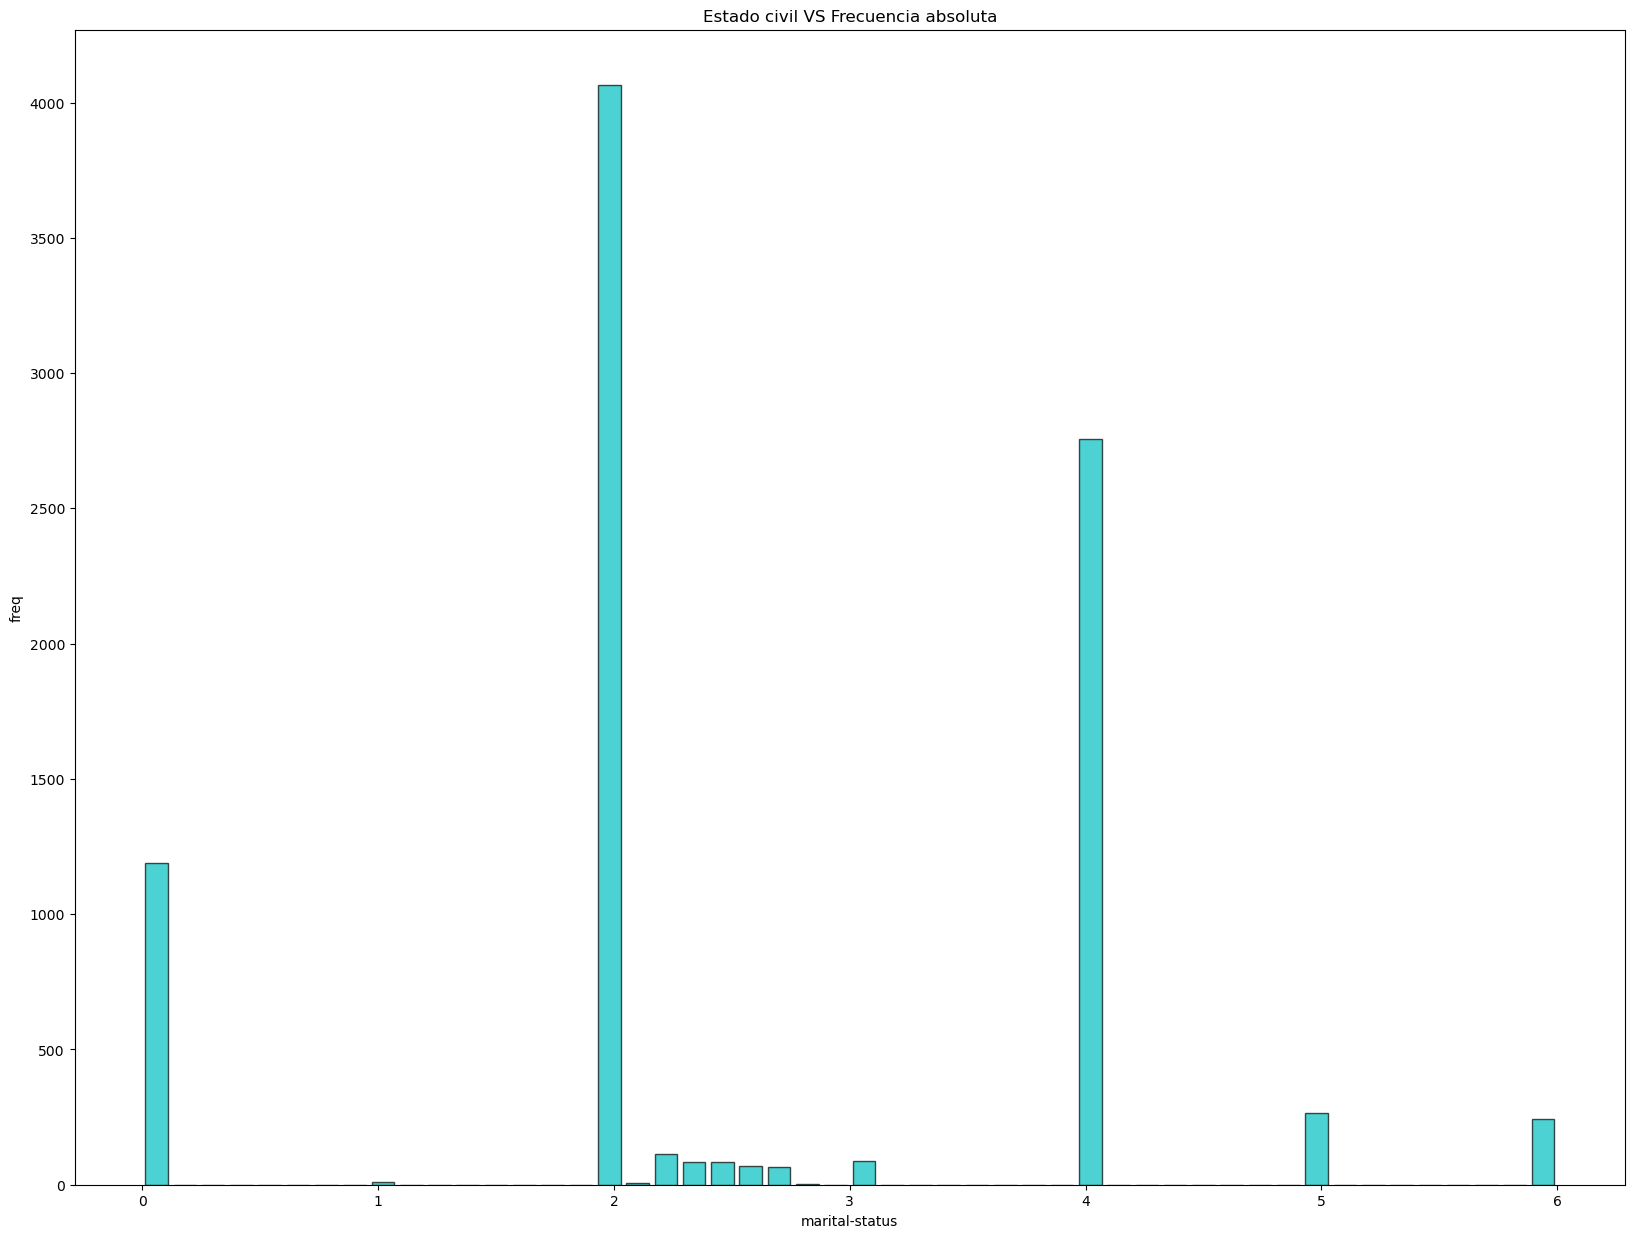

In [83]:
marital_statusIntK3_3 = censusTestImpK3["marital-status"]

marital_statusMeanK3_3 = marital_statusIntK3_3.mean()
marital_statusModeK3_3 = marital_statusIntK3_3.mode()[0]
marital_statusQuantil1K3_3 = marital_statusIntK3_3.quantile(0.25)
marital_statusQuantil2K3_3 = marital_statusIntK3_3.quantile(0.50)
marital_statusQuantil3K3_3 = marital_statusIntK3_3.quantile(0.75)

print("Media: ", marital_statusMeanK3_3)
print("Moda: ", marital_statusModeK3_3)
print("Primer Cuartil: ", marital_statusQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", marital_statusQuantil2K3_3)
print("Tercer Cuartil: ", marital_statusQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["marital-status"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Estado civil VS Frecuencia absoluta")
plt.xlabel("marital-status")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "marital-status"

*El estado civil es un atributo de registros numericos que toman valores continuos entre 0 y 6, con media de 2.57 y mediana de 2.*


Media:  5.951907729415212
Moda:  9.0
Primer Cuartil:  3.0
Segundo Cuartil (Mediana):  6.0
Tercer Cuartil:  9.0


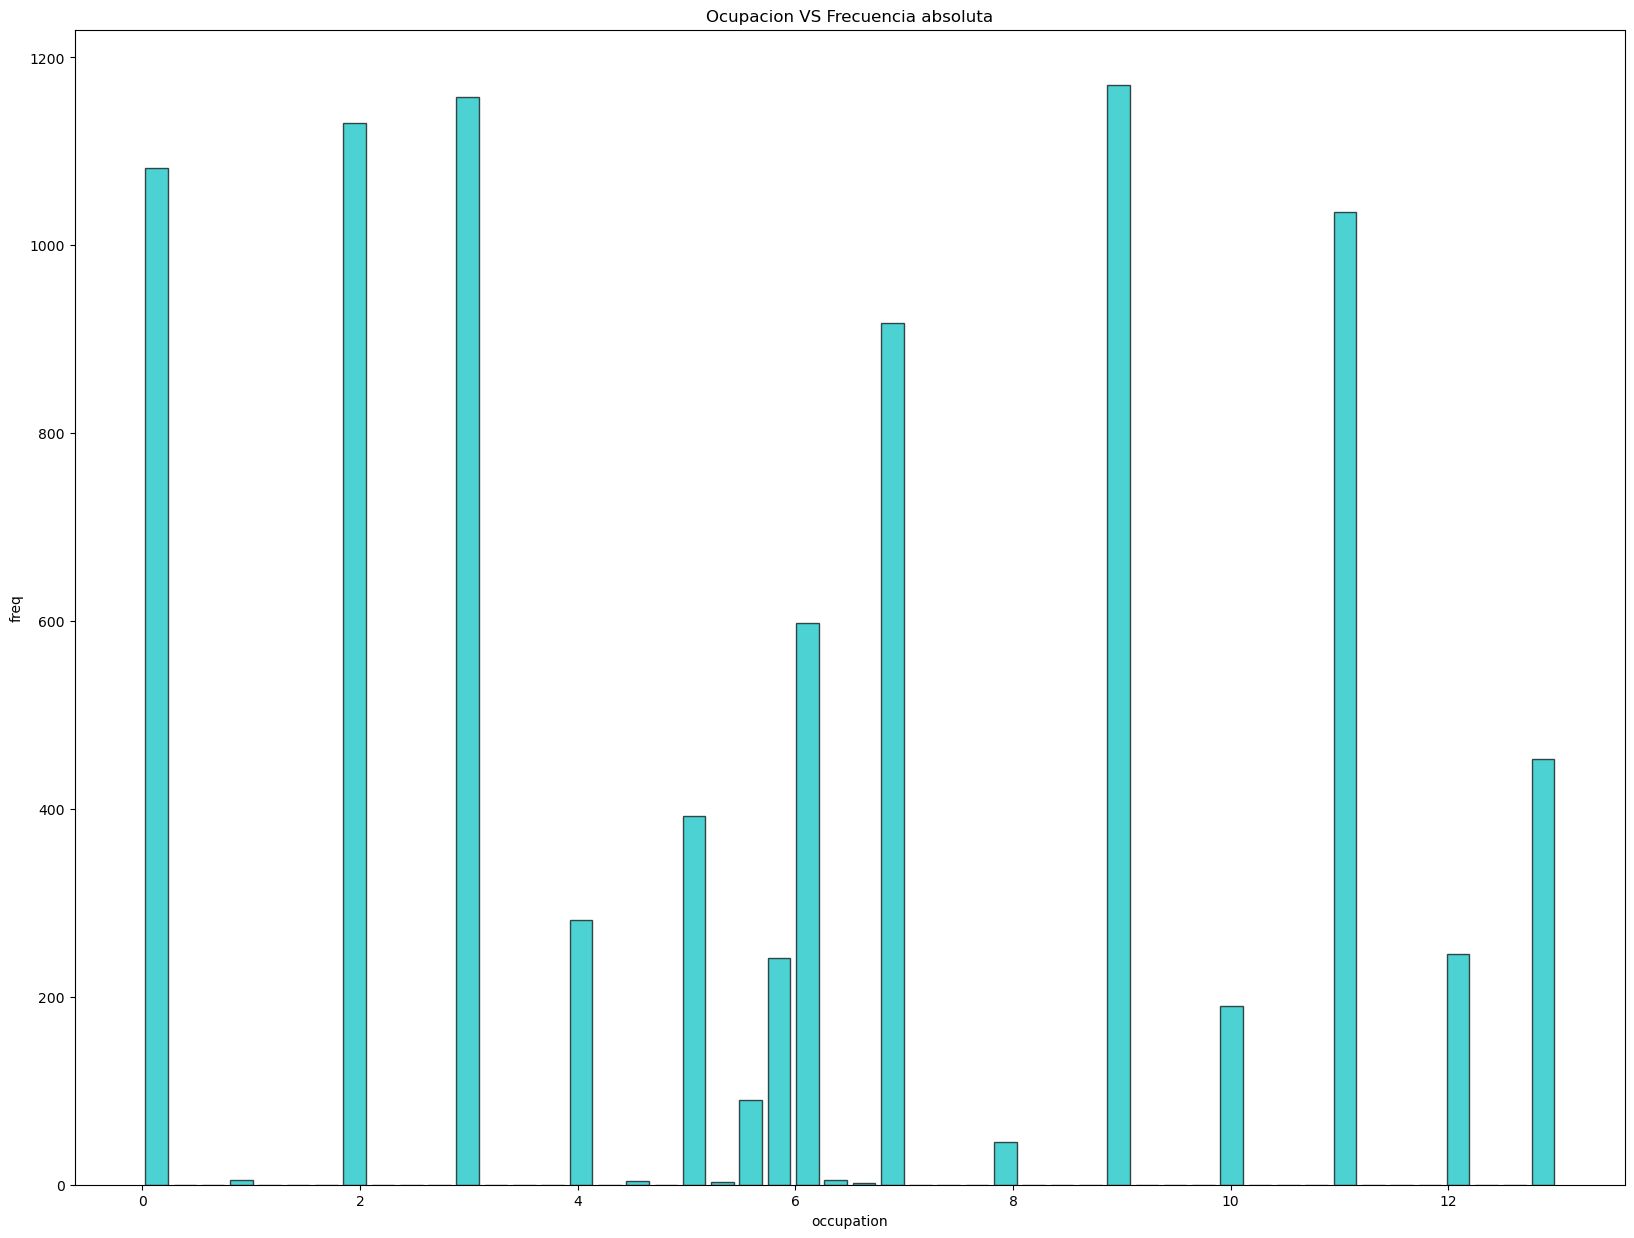

In [84]:
occupationIntK3_3 = censusTestImpK3["occupation"]

occupationMeanK3_3 = occupationIntK3_3.mean()
occupationModeK3_3 = occupationIntK3_3.mode()[0]
occupationQuantil1K3_3 = occupationIntK3_3.quantile(0.25)
occupationQuantil2K3_3 = occupationIntK3_3.quantile(0.50)
occupationQuantil3K3_3 = occupationIntK3_3.quantile(0.75)

print("Media: ", occupationMeanK3_3)
print("Moda: ", occupationModeK3_3)
print("Primer Cuartil: ", occupationQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", occupationQuantil2K3_3)
print("Tercer Cuartil: ", occupationQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["occupation"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ocupacion VS Frecuencia absoluta")
plt.xlabel("occupation")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "occupation"

*La ocupacion es un atributo de registros numericos que toman valores continuos entre 0 y 13, con media de 5.95 y mediana de 6.*



Media:  1.397256002344722
Moda:  0.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  3.0


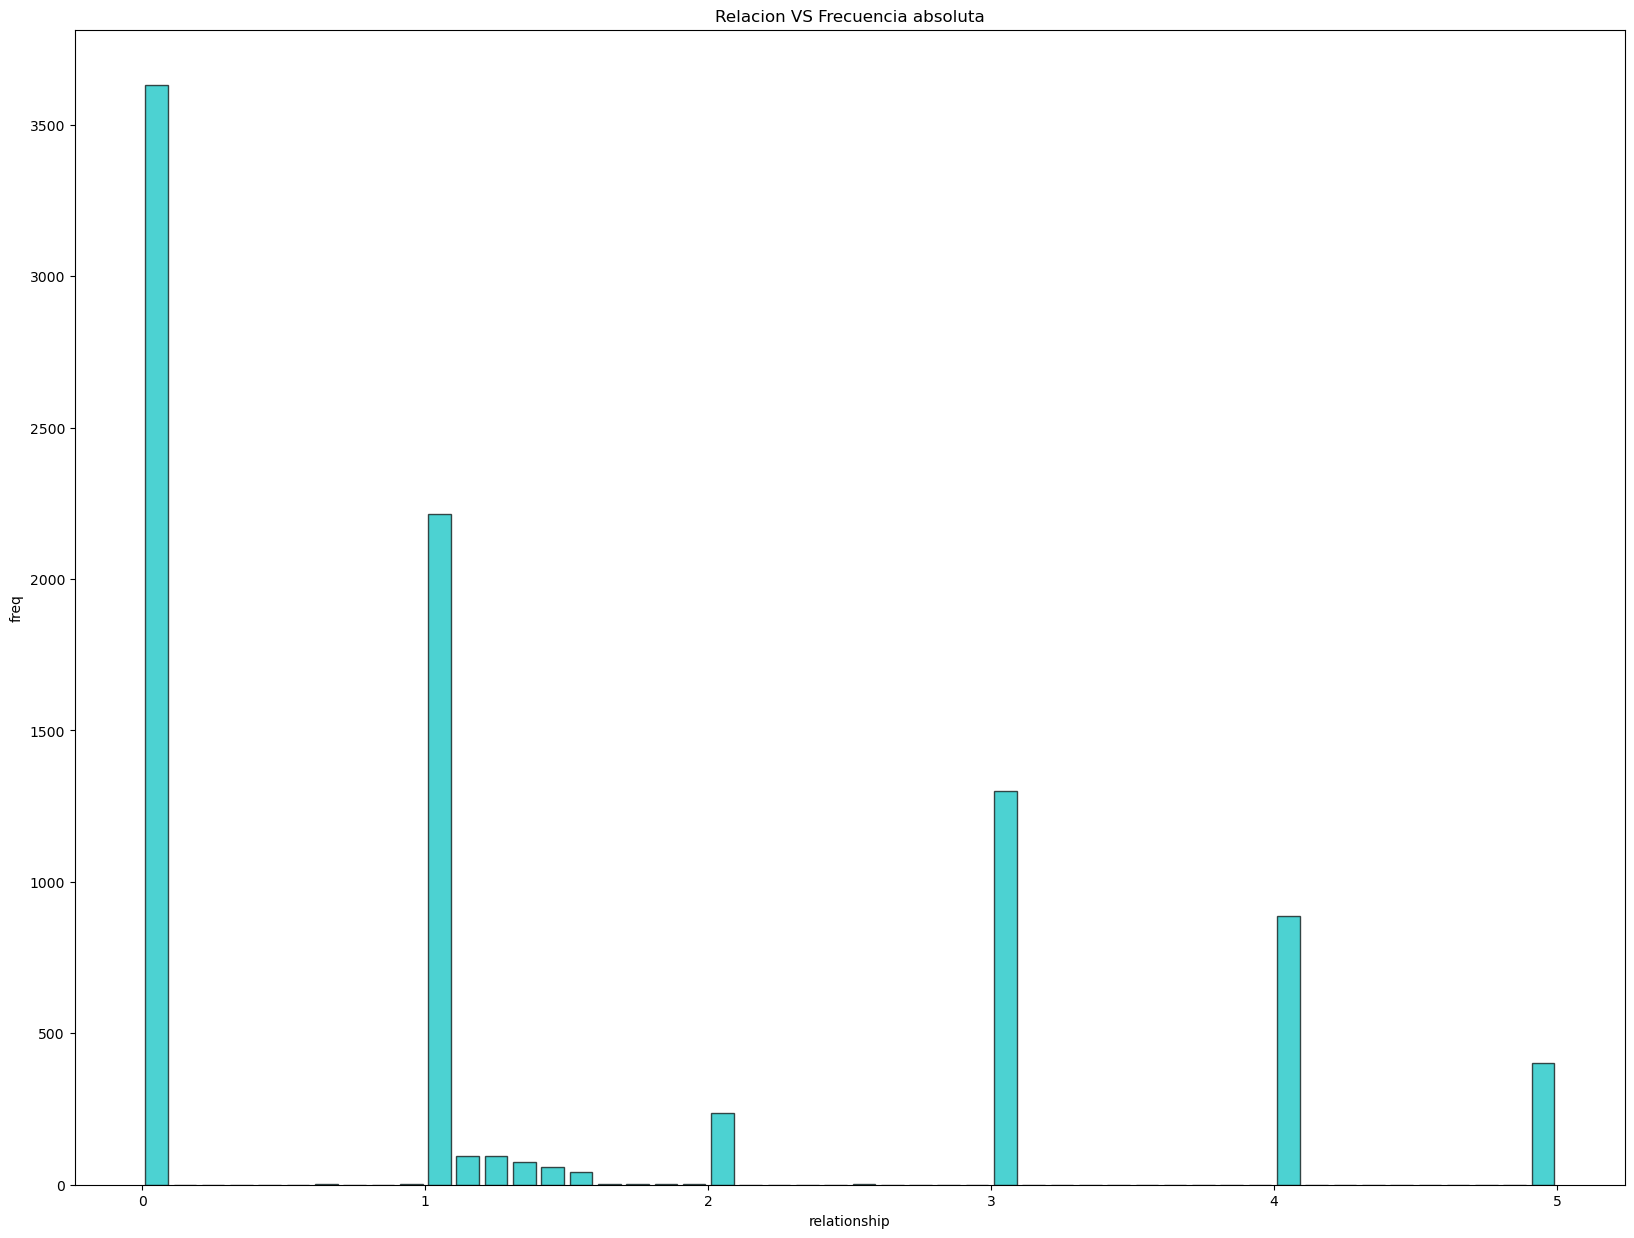

In [85]:
relationshipIntK3_3 = censusTestImpK3["relationship"]

relationshipMeanK3_3 = relationshipIntK3_3.mean()
relationshipModeK3_3 = relationshipIntK3_3.mode()[0]
relationshipQuantil1K3_3 = relationshipIntK3_3.quantile(0.25)
relationshipQuantil2K3_3 = relationshipIntK3_3.quantile(0.50)
relationshipQuantil3K3_3 = relationshipIntK3_3.quantile(0.75)

print("Media: ", relationshipMeanK3_3)
print("Moda: ", relationshipModeK3_3)
print("Primer Cuartil: ", relationshipQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", relationshipQuantil2K3_3)
print("Tercer Cuartil: ", relationshipQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["relationship"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Relacion VS Frecuencia absoluta")
plt.xlabel("relationship")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "relationship"

*La relacion es un atributo de registros numericos que toman valores continuos entre 0 y 5, con media de 1.39 y mediana de 1.*


Media:  3.6745102749763365
Moda:  4.0
Primer Cuartil:  4.0
Segundo Cuartil (Mediana):  4.0
Tercer Cuartil:  4.0


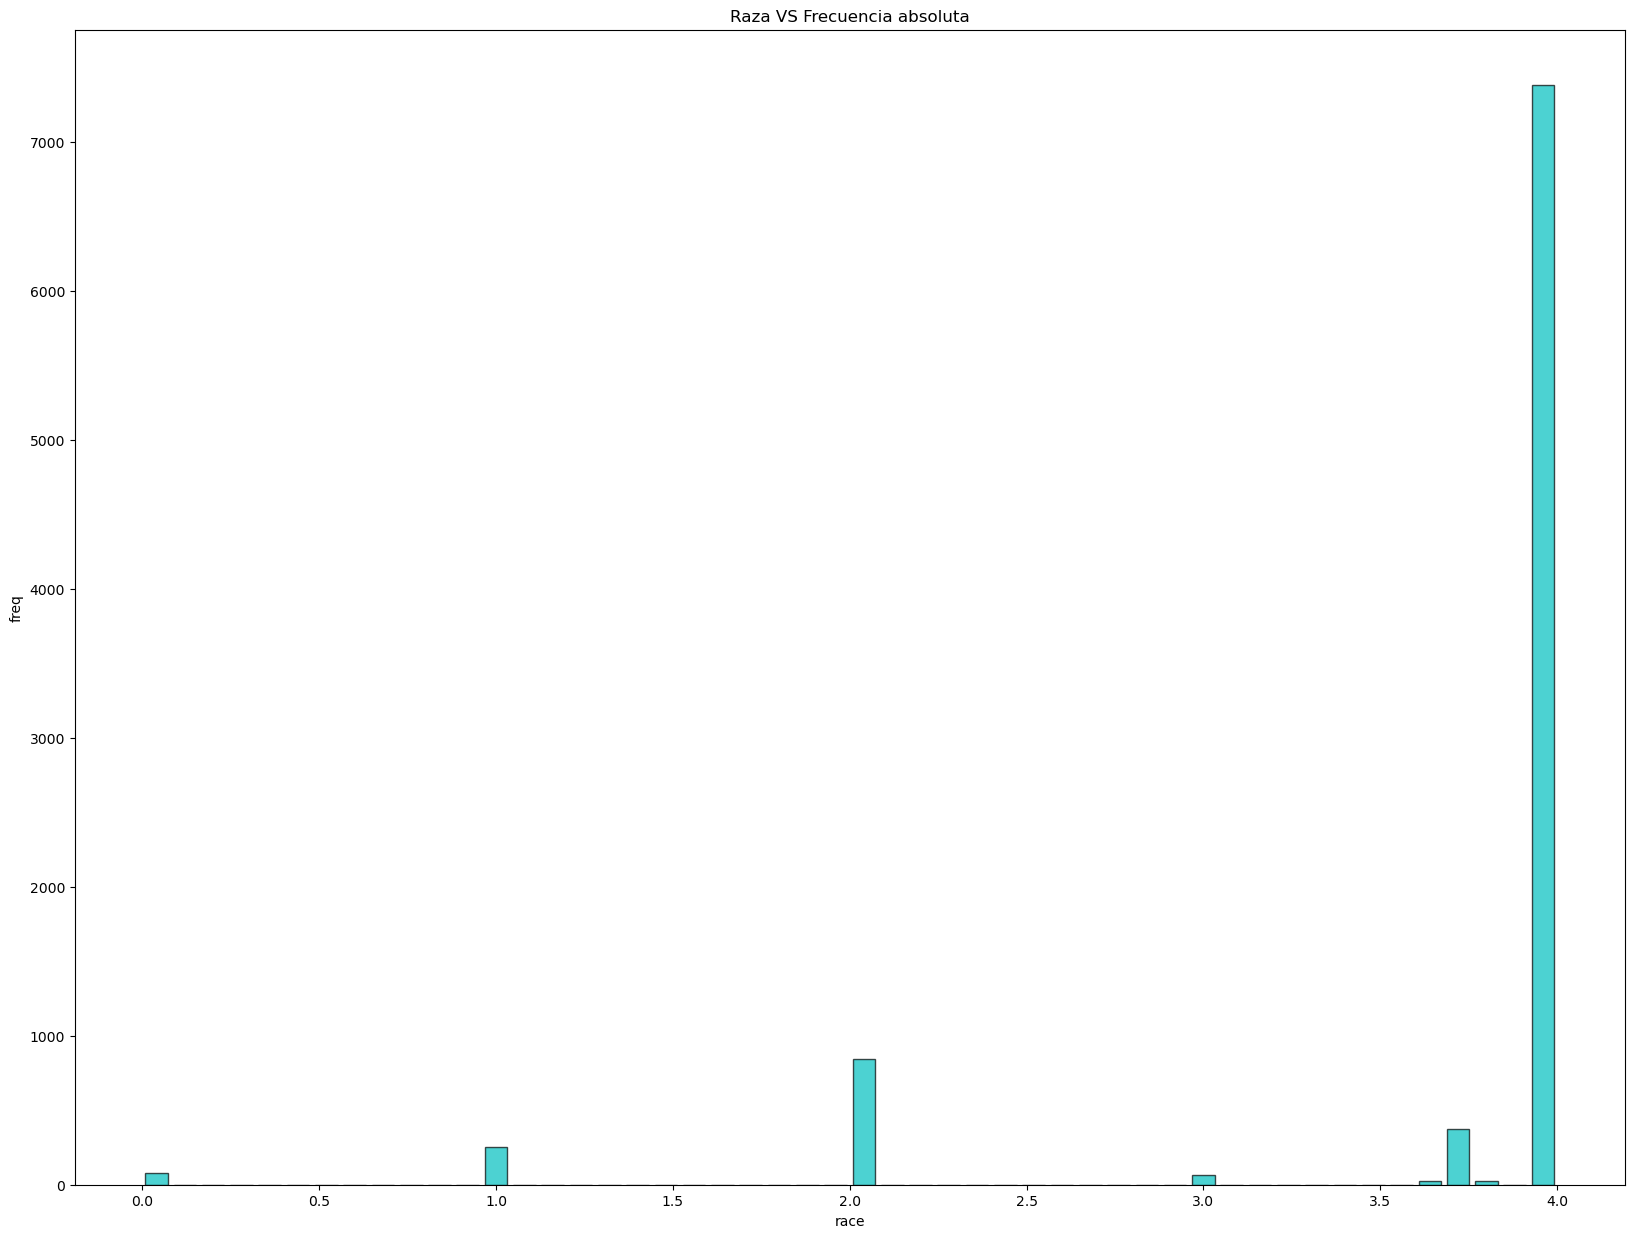

In [86]:
raceIntK3_3 = censusTestImpK3["race"]

raceMeanK3_3 = raceIntK3_3.mean()
raceModeK3_3 = raceIntK3_3.mode()[0]
raceQuantil1K3_3 = raceIntK3_3.quantile(0.25)
raceQuantil2K3_3 = raceIntK3_3.quantile(0.50)
raceQuantil3K3_3 = raceIntK3_3.quantile(0.75)

print("Media: ", raceMeanK3_3)
print("Moda: ", raceModeK3_3)
print("Primer Cuartil: ", raceQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", raceQuantil2K3_3)
print("Tercer Cuartil: ", raceQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["race"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Raza VS Frecuencia absoluta")
plt.xlabel("race")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "race"

*La raza es un atributo de registros numericos que toman valores continuos entre 0 y 4, con media de 3.67 y mediana de 4.*


Media:  0.6813464855592979
Moda:  1.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  1.0
Tercer Cuartil:  1.0


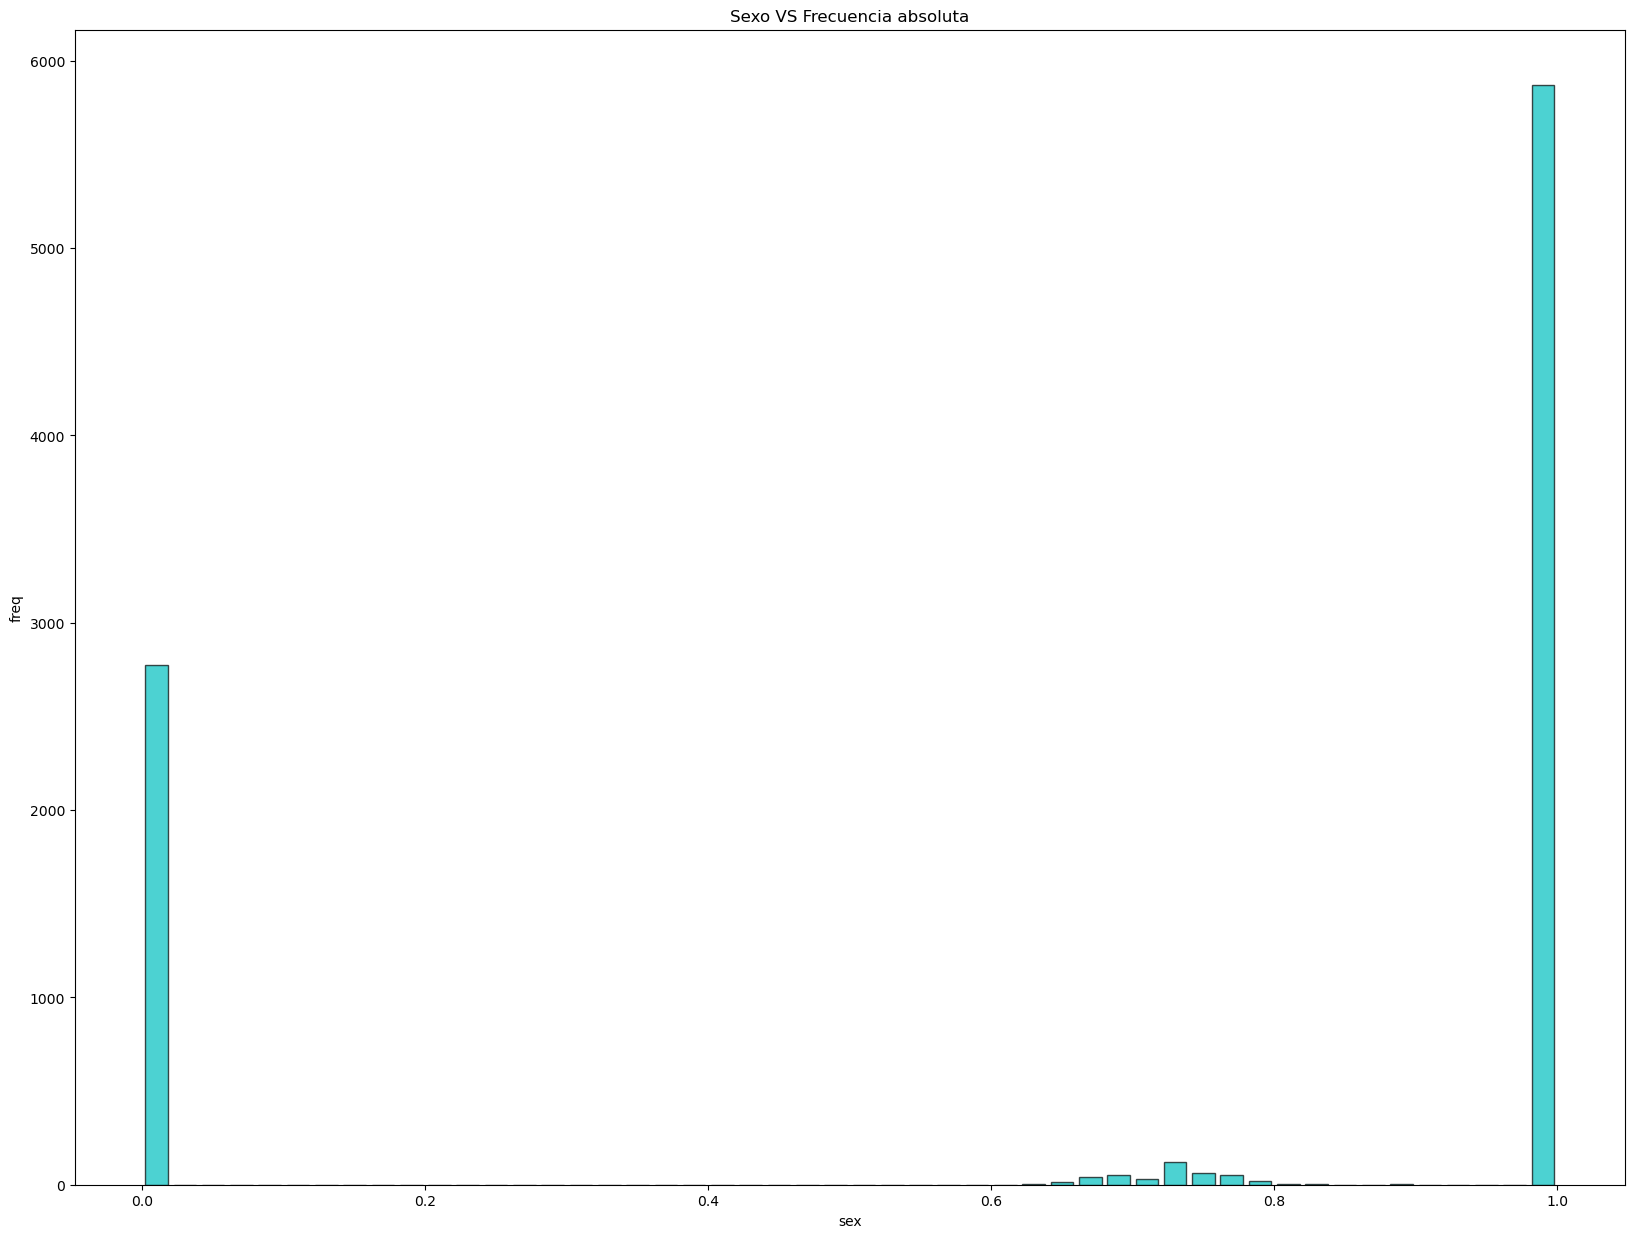

In [87]:
sexIntK3_3 = censusTestImpK3["sex"]

sexMeanK3_3 = sexIntK3_3.mean()
sexModeK3_3 = sexIntK3_3.mode()[0]
sexQuantil1K3_3 = sexIntK3_3.quantile(0.25)
sexQuantil2K3_3 = sexIntK3_3.quantile(0.50)
sexQuantil3K3_3 = sexIntK3_3.quantile(0.75)

print("Media: ", sexMeanK3_3)
print("Moda: ", sexModeK3_3)
print("Primer Cuartil: ", sexQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", sexQuantil2K3_3)
print("Tercer Cuartil: ", sexQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["sex"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Sexo VS Frecuencia absoluta")
plt.xlabel("sex")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "sex"

*El sexo es un atributo de registros numericos que toman valores continuos entre 0 y 1, con media de 0.68 y mediana de 1.*


Media:  989.6064475056096
Moda:  0.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  0.0
Tercer Cuartil:  0.0


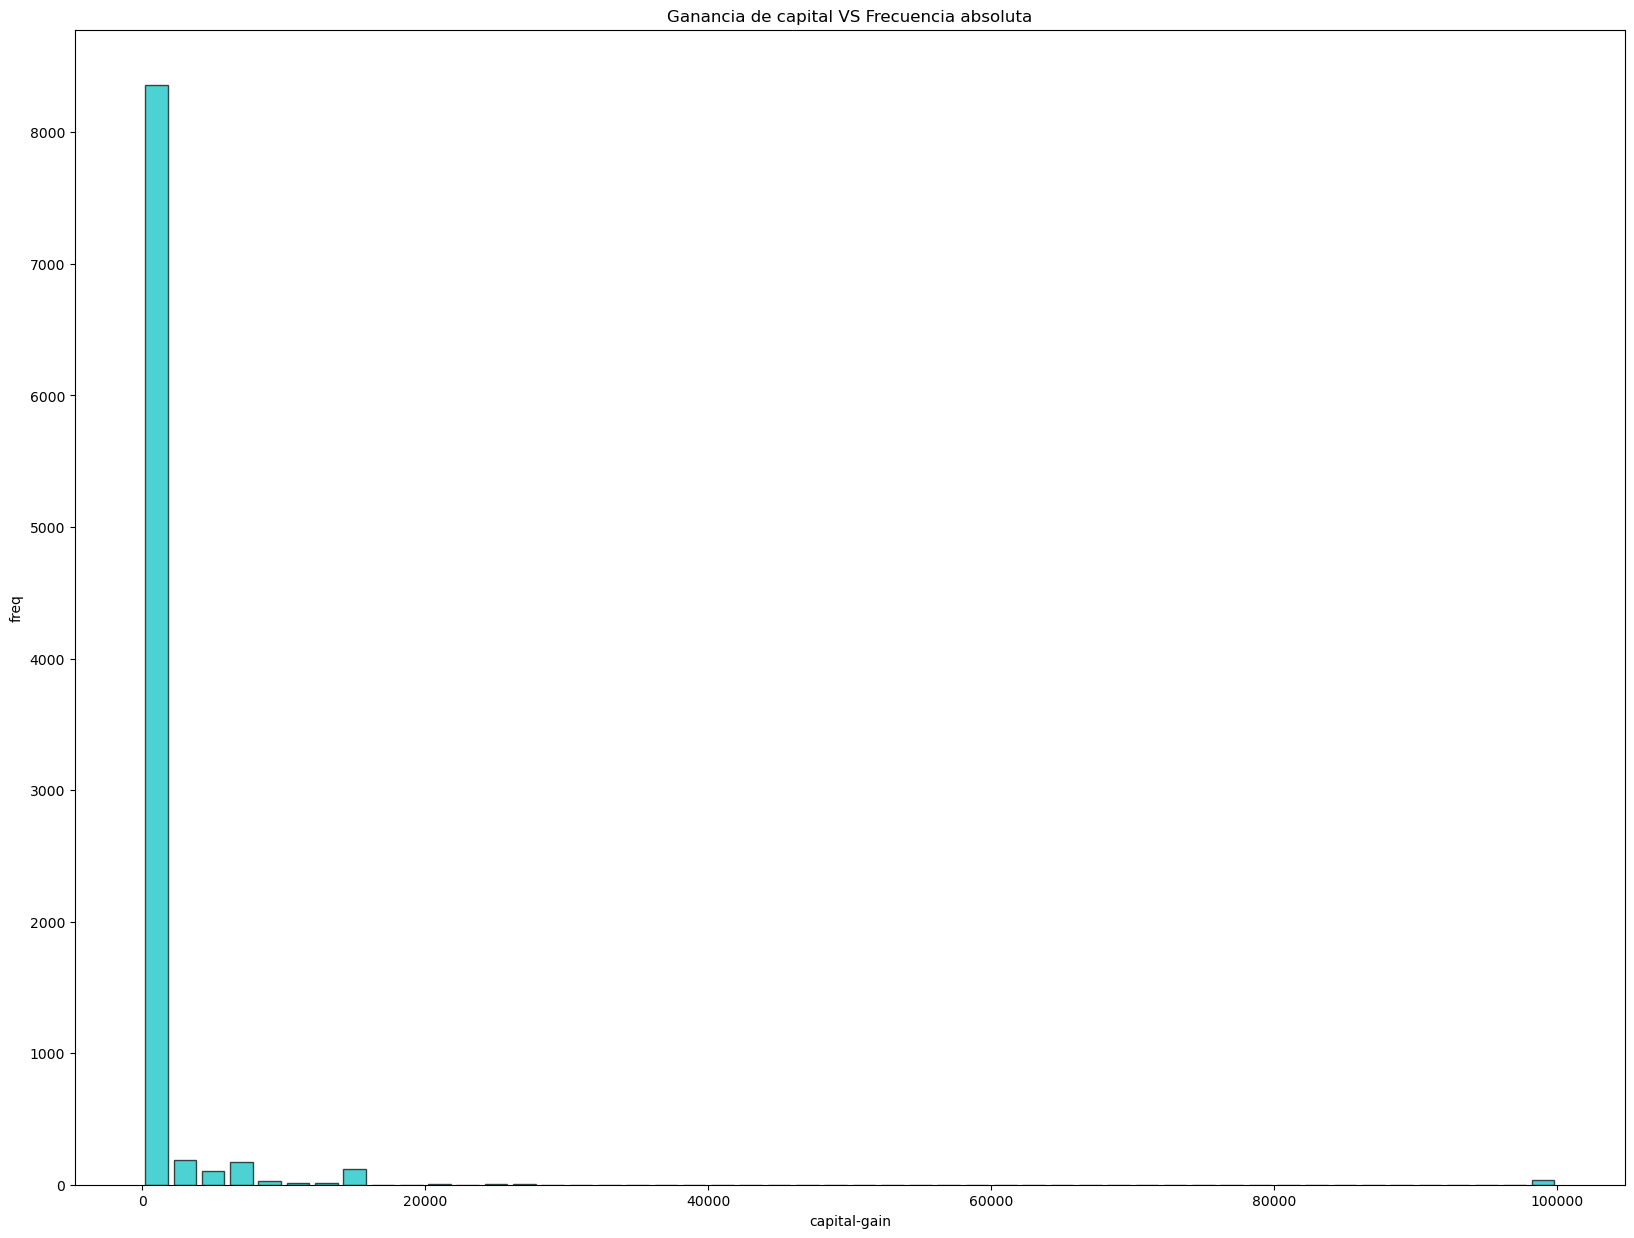

In [88]:
capital_gainIntK3_3 = censusTestImpK3["capital-gain"]

capital_gainMeanK3_3 = capital_gainIntK3_3.mean()
capital_gainModeK3_3 = capital_gainIntK3_3.mode()[0]
capital_gainQuantil1K3_3 = capital_gainIntK3_3.quantile(0.25)
capital_gainQuantil2K3_3 = capital_gainIntK3_3.quantile(0.50)
capital_gainQuantil3K3_3 = capital_gainIntK3_3.quantile(0.75)

print("Media: ", capital_gainMeanK3_3)
print("Moda: ", capital_gainModeK3_3)
print("Primer Cuartil: ", capital_gainQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", capital_gainQuantil2K3_3)
print("Tercer Cuartil: ", capital_gainQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["capital-gain"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Ganancia de capital VS Frecuencia absoluta")
plt.xlabel("capital-gain")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "capital-gain"

*La ganancia de capital es un atributo de registros numericos que toman valores continuos entre 0 y 99999, con media de 989.60 y mediana de 0.*


Media:  88.28183320760881
Moda:  0.0
Primer Cuartil:  0.0
Segundo Cuartil (Mediana):  0.0
Tercer Cuartil:  0.0


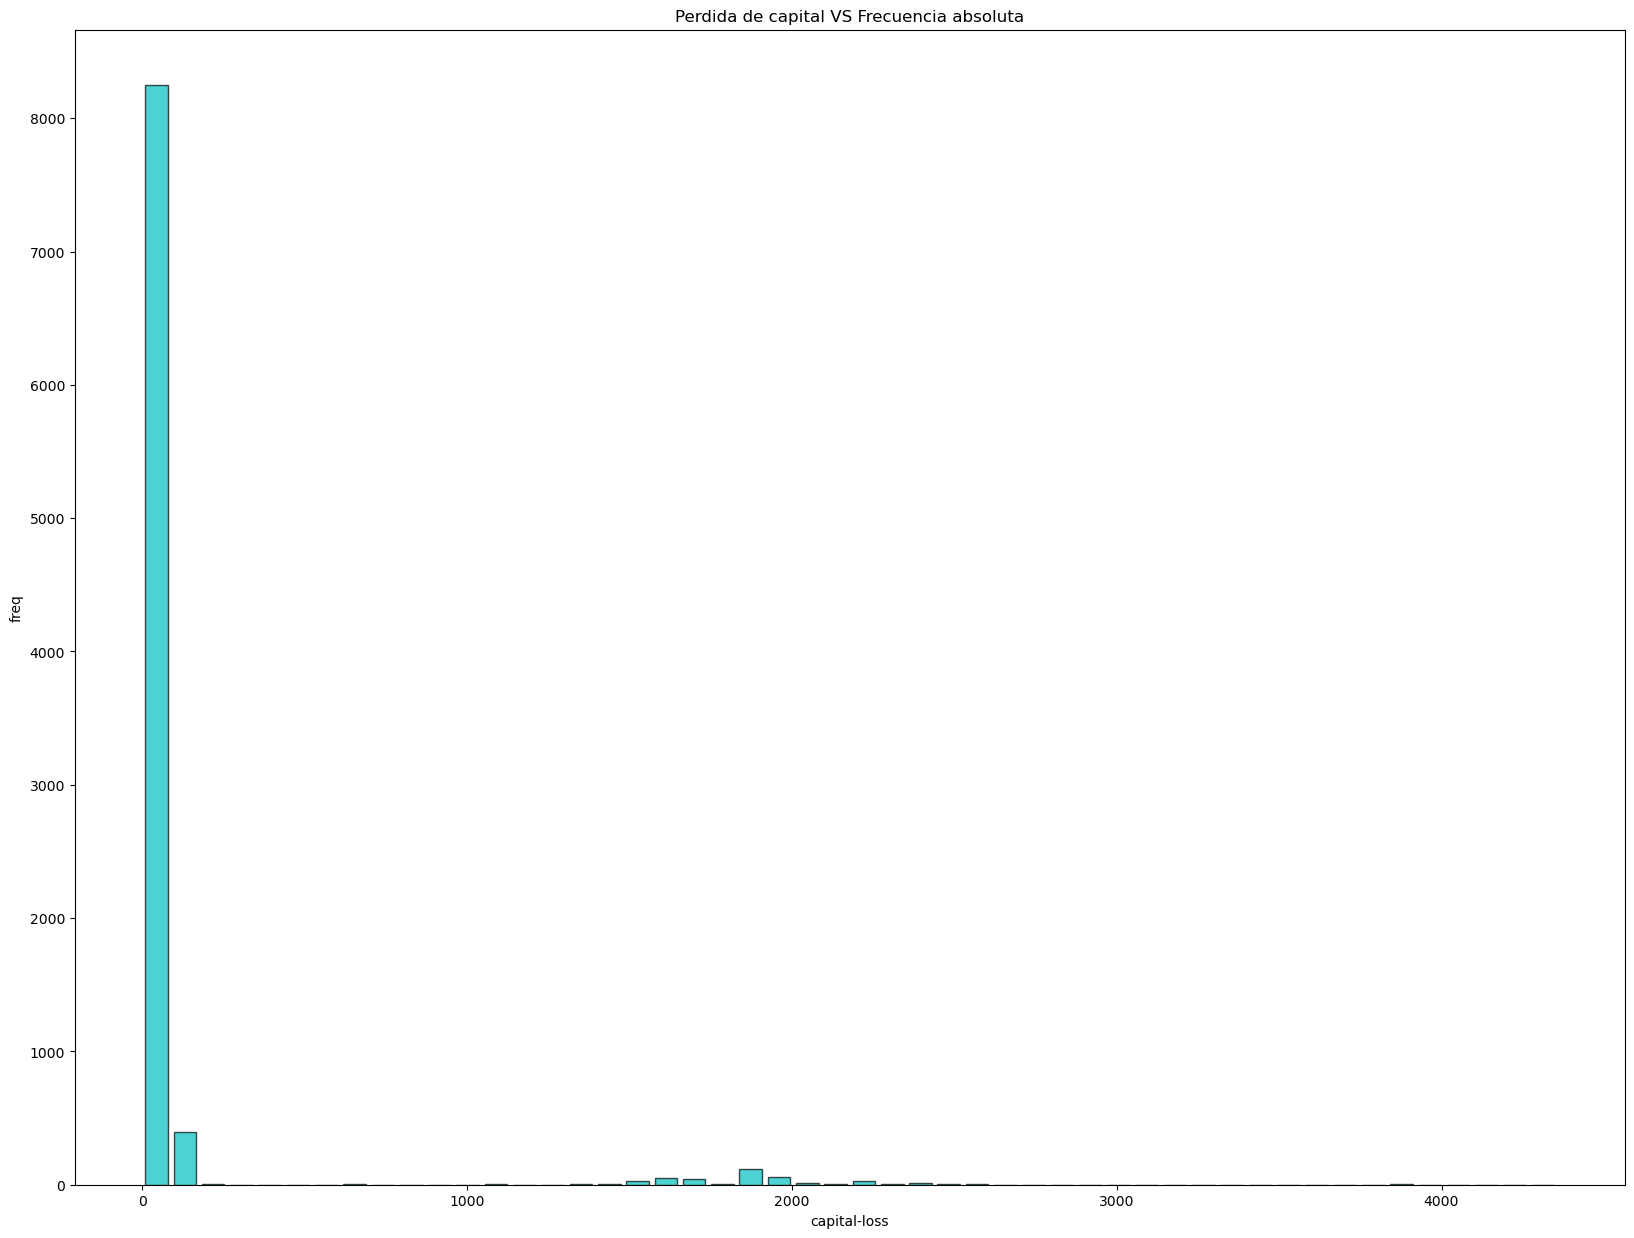

In [89]:
capital_lossIntK3_3 = censusTestImpK3["capital-loss"]

capital_lossMeanK3_3 = capital_lossIntK3_3.mean()
capital_lossModeK3_3 = capital_lossIntK3_3.mode()[0]
capital_lossQuantil1K3_3 = capital_lossIntK3_3.quantile(0.25)
capital_lossQuantil2K3_3 = capital_lossIntK3_3.quantile(0.50)
capital_lossQuantil3K3_3 = capital_lossIntK3_3.quantile(0.75)

print("Media: ", capital_lossMeanK3_3)
print("Moda: ", capital_lossModeK3_3)
print("Primer Cuartil: ", capital_lossQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", capital_lossQuantil2K3_3)
print("Tercer Cuartil: ", capital_lossQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["capital-loss"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Perdida de capital VS Frecuencia absoluta")
plt.xlabel("capital-loss")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "capital-loss"

*La perdida de capital es un atributo de registros numericos que toman valores continuos entre 0 y 3770, con media de 88.28 y mediana de 0.*


Media:  40.981625642035866
Moda:  40.0
Primer Cuartil:  40.0
Segundo Cuartil (Mediana):  40.0
Tercer Cuartil:  45.0


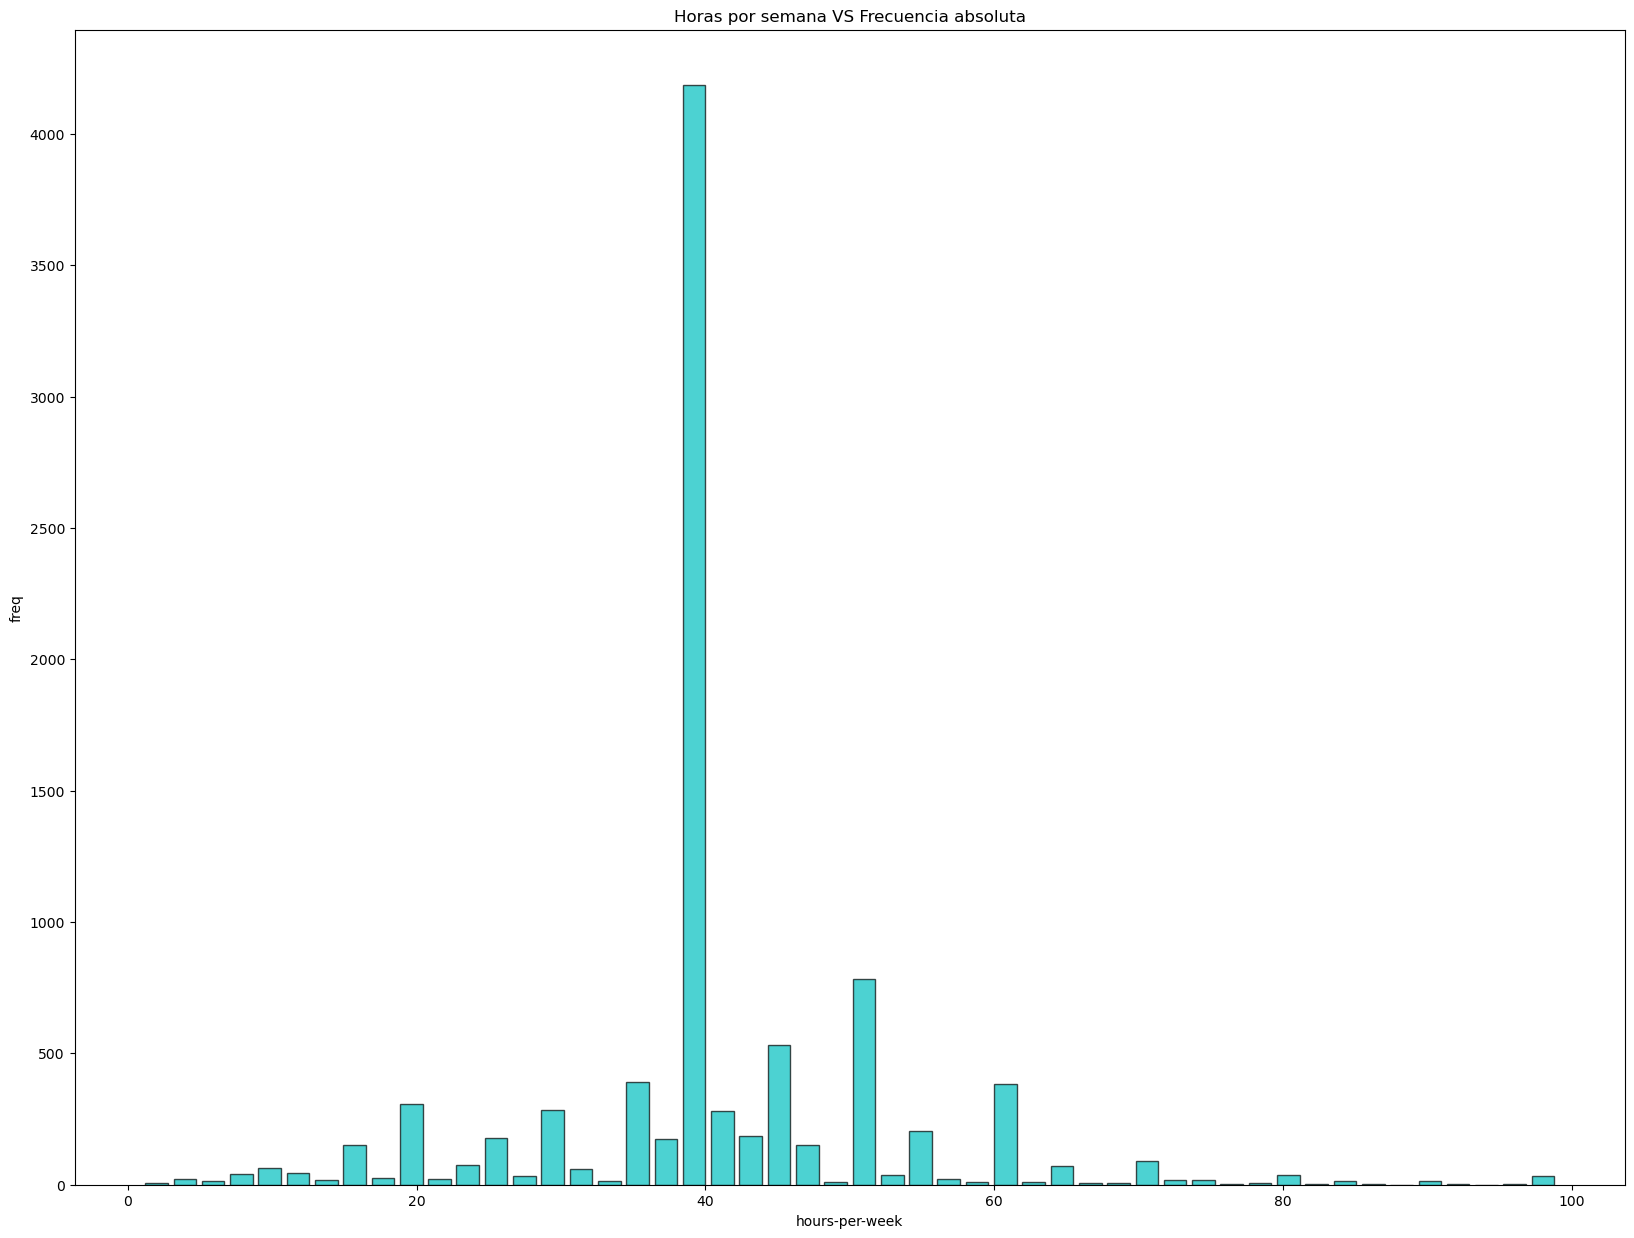

In [90]:
hours_per_weekIntK3_3 = censusTestImpK3["hours-per-week"]

hours_per_weekMeanK3_3 = hours_per_weekIntK3_3.mean()
hours_per_weekModeK3_3 = hours_per_weekIntK3_3.mode()[0]
hours_per_weekQuantil1K3_3 = hours_per_weekIntK3_3.quantile(0.25)
hours_per_weekQuantil2K3_3 = hours_per_weekIntK3_3.quantile(0.50)
hours_per_weekQuantil3K3_3 = hours_per_weekIntK3_3.quantile(0.75)

print("Media: ", hours_per_weekMeanK3_3)
print("Moda: ", hours_per_weekModeK3_3)
print("Primer Cuartil: ", hours_per_weekQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", hours_per_weekQuantil2K3_3)
print("Tercer Cuartil: ", hours_per_weekQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["hours-per-week"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Horas por semana VS Frecuencia absoluta")
plt.xlabel("hours-per-week")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "hours-per-week"

*Las horas semanales es un atributo de registros numericos que toman valores continuos entre 1 y 99, con media de 40.98 y mediana de 40.*


Media:  34.47043872251078
Moda:  36.0
Primer Cuartil:  36.0
Segundo Cuartil (Mediana):  36.0
Tercer Cuartil:  36.0


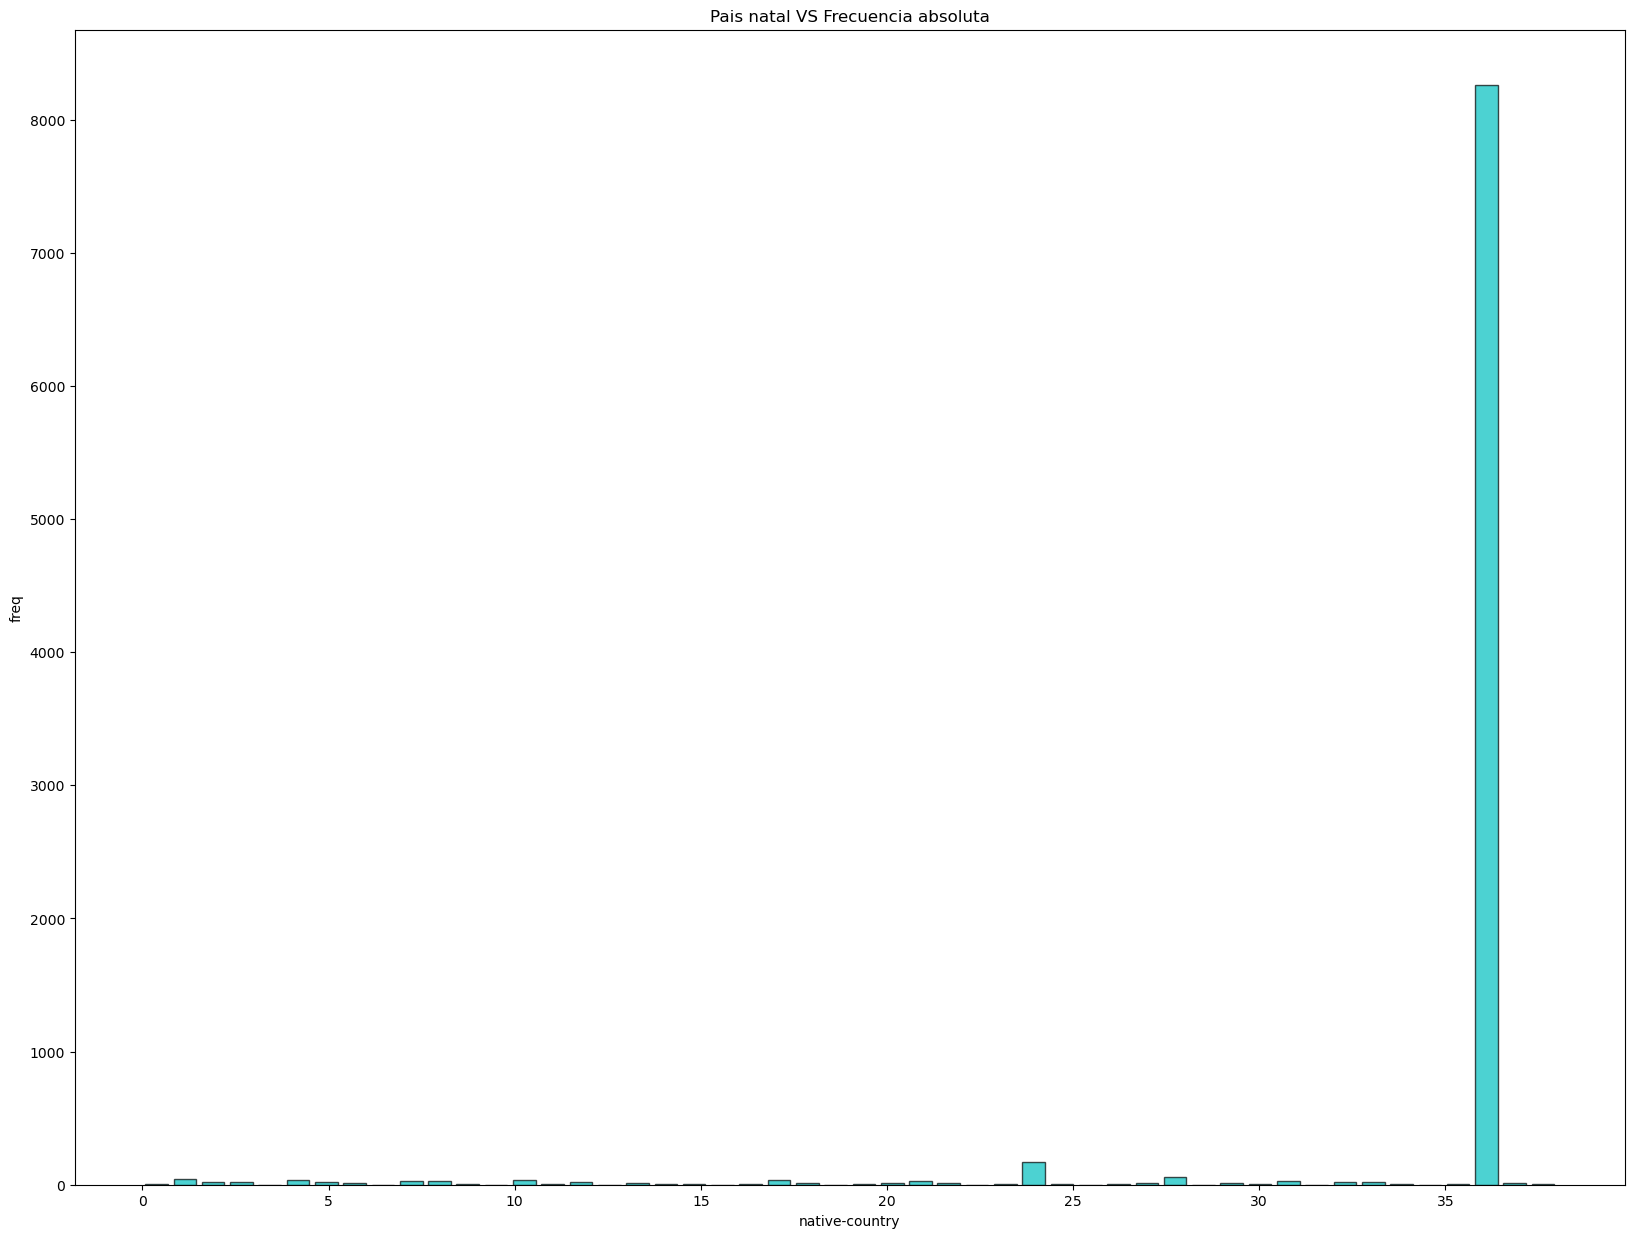

In [91]:
native_countryIntK3_3 = censusTestImpK3["native-country"]

native_countryMeanK3_3 = native_countryIntK3_3.mean()
native_countryModeK3_3 = native_countryIntK3_3.mode()[0]
native_countryQuantil1K3_3 = native_countryIntK3_3.quantile(0.25)
native_countryQuantil2K3_3 = native_countryIntK3_3.quantile(0.50)
native_countryQuantil3K3_3 = native_countryIntK3_3.quantile(0.75)

print("Media: ", native_countryMeanK3_3)
print("Moda: ", native_countryModeK3_3)
print("Primer Cuartil: ", native_countryQuantil1K3_3)
print("Segundo Cuartil (Mediana): ", native_countryQuantil2K3_3)
print("Tercer Cuartil: ", native_countryQuantil3K3_3)

plt.figure(figsize=(20, 15))
censusTestImpK3["native-country"].plot(kind="hist", bins=50, rwidth=0.8, color="c", edgecolor="black", alpha=0.7)
plt.title("Pais natal VS Frecuencia absoluta")
plt.xlabel("native-country")
plt.ylabel("freq")
plt.show()

##### Resumen de la informacion del atributo "native-country"

*El pais natal es un atributo de registros numericos que toman valores continuos entre 0 y 40, con media de 34.47 y mediana de 36.*


## Reduccion de dimensionalidad ("education-num" y "native-country")

### Generalidades

- Reducir el tamaño del dataset preservando el comportamiento de los datos y su integridad.

- Determinar que datos se deben utilizar para el analisis.

- Cuando existan atributos redundantes (su informacion se encuentra en otra variable) o irrelevantes (dan poca informacion).

### Proceso

*Existen variables redundantes e irrelevantes; "education-num" representa la informacion contenida en el atributo "education"; "native-country" no es relevante ya que, por el estudio y comprension de los datos (hecho anteriormente), el origen del dataset corresponde a un censo realizado a la poblacion civil en Estados Unidos por lo que la gran mayoria de los registros son de personas nativas de ese pais.*

#### censusDim - Dataset de entrenamiento (NA_fullTrain)

In [92]:
censusDim = censusImpK3.copy()

In [93]:
censusDim

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,15977,44.0,2.0,222978.000000,11.0,9.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0,38.0,low
1,13574,32.0,2.0,83253.000000,15.0,10.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0,38.0,low
2,23210,30.0,1.0,327825.000000,11.0,9.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0,38.0,low
3,9284,23.0,2.0,109952.000000,15.0,10.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0,38.0,low
4,8841,54.0,1.0,204325.000000,15.0,10.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0,38.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.000000,10.0,16.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0,38.0,low
21109,21206,50.0,2.0,158680.000000,12.0,14.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0,38.0,high
21110,10646,50.0,2.0,72351.000000,9.0,13.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0,38.0,low
21111,11687,49.0,4.0,178986.147826,9.0,13.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0,38.0,high


In [94]:
censusDim.shape

(21113, 16)

In [95]:
censusDim.drop(["education-num", "native-country"], axis=1, inplace=True)


In [96]:
features = ["age", "workclass", "fnlwgt", "education", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week"]


In [97]:
censusDim

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,15977,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0,low
1,13574,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0,low
2,23210,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0,low
3,9284,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0,low
4,8841,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0,low
21109,21206,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0,high
21110,10646,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0,low
21111,11687,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0,high


In [98]:
censusDim.shape

(21113, 14)

#### censusDimTest - Dataset de prueba (NA_fullTest)

In [99]:
censusDimTest = censusTestImpK3.copy()

In [100]:
censusDimTest

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,2135,44.0,2.000000,81853.000000,11.0,9.000000,4.0,11.000000,1.0,1.0,0.0,0.0,0.000000,40.0,36.0
1,15639,21.0,2.230435,306114.000000,15.0,10.000000,4.0,0.000000,3.0,4.0,1.0,0.0,95.443478,20.0,36.0
2,29059,36.0,2.000000,186110.000000,15.0,10.000000,2.0,13.000000,0.0,4.0,1.0,0.0,0.000000,40.0,36.0
3,27523,30.0,4.000000,180357.395652,8.0,11.000000,0.0,2.000000,1.0,4.0,1.0,0.0,0.000000,49.0,36.0
4,9280,42.0,2.300000,133584.000000,15.0,10.000000,2.0,2.000000,0.0,4.0,1.0,0.0,0.000000,40.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,16826,27.0,2.000000,218785.000000,11.0,9.000000,2.0,3.000000,5.0,4.0,0.0,0.0,0.000000,40.0,36.0
9045,25246,54.0,4.000000,36327.000000,5.0,4.000000,2.0,6.000000,0.0,4.0,1.0,0.0,0.000000,50.0,36.0
9046,18980,53.0,2.000000,149650.000000,11.0,9.000000,4.0,5.852174,1.0,4.0,1.0,0.0,2559.000000,48.0,36.0
9047,953,18.0,2.000000,177722.000000,11.0,9.665217,4.0,7.000000,3.0,4.0,0.0,0.0,0.000000,20.0,36.0


In [101]:
censusDimTest.shape

(9049, 15)

In [102]:
censusDimTest.drop(["education-num", "native-country"], axis=1, inplace=True)


In [103]:
censusDim

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,15977,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0,low
1,13574,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0,low
2,23210,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0,low
3,9284,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0,low
4,8841,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0,low
21109,21206,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0,high
21110,10646,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0,low
21111,11687,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0,high


In [104]:
censusDimTest.shape

(9049, 13)

# Modelado

*Saber el tipo de analisis que hay que realizar y modelarlo, por medio de tareas de modelado de Data Mining y Machine Learning.*

In [105]:
censusDim.groupby("income").size()

income
high     5223
low     15890
dtype: int64

F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

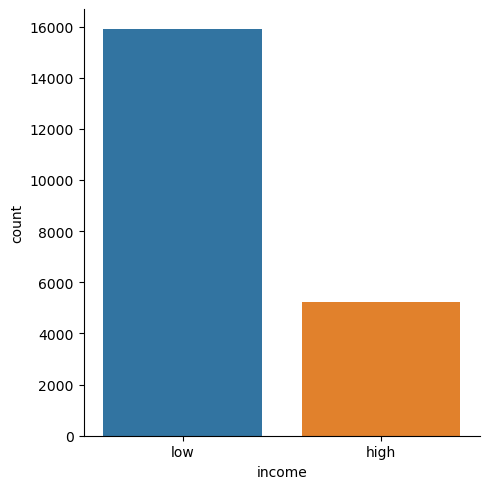

In [106]:
sns.catplot(x="income", data=censusDim, kind="count")

## Random Forest (RF)

*Delegar la decision a partir de lo que predigan variedad de n arboles de decision sobre el mismo dataset.*

### censusDim - Dataset de entrenamiento (NA_fullTrain)

#### Selección de características

*Dividir caracteristicas y atributo de clase (objetivo).*

In [107]:
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [108]:
X = censusDim[features] # Del dataset extrae los atributos exceptuando la clase
y = censusDim["income"] # Del dataset extrae la clase de cada registro

In [109]:
X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0
1,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0
2,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0
3,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0
4,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21108,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0
21109,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0
21110,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0
21111,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0


In [110]:
y

0         low
1         low
2         low
3         low
4         low
         ... 
21108     low
21109    high
21110     low
21111    high
21112     low
Name: income, Length: 21113, dtype: object

#### Division de datos (dividir el conjunto de datos sin clase y variable objetivo)

*Dividir el dataset original en conjunto de entrenamiento (train set), 70%, y conjunto de prueba (test set), 30%.*

In [111]:
# X: Conjunto de atributos, Y: Conjunto de clases
# RandomState = 1, permite que los conjuntos sean, inicialmente aleatorios pero luego se mantengan fijos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Crear el primer clasificador - Random Forest 1

*Crear objeto clasificador de bosque aleatorio*

*Entrenar el clasificador del bosque aleatorio*

##### Un modelo de RF utilizando características y variables objetivo con 100 árboles

In [112]:
X_train

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
13066,65.0,4.000000,145628.0,0.0,2.23913,2.000000,0.0,4.0,1.0,0.0,0.000000,40.0
7933,30.0,2.200000,77266.0,11.0,0.00000,13.000000,1.0,4.0,1.0,0.0,0.000000,55.0
15716,50.0,2.000000,100109.0,9.0,0.00000,3.000000,4.0,4.0,1.0,0.0,0.000000,45.0
13688,21.0,2.000000,219086.0,11.0,4.00000,7.000000,3.0,4.0,1.0,0.0,0.000000,35.0
2456,47.0,1.000000,109705.0,11.0,2.06087,3.000000,1.0,4.0,0.0,0.0,0.000000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,35.0,2.000000,213208.0,8.0,2.00000,12.000000,0.0,2.0,1.0,0.0,0.000000,38.0
17289,37.0,4.000000,82540.0,6.0,2.00000,13.000000,0.0,4.0,1.0,0.0,0.000000,70.0
5192,24.0,2.000000,228960.0,7.0,4.00000,0.000000,3.0,4.0,0.0,0.0,0.000000,40.0
12172,20.0,2.134783,68358.0,15.0,4.00000,0.000000,3.0,4.0,0.0,0.0,57.004348,12.0


In [113]:
y_train

13066     low
7933      low
15716    high
13688     low
2456      low
         ... 
10955     low
17289    high
5192      low
12172     low
235       low
Name: income, Length: 14779, dtype: object

In [114]:
clfRf_1 = RandomForestClassifier(max_depth=12, n_estimators=100, max_features="log2", random_state=33, criterion="gini").fit(X_train, y_train)
# Aqui el bosque YA esta entrenado

In [115]:
X_test

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
4423,33.0,2.0,113364.0,11.0,0.0,0.0,3.0,4.000000,1.0,0.0,126.869565,40.0
12884,23.0,2.0,217961.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.000000,15.0
6141,28.0,2.0,153475.0,9.0,4.0,0.0,3.0,3.486957,0.0,0.0,0.000000,16.0
3289,22.0,2.0,137862.0,15.0,4.0,0.0,2.0,4.000000,0.0,0.0,0.000000,16.0
20103,54.0,4.0,199741.0,11.0,6.0,2.0,1.0,4.000000,1.0,0.0,61.226087,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,23.0,2.0,113601.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.000000,30.0
10871,56.0,4.0,51662.0,1.0,2.0,7.0,5.0,4.000000,0.0,0.0,0.000000,40.0
5525,32.0,2.0,353994.0,9.0,2.0,3.0,2.0,1.000000,0.0,0.0,0.000000,40.0
9018,33.0,2.0,178506.0,11.0,0.0,0.0,1.0,2.000000,0.0,0.0,0.000000,40.0


##### Clasificar con el RF - Predecir nuevos valores según el modelo ajustado

*Predecir la respuesta para el conjunto de datos de prueba*

In [116]:
y_predRf_1 = clfRf_1.predict(X_test)

In [117]:
y_predRf_1

array(['low', 'low', 'low', ..., 'low', 'low', 'high'], dtype=object)

In [118]:
y_test

4423      low
12884     low
6141      low
3289      low
20103     low
         ... 
3187      low
10871     low
5525     high
9018      low
4220     high
Name: income, Length: 6334, dtype: object

#### Crear el segundo clasificador -  Random Forest 2

*Crear objeto clasificador de bosque aleatorio*

*Entrenar el clasificador del bosque aleatorio*

##### Un modelo de RF utilizando características y variables objetivo con 14 árboles

In [119]:
X_train

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
13066,65.0,4.000000,145628.0,0.0,2.23913,2.000000,0.0,4.0,1.0,0.0,0.000000,40.0
7933,30.0,2.200000,77266.0,11.0,0.00000,13.000000,1.0,4.0,1.0,0.0,0.000000,55.0
15716,50.0,2.000000,100109.0,9.0,0.00000,3.000000,4.0,4.0,1.0,0.0,0.000000,45.0
13688,21.0,2.000000,219086.0,11.0,4.00000,7.000000,3.0,4.0,1.0,0.0,0.000000,35.0
2456,47.0,1.000000,109705.0,11.0,2.06087,3.000000,1.0,4.0,0.0,0.0,0.000000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,35.0,2.000000,213208.0,8.0,2.00000,12.000000,0.0,2.0,1.0,0.0,0.000000,38.0
17289,37.0,4.000000,82540.0,6.0,2.00000,13.000000,0.0,4.0,1.0,0.0,0.000000,70.0
5192,24.0,2.000000,228960.0,7.0,4.00000,0.000000,3.0,4.0,0.0,0.0,0.000000,40.0
12172,20.0,2.134783,68358.0,15.0,4.00000,0.000000,3.0,4.0,0.0,0.0,57.004348,12.0


In [120]:
y_train

13066     low
7933      low
15716    high
13688     low
2456      low
         ... 
10955     low
17289    high
5192      low
12172     low
235       low
Name: income, Length: 14779, dtype: object

In [121]:
clfRf_2 = RandomForestClassifier(max_depth=11, n_estimators=14, max_features=5, random_state=33, criterion="gini").fit(X_train, y_train)

In [122]:
X_test

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
4423,33.0,2.0,113364.0,11.0,0.0,0.0,3.0,4.000000,1.0,0.0,126.869565,40.0
12884,23.0,2.0,217961.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.000000,15.0
6141,28.0,2.0,153475.0,9.0,4.0,0.0,3.0,3.486957,0.0,0.0,0.000000,16.0
3289,22.0,2.0,137862.0,15.0,4.0,0.0,2.0,4.000000,0.0,0.0,0.000000,16.0
20103,54.0,4.0,199741.0,11.0,6.0,2.0,1.0,4.000000,1.0,0.0,61.226087,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,23.0,2.0,113601.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.000000,30.0
10871,56.0,4.0,51662.0,1.0,2.0,7.0,5.0,4.000000,0.0,0.0,0.000000,40.0
5525,32.0,2.0,353994.0,9.0,2.0,3.0,2.0,1.000000,0.0,0.0,0.000000,40.0
9018,33.0,2.0,178506.0,11.0,0.0,0.0,1.0,2.000000,0.0,0.0,0.000000,40.0


##### Clasificar con el RF - Predecir nuevos valores según el modelo ajustado

*Predecir la respuesta para el conjunto de datos de prueba*

In [123]:
y_predRf_2 = clfRf_2.predict(X_test)

In [124]:
y_predRf_2

array(['low', 'low', 'low', ..., 'low', 'low', 'high'], dtype=object)

In [125]:
y_test

4423      low
12884     low
6141      low
3289      low
20103     low
         ... 
3187      low
10871     low
5525     high
9018      low
4220     high
Name: income, Length: 6334, dtype: object

### censusDimTest - Dataset de prueba (NA_fullTest)

#### Selección de características

*Dividir caracteristicas y atributo de clase (objetivo) del dataset de entrenamiento "censusDim" (NA_fullTrain).*

In [126]:
X_train2 = X
X_train2

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0
1,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0
2,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0
3,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0
4,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21108,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0
21109,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0
21110,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0
21111,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0


In [127]:
y_train2 = y
y_train2

0         low
1         low
2         low
3         low
4         low
         ... 
21108     low
21109    high
21110     low
21111    high
21112     low
Name: income, Length: 21113, dtype: object

#### Dataset de entrenamiento (NA_fullTrain) y dataset de prueba (NA_fullTest)

*Tomar "censusDim" como el 100% del conjunto de entrenamiento y "censusDimTest" como el 100% del conjunto de prueba.*

In [128]:
censusDim

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,15977,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0,low
1,13574,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0,low
2,23210,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0,low
3,9284,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0,low
4,8841,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0,low
21109,21206,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0,high
21110,10646,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0,low
21111,11687,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0,high


In [129]:
censusDimTest

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,2135,44.0,2.000000,81853.000000,11.0,4.0,11.000000,1.0,1.0,0.0,0.0,0.000000,40.0
1,15639,21.0,2.230435,306114.000000,15.0,4.0,0.000000,3.0,4.0,1.0,0.0,95.443478,20.0
2,29059,36.0,2.000000,186110.000000,15.0,2.0,13.000000,0.0,4.0,1.0,0.0,0.000000,40.0
3,27523,30.0,4.000000,180357.395652,8.0,0.0,2.000000,1.0,4.0,1.0,0.0,0.000000,49.0
4,9280,42.0,2.300000,133584.000000,15.0,2.0,2.000000,0.0,4.0,1.0,0.0,0.000000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,16826,27.0,2.000000,218785.000000,11.0,2.0,3.000000,5.0,4.0,0.0,0.0,0.000000,40.0
9045,25246,54.0,4.000000,36327.000000,5.0,2.0,6.000000,0.0,4.0,1.0,0.0,0.000000,50.0
9046,18980,53.0,2.000000,149650.000000,11.0,4.0,5.852174,1.0,4.0,1.0,0.0,2559.000000,48.0
9047,953,18.0,2.000000,177722.000000,11.0,4.0,7.000000,3.0,4.0,0.0,0.0,0.000000,20.0


#### Crear el clasificador (Random Forest)

*Crear objeto clasificador de bosque aleatorio*

*Entrenar el clasificador del bosque aleatorio*

##### Modelo de RF utilizando características y variables objetivo con 100 árboles

In [130]:
X_train2

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0
1,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0
2,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0
3,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0
4,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21108,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0
21109,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0
21110,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0
21111,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0


In [131]:
y_train2

0         low
1         low
2         low
3         low
4         low
         ... 
21108     low
21109    high
21110     low
21111    high
21112     low
Name: income, Length: 21113, dtype: object

In [132]:
clfRf_Test = RandomForestClassifier(max_depth=12, n_estimators=100, max_features="log2", random_state=33, criterion="gini").fit(X_train2, y_train2)

In [133]:
X_test2 = censusDimTest[features]
X_test2

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,44.0,2.000000,81853.000000,11.0,4.0,11.000000,1.0,1.0,0.0,0.0,0.000000,40.0
1,21.0,2.230435,306114.000000,15.0,4.0,0.000000,3.0,4.0,1.0,0.0,95.443478,20.0
2,36.0,2.000000,186110.000000,15.0,2.0,13.000000,0.0,4.0,1.0,0.0,0.000000,40.0
3,30.0,4.000000,180357.395652,8.0,0.0,2.000000,1.0,4.0,1.0,0.0,0.000000,49.0
4,42.0,2.300000,133584.000000,15.0,2.0,2.000000,0.0,4.0,1.0,0.0,0.000000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9044,27.0,2.000000,218785.000000,11.0,2.0,3.000000,5.0,4.0,0.0,0.0,0.000000,40.0
9045,54.0,4.000000,36327.000000,5.0,2.0,6.000000,0.0,4.0,1.0,0.0,0.000000,50.0
9046,53.0,2.000000,149650.000000,11.0,4.0,5.852174,1.0,4.0,1.0,0.0,2559.000000,48.0
9047,18.0,2.000000,177722.000000,11.0,4.0,7.000000,3.0,4.0,0.0,0.0,0.000000,20.0


#### Clasificar con el RF

*Predecir la respuesta para el dataset de prueba "censusDimTest" (NA_fullTest)*

In [134]:
y_predRf_Test = clfRf_Test.predict(X_test2)

In [135]:
y_predRf_Test

array(['low', 'low', 'low', ..., 'high', 'low', 'low'], dtype=object)

### Decisiones

*Escogi determinar cuales atributos son mas importantes utilizando "Gini" como criterio para los arboles de decision resultantes.*

*Para determinar la jerarquia de los nodos de los arboles, se utiliza la impureza de Gini que aporta cada una de los caracteristicas del dataset. Cuanto mas alto la impureza de un atributo, se considera mas importante.*

### submission.csv

***Formato de archivo de envío: El dataset resultante se debe llamar submission.csv y solo contener los atributos Id e Income (incluyendo los encabezados) para los 9.049 registros de NA_fullTest tras aplicarle el modelo entrenado previamente.***

*Archivo subido a Kaggle:*

In [136]:
submission = pd.DataFrame(y_predRf_Test, columns=["income"])
submission.insert(0, "Id", censusDimTest["Id"])

submission.to_csv("submission.csv", sep=",", index=False)

submission

,Id,income
0,2135,low
1,15639,low
2,29059,low
3,27523,low
4,9280,low
...,...,...
9044,16826,low
9045,25246,low
9046,18980,high
9047,953,low


In [137]:
submission.groupby("income").size()

income
high    1670
low     7379
dtype: int64

F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

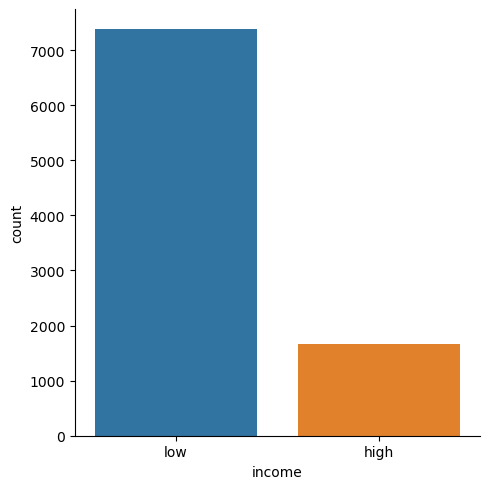

In [138]:
sns.catplot(x="income", data=submission, kind="count")

# Evaluacion de resultados

*Evaluar que el analisis tenga sentido, sea coherente y tenga buen rendimiento.*

*Medida de Rendimiento: Proporcion de muestras bien clasificadas VS mal clasificadas en el "test set".*

## Matriz de Confusión de cada modelo

*Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que los elementos fuera de la diagonal son aquellos que el clasificador etiqueta incorrectamente.*

*Cuanto mayores sean los valores de la diagonal principal de la matriz de confusión, mejor, lo que indica muchas predicciones correctas.*

### Random Forest 1

In [139]:
# Matriz de confusión cuya entrada de la fila i y la columna j indica el número de muestras con etiqueta verdadera
# Siendo la clase i y la etiqueta predicha es la clase j.
print(confusion_matrix(y_test, y_predRf_1))

[[ 883  701]
 [ 226 4524]]


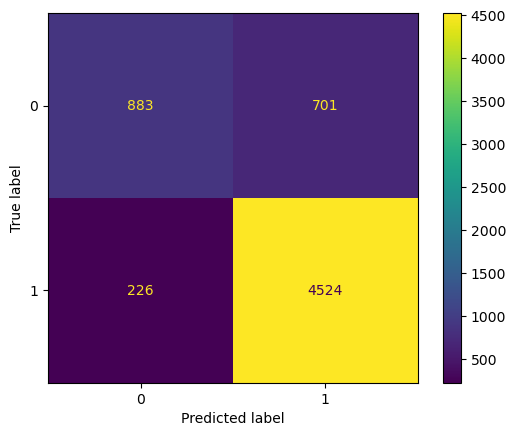

In [140]:
cm_Rf_1 = confusion_matrix(y_test, y_predRf_1)
cmd_Rf_1 = ConfusionMatrixDisplay(confusion_matrix=cm_Rf_1)
cmd_Rf_1.plot()
plt.show()

### Random Forest 2

In [141]:
print(confusion_matrix(y_test, y_predRf_2))

[[ 879  705]
 [ 247 4503]]


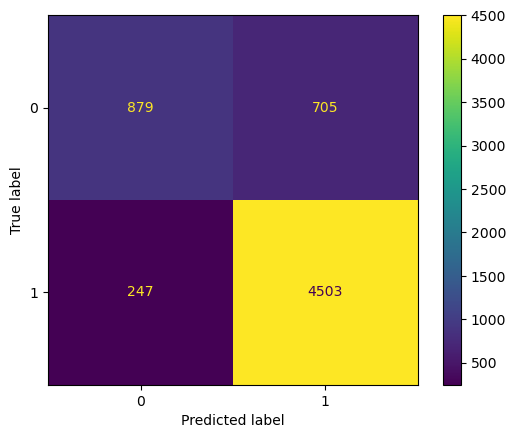

In [142]:
cm_Rf_2 = confusion_matrix(y_test, y_predRf_2)
cmd_Rf_2 = ConfusionMatrixDisplay(confusion_matrix=cm_Rf_2)
cmd_Rf_2.plot()
plt.show()

### Interpretacion

*Teniendo en cuenta que cada clase (low, high) es una fila y columna de la matriz, se puede evidenciar que en el algoritmo de clasificacion "Random Forest 1" la cantidad de predicciones correctas es mayor que el numero de etiquetas de clase predichas asertivamente por "Random Forest 2". Por tanto, hay una mejor medida de rendimiento en "Random Forest 1".*

## La exactitud (accuracy) de cada modelo

*Exactitud del modelo, ¿con qué frecuencia es correcto el clasificador?*

*Una mayor "accuracy" implica una mejor medida de rendimiento del modelo.*

*La "accuracy" compara las ocurrencias de clases reales y las predichas por el modelo.*

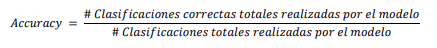

### Random Forest 1

In [143]:
print("Accuracy Random Forest 1:",metrics.accuracy_score(y_test, y_predRf_1))

Accuracy Random Forest 1: 0.8536469845279444


### Random Forest 2

In [144]:
print("Accuracy Random Forest 2:",metrics.accuracy_score(y_test, y_predRf_2))

Accuracy Random Forest 2: 0.8497000315756236


### Interpretacion

*Se puede evidenciar que el modelo llamado "Random Forest 1" predijo correctamente un mayor cantidad de clasificaciones, respecto al numero total de ocurrencias correctas predichas por el clasificador entrenado "Random Forest 2". Por tanto, "Random Forest 1" tiene mejor rendimiento.*

*La "accuracy" del modelo de aprendizaje "Random Forest 1" es mayor que el de "Random Forest 2". Esto quiere decir que el rendimiento del primer modelo RF1 es mejor, pues su cantidad de clasificaciones totales correctas predichas es numericamente mas grande que las muestras bien clasificadas por RF2. Gracias a que "Random Forest 1" fue el algoritmo de aprendizaje que mejor se ajusto a las tuplas de entrada del dataset y a su conjunto de prueba, esta tecnica deberia estar mejor entrenada para relacionar nuevas caracteristicas con su respectiva clase.*



*Por medio de "kNN" y "Random Forest", se usaron los siguientes valores para algunos de sus parametros:*

|Nombre |KNNImputer(n_neighbors)|RandomForestClassifier(n_estimators) |RandomForestClassifier(max_depth) |RandomForestClassifier(max_features) |RandomForestClassifier(criterion) | RandomForestClassifier(random_state)| Accuracy Score|
| - | - | - | - | - | - | - | - |
Random Forest 1 |230|100|12|log2|gini|33|0.8536469845279444
Random Forest 2 |230|14|11|5|gini|33|0.8497000315756236


*Por tanto, "Random Forest 1" es un metodo de clasificacion aceptable para el dataset "Adult.data", con un*

$$\text{Accuracy} = 0.8536469845279444,$$

*no obstante, esto no quiere decir que no se puede ampliar este puntaje de calificacion. Es posible que explorando los distintos parametros que ofrece la tecnica "KNN", aplicando otros modelos de clasificacion como "Naive-Bayes", o buscando entre los diferentes hiper-parametros de distintos algoritmos de clasificacion (incluyendo los del mismo "Random Forest"), se puedan encontrar mejores resultados.*

# Re-evaluacion

*Ajustar, entrenar y re-evaluar los resultados.*

*Voy a cambiar el dataset resultante, "censusDim", por un nuevo dataset, "censusDis", en el que unicamente voy a discretizar sobre los atributos continuos del dataset original "NA_fullTrain", ya que considero que deberia mejorar el rendimiento de los modelos de aprendizaje Random Forest. Esto debido a que la discretizacion es util para los problemas de clasificacion, pues el proceso de transformar datos cuantitativos en cualitativos permite reducirlos sin eliminarlos.*

*Este cambio permitira obtener una representacion reducida de los datos originales, conservando su integridad y preservando su comportamiento, que posiblemente mejore el rendimiento de los modelos "Random Forest 1" y "Random Forest 2".*

## Cuantificacion de los atributos "age", "fnlwgt", "capital-gain", "capital-loss" y "hours-per-week" por Binning

### Generalidades

*Es el proceso de pasar de un atributo que puede tomar infinitos valores dentro de un intervalo especifico a otra variable que pueda tomar un numero contable de valores posibles dentro de un intervalo.*

### Proceso

*Los datos cuantitativos de "age", "fnlwgt", "capital-gain", "capital-loss" y "hours-per-week" se van a transformar a datos cualitativos por medio de la cuantificacion de cada atributo. Esto quiere decir que se van a transformar los datos continuos en un conjunto de valores discretos.*

#### censusDis - Dataset de entrenamiento (NA_fullTrain)

In [145]:
censusDis = censusDim.copy()

In [146]:
censusDis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21113 entries, 0 to 21112
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              21113 non-null  int64  
 1   age             21113 non-null  float64
 2   workclass       21113 non-null  float64
 3   fnlwgt          21113 non-null  float64
 4   education       21113 non-null  float64
 5   marital-status  21113 non-null  float64
 6   occupation      21113 non-null  float64
 7   relationship    21113 non-null  float64
 8   race            21113 non-null  float64
 9   sex             21113 non-null  float64
 10  capital-gain    21113 non-null  float64
 11  capital-loss    21113 non-null  float64
 12  hours-per-week  21113 non-null  float64
 13  income          21113 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 2.3+ MB


In [147]:
censusDis.head()

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,15977,44.0,2.0,222978.0,11.0,0.0,11.000000,1.000000,4.0,0.0,0.0,1504.0,40.0,low
1,13574,32.0,2.0,83253.0,15.0,2.0,13.000000,0.000000,4.0,1.0,0.0,0.0,60.0,low
2,23210,30.0,1.0,327825.0,11.0,0.0,10.000000,3.000000,4.0,0.0,0.0,0.0,32.0,low
3,9284,23.0,2.0,109952.0,15.0,2.0,5.952174,0.000000,4.0,1.0,0.0,0.0,60.0,low
4,8841,54.0,1.0,204325.0,15.0,2.0,10.000000,0.813043,4.0,1.0,0.0,0.0,52.0,low


In [148]:
censusDis.describe()

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
count,21113.000000,21113.000000,21113.000000,2.111300e+04,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000
mean,16244.006489,38.492150,2.189137,1.894393e+05,10.357127,2.577855,5.943502,1.421376,3.683967,0.677256,1109.575058,88.832555,40.992838
std,9371.085220,12.879306,0.922148,1.033286e+05,3.718770,1.468135,3.942269,1.569244,0.813853,0.458133,7260.319319,396.594763,11.575133
min,0.000000,17.000000,0.000000,1.376900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8151.000000,28.000000,2.000000,1.197040e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000
50%,16225.000000,37.604348,2.000000,1.809800e+05,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000
75%,24346.000000,47.000000,2.000000,2.327820e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000
max,32557.000000,90.000000,6.000000,1.484705e+06,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000


In [149]:
censusDis.shape

(21113, 14)

In [150]:
censusDis

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,15977,44.0,2.0,222978.000000,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,1504.0,40.0,low
1,13574,32.0,2.0,83253.000000,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,60.0,low
2,23210,30.0,1.0,327825.000000,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,32.0,low
3,9284,23.0,2.0,109952.000000,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,60.0,low
4,8841,54.0,1.0,204325.000000,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,52.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,66.0,1.0,376506.000000,10.0,0.000000,9.000000,1.000000,4.0,0.00000,3273.0,0.0,40.0,low
21109,21206,50.0,2.0,158680.000000,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,50.0,high
21110,10646,50.0,2.0,72351.000000,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,45.0,low
21111,11687,49.0,4.0,178986.147826,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,60.0,high


In [151]:
values_age = censusDis["age"].values

values_fnlwgt = censusDis["fnlwgt"].values

values_cg = censusDis["capital-gain"].values

values_cl = censusDis["capital-loss"].values

values_hpw = censusDis["hours-per-week"].values

In [152]:
print(values_age)

[44. 32. 30. ... 50. 49. 34.]


In [153]:
values_age = values_age.reshape((len(values_age), 1))
print(values_age)

[[44.]
 [32.]
 [30.]
 ...
 [50.]
 [49.]
 [34.]]


In [154]:
print(values_fnlwgt)

[222978.          83253.         327825.         ...  72351.
 178986.14782609 182177.        ]


In [155]:
values_fnlwgt = values_fnlwgt.reshape((len(values_fnlwgt), 1))
print(values_fnlwgt)

[[222978.        ]
 [ 83253.        ]
 [327825.        ]
 ...
 [ 72351.        ]
 [178986.14782609]
 [182177.        ]]


In [156]:
print(values_cg)

[   0.    0.    0. ...    0.    0. 3325.]


In [157]:
values_cg = values_cg.reshape((len(values_cg), 1))
print(values_cg)

[[   0.]
 [   0.]
 [   0.]
 ...
 [   0.]
 [   0.]
 [3325.]]


In [158]:
print(values_cl)

[1504.    0.    0. ...    0.    0.    0.]


In [159]:
values_cl = values_cl.reshape((len(values_cl), 1))
print(values_cl)

[[1504.]
 [   0.]
 [   0.]
 ...
 [   0.]
 [   0.]
 [   0.]]


In [160]:
print(values_hpw)

[40. 60. 32. ... 45. 60. 35.]


In [161]:
values_hpw = values_hpw.reshape((len(values_hpw), 1))
print(values_hpw)

[[40.]
 [60.]
 [32.]
 ...
 [45.]
 [60.]
 [35.]]


In [162]:
# discretization transform the raw data
age_bins = 69
age_kbins = KBinsDiscretizer(n_bins=age_bins, encode="ordinal", strategy="uniform")
age_trans = age_kbins.fit_transform(values_age)
print(age_trans)

[[25.]
 [14.]
 [12.]
 ...
 [31.]
 [30.]
 [16.]]


F:\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [163]:
fnlwgt_bins = 18
fnlwgt_kbins = KBinsDiscretizer(n_bins=fnlwgt_bins, encode="ordinal", strategy="uniform")
fnlwgt_trans = fnlwgt_kbins.fit_transform(values_fnlwgt)
print(fnlwgt_trans)

[[2.]
 [0.]
 [3.]
 ...
 [0.]
 [2.]
 [2.]]


F:\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [164]:
cg_bins = 1000
cg_kbins = KBinsDiscretizer(n_bins=cg_bins, encode="ordinal", strategy="uniform")
cg_trans = cg_kbins.fit_transform(values_cg)
print(cg_trans)

[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [ 0.]
 [ 0.]
 [33.]]


F:\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [165]:
cl_bins = 89
cl_kbins = KBinsDiscretizer(n_bins=cl_bins, encode="ordinal", strategy="uniform")
cl_trans = cl_kbins.fit_transform(values_cl)
print(cl_trans)

[[35.]
 [ 0.]
 [ 0.]
 ...
 [ 0.]
 [ 0.]
 [ 0.]]


F:\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [166]:
hpw_bins = 40
hpw_kbins = KBinsDiscretizer(n_bins=hpw_bins, encode="ordinal", strategy="uniform")
hpw_trans = hpw_kbins.fit_transform(values_hpw)
print(hpw_trans)

[[15.]
 [24.]
 [12.]
 ...
 [17.]
 [24.]
 [13.]]


F:\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [167]:
censusDis["age"]=age_trans
censusDis["fnlwgt"]=fnlwgt_trans
censusDis["capital-gain"]=cg_trans
censusDis["capital-loss"]=cl_trans
censusDis["hours-per-week"]=hpw_trans

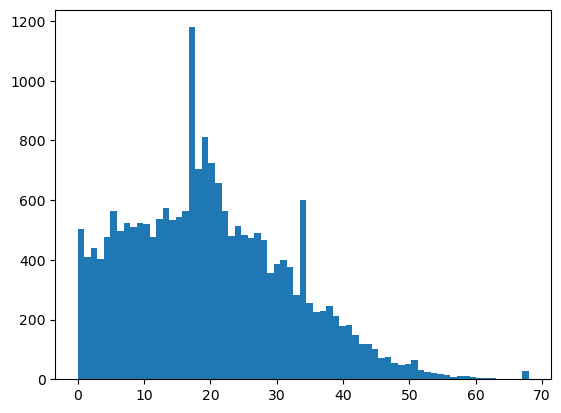

In [168]:
# histogram of the transformed data
plt.hist(age_trans, bins=age_bins)
plt.show()

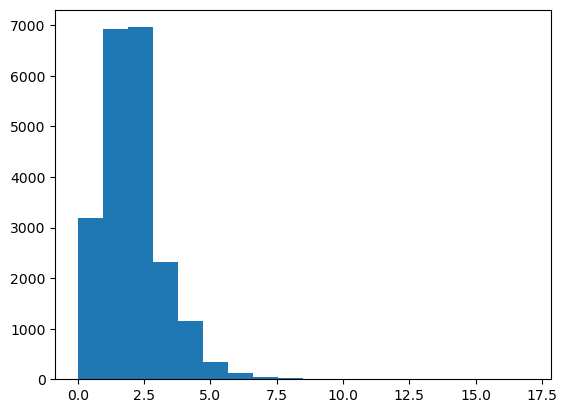

In [169]:
plt.hist(fnlwgt_trans, bins=fnlwgt_bins)
plt.show()

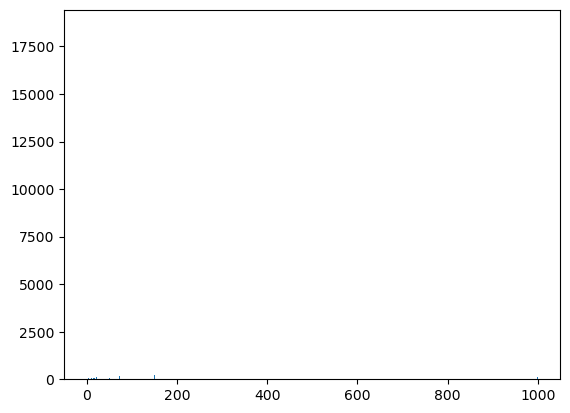

In [170]:
plt.hist(cg_trans, bins=cg_bins)
plt.show()

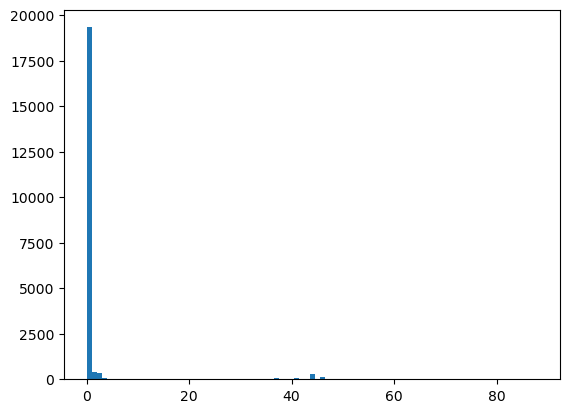

In [171]:
plt.hist(cl_trans, bins=cl_bins)
plt.show()

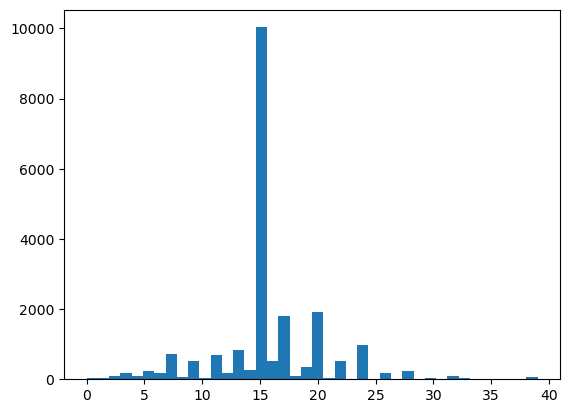

In [172]:
plt.hist(hpw_trans, bins=hpw_bins)
plt.show()

In [173]:
censusDis

,Id,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,15977,25.0,2.0,2.0,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,35.0,15.0,low
1,13574,14.0,2.0,0.0,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,24.0,low
2,23210,12.0,1.0,3.0,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,12.0,low
3,9284,5.0,2.0,1.0,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,24.0,low
4,8841,34.0,1.0,2.0,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,20.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,14169,46.0,1.0,4.0,10.0,0.000000,9.000000,1.000000,4.0,0.00000,32.0,0.0,15.0,low
21109,21206,31.0,2.0,1.0,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,20.0,high
21110,10646,31.0,2.0,0.0,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,17.0,low
21111,11687,30.0,4.0,2.0,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,24.0,high


## Random Forest (RF)

*Delegar la decision a partir de lo que predigan variedad de n arboles de decision sobre el mismo dataset.*

### censusDis - Dataset de entrenamiento (NA_fullTrain)

#### Selección de características

*Dividir caracteristicas y atributo de clase (objetivo).*

In [174]:
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [175]:
X_2 = censusDis[features]
y_2 = censusDis["income"]

In [176]:
X_2

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,25.0,2.0,2.0,11.0,0.000000,11.000000,1.000000,4.0,0.00000,0.0,35.0,15.0
1,14.0,2.0,0.0,15.0,2.000000,13.000000,0.000000,4.0,1.00000,0.0,0.0,24.0
2,12.0,1.0,3.0,11.0,0.000000,10.000000,3.000000,4.0,0.00000,0.0,0.0,12.0
3,5.0,2.0,1.0,15.0,2.000000,5.952174,0.000000,4.0,1.00000,0.0,0.0,24.0
4,34.0,1.0,2.0,15.0,2.000000,10.000000,0.813043,4.0,1.00000,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21108,46.0,1.0,4.0,10.0,0.000000,9.000000,1.000000,4.0,0.00000,32.0,0.0,15.0
21109,31.0,2.0,1.0,12.0,2.000000,3.000000,0.000000,4.0,1.00000,0.0,0.0,20.0
21110,31.0,2.0,0.0,9.0,0.000000,5.900000,1.000000,4.0,1.00000,0.0,0.0,17.0
21111,30.0,4.0,2.0,9.0,2.000000,6.995652,0.000000,4.0,1.00000,0.0,0.0,24.0


In [177]:
y_2

0         low
1         low
2         low
3         low
4         low
         ... 
21108     low
21109    high
21110     low
21111    high
21112     low
Name: income, Length: 21113, dtype: object

#### Division de datos (dividir el conjunto de datos sin clase y variable objetivo)

*Dividir el dataset original en conjunto de entrenamiento (train set), 70%, y conjunto de prueba (test set), 30%.*

In [178]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_2, y_2, test_size=0.3, random_state=1)

#### Crear el tercer clasificador - Random Forest 3

*Crear objeto clasificador de bosque aleatorio*

*Entrenar el clasificador del bosque aleatorio*

##### Un modelo de RF utilizando características y variables objetivo con 100 árboles

In [179]:
X_train3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
13066,45.0,4.000000,1.0,0.0,2.23913,2.000000,0.0,4.0,1.0,0.0,0.0,15.0
7933,12.0,2.200000,0.0,11.0,0.00000,13.000000,1.0,4.0,1.0,0.0,0.0,22.0
15716,31.0,2.000000,1.0,9.0,0.00000,3.000000,4.0,4.0,1.0,0.0,0.0,17.0
13688,3.0,2.000000,2.0,11.0,4.00000,7.000000,3.0,4.0,1.0,0.0,0.0,13.0
2456,28.0,1.000000,1.0,11.0,2.06087,3.000000,1.0,4.0,0.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,17.0,2.000000,2.0,8.0,2.00000,12.000000,0.0,2.0,1.0,0.0,0.0,15.0
17289,18.0,4.000000,0.0,6.0,2.00000,13.000000,0.0,4.0,1.0,0.0,0.0,28.0
5192,6.0,2.000000,2.0,7.0,4.00000,0.000000,3.0,4.0,0.0,0.0,0.0,15.0
12172,2.0,2.134783,0.0,15.0,4.00000,0.000000,3.0,4.0,0.0,0.0,1.0,4.0


In [180]:
y_train3

13066     low
7933      low
15716    high
13688     low
2456      low
         ... 
10955     low
17289    high
5192      low
12172     low
235       low
Name: income, Length: 14779, dtype: object

In [181]:
clfRf_3 = RandomForestClassifier(max_depth=12, n_estimators=100, max_features="log2", random_state=33, criterion="gini").fit(X_train3, y_train3)

In [182]:
X_test3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
4423,15.0,2.0,1.0,11.0,0.0,0.0,3.0,4.000000,1.0,0.0,2.0,15.0
12884,5.0,2.0,2.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.0,5.0
6141,10.0,2.0,1.0,9.0,4.0,0.0,3.0,3.486957,0.0,0.0,0.0,6.0
3289,4.0,2.0,1.0,15.0,4.0,0.0,2.0,4.000000,0.0,0.0,0.0,6.0
20103,34.0,4.0,2.0,11.0,6.0,2.0,1.0,4.000000,1.0,0.0,1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,5.0,2.0,1.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.0,11.0
10871,36.0,4.0,0.0,1.0,2.0,7.0,5.0,4.000000,0.0,0.0,0.0,15.0
5525,14.0,2.0,4.0,9.0,2.0,3.0,2.0,1.000000,0.0,0.0,0.0,15.0
9018,15.0,2.0,2.0,11.0,0.0,0.0,1.0,2.000000,0.0,0.0,0.0,15.0


##### Clasificar con el RF - Predecir nuevos valores según el modelo ajustado

*Predecir la respuesta para el conjunto de datos de prueba*

In [183]:
y_predRf_3 = clfRf_3.predict(X_test3)

In [184]:
y_predRf_3

array(['low', 'low', 'low', ..., 'low', 'low', 'high'], dtype=object)

In [185]:
y_test3

4423      low
12884     low
6141      low
3289      low
20103     low
         ... 
3187      low
10871     low
5525     high
9018      low
4220     high
Name: income, Length: 6334, dtype: object

#### Crear el cuarto clasificador -  Random Forest 4

*Crear objeto clasificador de bosque aleatorio*

*Entrenar el clasificador del bosque aleatorio*

##### Un modelo de RF utilizando características y variables objetivo con 14 árboles

In [186]:
X_train3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
13066,45.0,4.000000,1.0,0.0,2.23913,2.000000,0.0,4.0,1.0,0.0,0.0,15.0
7933,12.0,2.200000,0.0,11.0,0.00000,13.000000,1.0,4.0,1.0,0.0,0.0,22.0
15716,31.0,2.000000,1.0,9.0,0.00000,3.000000,4.0,4.0,1.0,0.0,0.0,17.0
13688,3.0,2.000000,2.0,11.0,4.00000,7.000000,3.0,4.0,1.0,0.0,0.0,13.0
2456,28.0,1.000000,1.0,11.0,2.06087,3.000000,1.0,4.0,0.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,17.0,2.000000,2.0,8.0,2.00000,12.000000,0.0,2.0,1.0,0.0,0.0,15.0
17289,18.0,4.000000,0.0,6.0,2.00000,13.000000,0.0,4.0,1.0,0.0,0.0,28.0
5192,6.0,2.000000,2.0,7.0,4.00000,0.000000,3.0,4.0,0.0,0.0,0.0,15.0
12172,2.0,2.134783,0.0,15.0,4.00000,0.000000,3.0,4.0,0.0,0.0,1.0,4.0


In [187]:
y_train3

13066     low
7933      low
15716    high
13688     low
2456      low
         ... 
10955     low
17289    high
5192      low
12172     low
235       low
Name: income, Length: 14779, dtype: object

In [188]:
clfRf_4 = RandomForestClassifier(max_depth=11, n_estimators=14, max_features=5, random_state=33, criterion="gini").fit(X_train3, y_train3)

In [189]:
X_test3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
4423,15.0,2.0,1.0,11.0,0.0,0.0,3.0,4.000000,1.0,0.0,2.0,15.0
12884,5.0,2.0,2.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.0,5.0
6141,10.0,2.0,1.0,9.0,4.0,0.0,3.0,3.486957,0.0,0.0,0.0,6.0
3289,4.0,2.0,1.0,15.0,4.0,0.0,2.0,4.000000,0.0,0.0,0.0,6.0
20103,34.0,4.0,2.0,11.0,6.0,2.0,1.0,4.000000,1.0,0.0,1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,5.0,2.0,1.0,15.0,4.0,5.0,3.0,4.000000,1.0,0.0,0.0,11.0
10871,36.0,4.0,0.0,1.0,2.0,7.0,5.0,4.000000,0.0,0.0,0.0,15.0
5525,14.0,2.0,4.0,9.0,2.0,3.0,2.0,1.000000,0.0,0.0,0.0,15.0
9018,15.0,2.0,2.0,11.0,0.0,0.0,1.0,2.000000,0.0,0.0,0.0,15.0


##### Clasificar con el RF - Predecir nuevos valores según el modelo ajustado

*Predecir la respuesta para el conjunto de datos de prueba*

In [190]:
y_predRf_4 = clfRf_4.predict(X_test3)

In [191]:
y_predRf_4

array(['low', 'low', 'low', ..., 'low', 'low', 'high'], dtype=object)

In [192]:
y_test3

4423      low
12884     low
6141      low
3289      low
20103     low
         ... 
3187      low
10871     low
5525     high
9018      low
4220     high
Name: income, Length: 6334, dtype: object

### Decisiones

*Escogi determinar cuales atributos son mas importantes utilizando "Gini" como criterio para los arboles de decision resultantes.*

*Para determinar la jerarquia de los nodos de los arboles, se utiliza la impureza de Gini que aporta cada una de los caracteristicas del dataset. Cuanto mas alto la impureza de un atributo, se considera mas importante.*

## Matriz de Confusión de cada modelo

*Medida de Rendimiento: Proporcion de muestras bien clasificadas VS mal clasificadas en el "test set".*

*Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que los elementos fuera de la diagonal son aquellos que el clasificador etiqueta incorrectamente.*

*Cuanto mayores sean los valores de la diagonal principal de la matriz de confusión, mejor, lo que indica muchas predicciones correctas.*

### Random Forest 3

In [193]:
print(confusion_matrix(y_test3, y_predRf_3))

[[ 878  706]
 [ 225 4525]]


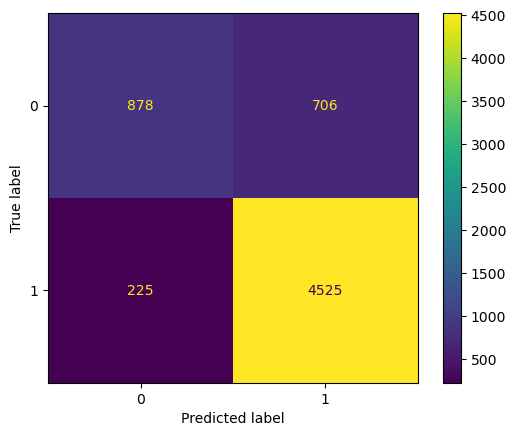

In [194]:
cm_Rf_3 = confusion_matrix(y_test3, y_predRf_3)
cmd_Rf_3 = ConfusionMatrixDisplay(confusion_matrix=cm_Rf_3)
cmd_Rf_3.plot()
plt.show()

### Random Forest 4

In [195]:
print(confusion_matrix(y_test3, y_predRf_4))

[[ 887  697]
 [ 256 4494]]


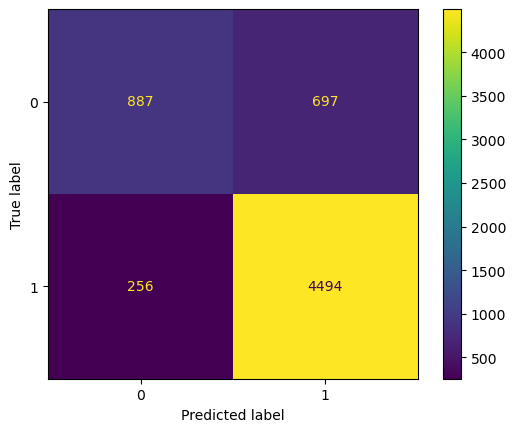

In [196]:
cm_Rf_4 = confusion_matrix(y_test3, y_predRf_4)
cmd_Rf_4 = ConfusionMatrixDisplay(confusion_matrix=cm_Rf_4)
cmd_Rf_4.plot()
plt.show()

### Interpretacion

*Teniendo en cuenta que cada clase (low, high) es una fila y columna de la matriz, se puede evidenciar que en el algoritmo de clasificacion "Random Forest 3" la cantidad de predicciones correctas es mayor que el numero de etiquetas de clase predichas asertivamente por "Random Forest 4". Por tanto, hay una mejor medida de rendimiento en "Random Forest 3".*

## La exactitud (accuracy) de cada modelo

*Exactitud del modelo, ¿con qué frecuencia es correcto el clasificador?*

*Una mayor "accuracy" implica una mejor medida de rendimiento del modelo.*

*La "accuracy" compara las ocurrencias de clases reales y las predichas por el modelo.*

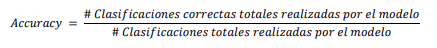

### Random Forest 3

In [197]:
print("Accuracy Random Forest 3:",metrics.accuracy_score(y_test3, y_predRf_3))

Accuracy Random Forest 3: 0.853015472055573


### Random Forest 4

In [198]:
print("Accuracy Random Forest 4:",metrics.accuracy_score(y_test3, y_predRf_4))

Accuracy Random Forest 4: 0.8495421534575308


### Interpretacion

*Se puede evidenciar que el modelo llamado "Random Forest 3" predijo correctamente un mayor cantidad de clasificaciones, respecto al numero total de ocurrencias correctas predichas por el clasificador entrenado "Random Forest 4". Por tanto, "Random Forest 3" tiene mejor rendimiento.*

## Interpretacion de la re-evaluacion

*Tras re-evaluar los modelos "Random Forest 3" y "Random Forest 4" ajustando cambios sobre el dataset imputado y reducido "censusDim", se puede concluir que el dataset preprocesado discretizado con la tecnica "Binning method", "censusDis", no fue mejor entrenado que el primero, utilizando RF.*

*Por medio de "Binning Method", se usaron los siguientes valores para algunos de sus parametros:*

|Variable |n_bins |enconde |strategy|
| - | - | - | - |
|age|60|ordinal|uniform|
|fnlwgt|18|ordinal|uniform|
|capital-gain|1000|ordinal|uniform|
|capital-loss|89|ordinal|uniform|
|hours-per-week|40|ordinal|uniform|



*Por medio de "kNN" y "Random Forest", se usaron los siguientes valores para algunos de sus parametros:*

|Nombre |KNNImputer(n_neighbors)|RandomForestClassifier(n_estimators) |RandomForestClassifier(max_depth) |RandomForestClassifier(max_features) |RandomForestClassifier(criterion) | RandomForestClassifier(random_state)| Accuracy Score|
| - | - | - | - | - | - | - | - |
Random Forest 3 |230|100|12|log2|gini|33|0.853015472055573
Random Forest 4 |230|14|11|5|gini|33|0.8495421534575308


*Tranformar los valores cuantitativos en cualitativos para utilizar atributos discretos en vez de continuos permitio reducir los datos, no obstante, esto no quiere decir que los modelos tuvieran mayor rendimiento al ser evaluados. Es posible que aplicando otros metodos de discretizacion, como "1R", o distintos modelos de clasificacion, como "Naive-Bayes", y experimentado con los diferentes parametros, para las tecnicas, e hiper-parametros, para los algoritmos de aprendizaje, se puedan encontrar mejores resultados para el rendimiento de un modelo mas adaptado.*


# Fin